# Lecture 19: Convolutional Neural Networks 

In [1]:
import datetime
now = datetime.datet®ime.now()
print("Version: " + now.strftime("%Y-%m-%d %H:%M:%S"))

Version: 2018-03-19 10:28:17


### This Lecture 

* The basics of CNNs 
* This is a complex and very varied subject (could do a whole course on this alone)

In [2]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os
import tensorflow as tf

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "cnn"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)
    
def plot_image(image):
    plt.imshow(image, cmap="gray", interpolation="nearest")
    plt.axis("off")

def plot_color_image(image):
    plt.imshow(image.astype(np.uint8),interpolation="nearest")
    plt.axis("off")
    
import warnings
warnings.filterwarnings('ignore')

/Users/mcewen/anaconda3/envs/tensorflow_py35/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## Convolutional Layers in NN 

* Convolutional neural networks (CNNs) emerged from the study of the brain’s visual cortex, and they have been used in image recognition since the 1980s.
* Used in image recognition also in voice recognition and natural language processing 
* Local Field of View
* Used to define local features in an image - data compression
<img src="Lecture19_Images/localFov.jpeg" alt="Drawing" style="width: 500px;"/>



### Why?

* A way of encoding images using a small(er) number of features upon which training (e.g. for classifying images) can take place. 
* Differences in images that enable humans to classify are hypothesise to be extracted in similar ways.

## Convolutional Layers 

* Encode convolutions as a NN 

* Neurons connected to _receptor_ field in next layer that is _smaller_. Uses zero padding to force layers to have same height & width.

* Also can connect large input layer to much smaller layer by spacing out receptor fields (distance between receptor fields is called the _stride_)

<img src="Lecture19_Images/CC.jpeg" alt="Drawing" style="width: 700px;"/>

### Feature Maps 

* Neuron weights can look like small images (w/ size = receptor field)
* Examples given: 1) vertical filter (single vertical bar, mid-image, all other cells zero) 2) horizontal filter (single horizontal bar, mid-image, all other cells zero)
* Both return _feature maps_ (highlights areas of image most similar to filter)


<img src="Lecture19_Images/featuremap.jpeg" alt="Drawing" style="width: 800px;"/>

### Stacking Feature Maps 

* More realistic to have several features of similar size i.e. 3D layers 
* A convolutional layer can thereby apply multiple filters to its input and be capable of detecting multiple features 

<img src="Lecture19_Images/stacked.jpeg" alt="Drawing" style="width: 400px;"/>


#### Example 

* The following code loads two sample images, using Scikit-Learn’s load_sample_images() (which loads two color images, one of a Chinese temple, and the other of a flower)
* Then it creates two 7 × 7 filters (one with a vertical white line in the middle, and the other with a horizontal white line in the middle), and applies them to both images using a convolutional layer built using TensorFlow’s ${\tt tf.nn.conv2d()}$ function (with zero padding and a stride of 2). 
* Finally, it plots one of the resulting feature maps



In [3]:
#simple example 
from sklearn.datasets import load_sample_image #load images

# Load sample images
china = load_sample_image("china.jpg")
flower = load_sample_image("flower.jpg")
dataset = np.array([china, flower], dtype=np.float32) #make concatenated data set
batch_size, height, width, channels = dataset.shape

# Create 2 filters that are 7x7xchannelsx2 arrays
filters = np.zeros(shape=(7, 7, channels, 2),  dtype=np.float32)
filters[:, 3, :, 0] = 1  # vertical line
filters[3, :, :, 1] = 1  # horizontal line

/Users/mcewen/anaconda3/envs/tensorflow_py35/lib/python3.5/site-packages/sklearn/datasets/base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]
/Users/mcewen/anaconda3/envs/tensorflow_py35/lib/python3.5/site-packages/sklearn/datasets/base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]
/Users/mcewen/anaconda3/envs/tensorflow_py35/lib/python3.5/site-packages/sklearn/datasets/base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]
/Users/mcewen/anaconda3/envs/tensorflow_py35/lib/python3.5/site-packages/sklearn/dataset

In [4]:
# Create a graph with input X plus a convolutional layer applying the 2 filters
X = tf.placeholder(tf.float32, shape=(None, height, width, channels))

# conv2d arguments:
# x = input minibatch = 4D tensor : minibatch*height*width*channels
# filters = 4D tensor
# strides = 1D array (1, vstride, hstride, 1)
# padding = VALID = no zero padding, may ignore edge rows/cols
# padding = SAME  = zero padding used if needed
convolution = tf.nn.conv2d(X, filters, strides=[1,2,2,1], padding="VALID")

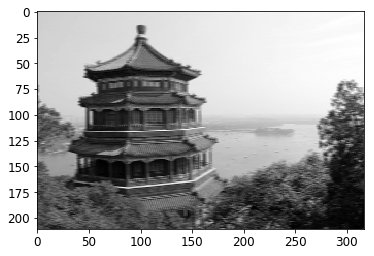

In [5]:
with tf.Session() as sess:
    output = sess.run(convolution, feed_dict={X: dataset})

#output[image_index, :, :, feature_map_index]
plt.imshow(output[0, :, :, 1], cmap="gray") # plot 1st image's 2nd feature map
plt.show()

<img src="Lecture19_Images/dotproduc.png" alt="Drawing" style="width: 900px;"/>

Note the relation to the dot product 

<img src="Lecture19_Images/example.png" alt="Drawing" style="width: 900px;"/>



<img src="Lecture19_Images/6filter.png" alt="Drawing" style="width: 900px;"/>

The convolution layer comprises of a set of independent filters (6 in the example shown). Each filter is independently convolved with the image and we end up with 6 feature maps of shape 28x28x1.

<img src="Lecture19_Images/simpleseries.png" alt="Drawing" style="width: 900px;"/>

All these filters are initialized randomly and become our parameters which will be learned by the network subsequently.

<img src="Lecture19_Images/padding.jpeg" alt="Drawing" style="width: 900px;"/>



In [6]:
reset_graph()

filter_primes = np.array([2., 3., 5., 7., 11., 13.], dtype=np.float32)
x = tf.constant(np.arange(1, 13+1, dtype=np.float32).reshape([1, 1, 13, 1]))
filters = tf.constant(filter_primes.reshape(1, 6, 1, 1))

valid_conv = tf.nn.conv2d(x, filters, strides=[1, 1, 5, 1], padding='VALID')
same_conv = tf.nn.conv2d(x, filters, strides=[1, 1, 5, 1], padding='SAME')

with tf.Session() as sess:
    print("VALID:\n", valid_conv.eval())
    print("SAME:\n", same_conv.eval())


VALID:
 [[[[184.]
   [389.]]]]
SAME:
 [[[[143.]
   [348.]
   [204.]]]]


In [7]:
#the above is effectively doing a dot product of the following series with 
#the filters. Note the different behaviour that conv2 adopts in the two cases
print("VALID:")
print(np.array([1,2,3,4,5,6]).T.dot(filter_primes))
print(np.array([6,7,8,9,10,11]).T.dot(filter_primes))
print("SAME:")
print(np.array([0,1,2,3,4,5]).T.dot(filter_primes))
print(np.array([5,6,7,8,9,10]).T.dot(filter_primes))
print(np.array([10,11,12,13,0,0]).T.dot(filter_primes))

VALID:
184.0
389.0
SAME:
143.0
348.0
204.0


## Pooling Layers 

* Goal is to subsample (i.e., shrink) the input image in order to reduce the computational load, the memory usage, and the number of parameters (thereby limiting the risk of overfitting). Pooling layer operates on each feature map independently.

* Just like in convolutional layers, each neuron in a pooling layer is connected to the outputs of a limited number of neurons in the previous layer, located within a small rectangular receptive field. You must define its size, the stride, and the padding type, just like before. 

* However, a pooling neuron has no weights; all it does is aggregate the inputs using an aggregation function such as the max or mean.

<img src="Lecture19_Images/pool.jpeg" alt="Drawing" style="width: 900px;"/>

* note image is smaller due to receptive layer size

<img src="Lecture19_Images/maxpool.png" alt="Drawing" style="width: 900px;"/>



In [8]:
batch_size, height, width, channels = dataset.shape
filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
filters[:, 3, :, 0] = 1  # vertical line
filters[3, :, :, 1] = 1  # horizontal line
X = tf.placeholder(tf.float32, shape=(None, height, width, channels))

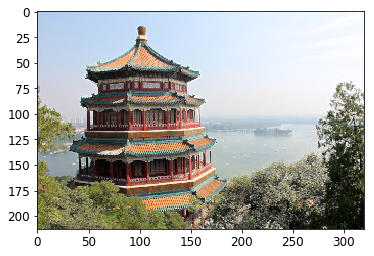

In [9]:
#The ksize argument contains the kernel shape along all four dimensions 
#of the input tensor: [batch size, height, width, channels].
max_pool = tf.nn.max_pool(X, ksize=[1,2,2,1], strides=[1,2,2,1],padding="VALID")

with tf.Session() as sess: output = sess.run(max_pool, feed_dict={X: dataset})

plt.imshow(output[0].astype(np.uint8))  # plot the output for the 1st image
plt.show()
#original
#plt.imshow(china)
#plt.show()

## CNN Architectures 

* Typical CNN architectures stack a few convolutional layers (each one generally followed by a ReLU layer; max(0,x), then a pooling layer, then another few convolutional layers (+ ReLU), then another pooling layer, and so on.

* The image gets smaller and smaller as it progresses through the network, but it also typically gets deeper and deeper (i.e., with more feature maps) thanks to the convolutional layers

* At the top of the stack, a regular feedforward neural network is added, composed of a few fully connected layers, and the final layer outputs the prediction 

<img src="Lecture19_Images/aCNN.jpeg" alt="Drawing" style="width: 1000px;"/>

<img src="Lecture19_Images/exCNN.jpeg" alt="Drawing" style="width: 1500px;"/>



#### LeNet, widely used for MNIST 

<img src="Lecture19_Images/lenet.jpeg" alt="Drawing" style="width: 500px;"/>



#### AlexNet, used for ImageNet Challenge http://www.image-net.org/challenges/LSVRC/

<img src="Lecture19_Images/alexnet.jpeg" alt="Drawing" style="width: 500px;"/>



In [10]:
# make a typical CNN architecture for the MNIST data
# trying to create a network, and train it, to recognise digits in an image
import tensorflow as tf

reset_graph()

#define dimensions of the data 
height = 28
width = 28
channels = 1
n_inputs = height * width

In [11]:
with tf.name_scope("inputs"):
    X = tf.placeholder(tf.float32, shape=[None, n_inputs], name="X")
    X_reshaped = tf.reshape(X, shape=[-1, height, width, channels])
    
    y = tf.placeholder(tf.int32, shape=[None], name="y") #create lables 
    training = tf.placeholder_with_default(False, shape=[], name="training")

In [12]:
#define conv layer 1
conv1_fmaps = 32 #number of feature maps 
conv1_ksize = 3 #size of the kernel 
conv1_stride = 1 #stride length 
conv1_pad = "SAME" #note same so stays 28x28 

#define conv layer 2
conv2_fmaps = 64 #note: more feature because it's finer resolution
conv2_ksize = 3
conv2_stride = 1
conv2_pad = "SAME"
conv2_dropout_rate = 0.25 #pruning of zero weighted features


In [13]:
#feed reshaped X to conv1 
conv1 = tf.layers.conv2d(X_reshaped, filters=conv1_fmaps, kernel_size=conv1_ksize,
                         strides=conv1_stride, padding=conv1_pad,
                         activation=tf.nn.relu, name="conv1")
#feed conv1 to conv 2
conv2 = tf.layers.conv2d(conv1, filters=conv2_fmaps, kernel_size=conv2_ksize,
                         strides=conv2_stride, padding=conv2_pad,
                         activation=tf.nn.relu, name="conv2")

In [14]:
#set 3rd pool layer feature maps size equal to 2nd conv feature maps size
pool3_fmaps = conv2_fmaps

In [15]:
#pooling layer 
with tf.name_scope("pool3"):
    #maximum over 2x2 cells
    pool3 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="VALID")
    #reshape to be a flat layer (1D) ready for the fully connected layer 
    pool3_flat = tf.reshape(pool3, shape=[-1, pool3_fmaps * 14 * 14]) #factor 28/2=14 
    #prune the neurons to avoid overfitting 
    pool3_flat_drop = tf.layers.dropout(pool3_flat, conv2_dropout_rate, training=training)

In [16]:
# set up fully connected layers
n_fc1 = 128
fc1_dropout_rate = 0.5

In [17]:
#fully connected layer 
with tf.name_scope("fc1"):
    fc1 = tf.layers.dense(pool3_flat_drop, n_fc1, activation=tf.nn.relu, name="fc1")
    fc1_drop = tf.layers.dropout(fc1, fc1_dropout_rate, training=training)

# Dropout: consists in randomly setting a fraction rate of input units to 0
# at each update during training time, which helps prevent overfitting. 
 
# dense: This layer implements the operation: 
# outputs = activation(inputs.kernel + bias) 
# Where activation is the activation function passed as the activation 
# argument (if not None), kernel is a weights matrix created by the layer, 
# and bias is a bias vector created by the layer (only if use_bias is True)    

In [18]:
# number of final outputs
n_outputs = 10

In [19]:
#essentially computing the probability of each feature output from fc1 
#using softmax 
#softmax = tf.exp(logits) / tf.reduce_sum(tf.exp(logits), axis)
#not used, but for interest 
with tf.name_scope("output"):
    logits = tf.layers.dense(fc1, n_outputs, name="output")
    Y_proba = tf.nn.softmax(logits, name="Y_proba")

In [20]:
#create training nodes
with tf.name_scope("train"):
    #Computes sparse softmax cross entropy between logits and labels.
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=y)
    #computes mean of the xentropy 
    loss = tf.reduce_mean(xentropy)
    optimizer = tf.train.AdamOptimizer()
    #want to minimise the loss
    training_op = optimizer.minimize(loss)

In [21]:
#evaluation nodes 
with tf.name_scope("eval"):
    #Says whether the targets are in the top K predictions.
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

#save and initialisation nodes 
with tf.name_scope("init_and_save"):
    init = tf.global_variables_initializer()
    saver = tf.train.Saver()

In [22]:
#--- for tensorboard ---
from datetime import datetime
now = datetime.utcnow().strftime("%Y%m%d%H%M%S")
root_logdir = "tf_logs"
logdir = "{}/run-{}/".format(root_logdir, now)
file_writer = tf.summary.FileWriter(logdir, tf.get_default_graph()) #node that write the default graph
#-----------------------
# > tensorboard --logdir tf_logs/

<img src="Lecture19_Images/png.png" alt="Drawing" style="width: 500px;"/>

In [23]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/")

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [24]:
#simple DNN
X_train = mnist.train.images
X_test = mnist.test.images
y_train = mnist.train.labels.astype("int")
y_test = mnist.test.labels.astype("int")
config = tf.contrib.learn.RunConfig(tf_random_seed=42) # not shown in the config
feature_cols = tf.contrib.learn.infer_real_valued_columns_from_input(X_train)
dnn_clf = tf.contrib.learn.DNNClassifier(hidden_units=[300,100], n_classes=10,feature_columns=feature_cols, config=config)
dnn_clf = tf.contrib.learn.SKCompat(dnn_clf) # if TensorFlow >= 1.1
dnn_clf.fit(X_train, y_train, batch_size=50, steps=40000)

INFO:tensorflow:Using config: {'_evaluation_master': '', '_master': '', '_is_chief': True, '_save_checkpoints_secs': 600, '_model_dir': '/tmp/tmp9wthxjcj', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1c235ede10>, '_save_checkpoints_steps': None, '_tf_random_seed': 42, '_keep_checkpoint_every_n_hours': 10000, '_save_summary_steps': 100, '_task_id': 0, '_keep_checkpoint_max': 5, '_num_worker_replicas': 0, '_session_config': None, '_log_step_count_steps': 100, '_num_ps_replicas': 0, '_environment': 'local', '_task_type': None}
Instructions for updating:
Please switch to tf.train.get_global_step
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmp9wthxjcj/model.ckpt.
INFO:tensorflow:loss = 2.4005778, step = 1
INFO:tensorflow:global_step/sec: 261.385
INFO:tensorflow:loss = 0.31267586, step = 101 (0.384 sec)
INFO:tensorflow:global_step/sec: 

INFO:tensorflow:global_step/sec: 278.615
INFO:tensorflow:loss = 0.008367192, step = 7101 (0.359 sec)
INFO:tensorflow:global_step/sec: 244.994
INFO:tensorflow:loss = 0.04883387, step = 7201 (0.408 sec)
INFO:tensorflow:global_step/sec: 272.168
INFO:tensorflow:loss = 0.009504036, step = 7301 (0.368 sec)
INFO:tensorflow:global_step/sec: 259.029
INFO:tensorflow:loss = 0.016978893, step = 7401 (0.386 sec)
INFO:tensorflow:global_step/sec: 273.187
INFO:tensorflow:loss = 0.010757222, step = 7501 (0.366 sec)
INFO:tensorflow:global_step/sec: 273.831
INFO:tensorflow:loss = 0.010587335, step = 7601 (0.366 sec)
INFO:tensorflow:global_step/sec: 256.478
INFO:tensorflow:loss = 0.005931136, step = 7701 (0.390 sec)
INFO:tensorflow:global_step/sec: 266.746
INFO:tensorflow:loss = 0.005197429, step = 7801 (0.375 sec)
INFO:tensorflow:global_step/sec: 264.802
INFO:tensorflow:loss = 0.006449755, step = 7901 (0.378 sec)
INFO:tensorflow:global_step/sec: 252.377
INFO:tensorflow:loss = 0.0020574287, step = 8001 (0

INFO:tensorflow:loss = 0.0023113445, step = 15101 (0.368 sec)
INFO:tensorflow:global_step/sec: 282.926
INFO:tensorflow:loss = 0.001015892, step = 15201 (0.353 sec)
INFO:tensorflow:global_step/sec: 290.235
INFO:tensorflow:loss = 0.0022939122, step = 15301 (0.345 sec)
INFO:tensorflow:global_step/sec: 288.546
INFO:tensorflow:loss = 0.0028404044, step = 15401 (0.347 sec)
INFO:tensorflow:global_step/sec: 217.331
INFO:tensorflow:loss = 0.005412121, step = 15501 (0.460 sec)
INFO:tensorflow:global_step/sec: 268.12
INFO:tensorflow:loss = 0.0035895878, step = 15601 (0.374 sec)
INFO:tensorflow:global_step/sec: 216.045
INFO:tensorflow:loss = 0.0058891536, step = 15701 (0.462 sec)
INFO:tensorflow:global_step/sec: 292.319
INFO:tensorflow:loss = 0.0008186471, step = 15801 (0.342 sec)
INFO:tensorflow:global_step/sec: 293.763
INFO:tensorflow:loss = 0.00085781404, step = 15901 (0.340 sec)
INFO:tensorflow:global_step/sec: 296.289
INFO:tensorflow:loss = 0.0065113665, step = 16001 (0.338 sec)
INFO:tensorfl

INFO:tensorflow:global_step/sec: 288.312
INFO:tensorflow:loss = 0.0023677696, step = 23101 (0.347 sec)
INFO:tensorflow:global_step/sec: 291.708
INFO:tensorflow:loss = 0.0018610213, step = 23201 (0.343 sec)
INFO:tensorflow:global_step/sec: 295.8
INFO:tensorflow:loss = 0.0018711936, step = 23301 (0.338 sec)
INFO:tensorflow:global_step/sec: 296.956
INFO:tensorflow:loss = 0.0005051533, step = 23401 (0.337 sec)
INFO:tensorflow:global_step/sec: 290.5
INFO:tensorflow:loss = 0.00076665386, step = 23501 (0.344 sec)
INFO:tensorflow:global_step/sec: 293.965
INFO:tensorflow:loss = 0.000556651, step = 23601 (0.340 sec)
INFO:tensorflow:global_step/sec: 294.819
INFO:tensorflow:loss = 0.0001052184, step = 23701 (0.339 sec)
INFO:tensorflow:global_step/sec: 290.087
INFO:tensorflow:loss = 0.00091980194, step = 23801 (0.345 sec)
INFO:tensorflow:global_step/sec: 293.32
INFO:tensorflow:loss = 0.0017980053, step = 23901 (0.341 sec)
INFO:tensorflow:global_step/sec: 290.274
INFO:tensorflow:loss = 0.0014662343,

INFO:tensorflow:loss = 0.00092834665, step = 31001 (0.374 sec)
INFO:tensorflow:global_step/sec: 287.428
INFO:tensorflow:loss = 0.0011234849, step = 31101 (0.348 sec)
INFO:tensorflow:global_step/sec: 276.024
INFO:tensorflow:loss = 0.00031862652, step = 31201 (0.362 sec)
INFO:tensorflow:global_step/sec: 260.143
INFO:tensorflow:loss = 0.0004291339, step = 31301 (0.384 sec)
INFO:tensorflow:global_step/sec: 287.094
INFO:tensorflow:loss = 0.0013877174, step = 31401 (0.348 sec)
INFO:tensorflow:global_step/sec: 250.961
INFO:tensorflow:loss = 0.00020001482, step = 31501 (0.399 sec)
INFO:tensorflow:global_step/sec: 266.679
INFO:tensorflow:loss = 0.00032674294, step = 31601 (0.376 sec)
INFO:tensorflow:global_step/sec: 279.796
INFO:tensorflow:loss = 0.0006365755, step = 31701 (0.357 sec)
INFO:tensorflow:global_step/sec: 278.67
INFO:tensorflow:loss = 0.00016916303, step = 31801 (0.359 sec)
INFO:tensorflow:global_step/sec: 286.293
INFO:tensorflow:loss = 0.0006920603, step = 31901 (0.349 sec)
INFO:te

INFO:tensorflow:global_step/sec: 261.443
INFO:tensorflow:loss = 0.0001628006, step = 39001 (0.384 sec)
INFO:tensorflow:global_step/sec: 265.736
INFO:tensorflow:loss = 0.0007085502, step = 39101 (0.375 sec)
INFO:tensorflow:global_step/sec: 263.388
INFO:tensorflow:loss = 0.00033850258, step = 39201 (0.380 sec)
INFO:tensorflow:global_step/sec: 269.7
INFO:tensorflow:loss = 0.00038915616, step = 39301 (0.371 sec)
INFO:tensorflow:global_step/sec: 279.296
INFO:tensorflow:loss = 0.0003968734, step = 39401 (0.358 sec)
INFO:tensorflow:global_step/sec: 292.86
INFO:tensorflow:loss = 0.00015025295, step = 39501 (0.342 sec)
INFO:tensorflow:global_step/sec: 270.222
INFO:tensorflow:loss = 0.00062390114, step = 39601 (0.370 sec)
INFO:tensorflow:global_step/sec: 281.09
INFO:tensorflow:loss = 0.00014465627, step = 39701 (0.356 sec)
INFO:tensorflow:global_step/sec: 281.562
INFO:tensorflow:loss = 0.0011388173, step = 39801 (0.355 sec)
INFO:tensorflow:global_step/sec: 257.795
INFO:tensorflow:loss = 0.000799

SKCompat()

In [25]:
n_epochs = 10
batch_size = 100

with tf.Session() as sess:
    init.run() #initalise 
    for epoch in range(n_epochs): #loop over epochs
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        
        #pass through the training data through the network (optimisation performed)
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        #then pass training data through the same network 
        acc_test = accuracy.eval(feed_dict={X: mnist.test.images, y: mnist.test.labels})
        print(epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test)

        save_path = saver.save(sess, "./my_mnist_model")

0 Train accuracy: 1.0 Test accuracy: 0.9855
1 Train accuracy: 0.99 Test accuracy: 0.9819
2 Train accuracy: 0.99 Test accuracy: 0.9867
3 Train accuracy: 1.0 Test accuracy: 0.9885
4 Train accuracy: 1.0 Test accuracy: 0.9849
5 Train accuracy: 0.99 Test accuracy: 0.987
6 Train accuracy: 1.0 Test accuracy: 0.9897
7 Train accuracy: 1.0 Test accuracy: 0.9882
8 Train accuracy: 1.0 Test accuracy: 0.9881
9 Train accuracy: 1.0 Test accuracy: 0.9864


#### No Exercise! But encouraged to look at examples closely 

* 1) Understand the MNIST example above, annotate this yourself and attempt to run it (note it will take some time)  
* 2) Attempt to draw (by hand, or otherwise the CNN architecture) - will not be marked 
* 3) What could you do if you encounter memory problems with this network?
* 4) Look at the example below, and comment on the differences

In [26]:
def cnn_model_fn(features, labels, mode):
  """Model function for CNN."""
  # Input Layer
  input_layer = tf.reshape(features["x"], [-1, 28, 28, 1])

  # Convolutional Layer #1
  conv1 = tf.layers.conv2d(
      inputs=input_layer,
      filters=32,
      kernel_size=[5, 5],
      padding="same",
      activation=tf.nn.relu)

  # Pooling Layer #1
  pool1 = tf.layers.max_pooling2d(inputs=conv1, pool_size=[2, 2], strides=2)

  # Convolutional Layer #2 and Pooling Layer #2
  conv2 = tf.layers.conv2d(
      inputs=pool1,
      filters=64,
      kernel_size=[5, 5],
      padding="same",
      activation=tf.nn.relu)
  pool2 = tf.layers.max_pooling2d(inputs=conv2, pool_size=[2, 2], strides=2)

  # Dense Layer
  pool2_flat = tf.reshape(pool2, [-1, 7 * 7 * 64])
  dense = tf.layers.dense(inputs=pool2_flat, units=1024, activation=tf.nn.relu)
  dropout = tf.layers.dropout(
      inputs=dense, rate=0.4, training=mode == tf.estimator.ModeKeys.TRAIN)

  # Logits Layer
  logits = tf.layers.dense(inputs=dropout, units=10)

  predictions = {
      # Generate predictions (for PREDICT and EVAL mode)
      "classes": tf.argmax(input=logits, axis=1),
      # Add `softmax_tensor` to the graph. It is used for PREDICT and by the
      # `logging_hook`.
      "probabilities": tf.nn.softmax(logits, name="softmax_tensor")
  }

  if mode == tf.estimator.ModeKeys.PREDICT:
    return tf.estimator.EstimatorSpec(mode=mode, predictions=predictions)

  # Calculate Loss (for both TRAIN and EVAL modes)
  loss = tf.losses.sparse_softmax_cross_entropy(labels=labels, logits=logits)

  # Configure the Training Op (for TRAIN mode)
  if mode == tf.estimator.ModeKeys.TRAIN:
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
    train_op = optimizer.minimize(
        loss=loss,
        global_step=tf.train.get_global_step())
    return tf.estimator.EstimatorSpec(mode=mode, loss=loss, train_op=train_op)

  # Add evaluation metrics (for EVAL mode)
  eval_metric_ops = {
      "accuracy": tf.metrics.accuracy(
          labels=labels, predictions=predictions["classes"])}
  return tf.estimator.EstimatorSpec(
      mode=mode, loss=loss, eval_metric_ops=eval_metric_ops)

In [27]:
# Load training and eval data
mnist = tf.contrib.learn.datasets.load_dataset("mnist")
train_data = mnist.train.images # Returns np.array
train_labels = np.asarray(mnist.train.labels, dtype=np.int32)
eval_data = mnist.test.images # Returns np.array
eval_labels = np.asarray(mnist.test.labels, dtype=np.int32)

Extracting MNIST-data/train-images-idx3-ubyte.gz
Extracting MNIST-data/train-labels-idx1-ubyte.gz
Extracting MNIST-data/t10k-images-idx3-ubyte.gz
Extracting MNIST-data/t10k-labels-idx1-ubyte.gz


In [28]:
# Create the Estimator
mnist_classifier = tf.estimator.Estimator(model_fn=cnn_model_fn, model_dir="/tmp/mnist_convnet_model")

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_steps': None, '_service': None, '_is_chief': True, '_num_ps_replicas': 0, '_model_dir': '/tmp/mnist_convnet_model', '_master': '', '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1a20e51cf8>, '_tf_random_seed': None, '_keep_checkpoint_every_n_hours': 10000, '_save_summary_steps': 100, '_task_id': 0, '_keep_checkpoint_max': 5, '_num_worker_replicas': 1, '_session_config': None, '_log_step_count_steps': 100, '_save_checkpoints_secs': 600, '_task_type': 'worker'}


In [29]:
# Set up logging for predictions
tensors_to_log = {"probabilities": "softmax_tensor"}
logging_hook = tf.train.LoggingTensorHook(
tensors=tensors_to_log, every_n_iter=50)

In [30]:
# Train the model
train_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"x": train_data},
    y=train_labels,
    batch_size=100,
    num_epochs=None,
    shuffle=True)
mnist_classifier.train(
    input_fn=train_input_fn,
    steps=20000,
    hooks=[logging_hook])

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/mnist_convnet_model/model.ckpt.
INFO:tensorflow:probabilities = [[0.10522833 0.10817122 0.10212124 0.1064731  0.08973048 0.09242313
  0.09211659 0.10336011 0.09687867 0.10349707]
 [0.09822428 0.09665193 0.10692351 0.1033563  0.11143015 0.08189078
  0.10512196 0.09461048 0.10282358 0.09896702]
 [0.10487574 0.10607431 0.09375171 0.08814172 0.11689417 0.10083643
  0.09247611 0.10405051 0.09233902 0.10056031]
 [0.09631222 0.09705805 0.09232225 0.10185496 0.10346311 0.09306559
  0.09802742 0.10622497 0.10800429 0.10366715]
 [0.10075014 0.10345298 0.10151153 0.10607637 0.09242759 0.10058378
  0.09961046 0.1049752  0.09771717 0.09289479]
 [0.10360932 0.11084347 0.09942091 0.10334332 0.10182758 0.09095911
  0.09264252 0.09845649 0.09793197 0.10096534]
 [0.09962858 0.10301575 0.0963098  0.10159021 0.10768332 0.09656385
  0.09273851 0.0990833  0.09865635 0.10473035]
 [0.104317   0.10249811 0.10849126 0

INFO:tensorflow:loss = 2.2990704, step = 1
INFO:tensorflow:probabilities = [[0.10440737 0.106324   0.0949029  0.08521069 0.10647193 0.09729888
  0.10018443 0.10298473 0.09808087 0.10413423]
 [0.10674033 0.10832228 0.10107031 0.10421607 0.10759816 0.09032214
  0.09474843 0.09285611 0.10032883 0.09379733]
 [0.10609725 0.10542262 0.09896552 0.09807175 0.10601925 0.08639855
  0.0978753  0.09884933 0.09213164 0.11016873]
 [0.09539004 0.10381158 0.10708892 0.09323499 0.10280715 0.09850781
  0.11061803 0.1026077  0.09719279 0.08874092]
 [0.09760198 0.10877889 0.10536925 0.09982806 0.09781969 0.09262637
  0.10131532 0.09694181 0.09703932 0.1026793 ]
 [0.11459247 0.10368794 0.10048176 0.08814961 0.0993467  0.09401299
  0.08988364 0.10772826 0.10613492 0.09598166]
 [0.10192346 0.11556785 0.09580258 0.09739186 0.10600822 0.10310933
  0.0883635  0.10201116 0.09099862 0.09882346]
 [0.10686503 0.10046294 0.1074711  0.09270681 0.09811037 0.09336817
  0.09703306 0.10981458 0.09541915 0.0987487 ]
 [0.0

INFO:tensorflow:global_step/sec: 2.85993
INFO:tensorflow:probabilities = [[0.10831225 0.09318274 0.08500859 0.10424989 0.1033796  0.10796728
  0.09676746 0.09741336 0.09919316 0.10452558]
 [0.10924568 0.09366637 0.08815825 0.09279581 0.1070213  0.10409152
  0.10270587 0.09836978 0.10429481 0.09965057]
 [0.10475431 0.10051581 0.09409604 0.10723144 0.09543495 0.09122046
  0.09398513 0.10611752 0.10222621 0.10441816]
 [0.09919961 0.09295334 0.09629142 0.09736954 0.09023743 0.09740921
  0.1131461  0.11212498 0.1023086  0.09895976]
 [0.11253548 0.1103582  0.09557    0.09540386 0.09538195 0.09567833
  0.10443483 0.09246078 0.10056899 0.09760756]
 [0.12057704 0.10830493 0.0994157  0.09543034 0.10092254 0.10070271
  0.09319713 0.09048127 0.09575932 0.09520902]
 [0.1111133  0.09182087 0.09331652 0.09560008 0.09396447 0.09790246
  0.10829049 0.10090038 0.09970033 0.10739107]
 [0.11526012 0.10990328 0.10146911 0.09160243 0.09259667 0.099871
  0.09500169 0.10042285 0.09734882 0.09652404]
 [0.10974

INFO:tensorflow:loss = 2.2849643, step = 101 (34.967 sec)
INFO:tensorflow:probabilities = [[0.11313805 0.09364038 0.09836733 0.10116183 0.10115601 0.10377365
  0.08678176 0.09726293 0.10274585 0.10197216]
 [0.09384211 0.10025457 0.0970761  0.1030589  0.10132123 0.09196143
  0.11539847 0.09997237 0.09599093 0.10112388]
 [0.11592901 0.09489864 0.09399974 0.10051642 0.09264445 0.0976112
  0.0994627  0.1030938  0.10310657 0.09873746]
 [0.10683505 0.10657804 0.09532705 0.10158771 0.10218416 0.08776265
  0.10014388 0.10051671 0.09722969 0.10183511]
 [0.09828866 0.10774335 0.09201803 0.09291328 0.09730123 0.08992174
  0.10083371 0.10889901 0.11101565 0.10106532]
 [0.12740774 0.1063371  0.10376047 0.09523851 0.08575047 0.10278053
  0.096233   0.09372955 0.09323171 0.09553093]
 [0.10000693 0.10103232 0.10767093 0.10153154 0.10405044 0.09248467
  0.09793181 0.10244033 0.09437396 0.09847716]
 [0.10160623 0.09986496 0.09339762 0.11289395 0.10204456 0.09724908
  0.09348781 0.10123354 0.08900864 0.1

INFO:tensorflow:global_step/sec: 3.71357
INFO:tensorflow:probabilities = [[0.10658664 0.09828151 0.09579363 0.09142342 0.10200276 0.09654131
  0.09210531 0.11106195 0.0996196  0.10658389]
 [0.11041174 0.09993641 0.10540354 0.10561938 0.09802523 0.09107025
  0.09032146 0.09714595 0.10782515 0.09424086]
 [0.10620657 0.10515969 0.09773526 0.1026758  0.11437015 0.09993815
  0.09237421 0.09746671 0.08918506 0.09488832]
 [0.10967102 0.07999426 0.09261484 0.1112062  0.10307128 0.09079954
  0.10581471 0.10378812 0.1013695  0.10167043]
 [0.10233043 0.09144849 0.09986374 0.1032029  0.09858181 0.09988762
  0.10188019 0.10089456 0.10750978 0.09440044]
 [0.09915803 0.10334517 0.09684806 0.1076699  0.1045583  0.09721728
  0.10151875 0.09923014 0.09918027 0.09127407]
 [0.11269104 0.09566468 0.09657542 0.09937717 0.10136362 0.09505795
  0.09797205 0.09469376 0.10681587 0.09978847]
 [0.10673398 0.09669517 0.09761426 0.11025234 0.10053366 0.0928448
  0.08969871 0.09939758 0.1009566  0.10527294]
 [0.1011

INFO:tensorflow:loss = 2.268077, step = 201 (26.928 sec)
INFO:tensorflow:probabilities = [[0.10460176 0.10447527 0.10252261 0.10503441 0.1015386  0.08775374
  0.09205234 0.11635901 0.09864327 0.08701891]
 [0.10878168 0.10074269 0.09522825 0.09599286 0.10128876 0.09741583
  0.09537905 0.1067342  0.09765092 0.10078578]
 [0.10904501 0.10427666 0.10145227 0.10448522 0.09483596 0.08677782
  0.10021959 0.11196976 0.09129943 0.09563828]
 [0.10787562 0.09151081 0.09378637 0.09724856 0.09956247 0.09187339
  0.10938817 0.09961139 0.09509473 0.11404839]
 [0.10391102 0.08530747 0.08970693 0.10814739 0.08819281 0.09114022
  0.10140146 0.10972581 0.10513001 0.11733685]
 [0.10732953 0.08975981 0.09387545 0.11833341 0.09875947 0.09409111
  0.09648965 0.10284752 0.09911898 0.09939506]
 [0.09929956 0.09401299 0.08664265 0.11474553 0.11093825 0.09665707
  0.09969273 0.10555276 0.0959864  0.09647208]
 [0.10465984 0.10048497 0.09742817 0.0976399  0.09600279 0.09585235
  0.08906338 0.11375688 0.0984851  0.1

INFO:tensorflow:global_step/sec: 3.29386
INFO:tensorflow:probabilities = [[0.10332595 0.0983097  0.10392417 0.09911077 0.09196864 0.09607871
  0.09358194 0.11220011 0.1016647  0.09983525]
 [0.10739318 0.09443775 0.09072576 0.10017762 0.09522884 0.09719788
  0.09785184 0.10492224 0.11508466 0.09698032]
 [0.11340916 0.08470002 0.09335982 0.10313882 0.0905272  0.09727767
  0.10051077 0.09926327 0.10372503 0.11408827]
 [0.11152358 0.10018488 0.10138649 0.1018564  0.09845793 0.09292444
  0.09400497 0.10248007 0.09377997 0.10340132]
 [0.10285873 0.10566405 0.09898427 0.10741266 0.09963646 0.08685128
  0.09469143 0.09819105 0.11362451 0.0920856 ]
 [0.10695203 0.10287363 0.0972721  0.11476494 0.10292654 0.08883175
  0.09647222 0.09096845 0.09916454 0.09977381]
 [0.09567673 0.1076338  0.10016007 0.11464778 0.11217324 0.08140668
  0.09951182 0.08763624 0.10458961 0.096564  ]
 [0.10503994 0.10137133 0.09632137 0.09536339 0.08856943 0.09899221
  0.09300769 0.11159839 0.10622077 0.10351543]
 [0.113

INFO:tensorflow:loss = 2.2422, step = 301 (30.359 sec)
INFO:tensorflow:probabilities = [[0.11561763 0.09492514 0.08923621 0.09359337 0.10227062 0.10290053
  0.09712719 0.10443375 0.10334968 0.09654593]
 [0.09628724 0.10486016 0.10386385 0.10198387 0.09213853 0.09040886
  0.10390549 0.10247158 0.09040873 0.11367169]
 [0.10205323 0.0976053  0.10724543 0.12062285 0.1043513  0.08815498
  0.08826674 0.09158613 0.09940361 0.10071039]
 [0.0996146  0.10841408 0.10127273 0.10100438 0.09875084 0.0909804
  0.10069862 0.09491    0.10723194 0.09712248]
 [0.0940619  0.0992516  0.10484491 0.10436349 0.09736507 0.08796073
  0.10844982 0.10095747 0.09944403 0.10330091]
 [0.10896667 0.10640882 0.09152984 0.10481972 0.09482712 0.09392948
  0.10352775 0.09930112 0.10501707 0.09167243]
 [0.10154898 0.10061588 0.10628657 0.10321997 0.09789605 0.09086837
  0.09531116 0.09798267 0.09659608 0.10967417]
 [0.10993758 0.1106457  0.09683982 0.10563361 0.09719057 0.08625171
  0.09073514 0.09274448 0.11312912 0.0968

INFO:tensorflow:global_step/sec: 3.65178
INFO:tensorflow:probabilities = [[0.10224265 0.08696502 0.10589674 0.1093659  0.08768789 0.08653563
  0.11151119 0.09798001 0.11291725 0.09889779]
 [0.13213588 0.0737493  0.1079008  0.11505066 0.09739207 0.08993547
  0.09549028 0.09757206 0.09180425 0.09896917]
 [0.11861578 0.1063445  0.08995581 0.10420845 0.10336601 0.09672392
  0.0956037  0.09601943 0.09446897 0.09469336]
 [0.09922102 0.10558152 0.09280942 0.13617127 0.09291124 0.08931384
  0.09485688 0.10335545 0.08946724 0.09631209]
 [0.10500365 0.09414303 0.10101563 0.10691228 0.11804991 0.09331571
  0.09306739 0.1006439  0.09491622 0.09293224]
 [0.10351248 0.09489663 0.09787338 0.11223897 0.11066245 0.09955695
  0.09828901 0.1051391  0.08891252 0.08891851]
 [0.12105414 0.10567508 0.09789043 0.09919537 0.09425708 0.08028035
  0.09155828 0.10601749 0.10544647 0.09862529]
 [0.10727617 0.09642902 0.10269576 0.10440959 0.09287038 0.08896762
  0.09616878 0.10590179 0.10613763 0.09914324]
 [0.095

INFO:tensorflow:loss = 2.2373757, step = 401 (27.387 sec)
INFO:tensorflow:probabilities = [[0.09340888 0.09779991 0.112203   0.10104983 0.09592622 0.09726174
  0.10381861 0.09121823 0.09694372 0.11036984]
 [0.11292539 0.09904023 0.11270738 0.10610896 0.09093224 0.09142856
  0.08815714 0.11117029 0.09285703 0.09467282]
 [0.11981924 0.08782049 0.0956291  0.10522254 0.10806395 0.08340463
  0.09738521 0.09178747 0.09241869 0.11844862]
 [0.11256593 0.10385381 0.09570482 0.1046489  0.09239034 0.09296086
  0.09892552 0.09922824 0.10453808 0.09518342]
 [0.10695615 0.09040049 0.09713932 0.09442577 0.10298337 0.10499872
  0.09357078 0.11166128 0.09914494 0.09871919]
 [0.09415746 0.09313765 0.09828672 0.10543227 0.11472749 0.09543412
  0.09500274 0.09901771 0.10052294 0.10428091]
 [0.099558   0.11120766 0.10311191 0.10834085 0.08477309 0.09529269
  0.09753168 0.10476746 0.10176256 0.09365409]
 [0.09655251 0.11114806 0.09815209 0.10395876 0.09739858 0.09663445
  0.09580351 0.10287429 0.09923385 0.

INFO:tensorflow:global_step/sec: 3.04369
INFO:tensorflow:probabilities = [[0.09761633 0.09284861 0.09950866 0.10557984 0.09870119 0.09096374
  0.10021652 0.11972645 0.10011775 0.09472088]
 [0.10202712 0.09609541 0.08852096 0.10276312 0.09156045 0.08766728
  0.1017549  0.11631677 0.1020538  0.11124018]
 [0.09669098 0.09592751 0.08509967 0.0969227  0.10509907 0.1021409
  0.10304892 0.10704426 0.10134514 0.10668077]
 [0.10634346 0.09734279 0.09328368 0.11334001 0.08897988 0.09603971
  0.10408805 0.10052201 0.10551524 0.09454513]
 [0.10019054 0.09851846 0.09416462 0.11078026 0.09239768 0.10173999
  0.09881324 0.10281397 0.11264028 0.08794086]
 [0.10760237 0.08838611 0.08527921 0.11345407 0.107526   0.09402438
  0.10079284 0.10119587 0.09817506 0.10356413]
 [0.10967492 0.09285679 0.09220354 0.1312217  0.09984582 0.09468511
  0.08610758 0.10008454 0.09174252 0.10157754]
 [0.09725497 0.09199894 0.10469089 0.09578861 0.10494767 0.09233212
  0.102034   0.10598639 0.10114466 0.10382166]
 [0.1100

INFO:tensorflow:loss = 2.1980724, step = 501 (32.852 sec)
INFO:tensorflow:probabilities = [[0.10948239 0.0926586  0.10725752 0.13558541 0.08942161 0.09007449
  0.08736496 0.10368083 0.08652578 0.09794839]
 [0.11885508 0.10071431 0.09331134 0.10803603 0.09415096 0.10439759
  0.0996015  0.08822318 0.09936952 0.0933405 ]
 [0.11875468 0.08405756 0.11253607 0.10562421 0.10868881 0.08579277
  0.09037717 0.09020784 0.10124096 0.1027199 ]
 [0.1025943  0.11650375 0.09724827 0.10589535 0.09539781 0.08626276
  0.11172149 0.09250795 0.10470262 0.08716568]
 [0.11070656 0.07650328 0.10649559 0.09407752 0.10863108 0.08287294
  0.10381035 0.10576703 0.10182496 0.1093106 ]
 [0.10273967 0.10687101 0.09097751 0.11591378 0.10190409 0.09310948
  0.0898043  0.10019976 0.10347154 0.0950088 ]
 [0.1061753  0.0809496  0.09584693 0.09478258 0.09737203 0.09708177
  0.10874712 0.09492078 0.10686321 0.11726061]
 [0.124578   0.09001166 0.09877027 0.11778424 0.08917938 0.09713558
  0.08270577 0.10846198 0.10070267 0.

INFO:tensorflow:global_step/sec: 3.69364
INFO:tensorflow:probabilities = [[0.1393845  0.07536383 0.09845166 0.11473836 0.08573988 0.09000198
  0.09357613 0.09420794 0.10109515 0.1074406 ]
 [0.10384583 0.09371103 0.09146592 0.11299732 0.08625109 0.08646917
  0.09357452 0.12468567 0.10137752 0.10562201]
 [0.0979774  0.09713469 0.1106463  0.11613319 0.07866842 0.07847996
  0.09781741 0.11763933 0.08943201 0.11607134]
 [0.11363447 0.07466825 0.11052021 0.12107464 0.09037855 0.09277903
  0.08985704 0.09433943 0.10822378 0.10452452]
 [0.11389472 0.10358328 0.11866822 0.10703225 0.09457066 0.07603467
  0.08234041 0.09715995 0.10907569 0.0976401 ]
 [0.1124137  0.09379689 0.09517084 0.12365557 0.09859919 0.08968233
  0.08664277 0.09911447 0.10181582 0.09910841]
 [0.10061843 0.08856275 0.09408085 0.10917602 0.09822686 0.09319701
  0.09700631 0.1103191  0.09697134 0.11184137]
 [0.1010614  0.10682198 0.09551213 0.11810737 0.09066276 0.08973423
  0.10496355 0.09099681 0.10174032 0.10039949]
 [0.102

INFO:tensorflow:loss = 2.1764264, step = 601 (27.072 sec)
INFO:tensorflow:probabilities = [[0.10960948 0.09757765 0.09392346 0.10492777 0.1049891  0.08496089
  0.09450372 0.10318173 0.10549205 0.10083422]
 [0.12227655 0.07772059 0.10332564 0.113865   0.09270655 0.08947872
  0.08904895 0.11587115 0.08997849 0.10572831]
 [0.12812816 0.09986267 0.08807208 0.11560085 0.08272924 0.09984268
  0.10442472 0.08728682 0.10034206 0.09371067]
 [0.11168096 0.08185488 0.10028048 0.10001437 0.08496296 0.0971169
  0.08856859 0.1244022  0.1120637  0.09905502]
 [0.10647211 0.11285545 0.1037967  0.10152401 0.09490421 0.08409776
  0.09042752 0.10639358 0.10685076 0.09267782]
 [0.11127408 0.08384889 0.11915909 0.1122596  0.08732339 0.08102845
  0.09021555 0.09498873 0.12652463 0.09337758]
 [0.10579523 0.08872188 0.09615085 0.10767156 0.10323653 0.08887044
  0.10265215 0.09305688 0.12692706 0.08691735]
 [0.1541308  0.08560356 0.09649797 0.09384809 0.09321284 0.10138334
  0.07941163 0.08368861 0.11143769 0.1

INFO:tensorflow:global_step/sec: 1.59479
INFO:tensorflow:probabilities = [[0.12445282 0.0707479  0.08710948 0.11134005 0.10018414 0.08666357
  0.09188122 0.11308761 0.10059366 0.11393955]
 [0.09630958 0.0854338  0.09135424 0.10381555 0.08971974 0.11797133
  0.08438571 0.13028386 0.10063519 0.10009098]
 [0.09901569 0.10171907 0.10177001 0.12440637 0.0846649  0.09851633
  0.09016941 0.09619465 0.10695897 0.09658451]
 [0.09455615 0.11744898 0.10780451 0.0964772  0.08990289 0.09727628
  0.10565843 0.10298289 0.10819072 0.07970196]
 [0.11147899 0.08831093 0.10366023 0.09838639 0.09795276 0.09654068
  0.09126822 0.10797632 0.10406629 0.10035916]
 [0.1093605  0.07405274 0.14043844 0.11159198 0.08969469 0.0788697
  0.09991111 0.08730065 0.12077527 0.08800495]
 [0.09557364 0.07425845 0.09041962 0.09134096 0.10172327 0.10406797
  0.09969527 0.11657102 0.11518247 0.11116736]
 [0.11335523 0.08836075 0.1204102  0.13108921 0.07984111 0.10645726
  0.08475569 0.08988626 0.0977999  0.08804435]
 [0.0927

INFO:tensorflow:loss = 2.1345785, step = 701 (62.706 sec)
INFO:tensorflow:probabilities = [[0.11139251 0.08098555 0.11139556 0.09797701 0.0901896  0.08744541
  0.0828438  0.12971742 0.10378223 0.10427092]
 [0.13286602 0.09213648 0.0817505  0.09011385 0.10040534 0.09337498
  0.10173149 0.08660393 0.1209375  0.10007992]
 [0.09479931 0.12403622 0.11058784 0.10021362 0.08266114 0.08346886
  0.1095572  0.10800172 0.11000117 0.07667292]
 [0.10257348 0.09845932 0.09507634 0.10817237 0.09471982 0.09369585
  0.10668173 0.10572504 0.10740394 0.08749208]
 [0.09922043 0.0873693  0.08662631 0.10776071 0.08473605 0.09603252
  0.09378811 0.1301547  0.1108227  0.1034891 ]
 [0.11312452 0.07490756 0.12472512 0.09590784 0.09448556 0.07394104
  0.14693405 0.08700022 0.09150562 0.0974685 ]
 [0.10741347 0.08672887 0.08232903 0.14863604 0.0836457  0.08976652
  0.08811064 0.09826986 0.09840962 0.11669023]
 [0.09245573 0.0893452  0.09409764 0.11688664 0.1034206  0.09548552
  0.13321984 0.09505986 0.10072937 0.

INFO:tensorflow:global_step/sec: 3.2961
INFO:tensorflow:probabilities = [[0.1058377  0.07645284 0.10304261 0.12881966 0.09167709 0.09385169
  0.08098203 0.12473491 0.10227914 0.09232239]
 [0.11298529 0.09774785 0.10350348 0.10870255 0.06998898 0.09364243
  0.1048736  0.10746828 0.10932163 0.09176603]
 [0.15365714 0.06548144 0.08304049 0.12925537 0.08112785 0.09409624
  0.10409608 0.09084829 0.11713932 0.08125771]
 [0.0853809  0.07513881 0.10147887 0.10331248 0.09588352 0.088994
  0.09940028 0.11264076 0.11702867 0.12074164]
 [0.16198058 0.06492254 0.10128418 0.11146063 0.08577072 0.07863861
  0.09675784 0.09518138 0.09621366 0.10778992]
 [0.11350539 0.09222279 0.13677251 0.1251479  0.09614541 0.08689598
  0.08964102 0.09602126 0.09180909 0.07183862]
 [0.0978445  0.0880479  0.0915508  0.10346892 0.09194562 0.07988357
  0.10767885 0.11610839 0.10571383 0.11775767]
 [0.10602152 0.10539275 0.10009489 0.12473045 0.08584041 0.10261813
  0.09472071 0.09499256 0.09611376 0.08947477]
 [0.096746

INFO:tensorflow:loss = 2.1229813, step = 801 (30.342 sec)
INFO:tensorflow:probabilities = [[0.12350599 0.06939529 0.11044052 0.0893044  0.06551754 0.10765527
  0.09190924 0.14419514 0.09967352 0.09840306]
 [0.11809176 0.07515955 0.10531171 0.11211629 0.10891637 0.07473753
  0.12678403 0.09379258 0.0888885  0.09620165]
 [0.10426924 0.07001699 0.08953159 0.1035062  0.10529546 0.06873135
  0.10430656 0.11377499 0.10974344 0.13082415]
 [0.10566652 0.07618108 0.12913948 0.14638618 0.0887076  0.08911617
  0.07530706 0.08341853 0.12498718 0.08109017]
 [0.1036461  0.07432637 0.12990661 0.13570338 0.09664831 0.06957262
  0.11212245 0.11216731 0.08354624 0.08236054]
 [0.11404132 0.08637971 0.09084753 0.15752038 0.08588216 0.08959865
  0.08469591 0.09922834 0.08086262 0.11094341]
 [0.0949163  0.11980209 0.09312373 0.11031152 0.08892831 0.07678477
  0.10629464 0.10459761 0.11122341 0.09401768]
 [0.12797467 0.0993831  0.1116455  0.14580871 0.07340511 0.09587464
  0.08071164 0.06581742 0.11890481 0.

INFO:tensorflow:global_step/sec: 3.51948
INFO:tensorflow:probabilities = [[0.15886694 0.10107898 0.08592194 0.1208041  0.06512282 0.10742772
  0.08363542 0.10368985 0.07852137 0.09493084]
 [0.21183549 0.05145059 0.11928589 0.09654348 0.06512268 0.08576088
  0.113176   0.07991485 0.09158314 0.08532706]
 [0.10508157 0.07137887 0.0817061  0.21648048 0.06271717 0.0947049
  0.07851765 0.09715886 0.08599244 0.10626194]
 [0.08734196 0.10516971 0.11753809 0.11570331 0.08725756 0.07555021
  0.10088684 0.08773522 0.13371652 0.08910058]
 [0.0962825  0.07410096 0.11097166 0.10276062 0.13399516 0.07636455
  0.10784936 0.08009201 0.10271163 0.11487155]
 [0.10459609 0.08496726 0.10608321 0.10251129 0.09681734 0.08166505
  0.13307182 0.08367956 0.11535452 0.09125396]
 [0.10115559 0.07442964 0.08273292 0.10668026 0.10433545 0.09712739
  0.08858573 0.11768406 0.11513746 0.11213157]
 [0.0795935  0.1042204  0.08526849 0.11075717 0.10967302 0.09987471
  0.09850082 0.10300699 0.09896792 0.11013705]
 [0.0927

INFO:tensorflow:loss = 2.0635042, step = 901 (28.412 sec)
INFO:tensorflow:probabilities = [[0.08744025 0.06574124 0.08727846 0.17301212 0.07831759 0.0938948
  0.10483647 0.11248079 0.0949312  0.10206708]
 [0.11898669 0.09244514 0.08725036 0.10161918 0.06975217 0.08010673
  0.08541915 0.10849994 0.16227129 0.09364937]
 [0.10382684 0.08393568 0.10593052 0.09874792 0.10463935 0.08597387
  0.07984409 0.10892177 0.11986624 0.10831378]
 [0.08347346 0.06705995 0.12549363 0.18892184 0.07683155 0.07558041
  0.09615368 0.09605391 0.11130834 0.07912322]
 [0.09834976 0.091798   0.11965965 0.10440475 0.10293068 0.0768888
  0.12145489 0.09136938 0.08488462 0.10825941]
 [0.06788009 0.09510881 0.08711574 0.10266383 0.13089319 0.08544858
  0.11245791 0.10123344 0.1057043  0.11149404]
 [0.12055563 0.0786325  0.23765875 0.10393505 0.07416391 0.03777589
  0.1337945  0.06754    0.07076693 0.0751768 ]
 [0.10973015 0.07117452 0.09670953 0.09890696 0.07297705 0.09809734
  0.11162218 0.11123604 0.14240429 0.08

INFO:tensorflow:global_step/sec: 3.26187
INFO:tensorflow:probabilities = [[0.14412777 0.06868226 0.11116107 0.0924558  0.08284912 0.09788187
  0.10405662 0.10421968 0.1013608  0.09320508]
 [0.11294632 0.13513723 0.09181474 0.07848703 0.08811866 0.12157711
  0.09350803 0.09277438 0.09629916 0.0893373 ]
 [0.10284292 0.05488748 0.08067781 0.10035713 0.130451   0.11572
  0.09193267 0.10377931 0.11708467 0.10226706]
 [0.13304678 0.08286438 0.11053035 0.11410393 0.09847446 0.12464987
  0.06785788 0.08646829 0.10294781 0.07905627]
 [0.11013477 0.05374538 0.10100568 0.08863445 0.12413026 0.0944001
  0.09259611 0.09670639 0.10387392 0.13477291]
 [0.09613474 0.06688123 0.11661965 0.17398965 0.09755775 0.07933437
  0.11775287 0.07063697 0.08628583 0.09480694]
 [0.08885779 0.0973526  0.09900435 0.12192839 0.0868133  0.08058412
  0.1382908  0.07569657 0.12623808 0.08523399]
 [0.07777526 0.07741375 0.08214486 0.09843139 0.11056876 0.08966096
  0.10305154 0.13144083 0.08329654 0.14621605]
 [0.0993316

INFO:tensorflow:loss = 2.0343184, step = 1001 (30.655 sec)
INFO:tensorflow:probabilities = [[0.11961852 0.0735944  0.17809384 0.12614891 0.08113556 0.06921084
  0.10464104 0.08682708 0.09406771 0.0666621 ]
 [0.10077888 0.05577488 0.09726238 0.12822661 0.12956212 0.08279206
  0.08927161 0.10424215 0.09718394 0.11490534]
 [0.07995127 0.08039675 0.18631338 0.13047822 0.09410737 0.07507998
  0.09828303 0.0853762  0.10402683 0.06598695]
 [0.1002175  0.09246395 0.10384589 0.10512242 0.08466798 0.0720476
  0.11107212 0.13987704 0.09781932 0.09286615]
 [0.11867864 0.07646272 0.066935   0.08280571 0.11273162 0.10206041
  0.10972852 0.12031183 0.10375433 0.10653114]
 [0.14087643 0.04969255 0.18268646 0.0874299  0.07714465 0.0526334
  0.14549182 0.08284915 0.09414251 0.08705323]
 [0.10220432 0.05639715 0.08016915 0.1190706  0.07431898 0.10492315
  0.07495913 0.16031672 0.08862143 0.13901936]
 [0.0745751  0.06168755 0.08779361 0.17530999 0.110208   0.07793248
  0.07860108 0.0514197  0.14460924 0.1

INFO:tensorflow:global_step/sec: 2.67478
INFO:tensorflow:probabilities = [[0.11735904 0.08034589 0.07116502 0.08955056 0.10235732 0.14029655
  0.08343133 0.09070081 0.12067524 0.10411828]
 [0.13220379 0.07096822 0.09245101 0.09945371 0.08718849 0.101475
  0.07688027 0.1487398  0.09032669 0.10031296]
 [0.12470838 0.06589938 0.11560293 0.15977974 0.06698243 0.07907296
  0.08904382 0.08812841 0.12967259 0.08110932]
 [0.10522693 0.07166517 0.05328389 0.11670621 0.08534943 0.11381155
  0.08996285 0.1505229  0.1072077  0.10626327]
 [0.16637488 0.07804416 0.11798476 0.13016748 0.08807646 0.09973708
  0.09677371 0.088592   0.07501797 0.05923155]
 [0.14244449 0.05097483 0.07726538 0.09717316 0.07675208 0.09171654
  0.11380313 0.11592629 0.10578223 0.12816183]
 [0.07263972 0.08420517 0.08056062 0.10103246 0.11611426 0.07803018
  0.10217916 0.10089509 0.12221227 0.14213096]
 [0.10221956 0.09183642 0.06172565 0.17493676 0.06947058 0.10314462
  0.08577731 0.10704298 0.09899754 0.10484861]
 [0.10229

INFO:tensorflow:loss = 1.9240599, step = 1101 (37.387 sec)
INFO:tensorflow:probabilities = [[0.08607158 0.08438347 0.10566976 0.10987613 0.11513775 0.07189087
  0.09392576 0.11122766 0.09871849 0.12309848]
 [0.10383075 0.06437355 0.14853431 0.09173211 0.07164299 0.08901898
  0.09531658 0.11152012 0.11294133 0.11108924]
 [0.12446707 0.03985102 0.08595891 0.13367917 0.09525969 0.09693982
  0.09515741 0.10923776 0.11943873 0.1000105 ]
 [0.15044256 0.08236938 0.12785044 0.09317373 0.08852299 0.14722805
  0.1123044  0.05357294 0.09624204 0.04829346]
 [0.06567308 0.0677511  0.07017797 0.10219432 0.17159927 0.06285961
  0.10268694 0.082312   0.10296811 0.17177762]
 [0.13643003 0.05657551 0.09772415 0.10221694 0.09868395 0.09760923
  0.1065753  0.09484083 0.11366177 0.0956823 ]
 [0.08781781 0.10010108 0.09984376 0.18410665 0.06560826 0.08486272
  0.07075672 0.09490854 0.13048093 0.08151355]
 [0.12750596 0.09706091 0.08406907 0.1778439  0.06303643 0.09755732
  0.09096822 0.09852789 0.10527002 0

INFO:tensorflow:global_step/sec: 3.69114
INFO:tensorflow:probabilities = [[0.0875165  0.06238642 0.05798417 0.07465519 0.17215146 0.06441283
  0.08780871 0.12966229 0.09631484 0.16710757]
 [0.05258373 0.04921407 0.11506096 0.08461544 0.12470842 0.06329291
  0.12423448 0.09781931 0.10628069 0.18219006]
 [0.14131865 0.05521574 0.13748527 0.07155678 0.15158969 0.09689857
  0.16776073 0.04768095 0.0671258  0.06336788]
 [0.08252185 0.08531705 0.10842788 0.13820873 0.06719888 0.0725302
  0.12900972 0.07906165 0.1443372  0.09338683]
 [0.07780372 0.07054485 0.15685019 0.10420779 0.08184972 0.05693578
  0.2487046  0.04601691 0.096831   0.06025539]
 [0.06310611 0.1524288  0.09896623 0.0879904  0.10626639 0.098937
  0.12644933 0.07185067 0.13213214 0.06187293]
 [0.07004481 0.07611759 0.07912857 0.09271978 0.15412506 0.08256213
  0.12558396 0.07423615 0.12732202 0.11815985]
 [0.08877438 0.12774414 0.2502818  0.1007532  0.07284693 0.05503204
  0.09880088 0.07042947 0.07643912 0.05889805]
 [0.173292

INFO:tensorflow:loss = 1.7695782, step = 1201 (27.091 sec)
INFO:tensorflow:probabilities = [[0.06305666 0.06107482 0.05438784 0.13665514 0.06574314 0.08494323
  0.08024529 0.1709988  0.10581696 0.17707808]
 [0.10148498 0.0512569  0.11913837 0.08737431 0.09301864 0.07251498
  0.24764334 0.03648161 0.12899251 0.06209438]
 [0.13257499 0.13417946 0.11369763 0.20789307 0.03534937 0.1023643
  0.0527668  0.081311   0.10128203 0.03858132]
 [0.11337022 0.05204111 0.08283572 0.10248464 0.08289494 0.07423896
  0.30150005 0.04220236 0.0824312  0.06600084]
 [0.11230388 0.06647047 0.07440692 0.15549791 0.07687254 0.12596478
  0.09068424 0.07822927 0.12517959 0.09439048]
 [0.15546854 0.0633034  0.06423295 0.07671509 0.05827885 0.0925988
  0.0402738  0.21044262 0.1330868  0.10559922]
 [0.04694813 0.05470677 0.07473587 0.09793943 0.10689353 0.07164129
  0.15942138 0.07480921 0.13638256 0.17652185]
 [0.13348234 0.03695754 0.15923132 0.08972906 0.15926448 0.04399659
  0.17528833 0.04088435 0.06204103 0.0

INFO:tensorflow:global_step/sec: 2.8455
INFO:tensorflow:probabilities = [[0.06002768 0.07704395 0.07398922 0.10896858 0.09184626 0.0884928
  0.05833911 0.19454819 0.14345291 0.10329138]
 [0.05100773 0.05725486 0.0487363  0.0964838  0.1761333  0.05441925
  0.09853585 0.12177453 0.08832142 0.20733298]
 [0.13364151 0.03479854 0.17240715 0.11866406 0.03964626 0.13151896
  0.07627071 0.14217822 0.07413663 0.07673799]
 [0.13034163 0.11645909 0.04594367 0.05772293 0.09517811 0.12309831
  0.08941683 0.09361188 0.15161534 0.09661224]
 [0.0905838  0.06768577 0.09190737 0.10108617 0.06998127 0.09815779
  0.27854338 0.05522824 0.1065222  0.04030401]
 [0.09212654 0.01888725 0.03011258 0.10236304 0.09261639 0.05613155
  0.04141212 0.24949169 0.09410497 0.22275385]
 [0.04667545 0.07032596 0.07496296 0.06984472 0.1232572  0.09834483
  0.09897064 0.20030166 0.10752176 0.10979472]
 [0.10494702 0.07755782 0.03271677 0.07376564 0.07861858 0.11188761
  0.05366172 0.14722794 0.12846792 0.19114894]
 [0.36314

INFO:tensorflow:loss = 1.5526694, step = 1301 (35.143 sec)
INFO:tensorflow:probabilities = [[0.06160964 0.24246037 0.17660604 0.17540927 0.03702205 0.10342567
  0.05961344 0.03767696 0.08397675 0.02219979]
 [0.04886361 0.07492797 0.15886223 0.10761777 0.13398969 0.04636222
  0.24461634 0.03530185 0.08381117 0.0656471 ]
 [0.10283841 0.02691472 0.06957798 0.27372178 0.06004996 0.13061309
  0.05273298 0.10434811 0.11441507 0.06478786]
 [0.23001143 0.02696206 0.04748511 0.11231548 0.03110017 0.10481556
  0.03138743 0.24884357 0.08802365 0.07905564]
 [0.20066361 0.02129453 0.03132811 0.20414323 0.05870761 0.13813695
  0.05780905 0.02855331 0.1099101  0.14945358]
 [0.0444267  0.07475166 0.03566082 0.07271519 0.14599888 0.14442375
  0.07730374 0.10776199 0.11502743 0.18192989]
 [0.11718778 0.13723175 0.1202402  0.07706768 0.05814243 0.13572775
  0.06701617 0.07347738 0.15826339 0.05564557]
 [0.14558814 0.11525421 0.18220131 0.14647536 0.04197402 0.08043133
  0.0784212  0.03258412 0.14206158 0

INFO:tensorflow:global_step/sec: 2.1937
INFO:tensorflow:probabilities = [[0.17736755 0.06869839 0.40218458 0.05663622 0.05750519 0.05099522
  0.0336134  0.03442476 0.06510475 0.05347003]
 [0.02819754 0.3094942  0.0490306  0.09305284 0.06116792 0.06128817
  0.04711045 0.10950499 0.16947888 0.07167435]
 [0.03822618 0.15875714 0.1064237  0.05732653 0.12426616 0.06430881
  0.2556573  0.02379187 0.0741377  0.09710469]
 [0.06426165 0.03454455 0.0459971  0.0551213  0.25724822 0.06053676
  0.16874106 0.05277252 0.09829442 0.16248234]
 [0.09475147 0.03028535 0.0647006  0.03306536 0.22906108 0.06102134
  0.18869956 0.08512948 0.08314355 0.13014218]
 [0.12847173 0.08640073 0.07099009 0.07978313 0.06333192 0.17511457
  0.05012906 0.05723235 0.24338013 0.04516632]
 [0.06031993 0.06726886 0.05331153 0.06634088 0.10707278 0.106721
  0.19045906 0.09993639 0.09615245 0.15241712]
 [0.06540542 0.07724182 0.04886866 0.3038983  0.04135348 0.13767995
  0.03797797 0.10033518 0.10129721 0.08594206]
 [0.213655

INFO:tensorflow:loss = 1.5300668, step = 1401 (45.585 sec)
INFO:tensorflow:Saving checkpoints for 1437 into /tmp/mnist_convnet_model/model.ckpt.
INFO:tensorflow:probabilities = [[0.24495758 0.0305665  0.40466425 0.02631141 0.05932372 0.04100452
  0.10171957 0.01291177 0.02091163 0.057629  ]
 [0.02123655 0.2376178  0.03738156 0.09704208 0.05248897 0.12148421
  0.0756064  0.08361786 0.22207366 0.0514509 ]
 [0.03795147 0.04199904 0.02251958 0.20588934 0.02938276 0.3637809
  0.03121919 0.11762847 0.06453191 0.08509745]
 [0.02404412 0.12865266 0.04430719 0.07474177 0.0651878  0.16170108
  0.04561723 0.1474837  0.12022976 0.18803465]
 [0.03319032 0.0311488  0.03900948 0.15959466 0.19043557 0.08029165
  0.06122595 0.11558492 0.07650308 0.21301556]
 [0.02572718 0.11794405 0.2775389  0.2431852  0.01776777 0.01716461
  0.0434198  0.02426262 0.20326708 0.02972269]
 [0.0418815  0.09001505 0.07201008 0.2740542  0.0620345  0.12371678
  0.0675627  0.08270063 0.10618533 0.07983921]
 [0.05389756 0.2653

INFO:tensorflow:global_step/sec: 0.33633
INFO:tensorflow:probabilities = [[0.06175077 0.16861974 0.11812682 0.03745247 0.16047598 0.17289917
  0.05194886 0.05099002 0.14040013 0.037336  ]
 [0.11887711 0.08316381 0.1368464  0.11053035 0.05272329 0.07423376
  0.14216813 0.09829936 0.11397473 0.06918309]
 [0.0199128  0.12755454 0.09371318 0.18131235 0.09557922 0.08367581
  0.12133288 0.05360092 0.09045363 0.13286464]
 [0.0495565  0.01211054 0.10566888 0.04805615 0.27793303 0.04295656
  0.27178004 0.04600131 0.06075567 0.08518131]
 [0.10690296 0.0382154  0.12680008 0.1484755  0.08543179 0.09478274
  0.07377364 0.09086461 0.17769477 0.0570586 ]
 [0.09403291 0.05561892 0.09580831 0.13610269 0.07600933 0.04915228
  0.10075419 0.08413898 0.07212714 0.23625527]
 [0.13088334 0.05455007 0.27929786 0.12078982 0.01872657 0.120414
  0.0570047  0.05432943 0.13358139 0.03042289]
 [0.06082434 0.16049206 0.15864687 0.0857867  0.13425125 0.04390542
  0.1818673  0.03047529 0.0826792  0.06107155]
 [0.02844

INFO:tensorflow:loss = 1.2159152, step = 1501 (297.328 sec)
INFO:tensorflow:probabilities = [[0.01080971 0.01767128 0.8157392  0.05396977 0.00348944 0.01370636
  0.04755597 0.00598646 0.0242313  0.00684037]
 [0.00777352 0.3411172  0.02964234 0.09761557 0.03336718 0.07779317
  0.0497519  0.12645087 0.16446899 0.07201933]
 [0.0198273  0.31184804 0.08659842 0.08257142 0.032608   0.05307543
  0.11049087 0.06953148 0.17894375 0.05450531]
 [0.01181479 0.19674525 0.08571392 0.10174879 0.12932502 0.03637656
  0.09680723 0.1264546  0.06612653 0.14888734]
 [0.0326913  0.03642635 0.04144824 0.6235056  0.01796385 0.06624786
  0.04530405 0.02334591 0.09859932 0.01446754]
 [0.01116004 0.05825247 0.02993858 0.02537099 0.3874381  0.05053111
  0.0423574  0.07763322 0.10010021 0.21721792]
 [0.12832822 0.01864834 0.02948724 0.23945847 0.02208268 0.30598474
  0.03739411 0.05266691 0.11370357 0.05224572]
 [0.02395163 0.28969842 0.08726346 0.07012059 0.07446355 0.05949089
  0.08239821 0.05141807 0.21253899 

INFO:tensorflow:global_step/sec: 2.49627
INFO:tensorflow:probabilities = [[0.02505255 0.3827311  0.06242775 0.1019204  0.05512389 0.05849158
  0.0668817  0.10252515 0.09057423 0.0542716 ]
 [0.05932387 0.04793481 0.07429131 0.08521622 0.02866908 0.16624936
  0.04165828 0.23107967 0.16896342 0.09661401]
 [0.00895738 0.13798527 0.03836906 0.44109198 0.03719209 0.10804451
  0.0203377  0.04972224 0.11901614 0.03928365]
 [0.03744976 0.00489137 0.0227705  0.27205712 0.0365444  0.12604435
  0.05660601 0.0254285  0.34197843 0.07622952]
 [0.00908484 0.02464852 0.01609274 0.0473056  0.3345259  0.05928072
  0.06330658 0.05182245 0.14513102 0.24880156]
 [0.0452718  0.01682192 0.00944622 0.22870617 0.0235138  0.41171074
  0.01608303 0.05686356 0.08871956 0.10286321]
 [0.02905665 0.0487778  0.02679226 0.04254863 0.29926    0.1092454
  0.10039189 0.05461396 0.11566889 0.17364454]
 [0.06550451 0.06158368 0.22106585 0.37336025 0.02049944 0.04558896
  0.02552428 0.01600975 0.15639126 0.01447203]
 [0.0133

INFO:tensorflow:loss = 1.1742474, step = 1601 (40.060 sec)
INFO:tensorflow:probabilities = [[0.02757873 0.02300689 0.01503265 0.0591855  0.5221515  0.0393388
  0.06347813 0.04567652 0.05127357 0.15327771]
 [0.00250512 0.72037375 0.01213131 0.03274775 0.01537057 0.02736696
  0.02633728 0.0444594  0.10280718 0.01590064]
 [0.03383154 0.05754027 0.08514429 0.0575849  0.06909928 0.04949663
  0.18018955 0.25379154 0.0450813  0.16824068]
 [0.03632498 0.41961277 0.05339437 0.09289956 0.05581119 0.04557095
  0.0634047  0.069833   0.10448754 0.05866091]
 [0.03154746 0.25086564 0.06890754 0.08989492 0.06233431 0.03569941
  0.09547089 0.04402487 0.26048225 0.06077275]
 [0.27331132 0.00563725 0.26315722 0.01788623 0.0768531  0.07484799
  0.25039035 0.00229262 0.02543802 0.01018596]
 [0.02686372 0.05239202 0.01272446 0.06130575 0.05919399 0.09153548
  0.02506075 0.42704153 0.08653364 0.15734866]
 [0.01810521 0.03602135 0.02868792 0.04156915 0.04078568 0.09629419
  0.0201219  0.43198794 0.1162345  0.

INFO:tensorflow:global_step/sec: 3.11744
INFO:tensorflow:probabilities = [[0.00320229 0.00417271 0.0081094  0.00647718 0.737132   0.01287655
  0.02908864 0.02826056 0.02910678 0.14157389]
 [0.01253995 0.01236488 0.07598371 0.4954035  0.01903071 0.10986511
  0.07988399 0.05988025 0.0647863  0.07026166]
 [0.02869402 0.0721371  0.13327691 0.08813498 0.01717006 0.03942766
  0.02061835 0.41497055 0.13078478 0.05478562]
 [0.03121822 0.01438773 0.10898677 0.04175179 0.07863943 0.01683564
  0.5783082  0.03188784 0.04351502 0.05446936]
 [0.02127342 0.05804172 0.02322416 0.04940896 0.27453393 0.06776349
  0.0918226  0.07509381 0.16565266 0.17318515]
 [0.00243644 0.00360072 0.00153903 0.01612196 0.005203   0.01919025
  0.00314068 0.90428704 0.00841393 0.03606707]
 [0.05127811 0.2178029  0.09664027 0.17086397 0.01399203 0.08049451
  0.01681346 0.20090695 0.11222734 0.03898048]
 [0.07234474 0.00843093 0.01202311 0.00639439 0.39396304 0.05853753
  0.17356263 0.03976422 0.05818943 0.17678992]
 [0.027

INFO:tensorflow:loss = 0.93985796, step = 1701 (32.077 sec)
INFO:tensorflow:probabilities = [[0.01306132 0.13700604 0.03241798 0.10169318 0.03069218 0.10246146
  0.01818269 0.20051052 0.1898478  0.17412677]
 [0.0595777  0.03854455 0.04796652 0.12786548 0.02042835 0.04113655
  0.06830292 0.05580396 0.4592904  0.08108368]
 [0.01371594 0.00471843 0.20973523 0.02169103 0.3422111  0.01146967
  0.2620013  0.00383831 0.04415954 0.08645947]
 [0.31573808 0.00567384 0.2610871  0.22623132 0.00299038 0.05721399
  0.01986743 0.05439736 0.05279249 0.00400793]
 [0.88171405 0.00129519 0.02507924 0.00868662 0.00104766 0.0619512
  0.00500752 0.00569194 0.00803345 0.00149321]
 [0.00768481 0.37882048 0.02828249 0.12365556 0.01255687 0.05965164
  0.03183819 0.05508113 0.259947   0.04248186]
 [0.98840135 0.00001608 0.00179989 0.00208759 0.00016065 0.00514143
  0.00076031 0.0002889  0.00127364 0.00007014]
 [0.18207592 0.0292283  0.2537832  0.10231139 0.01146143 0.16517985
  0.02154819 0.04572944 0.18152909 0

INFO:tensorflow:global_step/sec: 0.964664
INFO:tensorflow:probabilities = [[0.00737628 0.01863655 0.02587533 0.02319592 0.01271524 0.08647572
  0.0039515  0.13571127 0.47920263 0.20685957]
 [0.00752594 0.00059295 0.31643614 0.00825643 0.07186841 0.00910496
  0.5388284  0.00089186 0.03890437 0.00759062]
 [0.01619508 0.41968384 0.1014033  0.12600666 0.01236098 0.06380736
  0.09868246 0.02216753 0.12965152 0.01004132]
 [0.91784614 0.00007505 0.03166074 0.00753576 0.00080388 0.01414723
  0.00949084 0.00277462 0.01241716 0.00324854]
 [0.0332886  0.01137845 0.01189915 0.01976446 0.2752295  0.0301551
  0.028945   0.08490174 0.03755178 0.46688622]
 [0.0308929  0.38833836 0.24007475 0.04954732 0.03293109 0.04855725
  0.10698018 0.008396   0.05351963 0.04076253]
 [0.44343448 0.00380339 0.13063215 0.34119898 0.00051815 0.03736535
  0.01206232 0.00268357 0.02654317 0.00175842]
 [0.0028824  0.0236779  0.0078775  0.01274263 0.51032954 0.03809117
  0.21630408 0.01427715 0.039093   0.13472463]
 [0.011

INFO:tensorflow:loss = 0.7916008, step = 1801 (103.663 sec)
INFO:tensorflow:probabilities = [[0.06740683 0.00795224 0.28832644 0.01417663 0.13964567 0.00821796
  0.43914163 0.00175826 0.02859871 0.0047756 ]
 [0.21933618 0.00246617 0.02141071 0.32297754 0.00343613 0.1395008
  0.00610068 0.15810262 0.05280455 0.07386465]
 [0.09428689 0.01811348 0.05495379 0.58717304 0.00459163 0.1098675
  0.05118151 0.00726094 0.05912731 0.01344391]
 [0.6182827  0.00027218 0.01756267 0.06940112 0.00410757 0.04520048
  0.17451471 0.02046512 0.03922211 0.01097134]
 [0.03046753 0.03881055 0.02160318 0.08140092 0.00976011 0.05049425
  0.00831579 0.01338764 0.7304118  0.01534828]
 [0.0114174  0.60019416 0.09550101 0.04220822 0.0387507  0.01840504
  0.06312895 0.01480711 0.10190994 0.01367746]
 [0.01942216 0.00175945 0.00483253 0.08544964 0.03531314 0.5784177
  0.02849886 0.01694355 0.15745269 0.07191028]
 [0.7501986  0.00075428 0.01034115 0.09379984 0.00280496 0.08507198
  0.00274013 0.02177149 0.01789597 0.0

INFO:tensorflow:global_step/sec: 0.720905
INFO:tensorflow:probabilities = [[0.03144466 0.11175618 0.10900132 0.0937945  0.02201696 0.24225116
  0.02798798 0.05678075 0.22115387 0.0838127 ]
 [0.01939047 0.00040427 0.05210591 0.00136699 0.02373605 0.02612259
  0.84116334 0.00075204 0.00259012 0.03236814]
 [0.58888906 0.00438995 0.08274331 0.13401356 0.00260631 0.09099397
  0.05395214 0.00704037 0.02929838 0.00607295]
 [0.35977    0.00142328 0.04305867 0.04825988 0.00999799 0.09475986
  0.00862287 0.01484747 0.3931982  0.02606189]
 [0.0107772  0.1633793  0.02076554 0.13307011 0.00633348 0.02981131
  0.00368206 0.5192721  0.05450532 0.05840353]
 [0.7208292  0.00073909 0.00749144 0.0276125  0.00075358 0.16554865
  0.01007184 0.01850187 0.04220322 0.00624855]
 [0.00372769 0.4918213  0.0267384  0.10393478 0.02315395 0.12540933
  0.02958113 0.02780162 0.12332948 0.04450227]
 [0.55279577 0.00043157 0.01521921 0.07401868 0.00203798 0.20125046
  0.00250689 0.0953253  0.02709229 0.02932185]
 [0.00

INFO:tensorflow:loss = 0.70546633, step = 1901 (138.715 sec)
INFO:tensorflow:probabilities = [[0.00310788 0.8184888  0.01383111 0.03381441 0.01597664 0.01516615
  0.00870868 0.02579474 0.04117267 0.02393906]
 [0.01231149 0.00368881 0.02006161 0.00436301 0.02229444 0.00432206
  0.9249053  0.00064168 0.00656974 0.00084189]
 [0.00338301 0.01342204 0.00457055 0.04236408 0.00431413 0.01759572
  0.00342176 0.7989062  0.0231146  0.08890788]
 [0.05194736 0.01419975 0.19277206 0.55891657 0.00059236 0.05234997
  0.01667976 0.00221324 0.106397   0.00393196]
 [0.72880864 0.00019603 0.02831373 0.01828853 0.0112284  0.02349739
  0.01868032 0.08248625 0.0104868  0.07801381]
 [0.00504467 0.57017523 0.02329556 0.03594943 0.0155567  0.05734709
  0.00932603 0.00549291 0.26885927 0.00895311]
 [0.00240345 0.00501806 0.02006786 0.01788316 0.47927558 0.00756534
  0.05388307 0.01822779 0.0335494  0.3621263 ]
 [0.05986627 0.02046729 0.01194114 0.03707454 0.11022341 0.46816424
  0.03084114 0.05720237 0.1171122 

INFO:tensorflow:global_step/sec: 2.66469
INFO:tensorflow:probabilities = [[0.19275396 0.05278696 0.09112494 0.0117608  0.06501788 0.17636213
  0.09870493 0.02913187 0.20864333 0.07371318]
 [0.13315809 0.00111361 0.00935927 0.04181477 0.00819512 0.71882826
  0.01155874 0.00128084 0.0706206  0.00407069]
 [0.04081212 0.01269875 0.06024648 0.0603658  0.16688186 0.0642461
  0.06365325 0.05868787 0.06886754 0.4035402 ]
 [0.00661759 0.64244163 0.1654486  0.01813362 0.00871774 0.00807169
  0.01860617 0.00780117 0.10684222 0.0173195 ]
 [0.00933541 0.004121   0.00294562 0.01051253 0.00361325 0.02525023
  0.00051383 0.874101   0.01933702 0.05027015]
 [0.1042216  0.26376915 0.12165589 0.06354475 0.01928666 0.09982627
  0.11326449 0.03472955 0.16658008 0.0131216 ]
 [0.00936591 0.6561049  0.05140831 0.05651512 0.01659375 0.03728886
  0.02588771 0.06462833 0.042576   0.03963098]
 [0.89663064 0.00005637 0.01300458 0.00108629 0.0002597  0.0384237
  0.04551942 0.00013785 0.00452837 0.00035305]
 [0.00058

INFO:tensorflow:loss = 0.77860993, step = 2001 (37.530 sec)
INFO:tensorflow:probabilities = [[0.02014752 0.01884205 0.50259477 0.00964984 0.15564737 0.00906437
  0.16220169 0.00867967 0.01094695 0.1022257 ]
 [0.01045083 0.05838716 0.03016032 0.03436722 0.2035423  0.03136114
  0.03287834 0.08465017 0.26639992 0.24780256]
 [0.00171367 0.0120894  0.11311421 0.00781229 0.36833015 0.00742737
  0.40131053 0.01063465 0.02044912 0.05711864]
 [0.00266685 0.86759037 0.01331815 0.0171919  0.01198187 0.01804855
  0.0068383  0.010111   0.03959355 0.01265947]
 [0.00534283 0.00278044 0.00532277 0.01894503 0.12102257 0.02622869
  0.00662081 0.15128802 0.04022265 0.62222624]
 [0.01154998 0.0159037  0.03710189 0.47441474 0.00614136 0.15179037
  0.04848851 0.0322184  0.11012103 0.11227003]
 [0.02428712 0.00711452 0.0062296  0.0441332  0.00757402 0.51063395
  0.05577474 0.00131312 0.32410878 0.01883099]
 [0.05351733 0.02216493 0.03373411 0.57422596 0.00126254 0.17409392
  0.01696491 0.01493086 0.10229048 

INFO:tensorflow:global_step/sec: 2.94038
INFO:tensorflow:probabilities = [[0.00497076 0.01417949 0.0065066  0.0077716  0.5591614  0.04058567
  0.09286726 0.07856514 0.01861568 0.17677633]
 [0.020678   0.00796565 0.00386772 0.61835337 0.00159567 0.2692633
  0.00317849 0.011678   0.05077397 0.01264578]
 [0.27102122 0.00011681 0.00561717 0.01289163 0.00213564 0.6775403
  0.00695342 0.00079935 0.02187382 0.00105064]
 [0.00109148 0.00008945 0.00005203 0.00463267 0.00012811 0.00156622
  0.0000339  0.9800412  0.00075576 0.01160906]
 [0.07857911 0.00355379 0.04232565 0.05637566 0.00044349 0.43914062
  0.03002984 0.01459043 0.33027682 0.0046846 ]
 [0.01361401 0.1461964  0.3015971  0.1293986  0.0079295  0.0647414
  0.03783775 0.00084884 0.2778483  0.01998815]
 [0.00641803 0.09265524 0.02059826 0.01262406 0.4671576  0.02677506
  0.07014624 0.01542321 0.12373044 0.16447182]
 [0.0056023  0.02343893 0.0062314  0.01053251 0.07040679 0.0281265
  0.01183892 0.14178352 0.03954802 0.6624911 ]
 [0.0059534

INFO:tensorflow:loss = 0.7694669, step = 2101 (34.008 sec)
INFO:tensorflow:probabilities = [[0.020769   0.02774386 0.06309997 0.6043274  0.00150476 0.06375845
  0.03923191 0.0021713  0.17219625 0.00519713]
 [0.00168463 0.75395393 0.02304173 0.03725558 0.01235828 0.00677276
  0.01193958 0.03104228 0.08820059 0.03375059]
 [0.00194693 0.00225339 0.81442297 0.02334438 0.0023271  0.00067164
  0.14676332 0.00004447 0.00768324 0.0005424 ]
 [0.138105   0.00277429 0.32334745 0.30500996 0.00112285 0.02391962
  0.09129003 0.01142136 0.09759468 0.00541476]
 [0.00331353 0.00101874 0.10247487 0.00182941 0.00298571 0.00323948
  0.87112755 0.00344258 0.00661632 0.00395178]
 [0.00240976 0.8058743  0.0121109  0.01772675 0.01310319 0.01068176
  0.00893212 0.02129388 0.06251848 0.04534893]
 [0.00012222 0.00002961 0.00031753 0.00029114 0.8548     0.00132945
  0.03999689 0.00023807 0.00692286 0.09595219]
 [0.897825   0.00013324 0.02829124 0.00160601 0.00013598 0.01020885
  0.05668323 0.00046202 0.00443575 0

INFO:tensorflow:global_step/sec: 3.27352
INFO:tensorflow:probabilities = [[0.0072657  0.00067079 0.00050778 0.3439983  0.00188696 0.43306935
  0.0007592  0.0087411  0.18001136 0.02308948]
 [0.02367986 0.00002045 0.3106312  0.0041907  0.00403886 0.00879941
  0.6392359  0.00002723 0.00870545 0.00067096]
 [0.00784454 0.00211889 0.00224454 0.82776004 0.00025895 0.11371277
  0.00019255 0.00283938 0.04185575 0.00117264]
 [0.0074349  0.01366863 0.00237265 0.00846385 0.02977742 0.14652556
  0.04414311 0.09792564 0.28135905 0.36832914]
 [0.00065085 0.1821712  0.00509141 0.02340514 0.26426953 0.04466381
  0.03300639 0.03004016 0.05498014 0.3617213 ]
 [0.00510777 0.83420163 0.02670456 0.0196912  0.00325976 0.00502691
  0.00289206 0.00428666 0.08570845 0.01312095]
 [0.00377724 0.00258461 0.01975501 0.08412035 0.06651451 0.20703074
  0.00616666 0.00740975 0.52034223 0.08229891]
 [0.00678839 0.696769   0.02172733 0.02161271 0.00948365 0.02949895
  0.01338499 0.01278174 0.18148528 0.00646789]
 [0.000

INFO:tensorflow:loss = 0.5613248, step = 2201 (30.548 sec)
INFO:tensorflow:probabilities = [[0.01322597 0.00080678 0.00787892 0.05391071 0.05007077 0.08999506
  0.00075331 0.02951218 0.6590815  0.09476471]
 [0.00482948 0.00135458 0.00084709 0.00204576 0.00059618 0.00934797
  0.00038351 0.92359483 0.01921104 0.0377895 ]
 [0.04572013 0.00808619 0.04872955 0.17516968 0.02707629 0.05284827
  0.06019763 0.00962278 0.56005764 0.01249187]
 [0.00317174 0.80018663 0.0546298  0.01276282 0.01958049 0.01055248
  0.02175717 0.01579798 0.04734449 0.01421642]
 [0.12790485 0.01110036 0.48618862 0.02762271 0.00062958 0.06285816
  0.03363025 0.00924383 0.23267251 0.0081491 ]
 [0.00032662 0.95344734 0.00567393 0.0057229  0.0014399  0.00177393
  0.00058376 0.00630106 0.02158874 0.00314189]
 [0.00358884 0.00064587 0.01165675 0.00367527 0.01165327 0.00195159
  0.96036655 0.00041131 0.0026257  0.00342485]
 [0.35403782 0.08167099 0.04605097 0.33183095 0.00312995 0.05850151
  0.03228514 0.00779045 0.05144804 0

INFO:tensorflow:global_step/sec: 2.96901
INFO:tensorflow:probabilities = [[0.00094775 0.00014654 0.00075254 0.9649729  0.00032879 0.01565471
  0.00022478 0.00164075 0.01378717 0.00154407]
 [0.00101942 0.2445656  0.00616433 0.00922938 0.181918   0.04080055
  0.02239682 0.02480092 0.18531927 0.2837857 ]
 [0.00245067 0.07157943 0.01576143 0.01388808 0.12488694 0.11098371
  0.15764558 0.05682352 0.16427779 0.2817029 ]
 [0.00286841 0.00128651 0.00926309 0.00588377 0.6730104  0.00983193
  0.08248474 0.00316468 0.04366894 0.16853757]
 [0.00789412 0.0000451  0.00257512 0.49877498 0.00002688 0.467429
  0.000123   0.00256972 0.02032648 0.00023555]
 [0.01266802 0.03085709 0.01458089 0.09092101 0.00547954 0.4608473
  0.00930093 0.00320092 0.36327237 0.00887194]
 [0.0031548  0.00012933 0.00165407 0.6817319  0.00310883 0.135548
  0.01161986 0.03554896 0.01854596 0.10895827]
 [0.00172893 0.6718308  0.0175865  0.0420723  0.01519667 0.01604063
  0.05807726 0.0288433  0.11919577 0.02942785]
 [0.00029439

INFO:tensorflow:loss = 0.61844355, step = 2301 (33.681 sec)
INFO:tensorflow:probabilities = [[0.99848145 0.         0.00143219 0.00000353 0.00000002 0.00001566
  0.00000351 0.0000484  0.00001464 0.00000062]
 [0.00041832 0.00026076 0.00038409 0.00051171 0.42985082 0.00153716
  0.0049626  0.0338884  0.00615021 0.52203596]
 [0.00220298 0.00215141 0.05122392 0.0073843  0.07205763 0.01213074
  0.803434   0.00036528 0.04342093 0.00562875]
 [0.00616262 0.00255211 0.00100744 0.03410473 0.01523493 0.08449693
  0.00290382 0.03857896 0.44947055 0.3654879 ]
 [0.16972184 0.01318367 0.08324697 0.03954133 0.07215851 0.35691676
  0.13372776 0.02102151 0.06183084 0.04865086]
 [0.0025186  0.16012979 0.00465095 0.05957486 0.05253122 0.0439401
  0.00789691 0.12678277 0.07375389 0.4682209 ]
 [0.15731244 0.00278433 0.10531502 0.084214   0.01334046 0.1572804
  0.09513664 0.01189778 0.33653852 0.03618043]
 [0.00016776 0.00019303 0.00755431 0.00039748 0.00861018 0.00124131
  0.97705805 0.00043552 0.0005213  0.

INFO:tensorflow:global_step/sec: 3.00398
INFO:tensorflow:probabilities = [[0.8720953  0.0004072  0.00491103 0.01573975 0.00020673 0.02342547
  0.03320196 0.00195806 0.04582457 0.00222989]
 [0.00303659 0.03377637 0.00235947 0.01642824 0.25671515 0.17678392
  0.02066823 0.04722923 0.2272185  0.21578428]
 [0.9875985  0.00000099 0.00579526 0.0001627  0.00000414 0.00550567
  0.00050663 0.00001374 0.00038817 0.00002423]
 [0.00313072 0.01280359 0.04128106 0.01293603 0.02348498 0.02879616
  0.84826267 0.00409636 0.01462443 0.01058394]
 [0.00120744 0.12050667 0.00752659 0.02454546 0.07825579 0.02599009
  0.00596093 0.02045889 0.06768584 0.6478622 ]
 [0.02598654 0.00006219 0.01146556 0.02025189 0.03599294 0.21296607
  0.10623725 0.22217923 0.0309558  0.33390257]
 [0.00089591 0.0007915  0.00454883 0.00345249 0.7340005  0.00513938
  0.00314966 0.03506661 0.03538951 0.17756554]
 [0.00800357 0.00005497 0.0000171  0.0029538  0.00006028 0.00644877
  0.00004671 0.9716994  0.00055033 0.01016522]
 [0.026

INFO:tensorflow:loss = 0.4480873, step = 2401 (33.552 sec)
INFO:tensorflow:probabilities = [[0.00548617 0.00067062 0.00082472 0.0027753  0.23599029 0.07466397
  0.01637262 0.18227479 0.22264984 0.25829163]
 [0.00520764 0.00785259 0.77958614 0.01853019 0.00131926 0.00250635
  0.1770188  0.0003495  0.00531129 0.00231811]
 [0.00058992 0.968072   0.00615662 0.00434879 0.00130092 0.0016246
  0.00611986 0.00071269 0.00950705 0.00156754]
 [0.00288463 0.00052993 0.51537865 0.400406   0.00060705 0.01552176
  0.0034125  0.00017782 0.06053198 0.00054963]
 [0.8463921  0.00001406 0.00156006 0.00075708 0.0002178  0.13858005
  0.00093152 0.0040547  0.00717591 0.00031675]
 [0.01682875 0.00096892 0.01106201 0.08047377 0.01698229 0.19823907
  0.00872345 0.01452752 0.57260776 0.07958646]
 [0.0029408  0.00103627 0.00039599 0.01150116 0.01846463 0.0567802
  0.00040988 0.4007521  0.01099613 0.49672285]
 [0.01425101 0.00468654 0.00829084 0.00788656 0.20540687 0.04251134
  0.02947461 0.07860034 0.06810825 0.5

INFO:tensorflow:global_step/sec: 2.41607
INFO:tensorflow:probabilities = [[0.03017292 0.00019686 0.13767059 0.5719578  0.00019721 0.11705568
  0.00227045 0.00032186 0.1393824  0.00077421]
 [0.88797414 0.00025095 0.01933846 0.02434284 0.00032547 0.03807776
  0.00896815 0.00363055 0.01437198 0.00271966]
 [0.11649878 0.0000237  0.00316341 0.07353662 0.00004025 0.7852702
  0.00125747 0.00336728 0.01606454 0.00077774]
 [0.00486671 0.00045967 0.00018033 0.9685334  0.0000348  0.00779302
  0.00015709 0.00109175 0.01265298 0.00423019]
 [0.02965763 0.00018223 0.30440596 0.00721225 0.00244149 0.0308575
  0.5704102  0.00021085 0.05246027 0.00216165]
 [0.00478871 0.00082913 0.00986105 0.00276846 0.6066235  0.00838234
  0.10664143 0.0378777  0.05071109 0.17151661]
 [0.98263067 0.00000974 0.00127218 0.00258245 0.00000116 0.01174599
  0.00032675 0.00021412 0.00117224 0.00004474]
 [0.00846949 0.00153402 0.01715764 0.9362938  0.00022265 0.02184936
  0.0027621  0.00007969 0.01089407 0.00073722]
 [0.00223

INFO:tensorflow:loss = 0.57626516, step = 2501 (41.127 sec)
INFO:tensorflow:Saving checkpoints for 2516 into /tmp/mnist_convnet_model/model.ckpt.
INFO:tensorflow:probabilities = [[0.39161372 0.01816431 0.44821462 0.02001803 0.00230314 0.03230404
  0.01817878 0.00483552 0.05850609 0.00586172]
 [0.00431581 0.0382684  0.04637555 0.4329173  0.02384217 0.17983313
  0.06734    0.03198129 0.10993856 0.06518786]
 [0.00083437 0.7840225  0.00189214 0.02436141 0.00430545 0.04671096
  0.00713714 0.0348942  0.0601063  0.03573548]
 [0.96471125 0.00000154 0.00013928 0.00076622 0.00000208 0.03348738
  0.00001736 0.00035511 0.00046609 0.00005375]
 [0.00013989 0.00000023 0.00000058 0.00002371 0.00000119 0.00011734
  0.00000008 0.99894243 0.00011211 0.00066251]
 [0.03124905 0.3153393  0.18993917 0.07312911 0.06015479 0.06343561
  0.03029224 0.01840673 0.18775485 0.03029914]
 [0.00791537 0.02288251 0.01836829 0.75261235 0.00055258 0.04142908
  0.01050126 0.00146748 0.14344789 0.00082319]
 [0.01252531 0.05

INFO:tensorflow:global_step/sec: 2.82832
INFO:tensorflow:probabilities = [[0.00054841 0.00005618 0.0044019  0.00080559 0.01093133 0.00221361
  0.96984303 0.00003588 0.00712795 0.00403606]
 [0.00023198 0.8693236  0.01527139 0.032187   0.00349908 0.00776091
  0.01989429 0.01560366 0.02232539 0.01390257]
 [0.00316191 0.00039771 0.00814308 0.03537392 0.00101125 0.4930983
  0.00399696 0.00033918 0.45206392 0.00241371]
 [0.00825745 0.00191145 0.00615472 0.06444357 0.00021832 0.05258352
  0.00216751 0.00314014 0.8601397  0.00098366]
 [0.00123006 0.00176414 0.00022661 0.00790759 0.17993206 0.01237369
  0.0004452  0.04662557 0.03010582 0.71938926]
 [0.00762725 0.00466199 0.7693689  0.11551658 0.00388145 0.03556503
  0.04215868 0.00657425 0.01014537 0.00450056]
 [0.00172505 0.8322506  0.01942051 0.00991434 0.01086626 0.00383454
  0.00485598 0.0152005  0.09069046 0.01124189]
 [0.03319937 0.00634911 0.00304399 0.00228764 0.00774714 0.4914668
  0.01032563 0.0046123  0.43000066 0.01096728]
 [0.00024

INFO:tensorflow:loss = 0.5021261, step = 2601 (35.356 sec)
INFO:tensorflow:probabilities = [[0.00037972 0.00000353 0.00587241 0.00012619 0.0025581  0.00058327
  0.9893469  0.00000244 0.00070129 0.00042613]
 [0.00037519 0.9396702  0.0131037  0.01101888 0.00232682 0.00228051
  0.00601557 0.0048724  0.0157302  0.00460641]
 [0.02353092 0.00011221 0.92141134 0.03777679 0.00029422 0.00087179
  0.01270886 0.00022785 0.00295513 0.0001109 ]
 [0.9297451  0.00015808 0.00266669 0.01723446 0.00010953 0.04079859
  0.00187268 0.00031122 0.00671517 0.00038863]
 [0.00530776 0.07256569 0.13073903 0.65331066 0.00027981 0.03518292
  0.00426009 0.01442485 0.07668482 0.00724438]
 [0.00206618 0.00064127 0.01068529 0.00178158 0.7214165  0.00363615
  0.16531019 0.00124966 0.01440698 0.07880617]
 [0.99377537 0.00000002 0.0022231  0.00086367 0.00000465 0.00169465
  0.0006764  0.00016703 0.00051939 0.00007579]
 [0.9389791  0.00024284 0.01102909 0.00805088 0.00006588 0.01385566
  0.0146273  0.00154807 0.00989044 0

INFO:tensorflow:global_step/sec: 1.70755
INFO:tensorflow:probabilities = [[0.00270353 0.7019036  0.02288676 0.08951993 0.01504757 0.01213629
  0.01296729 0.07340498 0.05261897 0.01681112]
 [0.00592706 0.0003318  0.00648662 0.01439939 0.19872539 0.08970392
  0.01142025 0.11701987 0.23943949 0.31654623]
 [0.01860649 0.00064562 0.00175062 0.02923104 0.00156886 0.8785984
  0.00293914 0.00121772 0.05211712 0.01332505]
 [0.00012905 0.9731554  0.00227429 0.00943861 0.00099073 0.00102723
  0.00145476 0.00323566 0.0068809  0.0014134 ]
 [0.04890886 0.20345625 0.08714011 0.0496571  0.05827445 0.23815744
  0.0651558  0.07156728 0.1357418  0.04194091]
 [0.02534884 0.00054969 0.01610446 0.00449106 0.00439639 0.04159085
  0.00168811 0.00335048 0.8780126  0.02446756]
 [0.00436201 0.00053445 0.00007002 0.00279045 0.00047212 0.9651629
  0.00032697 0.0000707  0.02545553 0.00075493]
 [0.00022802 0.94726825 0.01113741 0.00901744 0.00087598 0.00170821
  0.01257941 0.00143644 0.01395343 0.00179534]
 [0.00001

INFO:tensorflow:loss = 0.52123445, step = 2701 (58.566 sec)
INFO:tensorflow:probabilities = [[0.00057261 0.0004876  0.00006908 0.00003644 0.1854134  0.00430629
  0.00090444 0.01282241 0.03240084 0.76298684]
 [0.00013266 0.00417293 0.7144     0.01778297 0.00013233 0.00500076
  0.00108438 0.00245911 0.24756104 0.00727385]
 [0.0001404  0.00004316 0.02086927 0.00361114 0.16576815 0.00417921
  0.7876258  0.00004952 0.01276692 0.00494643]
 [0.00077282 0.00004648 0.00035336 0.00005927 0.8530485  0.00305068
  0.1371697  0.00006423 0.00073386 0.00470103]
 [0.00043723 0.00389431 0.9880922  0.00397654 0.00000231 0.00016595
  0.00061117 0.0000783  0.00270695 0.000035  ]
 [0.00468066 0.80540824 0.03543223 0.04728298 0.00416435 0.00451855
  0.00771983 0.03657908 0.02693018 0.02728387]
 [0.00174368 0.7749826  0.02989231 0.0257123  0.00549573 0.01540382
  0.01889687 0.02012613 0.09403399 0.01371252]
 [0.9944864  0.         0.00025207 0.0000483  0.00000212 0.00482243
  0.00000237 0.0002241  0.00016084 

INFO:tensorflow:global_step/sec: 1.31893
INFO:tensorflow:probabilities = [[0.00053507 0.87960786 0.00474174 0.03111204 0.00309953 0.01088554
  0.0110985  0.01776281 0.03486308 0.00629374]
 [0.00033026 0.00194322 0.02841055 0.00134147 0.00563626 0.00190506
  0.9381814  0.00004401 0.02123253 0.00097522]
 [0.00002868 0.00001512 0.00005613 0.00034834 0.9443085  0.00095907
  0.00107614 0.00051739 0.0042972  0.04839343]
 [0.00107758 0.00126642 0.00147563 0.88608795 0.00011343 0.04919382
  0.00042785 0.00302344 0.05489926 0.00243454]
 [0.01314883 0.00000385 0.00041385 0.03085835 0.03729872 0.03763439
  0.03515387 0.00233657 0.6261133  0.21703829]
 [0.00022143 0.96008354 0.00448742 0.00357118 0.00126554 0.00240876
  0.00217119 0.0036212  0.01736324 0.00480651]
 [0.00013543 0.00000081 0.00572883 0.00021479 0.03143948 0.00008201
  0.9619169  0.00012299 0.00003356 0.00032517]
 [0.8014269  0.00007051 0.04794622 0.01386426 0.00328642 0.11507975
  0.00328935 0.00131775 0.01164646 0.00207247]
 [0.980

INFO:tensorflow:loss = 0.43331292, step = 2801 (75.814 sec)
INFO:tensorflow:probabilities = [[0.0017379  0.00025373 0.09175002 0.74856335 0.00112119 0.09412288
  0.00361457 0.00316705 0.0504091  0.00526025]
 [0.73053205 0.00105482 0.01995079 0.05821352 0.00104278 0.12073225
  0.00753486 0.00720757 0.04473709 0.00899434]
 [0.00030598 0.59040993 0.15195295 0.0065305  0.00025987 0.00632042
  0.19460154 0.00124319 0.04777551 0.00060021]
 [0.00482955 0.00800418 0.9561272  0.00518282 0.00011103 0.00019629
  0.02451886 0.00000548 0.00099878 0.00002575]
 [0.00064743 0.00140404 0.00416533 0.00056455 0.00281613 0.00371518
  0.98532146 0.00000659 0.00075672 0.00060263]
 [0.02107285 0.00481218 0.01292278 0.01008553 0.02105131 0.03271621
  0.03198924 0.27687842 0.2026064  0.38586512]
 [0.93175554 0.00002436 0.00577464 0.00350555 0.00025388 0.05003682
  0.00604709 0.0005742  0.00180956 0.00021842]
 [0.00117052 0.00020711 0.00487376 0.01395533 0.30850002 0.01417832
  0.02447313 0.00665847 0.01800914 

INFO:tensorflow:global_step/sec: 2.57875
INFO:tensorflow:probabilities = [[0.00131121 0.01157473 0.02431276 0.5489227  0.03035242 0.03428591
  0.05381961 0.00831503 0.15771179 0.12939382]
 [0.00069093 0.02041828 0.00052562 0.00874127 0.09400959 0.02176812
  0.00756774 0.00698362 0.03916772 0.80012715]
 [0.00583682 0.00000103 0.987943   0.00514027 0.00000931 0.00007555
  0.00048363 0.00000698 0.00050032 0.00000327]
 [0.02728705 0.00017878 0.01152685 0.28959373 0.00298414 0.2926398
  0.00182037 0.01855835 0.31868103 0.03672989]
 [0.00044476 0.03339352 0.0809592  0.12693802 0.00004075 0.0008861
  0.00097949 0.08625843 0.655199   0.01490078]
 [0.00063849 0.02125044 0.0102655  0.00564164 0.17837304 0.01395034
  0.01168005 0.02675088 0.02540825 0.7060414 ]
 [0.00191095 0.06745151 0.00330225 0.3707783  0.01054527 0.17986946
  0.0091754  0.00357651 0.32263646 0.03075391]
 [0.00816057 0.0015373  0.07114236 0.41333115 0.00222463 0.05193501
  0.00274376 0.06054556 0.3656902  0.02268947]
 [0.00054

INFO:tensorflow:loss = 0.5181394, step = 2901 (38.781 sec)
INFO:tensorflow:probabilities = [[0.05540392 0.0001062  0.00184387 0.8603817  0.00005745 0.02083707
  0.00028936 0.0036899  0.05146601 0.00592453]
 [0.00010808 0.00000065 0.00430367 0.00023776 0.13013688 0.00108042
  0.00081057 0.04669216 0.00075713 0.8158726 ]
 [0.00234823 0.00068616 0.00249046 0.00004154 0.00044626 0.00180165
  0.9911979  0.00000673 0.0009193  0.00006178]
 [0.00043025 0.00045755 0.00009105 0.00332803 0.01975268 0.01004619
  0.00015489 0.05867958 0.00851278 0.89854693]
 [0.00447878 0.00010543 0.04815135 0.00024358 0.00431727 0.00036931
  0.94033045 0.00004051 0.00146571 0.00049754]
 [0.00668531 0.00000111 0.04187264 0.12664653 0.00025598 0.08061595
  0.00779957 0.00002    0.73464227 0.00146067]
 [0.00008423 0.00014327 0.00399588 0.00012515 0.00221906 0.00037184
  0.9913749  0.0000136  0.00152987 0.00014206]
 [0.00095825 0.92353135 0.03215563 0.01800952 0.00206732 0.00141964
  0.00379774 0.00191164 0.0136772  0

INFO:tensorflow:global_step/sec: 2.89831
INFO:tensorflow:probabilities = [[0.00026684 0.06313492 0.00775756 0.00170092 0.00458339 0.00059066
  0.91560006 0.0000312  0.00611258 0.00022181]
 [0.00060571 0.00000449 0.00080446 0.00005306 0.00114009 0.00539376
  0.99009013 0.00000087 0.00187081 0.00003661]
 [0.00141192 0.00000062 0.01868185 0.00010392 0.64349616 0.00996332
  0.31665096 0.00043082 0.00329448 0.00596594]
 [0.0002308  0.05429299 0.02105    0.00018432 0.02377252 0.00077685
  0.8931198  0.00009115 0.00553371 0.00094778]
 [0.00211876 0.0051102  0.0037349  0.00238819 0.00560743 0.00412011
  0.9655384  0.00006188 0.01064255 0.00067769]
 [0.00886565 0.02286929 0.01559973 0.01515005 0.30014136 0.33113903
  0.1221586  0.0189877  0.13703224 0.02805635]
 [0.00006972 0.00001431 0.00000138 0.00018089 0.00020583 0.00169101
  0.00000267 0.9855999  0.00069862 0.01153562]
 [0.00430786 0.00012249 0.00032441 0.0082842  0.00005213 0.00281683
  0.00001931 0.9478321  0.01386984 0.02237078]
 [0.000

INFO:tensorflow:loss = 0.2898124, step = 3001 (34.504 sec)
INFO:tensorflow:probabilities = [[0.81564105 0.00001384 0.00094027 0.01251167 0.00000411 0.16255221
  0.00088696 0.00348342 0.00342469 0.00054186]
 [0.0000039  0.00056603 0.99686134 0.00237297 0.00000025 0.00001435
  0.00008016 0.00000687 0.00009253 0.00000159]
 [0.00008411 0.00005314 0.00002346 0.00047426 0.00001165 0.00041794
  0.00000357 0.99379843 0.00056979 0.00456364]
 [0.00006447 0.00000051 0.99949026 0.0003877  0.00000403 0.00000193
  0.00004256 0.00000014 0.00000749 0.0000009 ]
 [0.00164116 0.00031115 0.0010696  0.01422356 0.00022734 0.00296347
  0.00009418 0.9534222  0.00409691 0.02195038]
 [0.07700869 0.00048918 0.00079856 0.00319871 0.00413841 0.84781164
  0.00197109 0.00658511 0.04250516 0.01549351]
 [0.01213523 0.00135181 0.10381497 0.12390269 0.00141109 0.36210442
  0.14409007 0.00049491 0.2474511  0.00324379]
 [0.00004161 0.00000198 0.00001135 0.00005734 0.98654336 0.00270132
  0.00155727 0.00042159 0.00043857 0

INFO:tensorflow:global_step/sec: 3.38743
INFO:tensorflow:probabilities = [[0.00724952 0.00176862 0.00455433 0.00203356 0.0003091  0.9288606
  0.00301568 0.00022201 0.05107307 0.00091344]
 [0.8779922  0.00005175 0.00814234 0.00394279 0.00011916 0.09374983
  0.00358452 0.00080972 0.01017866 0.00142905]
 [0.10050109 0.00002817 0.15203916 0.00426274 0.00050921 0.04036994
  0.69282955 0.00122385 0.00753416 0.0007021 ]
 [0.9889459  0.00000078 0.00007104 0.0000287  0.00013642 0.00279263
  0.00267386 0.00082345 0.00362218 0.00090508]
 [0.00012995 0.0000593  0.00075268 0.00007466 0.0038337  0.00215978
  0.99072707 0.00000096 0.00200743 0.00025434]
 [0.00692391 0.5558514  0.06850331 0.10037922 0.03066465 0.03983611
  0.06263278 0.0327331  0.0502851  0.05219039]
 [0.00018007 0.00014142 0.96865225 0.0022949  0.00002489 0.00109182
  0.02497051 0.00000328 0.00261254 0.00002833]
 [0.00008116 0.00000529 0.00000487 0.00030808 0.00000268 0.00011042
  0.00000178 0.99612    0.00007379 0.00329213]
 [0.9629

INFO:tensorflow:loss = 0.55184174, step = 3101 (29.518 sec)
INFO:tensorflow:probabilities = [[0.01164828 0.00022479 0.04110442 0.15334912 0.00007212 0.17048803
  0.62062347 0.00003377 0.00241357 0.00004237]
 [0.00848151 0.00039526 0.00108168 0.2502658  0.01860558 0.11171377
  0.01392102 0.01344983 0.45926514 0.12282036]
 [0.00043323 0.00015176 0.05327097 0.89271444 0.00034059 0.0373464
  0.00042709 0.00003469 0.01522421 0.00005658]
 [0.00715936 0.00077105 0.2195748  0.7209632  0.00003309 0.00252757
  0.00018424 0.0002233  0.04848768 0.00007577]
 [0.00028266 0.00991896 0.00093213 0.00314053 0.1920157  0.01760399
  0.0031703  0.0061239  0.04111577 0.725696  ]
 [0.00051133 0.93083864 0.03248168 0.01407785 0.0022355  0.00129532
  0.00200373 0.00233524 0.00996417 0.00425654]
 [0.00146453 0.00011341 0.01314412 0.00303821 0.0001948  0.9483048
  0.03110945 0.0000075  0.00257809 0.00004521]
 [0.00613407 0.01138825 0.00408645 0.01707076 0.03419035 0.46240288
  0.37112683 0.00018511 0.08878816 0.

INFO:tensorflow:global_step/sec: 3.35983
INFO:tensorflow:probabilities = [[0.00741175 0.00000141 0.89339525 0.07861522 0.00023881 0.0013808
  0.01523855 0.00002564 0.0034959  0.00019663]
 [0.00070643 0.00000051 0.000012   0.00026318 0.00379553 0.00052554
  0.00002061 0.13596529 0.00033562 0.85837525]
 [0.00012494 0.00001544 0.00009279 0.9400225  0.00004618 0.01630825
  0.00003733 0.03307493 0.00272407 0.00755358]
 [0.22590387 0.00023562 0.01114495 0.19238338 0.00007068 0.3433754
  0.09331916 0.0032581  0.12096227 0.00934652]
 [0.00310491 0.00695793 0.02590045 0.01097653 0.14551274 0.00881569
  0.32842365 0.00945963 0.06118454 0.39966398]
 [0.34538835 0.00856965 0.00820521 0.03339081 0.00606053 0.49000388
  0.00808649 0.00423093 0.06991627 0.02614788]
 [0.017551   0.0001642  0.13244642 0.00350494 0.46506926 0.00637979
  0.17098707 0.05718996 0.02141037 0.125297  ]
 [0.2124678  0.0000132  0.01131149 0.00307534 0.00109098 0.7345804
  0.01801049 0.00044813 0.01327316 0.0057289 ]
 [0.000185

INFO:tensorflow:loss = 0.6017757, step = 3201 (29.764 sec)
INFO:tensorflow:probabilities = [[0.9489671  0.00000947 0.00011668 0.00223958 0.00000046 0.04236413
  0.00008195 0.00226802 0.00341116 0.00054145]
 [0.10746583 0.0000513  0.23061274 0.00332862 0.07397059 0.00438931
  0.27130833 0.102429   0.15972406 0.04672021]
 [0.00003972 0.00002054 0.01457709 0.00006402 0.00073809 0.00010084
  0.9842748  0.00000041 0.00016713 0.00001737]
 [0.00022704 0.00042715 0.01181729 0.00038219 0.00384012 0.00075914
  0.98115724 0.0000161  0.00066945 0.0007043 ]
 [0.00370373 0.56225884 0.03292375 0.02428962 0.00268274 0.01323107
  0.01971811 0.00111907 0.33187032 0.00820275]
 [0.00231598 0.0000197  0.9783698  0.00306986 0.00000399 0.00303523
  0.00958951 0.00000397 0.00356774 0.00002428]
 [0.997964   0.00000008 0.00005584 0.0005018  0.0000003  0.00133478
  0.00002287 0.00008746 0.00002955 0.0000033 ]
 [0.00016349 0.00006152 0.00116231 0.00068701 0.89127886 0.00126282
  0.00758055 0.01030432 0.01190008 0

INFO:tensorflow:global_step/sec: 3.64616
INFO:tensorflow:probabilities = [[0.00092282 0.00033128 0.00076714 0.01265013 0.02103535 0.0302664
  0.00230652 0.0046394  0.9147954  0.01228565]
 [0.00017169 0.00119075 0.1480106  0.00865148 0.09943305 0.04346401
  0.01408192 0.00399295 0.06319235 0.6178112 ]
 [0.00027854 0.00930446 0.0096504  0.03869543 0.02615365 0.01085231
  0.01215907 0.00040824 0.89041173 0.00208617]
 [0.00142214 0.00011863 0.00711579 0.0014023  0.9277616  0.00125847
  0.01041625 0.0018904  0.00684412 0.04177029]
 [0.00208764 0.00168838 0.00009268 0.00674701 0.00278236 0.00732489
  0.00035601 0.7678398  0.00462373 0.2064576 ]
 [0.00010969 0.00048557 0.00020084 0.00014738 0.91210634 0.00265563
  0.00986379 0.00960638 0.00981576 0.0550087 ]
 [0.5625955  0.00115004 0.15095714 0.01601692 0.00030112 0.0289895
  0.01462943 0.00903706 0.21070306 0.0056202 ]
 [0.98704964 0.00000055 0.00105509 0.00069017 0.00000008 0.00900405
  0.00002409 0.0008827  0.00125238 0.00004127]
 [0.00396

INFO:tensorflow:loss = 0.5152021, step = 3301 (27.426 sec)
INFO:tensorflow:probabilities = [[0.00044417 0.00004473 0.00057274 0.94441783 0.00004289 0.04040458
  0.00002326 0.00086514 0.01060558 0.00257918]
 [0.00037057 0.9436997  0.00658786 0.00381182 0.00215984 0.00135774
  0.00426275 0.00588461 0.03021054 0.00165457]
 [0.03817226 0.0000629  0.00065241 0.00474201 0.00205879 0.52979416
  0.00029589 0.14437926 0.0524519  0.2273904 ]
 [0.00280177 0.07162184 0.00235002 0.02448716 0.05549144 0.02901789
  0.0108077  0.06871397 0.09569554 0.6390127 ]
 [0.0016297  0.6828198  0.04436154 0.02827137 0.00185868 0.00314387
  0.00441326 0.00869124 0.21871889 0.00609158]
 [0.00074612 0.82229435 0.01024378 0.06849539 0.00679226 0.00611676
  0.00525637 0.02333194 0.03694911 0.01977392]
 [0.00115763 0.00058111 0.00008086 0.00189965 0.01521388 0.01422462
  0.00004602 0.2366357  0.01443608 0.7157244 ]
 [0.00126131 0.00010245 0.99436605 0.00020479 0.00005977 0.00000611
  0.00394818 0.00000347 0.00004302 0

INFO:tensorflow:global_step/sec: 3.12037
INFO:tensorflow:probabilities = [[0.00007115 0.00170393 0.00088222 0.01067559 0.00001794 0.00049696
  0.00000801 0.97843176 0.00232858 0.00538399]
 [0.00841743 0.02138759 0.6855671  0.22362599 0.00013617 0.00698903
  0.01104123 0.00386195 0.03808837 0.00088508]
 [0.00501385 0.00002064 0.00023969 0.00075522 0.00100472 0.98494947
  0.00022752 0.00089539 0.00599185 0.00090154]
 [0.00013573 0.00010424 0.00017302 0.93791115 0.00001662 0.04840486
  0.00021664 0.00908525 0.00307342 0.00087904]
 [0.00009897 0.9229897  0.00390699 0.01679417 0.00384227 0.00555729
  0.00326615 0.01042939 0.02616264 0.00695238]
 [0.99085945 0.00000076 0.00052015 0.00025013 0.00000109 0.00601539
  0.00000748 0.00212517 0.00015422 0.00006622]
 [0.00047454 0.00029074 0.0000376  0.00312581 0.00003711 0.00069159
  0.00000891 0.96717435 0.000622   0.02753731]
 [0.00420925 0.0543961  0.0190045  0.02927105 0.05447266 0.06179396
  0.61049205 0.00082466 0.15525721 0.01027858]
 [0.998

INFO:tensorflow:loss = 0.3890651, step = 3401 (32.048 sec)
INFO:tensorflow:probabilities = [[0.10811438 0.0041765  0.5793967  0.17407873 0.01911689 0.00263915
  0.03458643 0.00155007 0.07411675 0.00222445]
 [0.00001575 0.00002258 0.00001113 0.00001761 0.90679026 0.00091354
  0.00008916 0.00087213 0.00118802 0.09007972]
 [0.000291   0.9278553  0.02376092 0.00485475 0.00315358 0.00368759
  0.01918828 0.00306373 0.0095905  0.00455432]
 [0.00004075 0.95311314 0.00415133 0.02338233 0.0002859  0.00065541
  0.00366162 0.00464494 0.00563022 0.00443434]
 [0.00000902 0.00035886 0.9975235  0.00106318 0.00010664 0.00000553
  0.00084953 0.00000738 0.00001834 0.000058  ]
 [0.00011313 0.00000149 0.000004   0.00009079 0.00000247 0.99835
  0.00000222 0.00000949 0.00141981 0.0000064 ]
 [0.00082833 0.00000967 0.04884515 0.00053977 0.84275526 0.00044453
  0.00358154 0.00020773 0.00118131 0.10160679]
 [0.00064845 0.0078441  0.00092408 0.00065177 0.7810185  0.00421508
  0.14553548 0.00154194 0.04689179 0.01

INFO:tensorflow:global_step/sec: 3.09626
INFO:tensorflow:probabilities = [[0.00169932 0.00008642 0.00283427 0.0002086  0.00050381 0.00012959
  0.99312395 0.00001977 0.00113391 0.00026051]
 [0.00005445 0.98520744 0.00083885 0.0020193  0.000202   0.00020841
  0.00202361 0.00040987 0.00882709 0.000209  ]
 [0.00206865 0.00006504 0.0002148  0.01578053 0.04189202 0.03741163
  0.00084981 0.0139405  0.01465236 0.87312466]
 [0.00022272 0.9718098  0.00911731 0.00581205 0.00094103 0.00091101
  0.00435698 0.00087443 0.00418827 0.0017664 ]
 [0.00121589 0.15080889 0.01084604 0.02019521 0.0003876  0.00188016
  0.00892682 0.00051462 0.8009333  0.00429148]
 [0.9983209  0.0000001  0.00003059 0.00000797 0.00000039 0.00130567
  0.00000581 0.00026987 0.0000551  0.00000359]
 [0.00081035 0.00086847 0.976273   0.00945886 0.00002186 0.00012208
  0.00428895 0.0001529  0.00772757 0.00027593]
 [0.61903363 0.0001937  0.13718608 0.18221499 0.00006301 0.03061137
  0.02084036 0.00001665 0.0097281  0.00011208]
 [0.008

INFO:tensorflow:loss = 0.34699258, step = 3501 (32.301 sec)
INFO:tensorflow:probabilities = [[0.00004518 0.00002721 0.00832318 0.00146361 0.09559468 0.00283118
  0.00565047 0.02049898 0.00416366 0.86140186]
 [0.13163614 0.10082301 0.47422126 0.04935988 0.00010313 0.09449755
  0.00200229 0.00038397 0.14661515 0.00035763]
 [0.00150361 0.00000329 0.00026157 0.00030294 0.02495195 0.00146791
  0.0009219  0.4496993  0.00155375 0.5193338 ]
 [0.01744995 0.00001953 0.00048612 0.00721636 0.00015947 0.9090874
  0.000156   0.02432055 0.03706655 0.00403811]
 [0.0003057  0.00000318 0.00016133 0.97706443 0.00000511 0.00619194
  0.00000165 0.01510947 0.00098469 0.00017246]
 [0.00086143 0.0005178  0.0027328  0.06434986 0.00185708 0.00083995
  0.00010257 0.88603103 0.00720321 0.03550422]
 [0.00028641 0.00050368 0.01002524 0.00006562 0.01256627 0.00036646
  0.9732433  0.00000122 0.00279631 0.00014552]
 [0.0014127  0.00000712 0.0019074  0.00020402 0.00028485 0.00027469
  0.9877701  0.00000219 0.00811552 0

INFO:tensorflow:global_step/sec: 0.736072
INFO:tensorflow:probabilities = [[0.00006799 0.01563997 0.0034818  0.00021665 0.00720171 0.00047963
  0.97006464 0.00003824 0.00215566 0.00065359]
 [0.8831247  0.00000486 0.00033234 0.00222959 0.00000166 0.10131382
  0.00027836 0.0099714  0.00123992 0.00150327]
 [0.04286551 0.0863665  0.02891401 0.07741284 0.00394081 0.11722814
  0.00249701 0.01879628 0.611551   0.01042796]
 [0.00002036 0.00000151 0.00000031 0.00001652 0.00000143 0.00006493
  0.00000015 0.9981304  0.00000936 0.00175504]
 [0.02607282 0.1808474  0.15347579 0.53177863 0.0000815  0.01785005
  0.00297533 0.01569225 0.06742819 0.00379814]
 [0.000239   0.00215305 0.00154969 0.00077746 0.93785423 0.00094135
  0.00376368 0.00186032 0.0063912  0.04447007]
 [0.00037659 0.00109914 0.05236079 0.04892736 0.00076588 0.01414813
  0.00041122 0.74274534 0.05815218 0.0810134 ]
 [0.00008373 0.01174073 0.00304019 0.00759959 0.52773637 0.01434453
  0.18232656 0.0058267  0.01866095 0.22864059]
 [0.00

INFO:tensorflow:loss = 0.65002066, step = 3601 (135.851 sec)
INFO:tensorflow:probabilities = [[0.00005417 0.00004056 0.00009329 0.00624547 0.00003651 0.00545014
  0.00000317 0.9827451  0.00033749 0.00499416]
 [0.00268062 0.00740748 0.0018533  0.9524392  0.00003297 0.01604519
  0.00116417 0.00009007 0.01808072 0.00020646]
 [0.00004055 0.00000215 0.00057658 0.00004324 0.00242443 0.00057119
  0.9960295  0.00000143 0.00022961 0.00008133]
 [0.00010741 0.96137995 0.00319463 0.01811503 0.00084778 0.00071688
  0.00064131 0.00934139 0.00396474 0.00169108]
 [0.00001108 0.984121   0.0009938  0.00080448 0.00135914 0.00048007
  0.00195942 0.00065177 0.00820067 0.00141852]
 [0.9625444  0.00000006 0.00031474 0.0000785  0.00000142 0.0285401
  0.00004002 0.00014811 0.00822572 0.00010694]
 [0.00852948 0.00085937 0.00753098 0.00020826 0.09577029 0.6752817
  0.05965833 0.00074219 0.14927658 0.00214282]
 [0.00000323 0.00005353 0.00860126 0.9888249  0.00002264 0.00095933
  0.0000699  0.00014379 0.00125219 0

INFO:tensorflow:Saving checkpoints for 3669 into /tmp/mnist_convnet_model/model.ckpt.
INFO:tensorflow:global_step/sec: 1.18953
INFO:tensorflow:probabilities = [[0.00058103 0.0000232  0.00596686 0.000094   0.94703525 0.00279531
  0.00504028 0.00130103 0.02244465 0.01471829]
 [0.00004795 0.00000543 0.03271064 0.00185109 0.9167139  0.00015278
  0.00283868 0.00016192 0.00070707 0.04481056]
 [0.00010705 0.00000214 0.00039691 0.9972247  0.00000029 0.00199687
  0.0000274  0.00000553 0.00017813 0.00006095]
 [0.00052713 0.00000559 0.01195703 0.95531505 0.00010003 0.00872264
  0.0000802  0.002408   0.01756569 0.00331855]
 [0.01901752 0.17630468 0.56211054 0.0438872  0.00169064 0.00357375
  0.08424243 0.00007058 0.10248519 0.00661755]
 [0.00137055 0.00000388 0.00011039 0.00020589 0.45616716 0.00260893
  0.00171113 0.00585279 0.00502505 0.5269441 ]
 [0.02520293 0.00000114 0.00006006 0.05061616 0.00000538 0.8791858
  0.00000579 0.03422781 0.00173585 0.00895913]
 [0.00005108 0.98219407 0.00446582 0.

INFO:tensorflow:loss = 0.26955768, step = 3701 (84.067 sec)
INFO:tensorflow:probabilities = [[0.01041584 0.00078306 0.00641617 0.00866603 0.00002319 0.00700009
  0.00003278 0.7718386  0.15615667 0.03866769]
 [0.00018046 0.00011774 0.9822926  0.01688778 0.00000035 0.00011169
  0.00025551 0.00004273 0.00010854 0.00000259]
 [0.00894817 0.00300448 0.03132635 0.00116534 0.00270734 0.00560626
  0.9466052  0.0000583  0.00044521 0.00013335]
 [0.00004709 0.96846485 0.00100051 0.00809813 0.00097036 0.00185699
  0.00184082 0.00362809 0.01136617 0.00272687]
 [0.00805315 0.00003349 0.8525105  0.12823519 0.00029919 0.00074564
  0.00467959 0.00003102 0.00538661 0.00002556]
 [0.00056869 0.9599896  0.00778916 0.00673106 0.00081102 0.00051771
  0.00306851 0.00715111 0.01204209 0.00133095]
 [0.00003187 0.00083121 0.31358522 0.4426313  0.00010384 0.0004354
  0.00000782 0.00162048 0.23955627 0.00119654]
 [0.8831442  0.00027238 0.01027609 0.02379573 0.00013786 0.05501944
  0.00688057 0.0034723  0.01239598 0

INFO:tensorflow:global_step/sec: 0.707954
INFO:tensorflow:probabilities = [[0.00672873 0.01071014 0.00294942 0.22507946 0.00279008 0.08527157
  0.00325334 0.00765097 0.6327822  0.02278407]
 [0.00100408 0.29947835 0.03080273 0.33717272 0.00508322 0.01567728
  0.00010612 0.00881068 0.2474713  0.0543935 ]
 [0.00082064 0.00000101 0.00009458 0.00193333 0.00028509 0.98069876
  0.00013415 0.00037011 0.01467414 0.00098811]
 [0.00220761 0.00019536 0.9345255  0.02560654 0.00019873 0.00210115
  0.00035309 0.00038206 0.03419805 0.00023205]
 [0.00152431 0.00003543 0.00623588 0.0000497  0.84002644 0.00360917
  0.0911159  0.01240738 0.00498423 0.04001166]
 [0.00001136 0.00000001 0.00000006 0.000031   0.00000002 0.00002519
  0.00000001 0.9996886  0.00000305 0.00024075]
 [0.00002045 0.00038143 0.00722542 0.00027274 0.03019239 0.00376102
  0.9526317  0.00005608 0.00519504 0.00026369]
 [0.00130288 0.00024442 0.00520957 0.9758507  0.00000113 0.0123488
  0.00139001 0.00002785 0.00361252 0.00001215]
 [0.034

INFO:tensorflow:loss = 0.35663784, step = 3801 (141.250 sec)
INFO:tensorflow:probabilities = [[0.00021596 0.963021   0.00346967 0.01284479 0.00130751 0.0010881
  0.00156678 0.00412913 0.00607438 0.00628267]
 [0.00006435 0.00010046 0.00013118 0.9706622  0.00021227 0.0133268
  0.00005388 0.00009044 0.00625169 0.00910679]
 [0.08556301 0.01040025 0.543541   0.32519686 0.00008059 0.0031568
  0.00639013 0.00297066 0.02239019 0.00031047]
 [0.00028931 0.0010082  0.997629   0.00013405 0.00000624 0.00019046
  0.00059188 0.00001491 0.00012778 0.00000828]
 [0.00067272 0.8884543  0.00651747 0.03910185 0.00238888 0.00709032
  0.002254   0.02642887 0.01242116 0.01467047]
 [0.00045434 0.00643574 0.00020357 0.02811759 0.02221051 0.00200254
  0.00010016 0.14008915 0.02723889 0.7731476 ]
 [0.00012584 0.87086684 0.01289733 0.02515857 0.00397796 0.01208459
  0.01167612 0.01378195 0.04142449 0.0080063 ]
 [0.00009444 0.00217177 0.01581823 0.000941   0.00636273 0.00228131
  0.96891963 0.00001571 0.0032672  0.

INFO:tensorflow:global_step/sec: 1.62866
INFO:tensorflow:probabilities = [[0.00013704 0.00000767 0.00039867 0.9621206  0.00000407 0.03613503
  0.00002873 0.00002681 0.00095637 0.00018494]
 [0.00134616 0.00006633 0.04788536 0.00031979 0.00194574 0.00060318
  0.9465611  0.00006334 0.00015245 0.00105664]
 [0.00201215 0.0000031  0.00065788 0.57758886 0.00000496 0.41801015
  0.00026126 0.0003473  0.00109162 0.00002287]
 [0.00161722 0.00070993 0.00335688 0.1135662  0.01068228 0.07344367
  0.00066588 0.00275534 0.7584669  0.03473579]
 [0.9931451  0.00000004 0.00185376 0.00019886 0.00000033 0.00452144
  0.00009865 0.00001264 0.00015671 0.00001247]
 [0.00244522 0.00519034 0.02970786 0.4421627  0.03415569 0.17278159
  0.02128311 0.00962065 0.23649032 0.0461625 ]
 [0.0000357  0.8797441  0.0178351  0.06521699 0.00155389 0.0069339
  0.00225731 0.00889269 0.01300577 0.00452448]
 [0.00006371 0.00053002 0.00005941 0.00121552 0.03517829 0.00258789
  0.00009276 0.02488825 0.03885489 0.89652926]
 [0.0000

INFO:tensorflow:loss = 0.45126578, step = 3901 (61.407 sec)
INFO:tensorflow:probabilities = [[0.0874312  0.00030004 0.00277391 0.01352117 0.01709517 0.67832345
  0.14411813 0.01123896 0.04086957 0.00432833]
 [0.00003036 0.00010241 0.00456855 0.9925275  0.00000038 0.00193152
  0.00003544 0.0000014  0.00079732 0.0000051 ]
 [0.00218407 0.73233217 0.05712306 0.10799374 0.00166667 0.00171457
  0.00488635 0.01370022 0.06736347 0.01103558]
 [0.00126837 0.00009844 0.9684437  0.00688696 0.00053567 0.00052902
  0.01682539 0.00012459 0.00376029 0.00152741]
 [0.04816013 0.02100185 0.01484085 0.00409625 0.02164084 0.7164064
  0.04632743 0.00639021 0.10754022 0.01359588]
 [0.00024823 0.00038987 0.00076039 0.00234005 0.00001347 0.00024068
  0.00001495 0.9430469  0.00119506 0.05175038]
 [0.00005659 0.31049743 0.10277411 0.12068551 0.00520045 0.04958531
  0.01573977 0.00074584 0.38488892 0.00982605]
 [0.00070309 0.02044914 0.05335773 0.02045897 0.5908233  0.00909732
  0.11799856 0.02629075 0.04343898 0

INFO:tensorflow:global_step/sec: 2.13494
INFO:tensorflow:probabilities = [[0.01445487 0.01221162 0.7719284  0.15594342 0.00001982 0.00683338
  0.00346406 0.01331813 0.02112385 0.00070244]
 [0.9881931  0.00000002 0.00136839 0.00004876 0.0000001  0.00942171
  0.00002442 0.00000398 0.00093302 0.0000066 ]
 [0.04787008 0.04744903 0.08546457 0.4477295  0.00329597 0.06220606
  0.09849446 0.00035521 0.20628615 0.00084898]
 [0.00063881 0.00299951 0.96328783 0.00785923 0.00001906 0.00166617
  0.02262467 0.00039565 0.00048889 0.00002015]
 [0.00017126 0.00008071 0.00146794 0.00003631 0.02387493 0.00016773
  0.9597527  0.0000134  0.01408976 0.00034536]
 [0.09647567 0.00000804 0.6811209  0.11628345 0.00047918 0.04102825
  0.00068907 0.0189568  0.01538625 0.02957242]
 [0.00002045 0.03752694 0.05935077 0.00264096 0.00409971 0.00091664
  0.89445704 0.00004915 0.00065398 0.0002844 ]
 [0.00010959 0.9026736  0.00510145 0.00899449 0.00117387 0.00143559
  0.00208136 0.0026501  0.06560796 0.01017201]
 [0.000

INFO:tensorflow:loss = 0.3803034, step = 4001 (46.839 sec)
INFO:tensorflow:probabilities = [[0.01762609 0.00014106 0.00338231 0.00090218 0.00190367 0.9516462
  0.00456019 0.00062729 0.0173485  0.00186264]
 [0.9991042  0.         0.00000111 0.00002972 0.         0.00072575
  0.00000003 0.00000297 0.0001355  0.00000061]
 [0.00002085 0.00002936 0.00175026 0.00000492 0.00113642 0.00023789
  0.99653304 0.00000065 0.00027195 0.00001457]
 [0.00076262 0.8467567  0.02584375 0.01403396 0.0180399  0.00234603
  0.00295204 0.01521836 0.05291414 0.02113258]
 [0.00178879 0.00000018 0.00000507 0.00665043 0.0000012  0.98993915
  0.00000113 0.00002825 0.00149546 0.0000902 ]
 [0.00191186 0.00009474 0.00033333 0.98505497 0.00000065 0.00895481
  0.00000754 0.00009166 0.00317234 0.00037791]
 [0.00020881 0.00052629 0.98424524 0.00432618 0.0000008  0.002578
  0.00162128 0.00001159 0.00645627 0.00002562]
 [0.99954385 0.00000005 0.00000921 0.00001843 0.00000003 0.00037026
  0.00000448 0.00000366 0.00004912 0.00

INFO:tensorflow:global_step/sec: 2.6875
INFO:tensorflow:probabilities = [[0.00033611 0.9581905  0.00336935 0.00865091 0.00232288 0.00078324
  0.00444115 0.00596088 0.00773739 0.0082075 ]
 [0.02493744 0.00027399 0.03435208 0.00040447 0.69484186 0.07665633
  0.10014192 0.00628344 0.03525694 0.02685152]
 [0.00004647 0.00032916 0.02226755 0.9581637  0.00005251 0.00392927
  0.00009184 0.00007207 0.0148955  0.00015198]
 [0.00193835 0.00015821 0.02575566 0.00417226 0.82064044 0.00412038
  0.0495619  0.0179898  0.01697847 0.05868456]
 [0.00359797 0.00002175 0.00403347 0.8744011  0.00000083 0.1029778
  0.00004021 0.00003355 0.01475421 0.00013912]
 [0.7765323  0.00000046 0.00063913 0.00044346 0.00006962 0.01375478
  0.03946481 0.00000217 0.16875583 0.00033748]
 [0.00009956 0.979684   0.00087236 0.00923906 0.00129085 0.00014853
  0.00156353 0.00126422 0.0045057  0.00133214]
 [0.00004072 0.0000343  0.00002927 0.96933585 0.00001918 0.02016507
  0.00011219 0.00002239 0.0099009  0.00034002]
 [0.00000

INFO:tensorflow:loss = 0.28321448, step = 4101 (37.204 sec)
INFO:tensorflow:probabilities = [[0.00006333 0.03191275 0.02667915 0.09860016 0.10599928 0.13817635
  0.00430679 0.00741349 0.57710475 0.00974396]
 [0.0774836  0.00011603 0.02816187 0.12421036 0.00000813 0.01175452
  0.00084047 0.72281003 0.03154195 0.00307308]
 [0.00021028 0.00001729 0.00002983 0.00755755 0.00063451 0.1341559
  0.00000432 0.50873584 0.00656063 0.3420938 ]
 [0.000122   0.86922044 0.00103589 0.01901415 0.00123453 0.02207287
  0.00717796 0.00406127 0.03050574 0.04555514]
 [0.00043593 0.00000156 0.00004451 0.00007491 0.06627174 0.00088997
  0.00004238 0.02037192 0.00101634 0.9108507 ]
 [0.000047   0.00032634 0.9975388  0.00159618 0.00000007 0.00000185
  0.00040414 0.00000038 0.0000851  0.00000007]
 [0.88652676 0.0001491  0.00406511 0.00217833 0.00545418 0.06758903
  0.0142425  0.00805012 0.0060782  0.00566664]
 [0.00999573 0.01089625 0.01237428 0.02743639 0.0019322  0.07045231
  0.00044985 0.00340657 0.8569464  0

INFO:tensorflow:global_step/sec: 2.63062
INFO:tensorflow:probabilities = [[0.00017133 0.00002692 0.00006633 0.00032436 0.01971847 0.00173919
  0.00009604 0.0052559  0.00529239 0.9673091 ]
 [0.00000243 0.00000026 0.00000428 0.00016341 0.00000005 0.00002132
  0.00000003 0.9994598  0.00000377 0.00034465]
 [0.00036787 0.00000014 0.00726631 0.00128557 0.00111391 0.00017805
  0.9886565  0.00001175 0.00103808 0.00008182]
 [0.01673816 0.00350219 0.00654152 0.00360829 0.05975686 0.08154627
  0.06581364 0.32975543 0.33339924 0.09933842]
 [0.00019955 0.00085657 0.00133309 0.00846312 0.13243082 0.00610029
  0.00075677 0.00231766 0.09987293 0.7476692 ]
 [0.00038045 0.00002331 0.00053527 0.00035883 0.06090223 0.00103915
  0.00148469 0.8424459  0.00105243 0.09177781]
 [0.00001077 0.00000155 0.00007598 0.00001062 0.99446714 0.00002416
  0.00046769 0.00013019 0.00005602 0.00475585]
 [0.01787904 0.00000401 0.00581375 0.23273836 0.0016137  0.17555854
  0.04570841 0.00002892 0.5187638  0.00189147]
 [0.000

INFO:tensorflow:loss = 0.41122139, step = 4201 (38.015 sec)
INFO:tensorflow:probabilities = [[0.00001868 0.9846747  0.00238029 0.00303529 0.00004134 0.00017445
  0.00149386 0.0010358  0.00674566 0.0004    ]
 [0.00218643 0.00535385 0.00201906 0.6078878  0.00154609 0.17481925
  0.00183929 0.00083875 0.15781796 0.04569157]
 [0.00126969 0.00013918 0.00007773 0.00009437 0.89157075 0.03683155
  0.00246212 0.0070539  0.00373281 0.0567679 ]
 [0.00008023 0.0000863  0.00002144 0.00185811 0.00003216 0.00020586
  0.00000086 0.99162686 0.00038825 0.00569985]
 [0.00057553 0.00147247 0.0040349  0.00640808 0.8837552  0.00286388
  0.01012624 0.00581269 0.01207637 0.07287464]
 [0.00093275 0.00001895 0.00354181 0.00005322 0.00240786 0.00627533
  0.9862564  0.00001124 0.00036325 0.00013916]
 [0.00035142 0.00054537 0.00055036 0.9021937  0.0000178  0.00681879
  0.00012294 0.0000121  0.08922523 0.00016234]
 [0.00004042 0.00006021 0.00004817 0.00273081 0.00000863 0.00026661
  0.00000028 0.9896511  0.00026784 

INFO:tensorflow:global_step/sec: 2.41408
INFO:tensorflow:probabilities = [[0.00373431 0.00161682 0.01253039 0.6239898  0.00001144 0.09511803
  0.00066358 0.0012578  0.260055   0.00102279]
 [0.00152595 0.00036349 0.00161417 0.00343975 0.00025514 0.00256491
  0.00006641 0.9773656  0.00058661 0.01221797]
 [0.00154132 0.00001497 0.01310116 0.0003024  0.00940094 0.00046455
  0.96027356 0.00028619 0.01252233 0.00209246]
 [0.00002672 0.00000192 0.00008511 0.99732685 0.00000554 0.00120067
  0.00000057 0.00001174 0.00112793 0.00021296]
 [0.99966204 0.         0.00000918 0.00000232 0.00000008 0.00027851
  0.00002561 0.00000015 0.00001975 0.00000234]
 [0.00257956 0.00000286 0.00011906 0.03194903 0.00003334 0.8320848
  0.00009831 0.00012362 0.13102633 0.00198307]
 [0.00005456 0.00000004 0.00012459 0.9859752  0.         0.01343101
  0.00000037 0.00020147 0.00020955 0.00000329]
 [0.00018985 0.00033732 0.00052731 0.01546972 0.03046979 0.11098369
  0.0006174  0.00929534 0.4519675  0.3801421 ]
 [0.0003

INFO:tensorflow:loss = 0.34096408, step = 4301 (41.423 sec)
INFO:tensorflow:probabilities = [[0.08184785 0.00001458 0.00282958 0.00070716 0.00427793 0.1947689
  0.0006779  0.01590076 0.67779845 0.02117687]
 [0.00582172 0.00003174 0.01533767 0.00042596 0.4613414  0.00112914
  0.47795558 0.00488006 0.0005167  0.03256   ]
 [0.00025161 0.9589064  0.00457189 0.02058116 0.00144103 0.00078599
  0.00228027 0.00576021 0.0035159  0.00190551]
 [0.00162376 0.7790569  0.06630339 0.05772484 0.00635493 0.00227038
  0.00341176 0.01565748 0.04119189 0.02640461]
 [0.00795267 0.12343826 0.01218743 0.53687286 0.0016116  0.04680314
  0.00301837 0.1855449  0.0542505  0.02832039]
 [0.00078344 0.00348101 0.00619398 0.01802943 0.00025782 0.00270897
  0.00000829 0.9498854  0.00428984 0.01436176]
 [0.95254    0.00002426 0.00033597 0.00059961 0.00000565 0.03735266
  0.00012974 0.00128733 0.00677397 0.00095085]
 [0.00373633 0.00994999 0.0017774  0.01234425 0.02388018 0.7140525
  0.03502794 0.08291237 0.05721909 0.

INFO:tensorflow:global_step/sec: 2.65392
INFO:tensorflow:probabilities = [[0.00256702 0.00002743 0.00270663 0.0597543  0.00091452 0.02468113
  0.0038563  0.00018347 0.9000276  0.00528168]
 [0.00001228 0.00012637 0.00017001 0.01094184 0.0000148  0.00032917
  0.00000195 0.9842073  0.00056536 0.00363098]
 [0.00983332 0.00219655 0.00083415 0.00282796 0.00370322 0.00861725
  0.00019969 0.71617246 0.02678946 0.22882596]
 [0.00014449 0.00012019 0.00020924 0.00015714 0.9415742  0.00151407
  0.00340259 0.00102047 0.0017277  0.05012996]
 [0.00000421 0.00000351 0.9971608  0.00199906 0.00003291 0.00000385
  0.00067467 0.00000003 0.0001149  0.0000061 ]
 [0.00046166 0.00007356 0.00001954 0.00316679 0.00074697 0.00792569
  0.00001041 0.95369864 0.00180168 0.03209518]
 [0.00093561 0.00111749 0.00672115 0.00019277 0.8621717  0.00380565
  0.1200554  0.00046476 0.00293804 0.00159749]
 [0.00009148 0.08611327 0.00301486 0.00335655 0.53750443 0.00999479
  0.01133669 0.0079279  0.02354739 0.31711265]
 [0.015

INFO:tensorflow:loss = 0.18662518, step = 4401 (37.684 sec)
INFO:tensorflow:probabilities = [[0.00001772 0.00000755 0.00000233 0.00063204 0.00000474 0.00002528
  0.00000009 0.9967264  0.00022131 0.00236263]
 [0.00375753 0.0000006  0.00002904 0.00385112 0.01677276 0.00262764
  0.00003478 0.01478415 0.01012939 0.948013  ]
 [0.00018567 0.9736874  0.00500151 0.00951424 0.00088983 0.0008644
  0.00124857 0.00228873 0.00481029 0.00150942]
 [0.00000091 0.0000155  0.00004288 0.00007194 0.9928885  0.00002367
  0.00010618 0.00027745 0.00046891 0.00610412]
 [0.9990277  0.         0.00003854 0.00061507 0.00000007 0.00026305
  0.00000281 0.00002061 0.00002567 0.00000647]
 [0.00547169 0.00048173 0.0079732  0.00127663 0.01040345 0.00767186
  0.95166606 0.00045501 0.01368032 0.00091999]
 [0.95753306 0.         0.00001015 0.00011428 0.00000002 0.03824666
  0.0000383  0.00000383 0.00405036 0.0000035 ]
 [0.00364865 0.08628427 0.0108923  0.09797458 0.00439813 0.00842736
  0.00058013 0.43562725 0.03722451 0

INFO:tensorflow:global_step/sec: 2.98859
INFO:tensorflow:probabilities = [[0.02250392 0.03354116 0.14886512 0.08676586 0.00004818 0.00578999
  0.00061224 0.02042941 0.67784566 0.00359842]
 [0.00000032 0.0000002  0.00049909 0.9993622  0.00000015 0.00001758
  0.00000032 0.00000639 0.00011061 0.00000313]
 [0.00036365 0.0007636  0.01002407 0.9770899  0.00002993 0.00498859
  0.00550937 0.00001015 0.00118215 0.00003862]
 [0.00000649 0.00000022 0.00685964 0.00002525 0.07170638 0.0000778
  0.9209678  0.00002933 0.00029094 0.00003616]
 [0.00024736 0.13137077 0.0468683  0.609451   0.00171755 0.0691504
  0.03515122 0.00276736 0.05264413 0.05063196]
 [0.0004075  0.07569037 0.00137113 0.00406876 0.00078505 0.0035816
  0.00081455 0.00280028 0.90172833 0.00875253]
 [0.86138314 0.00000018 0.00267418 0.00003641 0.00000039 0.1346055
  0.00095452 0.00006855 0.00024627 0.00003088]
 [0.00013992 0.00005319 0.00146138 0.0000639  0.00246251 0.00313352
  0.9886847  0.00000142 0.00390803 0.00009142]
 [0.3978122

INFO:tensorflow:loss = 0.3284249, step = 4501 (33.459 sec)
INFO:tensorflow:probabilities = [[0.00015134 0.94677997 0.02182232 0.00577428 0.0023272  0.00165494
  0.00203342 0.00884331 0.00589289 0.00472023]
 [0.05722848 0.00036144 0.5969521  0.00866041 0.0000558  0.04896963
  0.2870367  0.00001493 0.00070986 0.00001064]
 [0.00034385 0.00009394 0.01557742 0.9823574  0.00000003 0.00043317
  0.00003946 0.00003087 0.00112205 0.00000179]
 [0.00195997 0.04649584 0.03152616 0.02123338 0.00357962 0.12849191
  0.75185215 0.0000612  0.01439644 0.00040316]
 [0.00043436 0.00005249 0.00232798 0.00006377 0.0001297  0.00039521
  0.99640745 0.00000734 0.00016997 0.00001165]
 [0.00007052 0.9607377  0.00110728 0.00546252 0.0027065  0.00047505
  0.00061053 0.00824121 0.01712806 0.00346067]
 [0.00332328 0.00017978 0.9359258  0.01492615 0.0000026  0.0001998
  0.04489383 0.00000008 0.00054732 0.00000143]
 [0.0001035  0.01496113 0.00120551 0.00720358 0.72051835 0.02666806
  0.00435216 0.03405901 0.05564505 0.

INFO:tensorflow:global_step/sec: 2.97727
INFO:tensorflow:probabilities = [[0.00027954 0.00006152 0.93153614 0.00408602 0.01887525 0.00335799
  0.0317625  0.00000195 0.00998857 0.00005036]
 [0.04026841 0.00022583 0.00066963 0.00435418 0.00004806 0.0053454
  0.00008141 0.00038471 0.9473626  0.00125976]
 [0.00178085 0.00004126 0.0000124  0.00086413 0.00755305 0.01378253
  0.00018793 0.93690425 0.00292414 0.0359494 ]
 [0.9957575  0.00000157 0.00001752 0.00039436 0.0000007  0.00075178
  0.00054413 0.00001582 0.00246221 0.00005429]
 [0.00004523 0.00017937 0.00037061 0.00211788 0.00339088 0.00080049
  0.00018148 0.97409487 0.00607722 0.01274195]
 [0.00003693 0.00000242 0.9935349  0.00636438 0.         0.00000756
  0.00000433 0.00000348 0.00004535 0.00000063]
 [0.00000701 0.0000171  0.00000042 0.0000019  0.9958419  0.00102653
  0.00064788 0.00011364 0.0005559  0.00178778]
 [0.00288671 0.0000947  0.00033538 0.8638264  0.00018705 0.03263722
  0.0000272  0.00653181 0.00833459 0.08513906]
 [0.0056

INFO:tensorflow:loss = 0.27890325, step = 4601 (33.594 sec)
INFO:tensorflow:probabilities = [[0.00000404 0.00001991 0.00035454 0.00003077 0.05405324 0.00001103
  0.94525075 0.00000801 0.00011705 0.0001507 ]
 [0.01385252 0.04659267 0.01107442 0.03958503 0.02870466 0.53504246
  0.18919224 0.0179223  0.10485105 0.01318264]
 [0.00001988 0.9918418  0.00152674 0.00134188 0.00044315 0.00009752
  0.00077952 0.00112528 0.00200522 0.00081895]
 [0.9524463  0.00000027 0.0004584  0.00012985 0.00000155 0.04404092
  0.001719   0.0000026  0.0011929  0.00000828]
 [0.00022254 0.9714334  0.0002124  0.00080165 0.00258699 0.00081706
  0.00073892 0.00555243 0.01297437 0.00466027]
 [0.00059657 0.00006913 0.00979089 0.00008994 0.00151675 0.00006574
  0.985515   0.00015396 0.00209444 0.00010762]
 [0.00001565 0.00000553 0.00019311 0.00061479 0.03125126 0.00126122
  0.00007785 0.00221867 0.00306858 0.96129334]
 [0.00108323 0.00001688 0.00022246 0.00219982 0.9434174  0.00200752
  0.00215035 0.02070892 0.0052399  

INFO:tensorflow:global_step/sec: 2.62254
INFO:tensorflow:probabilities = [[0.9987925  0.         0.00092652 0.00004239 0.         0.00013707
  0.00000029 0.00000246 0.00008136 0.00001729]
 [0.00000289 0.00084795 0.00020115 0.07235347 0.7226444  0.00109131
  0.0006095  0.00169973 0.00777153 0.19277804]
 [0.00001781 0.00001679 0.00302414 0.99276346 0.00000043 0.00218433
  0.00014708 0.00000117 0.00183629 0.00000851]
 [0.00019075 0.00019491 0.00044912 0.00004992 0.00139169 0.00009584
  0.9973713  0.00000142 0.00019634 0.00005882]
 [0.00138967 0.00059527 0.00024239 0.02093728 0.00049169 0.00539145
  0.00017    0.00029835 0.9691454  0.00133838]
 [0.9483757  0.00000041 0.00992249 0.00208034 0.00000042 0.03656218
  0.00007629 0.00041802 0.00241288 0.00015122]
 [0.00010206 0.00001401 0.00084895 0.9906329  0.00000108 0.00040608
  0.00000105 0.00002586 0.00771169 0.00025637]
 [0.00571729 0.00035822 0.00404146 0.00015189 0.01944814 0.00444506
  0.9541284  0.00013897 0.0102869  0.00128372]
 [0.000

INFO:tensorflow:loss = 0.2429962, step = 4701 (38.128 sec)
INFO:tensorflow:probabilities = [[0.0008937  0.26570794 0.00946384 0.01846563 0.05519588 0.05549794
  0.05935431 0.00364181 0.5175608  0.01421811]
 [0.00227143 0.00018172 0.00584629 0.976097   0.00000058 0.01355572
  0.00007926 0.00001609 0.00190579 0.00004612]
 [0.00015552 0.00019636 0.01110208 0.9086772  0.00086255 0.00367135
  0.00005271 0.00044405 0.05666791 0.01817031]
 [0.00029222 0.00000119 0.0000007  0.00004721 0.0000043  0.00041751
  0.00000215 0.9875945  0.00005065 0.01158957]
 [0.01525125 0.00092722 0.88181806 0.01406832 0.00001079 0.01730846
  0.00053605 0.00002526 0.07002671 0.00002801]
 [0.00005191 0.01126239 0.0000758  0.02479398 0.01041344 0.00800629
  0.00005044 0.04316479 0.02875746 0.87342346]
 [0.00124396 0.20673768 0.01226522 0.00443323 0.00703794 0.03284186
  0.6327322  0.00023922 0.10099012 0.00147857]
 [0.00012141 0.00004984 0.00024156 0.00001075 0.00004297 0.00081225
  0.99856454 0.00000048 0.00014898 0

INFO:tensorflow:global_step/sec: 2.60471
INFO:tensorflow:probabilities = [[0.00040101 0.00000104 0.00021984 0.00032477 0.00450212 0.00011741
  0.00001763 0.08217316 0.00139991 0.9108431 ]
 [0.00097345 0.07352635 0.04285941 0.8209536  0.00005946 0.00907853
  0.00004296 0.01724738 0.03388758 0.00137137]
 [0.994089   0.00000026 0.00010483 0.00002469 0.00000191 0.00130968
  0.00014849 0.00040043 0.00324192 0.00067882]
 [0.00009916 0.0004504  0.0021501  0.00240146 0.94929045 0.0017434
  0.00214656 0.00188525 0.01217101 0.02766228]
 [0.00104227 0.00001487 0.00387056 0.9500559  0.00002675 0.02715219
  0.00000379 0.01635285 0.00107428 0.00040654]
 [0.0000524  0.00373679 0.9697176  0.01120346 0.00001471 0.00789114
  0.00044549 0.00008069 0.00676449 0.00009324]
 [0.00003642 0.00002483 0.00001859 0.00156671 0.00005036 0.00023776
  0.00000136 0.9911952  0.00007866 0.00679018]
 [0.00000008 0.00002778 0.99826896 0.00013968 0.00000096 0.00000109
  0.00155158 0.         0.00000985 0.00000008]
 [0.0000

INFO:tensorflow:loss = 0.3230365, step = 4801 (38.393 sec)
INFO:tensorflow:probabilities = [[0.01635507 0.04295478 0.04442776 0.2529741  0.00219043 0.60782504
  0.00611765 0.0030011  0.02297283 0.00118126]
 [0.00191857 0.08035348 0.01284246 0.03876103 0.001759   0.06662229
  0.00174764 0.00446017 0.7841589  0.00737647]
 [0.00501489 0.00019155 0.00019629 0.01191451 0.00096172 0.01870131
  0.00028317 0.8697849  0.00215081 0.09080087]
 [0.0006437  0.1604458  0.01227703 0.01362184 0.49187216 0.01302952
  0.09619715 0.00839074 0.12921056 0.0743116 ]
 [0.00198224 0.00308883 0.00142295 0.00415811 0.07082084 0.07016595
  0.00232141 0.05538419 0.05129934 0.7393561 ]
 [0.0002983  0.00877579 0.00099741 0.00175648 0.80285907 0.02110306
  0.01933433 0.00112318 0.042352   0.10140029]
 [0.99935144 0.00000008 0.00006689 0.00001519 0.00000077 0.00006258
  0.00030509 0.00000172 0.00017168 0.00002469]
 [0.9988525  0.         0.00007819 0.00063673 0.         0.00025053
  0.00001261 0.00000053 0.00016634 0

INFO:tensorflow:global_step/sec: 2.59028
INFO:tensorflow:probabilities = [[0.00220825 0.00006644 0.00049979 0.00002708 0.00099533 0.00074498
  0.9919775  0.00000542 0.00313528 0.00033994]
 [0.00043304 0.00003301 0.9955577  0.00259198 0.00002726 0.00007014
  0.00037277 0.00000322 0.00088496 0.00002594]
 [0.00001899 0.00000037 0.0000037  0.00006269 0.00000012 0.0000115
  0.00000006 0.9992113  0.00002779 0.00066342]
 [0.00038994 0.9559517  0.02885399 0.00339053 0.00016209 0.00034101
  0.00063103 0.0001487  0.00977338 0.00035777]
 [0.31880143 0.00008987 0.27351823 0.00552393 0.00286437 0.00470118
  0.23553017 0.0041593  0.15357593 0.0012356 ]
 [0.00000179 0.0000226  0.00025379 0.0013575  0.9740433  0.00071246
  0.00027889 0.0000289  0.00371396 0.01958685]
 [0.00527215 0.00007961 0.9230447  0.02264715 0.00009291 0.00229622
  0.00496435 0.00003479 0.04024258 0.00132555]
 [0.00093458 0.631308   0.0110382  0.04050456 0.0034761  0.00087539
  0.00099925 0.00271167 0.30112514 0.00702709]
 [0.0001

INFO:tensorflow:loss = 0.257737, step = 4901 (38.606 sec)
INFO:tensorflow:Saving checkpoints for 4913 into /tmp/mnist_convnet_model/model.ckpt.
INFO:tensorflow:probabilities = [[0.00011407 0.00000218 0.00002835 0.00001975 0.96556324 0.0052899
  0.00015501 0.00212962 0.00085192 0.02584585]
 [0.00014346 0.00418213 0.00002755 0.00473449 0.0022753  0.00041487
  0.00004843 0.28692266 0.00422787 0.6970233 ]
 [0.00001717 0.00073137 0.00532047 0.00016257 0.9712739  0.0001007
  0.01903206 0.00001875 0.00012995 0.00321306]
 [0.00029472 0.00000384 0.02449806 0.00036265 0.9313249  0.00121359
  0.00093019 0.00043518 0.00463728 0.03629952]
 [0.0012972  0.00040455 0.01500103 0.7536475  0.00037594 0.03072382
  0.00069764 0.00000405 0.1966807  0.00116753]
 [0.00955971 0.00036583 0.5067834  0.00107232 0.09686959 0.00166005
  0.02244789 0.17474855 0.00271343 0.1837792 ]
 [0.0013545  0.00207141 0.00224025 0.00010856 0.01094046 0.0103868
  0.97145665 0.00003441 0.0010022  0.0004047 ]
 [0.9448941  0.0000004

INFO:tensorflow:global_step/sec: 2.91457
INFO:tensorflow:probabilities = [[0.00800738 0.03361019 0.03936631 0.00415083 0.6222561  0.02707364
  0.11225294 0.01797006 0.02725181 0.10806067]
 [0.10998593 0.00071291 0.5469468  0.17557344 0.00004448 0.09954054
  0.06093486 0.00047353 0.00573653 0.00005104]
 [0.00009348 0.00095355 0.9756186  0.00679109 0.0039965  0.00012245
  0.00900431 0.00051923 0.00177296 0.00112771]
 [0.01801135 0.00020071 0.00420334 0.84227806 0.00042957 0.02409826
  0.00367254 0.00011321 0.10671592 0.00027704]
 [0.9706998  0.00000007 0.00006791 0.00056647 0.00000737 0.02453862
  0.00028252 0.00067598 0.00261618 0.00054504]
 [0.0000356  0.98742    0.00113834 0.00306059 0.00171944 0.00015334
  0.00112817 0.00050906 0.00397412 0.00086131]
 [0.00000942 0.00023454 0.00003725 0.00009299 0.9843513  0.00048049
  0.00107258 0.00047173 0.00196045 0.01128927]
 [0.01071153 0.0000028  0.00149182 0.8606776  0.00000026 0.12035834
  0.00000185 0.00073895 0.00591305 0.00010373]
 [0.001

INFO:tensorflow:loss = 0.40525073, step = 5001 (34.306 sec)
INFO:tensorflow:probabilities = [[0.00001697 0.00001696 0.00110922 0.995501   0.00000529 0.00131621
  0.00000802 0.00003041 0.00187546 0.00012048]
 [0.00028822 0.00664745 0.02176917 0.00084298 0.00856238 0.00240739
  0.9556652  0.00059773 0.00259783 0.00062165]
 [0.00023916 0.9678417  0.00578343 0.00225773 0.00119091 0.00058824
  0.00402453 0.00176772 0.01526869 0.00103791]
 [0.00006117 0.00023019 0.01979429 0.0000802  0.00085462 0.00073814
  0.97691923 0.00001453 0.00118246 0.00012512]
 [0.9835481  0.         0.00041259 0.00019882 0.         0.01491539
  0.00001175 0.00001231 0.00089904 0.00000207]
 [0.00011047 0.00456279 0.00188368 0.00271638 0.00058295 0.00444062
  0.00013852 0.9431694  0.00523976 0.03715533]
 [0.00007429 0.00017625 0.00205915 0.02402419 0.00173584 0.00151445
  0.00004125 0.0467226  0.60763294 0.31601903]
 [0.00013554 0.94151163 0.03876947 0.00349983 0.00130761 0.00013149
  0.00112967 0.0050745  0.00760523 

INFO:tensorflow:global_step/sec: 3.26459
INFO:tensorflow:probabilities = [[0.00107415 0.00000096 0.0000152  0.00161547 0.00007603 0.00057412
  0.00000293 0.9884975  0.00007523 0.00806842]
 [0.01686533 0.04912887 0.01832994 0.38725433 0.00014926 0.4757682
  0.01863531 0.00061098 0.03290441 0.00035338]
 [0.00559886 0.00009525 0.00009681 0.05237234 0.000006   0.9370958
  0.00093456 0.00000954 0.00376099 0.00002984]
 [0.00088975 0.92844075 0.00610386 0.01130032 0.00369448 0.00289756
  0.00516461 0.02175551 0.01057047 0.00918257]
 [0.9830495  0.00000016 0.00652731 0.00147988 0.00000308 0.00166648
  0.00461602 0.00001976 0.00258856 0.00004928]
 [0.00099679 0.8383201  0.1142206  0.00756089 0.01052888 0.0004756
  0.00410821 0.00331447 0.01811726 0.00235725]
 [0.00003906 0.00000298 0.00023593 0.00000526 0.00013953 0.00014483
  0.9993025  0.00000013 0.00012372 0.00000605]
 [0.00200493 0.00003718 0.02674302 0.00272994 0.03598804 0.00529701
  0.00264469 0.08207755 0.0022075  0.8402701 ]
 [0.002281

INFO:tensorflow:loss = 0.30666664, step = 5101 (30.631 sec)
INFO:tensorflow:probabilities = [[0.00003227 0.00000032 0.0002014  0.00015574 0.00000025 0.00002463
  0.0000002  0.99624145 0.00126263 0.00208125]
 [0.00028082 0.00002458 0.00019667 0.99095625 0.00000042 0.00781656
  0.00000045 0.00032618 0.00033825 0.0000598 ]
 [0.00011872 0.97160834 0.0115853  0.00301284 0.00033745 0.00027584
  0.00190084 0.00037082 0.01041793 0.00037183]
 [0.00000236 0.00000276 0.00000747 0.0000034  0.9938943  0.00005457
  0.00006309 0.00038411 0.00127031 0.00431757]
 [0.00080585 0.03591913 0.02229307 0.14315487 0.00022953 0.00274405
  0.00011427 0.0213487  0.7730446  0.00034595]
 [0.0006564  0.00010209 0.00618556 0.00005986 0.00121182 0.06591974
  0.9228934  0.00000639 0.00292416 0.00004067]
 [0.0004128  0.93326163 0.02317149 0.00417061 0.00156179 0.00212283
  0.00972032 0.00193826 0.02190821 0.00173203]
 [0.8640105  0.00000004 0.00002281 0.00016931 0.00000011 0.13521199
  0.00001777 0.00002423 0.00045177 

INFO:tensorflow:global_step/sec: 3.33581
INFO:tensorflow:probabilities = [[0.00109147 0.10618985 0.00499453 0.00586712 0.00000948 0.0005284
  0.00038509 0.00246582 0.87778604 0.00068217]
 [0.00000011 0.00000046 0.99994934 0.00003916 0.         0.0000002
  0.00000957 0.00000001 0.00000116 0.        ]
 [0.00002254 0.00222804 0.00623065 0.9788366  0.00001049 0.00442857
  0.00016798 0.00032571 0.00730056 0.00044899]
 [0.00188897 0.00036689 0.00814265 0.00059783 0.50011617 0.00569604
  0.00812849 0.00116898 0.08487287 0.38902107]
 [0.0001593  0.16467793 0.6867899  0.09697001 0.00056235 0.00014867
  0.00216953 0.04564267 0.00251151 0.00036824]
 [0.00230693 0.00067432 0.00304647 0.00364618 0.00875176 0.275362
  0.00024768 0.0226204  0.57848585 0.10485843]
 [0.00001525 0.99400204 0.00094159 0.00134616 0.00022626 0.00013796
  0.00102782 0.00045113 0.00155461 0.00029723]
 [0.00001084 0.00009718 0.0000611  0.940259   0.00000143 0.00039364
  0.00000005 0.05445043 0.00072017 0.00400611]
 [0.0006855

INFO:tensorflow:loss = 0.27500096, step = 5201 (29.979 sec)
INFO:tensorflow:probabilities = [[0.00506409 0.00101133 0.01153789 0.00150029 0.00007103 0.02536
  0.00064034 0.0011563  0.9523748  0.00128396]
 [0.84037274 0.00001889 0.05698115 0.00734767 0.00027349 0.0044476
  0.00143233 0.0009011  0.05834813 0.0298769 ]
 [0.00036397 0.04701031 0.0056897  0.55388534 0.00014532 0.00603313
  0.00001835 0.19294123 0.06225579 0.13165691]
 [0.9888132  0.00000096 0.0000722  0.00028673 0.00000015 0.00561388
  0.00005837 0.00033008 0.00423375 0.0005907 ]
 [0.00205072 0.00003802 0.13576686 0.02691002 0.00024503 0.5941958
  0.02452487 0.00000787 0.21548346 0.0007774 ]
 [0.00064272 0.8905053  0.03815195 0.01917537 0.00285972 0.0004128
  0.00706776 0.00017008 0.03930429 0.00171002]
 [0.05476284 0.00153901 0.01431738 0.3577528  0.00187915 0.48324847
  0.00292816 0.01410622 0.05977777 0.00968814]
 [0.34362423 0.0009043  0.08701164 0.02484331 0.02557785 0.30809167
  0.17284091 0.01161886 0.00735356 0.0181

INFO:tensorflow:global_step/sec: 3.1014
INFO:tensorflow:probabilities = [[0.00012871 0.00013732 0.00270603 0.00037224 0.00594719 0.00020836
  0.00020107 0.00107626 0.96615845 0.02306433]
 [0.99918145 0.         0.00000078 0.00000095 0.         0.00081302
  0.00000072 0.00000001 0.00000268 0.00000025]
 [0.00000785 0.00090225 0.00001    0.00027525 0.8271161  0.00522917
  0.00041164 0.01037925 0.00667438 0.14899409]
 [0.00336857 0.23953289 0.35499886 0.0748981  0.00822473 0.00286096
  0.0123031  0.00160716 0.301157   0.00104866]
 [0.00702176 0.00098061 0.00025166 0.02477793 0.00000078 0.87986153
  0.00002354 0.00126798 0.08554991 0.00026427]
 [0.00002315 0.9630496  0.00259262 0.012719   0.00006278 0.00171203
  0.00085851 0.00019262 0.01855488 0.0002348 ]
 [0.9725538  0.00000627 0.01892662 0.00018928 0.00000568 0.0016973
  0.00160444 0.00326817 0.00045045 0.00129798]
 [0.00001584 0.9430697  0.00463165 0.025748   0.00142384 0.00255792
  0.00041515 0.00265669 0.01397817 0.00550301]
 [0.00133

INFO:tensorflow:loss = 0.25438735, step = 5301 (32.242 sec)
INFO:tensorflow:probabilities = [[0.9945667  0.         0.00004721 0.00005342 0.         0.00515664
  0.00000056 0.00000845 0.00016655 0.0000005 ]
 [0.0000273  0.97869134 0.00099028 0.00722002 0.00122707 0.00037938
  0.00174325 0.00432922 0.00382103 0.00157102]
 [0.00013348 0.00014499 0.00202154 0.98807657 0.00000079 0.00219892
  0.00000039 0.00036345 0.00327304 0.00378682]
 [0.00101264 0.03864793 0.08475454 0.77382743 0.00009769 0.00444256
  0.00036535 0.00532293 0.08568334 0.00584557]
 [0.00000387 0.0000002  0.00000348 0.00003749 0.00000014 0.00000221
  0.00000003 0.9995433  0.00000872 0.00040061]
 [0.9999894  0.         0.00000343 0.00000105 0.         0.0000049
  0.0000001  0.00000048 0.00000058 0.00000003]
 [0.00025534 0.00011726 0.00024954 0.00140739 0.00089889 0.01719808
  0.00095788 0.00012318 0.9777581  0.0010343 ]
 [0.00218676 0.00000462 0.00491815 0.00008316 0.0004694  0.00575022
  0.97009146 0.00000151 0.01643476 0

INFO:tensorflow:global_step/sec: 2.82761
INFO:tensorflow:probabilities = [[0.00018134 0.0006437  0.00121068 0.96495026 0.00000596 0.01221259
  0.00001446 0.01070523 0.00375383 0.0063219 ]
 [0.00117959 0.00044297 0.00037584 0.0077501  0.00010637 0.986172
  0.00172126 0.00006168 0.0018375  0.00035266]
 [0.691041   0.00000784 0.15183942 0.00222197 0.00021414 0.01815307
  0.00232461 0.12317669 0.00228145 0.00873986]
 [0.0001177  0.00270669 0.00068643 0.04489813 0.05347811 0.03808926
  0.0004529  0.08361512 0.04358872 0.7323669 ]
 [0.00006137 0.982819   0.00307708 0.00460897 0.00065413 0.00011535
  0.00269204 0.00125269 0.00380481 0.0009145 ]
 [0.00295431 0.02542278 0.00568567 0.00562722 0.07105955 0.8151465
  0.01005167 0.00385237 0.0517447  0.00845528]
 [0.03201205 0.00393877 0.38704363 0.13800368 0.0000217  0.33710423
  0.00527946 0.01864672 0.0762141  0.00173553]
 [0.00610383 0.00075557 0.00038658 0.26335254 0.00000961 0.13024497
  0.00001026 0.22264123 0.00683386 0.36966154]
 [0.000694

INFO:tensorflow:loss = 0.36559427, step = 5401 (35.371 sec)
INFO:tensorflow:probabilities = [[0.00016848 0.00005475 0.00004004 0.00047403 0.00001445 0.00031146
  0.00000053 0.9434743  0.00034682 0.05511517]
 [0.00370094 0.0004807  0.01373827 0.00570492 0.00623272 0.00718427
  0.00056256 0.00035235 0.9424216  0.01962174]
 [0.01383635 0.00022051 0.13973516 0.0064262  0.06470073 0.00338982
  0.6443645  0.08045608 0.04106335 0.00580731]
 [0.00005831 0.00032701 0.00026519 0.00009583 0.9869774  0.00066849
  0.00721817 0.000071   0.00130042 0.00301814]
 [0.00004444 0.00000134 0.00000095 0.00005913 0.00000322 0.00003934
  0.00000006 0.9931376  0.00000113 0.00671287]
 [0.99829715 0.         0.00018486 0.00000033 0.00000016 0.00006942
  0.00004992 0.00135673 0.00000715 0.00003421]
 [0.00078807 0.00601076 0.40676096 0.47318482 0.00000232 0.00304444
  0.00003538 0.00009787 0.11005124 0.00002421]
 [0.00027944 0.959062   0.00787911 0.00926326 0.00097178 0.00086309
  0.00246522 0.00661082 0.00748276 

INFO:tensorflow:global_step/sec: 3.02926
INFO:tensorflow:probabilities = [[0.00002551 0.988749   0.00176493 0.00174919 0.00082916 0.00015775
  0.00068949 0.00361523 0.00144118 0.00097867]
 [0.00102579 0.88635594 0.02220342 0.02165014 0.00350506 0.00196292
  0.00445818 0.0296974  0.01748815 0.01165307]
 [0.00541588 0.00360499 0.00701602 0.00188974 0.00300054 0.00958417
  0.9547554  0.00003248 0.01420645 0.00049424]
 [0.01032902 0.00191875 0.00878464 0.4189155  0.00005402 0.27950767
  0.00844474 0.0007794  0.27073085 0.00053539]
 [0.00241358 0.00015614 0.00022715 0.00405029 0.00065468 0.9825899
  0.00262401 0.0002882  0.00545023 0.0015457 ]
 [0.00009422 0.0001391  0.01027194 0.9801721  0.00000218 0.00508758
  0.0000051  0.00000543 0.00373638 0.00048608]
 [0.04324776 0.00037972 0.04105628 0.89131486 0.0000016  0.01803943
  0.00497571 0.00048806 0.0004884  0.0000082 ]
 [0.88577926 0.00000005 0.004766   0.00001545 0.00000281 0.00059169
  0.106613   0.00000109 0.00221748 0.00001306]
 [0.0024

INFO:tensorflow:loss = 0.2721765, step = 5501 (33.011 sec)
INFO:tensorflow:probabilities = [[0.00067007 0.0044588  0.94120085 0.03918186 0.0000462  0.00036166
  0.01314091 0.00008519 0.00083823 0.00001622]
 [0.00490251 0.00198392 0.22547069 0.68399    0.00002071 0.05598426
  0.02672783 0.00004353 0.00083807 0.00003846]
 [0.00124932 0.00000245 0.00019794 0.96930707 0.00000027 0.00999997
  0.00003442 0.00019491 0.01856506 0.00044862]
 [0.00009704 0.00001398 0.00113871 0.00321137 0.00061094 0.00523054
  0.0000207  0.00114228 0.9816011  0.00693326]
 [0.00007679 0.00000787 0.00003418 0.00004495 0.03928617 0.00003162
  0.00002228 0.00428486 0.00017137 0.95603985]
 [0.00029889 0.00028124 0.00579609 0.01045781 0.00000559 0.00009173
  0.00000613 0.980079   0.00008957 0.00289392]
 [0.00150924 0.00052745 0.00336524 0.00168618 0.00004923 0.00087483
  0.00022665 0.00049624 0.9893968  0.0018681 ]
 [0.009414   0.00000066 0.00015585 0.00182253 0.00002165 0.00287564
  0.00001364 0.93278146 0.00283786 0

INFO:tensorflow:global_step/sec: 2.92984
INFO:tensorflow:probabilities = [[0.00000102 0.00000005 0.0000012  0.00028375 0.00000036 0.00000209
  0.         0.99787855 0.00003627 0.00179675]
 [0.00141196 0.89132094 0.00576947 0.01402443 0.00072347 0.00115339
  0.00043641 0.05096573 0.02791068 0.00628347]
 [0.00000994 0.00040297 0.00011012 0.00127677 0.31408438 0.00504382
  0.00046819 0.0021713  0.00142646 0.67500603]
 [0.21260127 0.00001858 0.01394301 0.00163826 0.00250276 0.023236
  0.74173903 0.00010527 0.00377955 0.00043621]
 [0.9766198  0.00001088 0.00017652 0.00096348 0.00000103 0.01642735
  0.00180277 0.0006314  0.00327087 0.00009593]
 [0.00000033 0.         0.00023239 0.00001162 0.99906915 0.0000212
  0.00020901 0.00000219 0.00013957 0.00031454]
 [0.00022372 0.97436327 0.00270552 0.00587641 0.00112603 0.00129423
  0.00184642 0.00678437 0.0020774  0.00370266]
 [0.00318195 0.00000302 0.8718164  0.12278067 0.0000005  0.00051035
  0.00033646 0.00080199 0.00051819 0.0000504 ]
 [0.000474

INFO:tensorflow:loss = 0.26718724, step = 5601 (34.138 sec)
INFO:tensorflow:probabilities = [[0.0000172  0.0000002  0.00000553 0.0000779  0.00276872 0.0000306
  0.0000004  0.00227337 0.00047649 0.99434954]
 [0.00364531 0.00000084 0.00000479 0.00066569 0.00000534 0.0009395
  0.00000034 0.94107544 0.00009865 0.05356416]
 [0.00001588 0.00007929 0.00296914 0.9929073  0.00000558 0.00154261
  0.0000033  0.00017896 0.00223427 0.00006365]
 [0.00006553 0.00062151 0.00412155 0.90616286 0.00001554 0.02869036
  0.00007796 0.00006362 0.05934908 0.00083195]
 [0.00018784 0.00046779 0.0096402  0.91983426 0.00086345 0.00662818
  0.00022259 0.00076401 0.0547823  0.00660931]
 [0.00005795 0.         0.00003064 0.00001898 0.00000043 0.9984659
  0.0001799  0.         0.00124588 0.00000044]
 [0.00022082 0.00867312 0.00108514 0.02805905 0.05593277 0.56700665
  0.15571088 0.00007917 0.16394107 0.01929138]
 [0.00228549 0.00003545 0.00097227 0.0434971  0.00008976 0.9015672
  0.00417654 0.0000088  0.04707228 0.00

INFO:tensorflow:global_step/sec: 3.18906
INFO:tensorflow:probabilities = [[0.00158915 0.00000843 0.00009781 0.00175022 0.02489064 0.00287648
  0.00035591 0.02251882 0.00213328 0.94377935]
 [0.00041237 0.34772947 0.014333   0.00297878 0.51321673 0.01437359
  0.043201   0.00227214 0.02894801 0.0325349 ]
 [0.00051703 0.00285405 0.00126632 0.0197078  0.01423296 0.01915297
  0.00009025 0.04641424 0.07202689 0.8237375 ]
 [0.00021621 0.00003588 0.00386589 0.00240941 0.06076926 0.00143733
  0.00019449 0.00359016 0.00948179 0.9179995 ]
 [0.00171307 0.0000259  0.00000771 0.00006905 0.00148204 0.988996
  0.00006065 0.00003185 0.00685246 0.00076112]
 [0.00000801 0.00001544 0.00006838 0.00017802 0.0022601  0.00002656
  0.00000461 0.00297949 0.00129999 0.9931594 ]
 [0.00091546 0.04357769 0.05689931 0.00829308 0.00197524 0.00296388
  0.01068059 0.00124509 0.8687267  0.00472295]
 [0.00001897 0.00004209 0.00172847 0.35385    0.01261817 0.18256497
  0.00125227 0.20587958 0.11852366 0.1235218 ]
 [0.00647

INFO:tensorflow:loss = 0.23278885, step = 5701 (31.349 sec)
INFO:tensorflow:probabilities = [[0.00160009 0.00029026 0.00277204 0.00033614 0.8228752  0.00053826
  0.00859416 0.00092467 0.00190234 0.16016684]
 [0.00000044 0.00000011 0.00000018 0.00007935 0.00000073 0.00000613
  0.         0.9993498  0.00000916 0.00055423]
 [0.00011821 0.00181028 0.00005786 0.00875753 0.00760234 0.01489817
  0.00007313 0.32434803 0.00882489 0.6335096 ]
 [0.00342041 0.7388274  0.00338795 0.00340326 0.00178037 0.01025306
  0.02858953 0.0003095  0.20963314 0.00039537]
 [0.00002289 0.02011714 0.01111592 0.06197103 0.00119763 0.00017786
  0.00006368 0.7514371  0.03237047 0.12152617]
 [0.00000073 0.00000001 0.00000002 0.00000009 0.99878055 0.00000817
  0.00001575 0.00008704 0.00011817 0.0009896 ]
 [0.00066529 0.03182321 0.02233258 0.00208693 0.8149535  0.00178519
  0.10321125 0.00216678 0.00482108 0.01615418]
 [0.00636372 0.00002081 0.00049775 0.00035236 0.01202425 0.01091169
  0.00096527 0.00129039 0.467448   

INFO:tensorflow:global_step/sec: 2.71824
INFO:tensorflow:probabilities = [[0.00075234 0.03743771 0.01180291 0.61217135 0.00021806 0.00363265
  0.00006769 0.12796223 0.03822524 0.1677297 ]
 [0.000004   0.00001011 0.00000367 0.00010979 0.96237886 0.00077927
  0.00014699 0.00123498 0.02673276 0.00859966]
 [0.00104459 0.00000969 0.00011661 0.00162102 0.03521043 0.00467731
  0.00043201 0.02104313 0.00177538 0.9340699 ]
 [0.00249898 0.00225204 0.00051464 0.17812784 0.00022358 0.74313956
  0.0003367  0.01741402 0.0153951  0.04009759]
 [0.00000117 0.00007875 0.0047828  0.90438867 0.00005042 0.00004317
  0.00005923 0.08763726 0.002803   0.00015541]
 [0.00101035 0.00003611 0.00038157 0.00001482 0.00062501 0.00011339
  0.99729604 0.00000241 0.00040639 0.00011383]
 [0.02262486 0.00035551 0.00500837 0.00058823 0.04948354 0.03165626
  0.00822266 0.01666048 0.44539914 0.4200009 ]
 [0.00000039 0.00000012 0.00000089 0.00003359 0.00000002 0.00000005
  0.         0.99983263 0.00000079 0.00013154]
 [0.000

INFO:tensorflow:loss = 0.23458774, step = 5801 (36.792 sec)
INFO:tensorflow:probabilities = [[0.00000333 0.00126976 0.00093932 0.06487641 0.00256772 0.00013518
  0.00000732 0.8972079  0.00131663 0.03167637]
 [0.000033   0.00016941 0.00271211 0.98292    0.00017134 0.00969234
  0.00011941 0.00013527 0.00340889 0.00063827]
 [0.01518182 0.31061438 0.34224996 0.16172865 0.00231932 0.00210837
  0.0016526  0.01004506 0.1356935  0.01840636]
 [0.00001049 0.00023858 0.00021123 0.97556216 0.0003446  0.00839179
  0.00001522 0.00027113 0.01047533 0.00447952]
 [0.0000002  0.00000856 0.9974649  0.00247093 0.00000007 0.00000076
  0.00002676 0.         0.0000278  0.00000002]
 [0.00209964 0.00001639 0.00181206 0.3450384  0.0000373  0.63094884
  0.00014624 0.00047831 0.01805873 0.001364  ]
 [0.00000255 0.00009795 0.0004018  0.00000695 0.9958442  0.00004507
  0.00295924 0.00000606 0.00060916 0.00002719]
 [0.00184945 0.11020081 0.58251923 0.0941123  0.00113736 0.02445371
  0.02817713 0.07815464 0.07263001 

INFO:tensorflow:global_step/sec: 2.4769
INFO:tensorflow:probabilities = [[0.00207613 0.00008345 0.00006229 0.00145456 0.0000248  0.9466234
  0.00009796 0.0003151  0.04849594 0.00076636]
 [0.00010401 0.00000413 0.97985405 0.0189981  0.00000944 0.00001743
  0.00000178 0.00009909 0.00002683 0.00088521]
 [0.00000081 0.00000019 0.00000004 0.00007195 0.00000078 0.00014982
  0.         0.99361306 0.00000478 0.00615862]
 [0.00064725 0.01080995 0.00869363 0.86420304 0.00099153 0.02452156
  0.00116007 0.00852621 0.01763934 0.06280744]
 [0.00961165 0.00009251 0.00102362 0.00194906 0.00053657 0.00672213
  0.00025156 0.00148999 0.88516873 0.09315412]
 [0.00002516 0.00000087 0.00175668 0.00000547 0.00022116 0.00003442
  0.9977875  0.00000001 0.00016746 0.00000126]
 [0.00011029 0.98429847 0.00417049 0.00072043 0.00278599 0.00019621
  0.00148167 0.000471   0.00476795 0.00099755]
 [0.00000029 0.00000362 0.00000382 0.00000784 0.9627314  0.00013746
  0.00010936 0.00005168 0.00005889 0.03689559]
 [0.00224

INFO:tensorflow:loss = 0.23740578, step = 5901 (40.375 sec)
INFO:tensorflow:probabilities = [[0.00012539 0.84365875 0.00210476 0.09737666 0.00121056 0.02433971
  0.00105279 0.00114701 0.022229   0.00675542]
 [0.00065724 0.00000464 0.003437   0.00676738 0.00033979 0.23249508
  0.00514165 0.00000706 0.7489307  0.0022194 ]
 [0.00001691 0.9913577  0.00338985 0.0003686  0.00158729 0.00005633
  0.00026003 0.00045451 0.00224533 0.00026339]
 [0.00003668 0.9872406  0.00032466 0.00325999 0.00075026 0.00041836
  0.00034545 0.00159856 0.00453618 0.00148918]
 [0.00006324 0.00001783 0.00000451 0.00016353 0.00746406 0.00036599
  0.00000211 0.02582512 0.00029806 0.9657955 ]
 [0.00003506 0.00004106 0.00026656 0.00054711 0.00000008 0.00000175
  0.00000003 0.9973712  0.00020209 0.00153496]
 [0.00091142 0.00925203 0.0059623  0.00007045 0.00208849 0.00290719
  0.9781828  0.00001322 0.00057045 0.00004178]
 [0.00353626 0.00008657 0.00007754 0.00615543 0.00000803 0.80286545
  0.00000086 0.06214143 0.0915297  

INFO:tensorflow:global_step/sec: 2.67711
INFO:tensorflow:probabilities = [[0.0000125  0.97972643 0.00304294 0.00260324 0.00399026 0.0004064
  0.00387993 0.00281799 0.0031617  0.0003585 ]
 [0.985271   0.00000083 0.00029268 0.00805665 0.00008056 0.00563323
  0.00016268 0.00021557 0.00021267 0.00007417]
 [0.00001669 0.98852575 0.00074958 0.0021062  0.00045594 0.00049801
  0.0004551  0.0013169  0.00495766 0.00091816]
 [0.00161641 0.00024341 0.00046298 0.00079185 0.15967143 0.0019658
  0.00032795 0.00785177 0.08997107 0.73709744]
 [0.00588118 0.00005174 0.00002355 0.00009397 0.00302578 0.20582087
  0.00003495 0.7635579  0.00269385 0.01881629]
 [0.54263294 0.00004521 0.0174153  0.00135492 0.00471723 0.00743372
  0.00147141 0.3604307  0.00207542 0.0624232 ]
 [0.00016434 0.0011056  0.09057451 0.00014876 0.00909944 0.00150191
  0.89652395 0.00004869 0.00050877 0.00032407]
 [0.00024011 0.00060599 0.00021756 0.00053352 0.06427203 0.00111766
  0.00044986 0.09666478 0.00664232 0.8292562 ]
 [0.01260

INFO:tensorflow:loss = 0.32451478, step = 6001 (37.346 sec)
INFO:tensorflow:probabilities = [[0.00648673 0.00034557 0.00202828 0.9757646  0.000003   0.00772055
  0.0004999  0.00001679 0.00704363 0.00009099]
 [0.9950911  0.00000001 0.00001214 0.00004885 0.00000001 0.00451621
  0.00000299 0.00000066 0.00032537 0.00000266]
 [0.00165118 0.00008435 0.97332656 0.02299569 0.00000137 0.00054218
  0.00002898 0.00002158 0.00127897 0.00006914]
 [0.00000959 0.00326117 0.07685452 0.07469144 0.00014796 0.00082601
  0.00080666 0.83062154 0.00862361 0.00415763]
 [0.00004019 0.00004433 0.00047343 0.00001783 0.9667712  0.00029469
  0.0321079  0.00001578 0.00007224 0.00016239]
 [0.00037085 0.00000108 0.00068438 0.0000076  0.99118996 0.00074467
  0.00505336 0.00011271 0.00011023 0.00172513]
 [0.18707754 0.00965256 0.14284824 0.43058434 0.00003084 0.14032154
  0.07575065 0.00613568 0.00679203 0.00080663]
 [0.00688508 0.00006605 0.00012152 0.0028427  0.00140445 0.04268739
  0.00003929 0.90365857 0.00424678 

INFO:tensorflow:global_step/sec: 2.75903
INFO:tensorflow:probabilities = [[0.0000369  0.94676965 0.00653926 0.00404924 0.00300498 0.00544767
  0.00281074 0.00477605 0.02485417 0.00171133]
 [0.9967175  0.         0.0008951  0.00004117 0.         0.00227074
  0.00001526 0.00000002 0.00005996 0.00000016]
 [0.01138375 0.00011548 0.00014946 0.01051627 0.00184269 0.19734164
  0.00037454 0.6458748  0.01155363 0.12084777]
 [0.00002067 0.00024391 0.00002737 0.0012008  0.15657954 0.00101164
  0.00002991 0.00616599 0.00565463 0.82906556]
 [0.00854673 0.00020543 0.0003667  0.00989463 0.00021816 0.03309946
  0.00003062 0.76189333 0.00133411 0.18441081]
 [0.00482537 0.0760511  0.0056966  0.04936862 0.00391152 0.0180043
  0.01109674 0.00075103 0.8148276  0.01546709]
 [0.9388603  0.00002044 0.00038326 0.00021323 0.00003212 0.02615418
  0.00029267 0.0317504  0.00081027 0.00148315]
 [0.00459638 0.00096349 0.88481677 0.0833061  0.00000018 0.00008991
  0.00003694 0.0000217  0.02614057 0.00002803]
 [0.0013

INFO:tensorflow:loss = 0.24019065, step = 6101 (36.244 sec)
INFO:tensorflow:probabilities = [[0.00255783 0.00011712 0.00612192 0.12059386 0.00000323 0.8389243
  0.02086553 0.0000064  0.0107837  0.0000261 ]
 [0.00081132 0.00033824 0.01439638 0.6974151  0.00007783 0.01535624
  0.0000192  0.00128573 0.23688775 0.03341217]
 [0.00018611 0.00016225 0.9875208  0.0067843  0.00001189 0.00005943
  0.00519719 0.00002716 0.0000465  0.00000436]
 [0.819504   0.00021009 0.04655543 0.00107285 0.00004922 0.01577738
  0.01088689 0.08461543 0.00674467 0.01458406]
 [0.9920001  0.         0.00128212 0.00005848 0.         0.00656025
  0.00003933 0.00000199 0.00005754 0.00000007]
 [0.00056513 0.00000682 0.00029291 0.0082184  0.00016104 0.94333094
  0.00018551 0.00000465 0.04545654 0.00177798]
 [0.0000339  0.00000164 0.999908   0.00003286 0.00000019 0.00000095
  0.00002187 0.00000017 0.00000033 0.00000005]
 [0.0000856  0.00001117 0.00121862 0.00119436 0.82739234 0.00010782
  0.00185786 0.00710349 0.00090973 0

INFO:tensorflow:global_step/sec: 2.85082
INFO:tensorflow:probabilities = [[0.00016747 0.00001881 0.99739707 0.00045459 0.00000122 0.00012938
  0.00080509 0.00002261 0.00095543 0.00004836]
 [0.00006475 0.00042313 0.00253036 0.00130176 0.7976273  0.00105679
  0.00111867 0.00381112 0.00175998 0.19030607]
 [0.89638287 0.00000003 0.00094568 0.00016311 0.00000006 0.00410992
  0.00028837 0.09799292 0.00002454 0.00009243]
 [0.0053678  0.00129398 0.3664295  0.1184388  0.00257093 0.260189
  0.02253743 0.00161468 0.21798018 0.00357754]
 [0.00000223 0.00000004 0.00000038 0.00000819 0.01035184 0.00000646
  0.00000017 0.00087103 0.00050766 0.9882521 ]
 [0.00000566 0.00000013 0.00001158 0.00000053 0.99516064 0.00014654
  0.0045641  0.00000047 0.00008761 0.00002278]
 [0.00001328 0.00000034 0.0000763  0.00420204 0.00000002 0.00000611
  0.         0.99513656 0.00007218 0.00049321]
 [0.00003211 0.00001066 0.00001033 0.00006734 0.9031545  0.00074006
  0.00086262 0.00109819 0.00089305 0.09313124]
 [0.00026

INFO:tensorflow:loss = 0.21235904, step = 6201 (35.078 sec)
INFO:tensorflow:probabilities = [[0.00045247 0.8305726  0.00955573 0.04490325 0.00356857 0.02973229
  0.0036312  0.00982842 0.05591033 0.01184512]
 [0.00007541 0.00015606 0.00033327 0.00806798 0.04672335 0.00408302
  0.00097287 0.00664905 0.05608619 0.8768528 ]
 [0.00007229 0.00000566 0.00012052 0.00026537 0.00000112 0.00035643
  0.00001419 0.00001519 0.998782   0.00036736]
 [0.9910779  0.00000062 0.00047782 0.00080848 0.00000055 0.00744205
  0.00003978 0.00000872 0.00013634 0.00000764]
 [0.00348177 0.00002325 0.9600021  0.00285234 0.0000004  0.0006553
  0.0004512  0.00000216 0.03251513 0.00001623]
 [0.01421443 0.01818865 0.8759639  0.07376701 0.00000053 0.00876271
  0.00156573 0.00000795 0.00752607 0.0000029 ]
 [0.00026    0.12363982 0.08918161 0.735657   0.00056157 0.00106125
  0.00035252 0.00020381 0.04600153 0.003081  ]
 [0.00056285 0.00008021 0.00029644 0.00090626 0.0000231  0.9955747
  0.00127474 0.00000789 0.00126068 0.

INFO:tensorflow:global_step/sec: 3.31193
INFO:tensorflow:probabilities = [[0.00555562 0.01400252 0.25899652 0.1663603  0.0457314  0.01741963
  0.02922763 0.13811621 0.0891773  0.23541297]
 [0.00280081 0.16760673 0.05184379 0.00751005 0.0007977  0.00042756
  0.10805172 0.00003405 0.6603617  0.0005659 ]
 [0.0000463  0.00000362 0.01181548 0.98285115 0.00000047 0.00424092
  0.00000851 0.00000019 0.00103079 0.00000251]
 [0.00007542 0.00005346 0.00209058 0.93805057 0.00035871 0.03361301
  0.00003062 0.00310419 0.00333184 0.01929169]
 [0.00006478 0.         0.00000234 0.0468097  0.00000015 0.9530024
  0.00000064 0.00000082 0.00009017 0.00002896]
 [0.00004527 0.994964   0.00124868 0.00108935 0.0001831  0.000192
  0.00048547 0.00055027 0.00114682 0.00009507]
 [0.000388   0.         0.00003172 0.00744633 0.00000048 0.99075425
  0.00000069 0.00000055 0.00137595 0.00000206]
 [0.00005657 0.00157541 0.99366826 0.00062898 0.00005381 0.00041727
  0.00314135 0.00019305 0.00023649 0.00002885]
 [0.000017

INFO:tensorflow:loss = 0.22133131, step = 6301 (30.194 sec)
INFO:tensorflow:probabilities = [[0.00041622 0.01967785 0.02770081 0.93696517 0.00030511 0.00503482
  0.0003454  0.0028622  0.00515546 0.001537  ]
 [0.00000424 0.00286458 0.00044176 0.0010836  0.91647166 0.00860452
  0.00418328 0.0018529  0.03362238 0.03087104]
 [0.00013934 0.00004609 0.00011308 0.01630054 0.00041421 0.951074
  0.00071825 0.00002768 0.01916707 0.01199976]
 [0.00000634 0.00000047 0.00005685 0.00368153 0.00000115 0.00369049
  0.00000568 0.0000074  0.9925454  0.00000456]
 [0.00117193 0.00001225 0.00243368 0.00010705 0.8976687  0.00050465
  0.09513593 0.00011002 0.00191677 0.00093906]
 [0.00412175 0.00014517 0.03349425 0.01165777 0.01816226 0.04008121
  0.01222424 0.00008604 0.87357837 0.00644898]
 [0.00001433 0.00000684 0.00000081 0.00002647 0.00000039 0.00001038
  0.00000001 0.99870944 0.00009344 0.00113792]
 [0.00252535 0.00011444 0.00040185 0.00001459 0.00802516 0.02026764
  0.9646845  0.00000011 0.00395571 0.

INFO:tensorflow:global_step/sec: 3.37589
INFO:tensorflow:probabilities = [[0.00136245 0.00002147 0.00009529 0.98829067 0.00000578 0.00939342
  0.00000693 0.00000331 0.00064511 0.00017562]
 [0.00304022 0.01273516 0.80032367 0.03259588 0.00695324 0.00322435
  0.01722814 0.04677707 0.02069077 0.05643142]
 [0.9950872  0.00000006 0.00006173 0.00030722 0.00000058 0.00405726
  0.00000711 0.00000482 0.00039487 0.00007919]
 [0.00000009 0.00000138 0.00008831 0.99961036 0.00000004 0.00012025
  0.00000001 0.00000163 0.00017522 0.0000027 ]
 [0.0003353  0.00000067 0.00003634 0.0000473  0.00555135 0.00004021
  0.00000788 0.03004507 0.00028403 0.9636519 ]
 [0.00006794 0.00002139 0.00076105 0.00093257 0.0171859  0.00033399
  0.00001309 0.02083036 0.00142291 0.95843077]
 [0.0000706  0.00064744 0.00023161 0.00163966 0.00013019 0.00158754
  0.00006954 0.00000631 0.9951514  0.00046571]
 [0.00076562 0.00035658 0.01263257 0.00216398 0.27260476 0.00364004
  0.01035673 0.00418874 0.00073348 0.6925575 ]
 [0.000

INFO:tensorflow:loss = 0.17883812, step = 6401 (29.621 sec)
INFO:tensorflow:probabilities = [[0.00053355 0.00000353 0.0063329  0.00063723 0.00057734 0.81738514
  0.00722544 0.00000037 0.16621992 0.00108459]
 [0.00000154 0.00000126 0.00000344 0.00031784 0.00000001 0.00000714
  0.00000001 0.99898154 0.00000381 0.00068332]
 [0.00005236 0.048122   0.11342444 0.3798876  0.07060473 0.16998194
  0.01073614 0.01275086 0.11167289 0.08276708]
 [0.00006665 0.00099743 0.00604645 0.00004888 0.9193792  0.00174762
  0.06928236 0.00014419 0.00157202 0.00071517]
 [0.00182161 0.05315475 0.01098011 0.0234941  0.00028463 0.00130173
  0.00055383 0.01598937 0.8621577  0.03026226]
 [0.00452473 0.00001013 0.0021673  0.07555313 0.00000024 0.9172504
  0.00031346 0.00000081 0.00017845 0.00000127]
 [0.00009305 0.90552855 0.00640015 0.001098   0.02210756 0.00061504
  0.03719006 0.00006023 0.02605909 0.00084817]
 [0.00009253 0.00261271 0.00011642 0.00191887 0.35886967 0.00132389
  0.00113185 0.10983875 0.05743879 0

INFO:tensorflow:global_step/sec: 3.2998
INFO:tensorflow:probabilities = [[0.00043567 0.00564368 0.987053   0.00185335 0.00000759 0.00057816
  0.00183464 0.00000093 0.00258661 0.00000636]
 [0.00155935 0.82875204 0.0188095  0.04340659 0.0137954  0.00357129
  0.0074407  0.01308225 0.06481168 0.00477119]
 [0.00089904 0.00082578 0.9835808  0.00816704 0.00000768 0.00012541
  0.00591859 0.00000018 0.00047283 0.00000256]
 [0.00000222 0.9739851  0.0002029  0.00048992 0.00018163 0.00007923
  0.00812285 0.00002993 0.01677621 0.00013015]
 [0.00012607 0.00031443 0.00264712 0.00905715 0.07893194 0.00221355
  0.00091708 0.00916849 0.00234421 0.8942801 ]
 [0.00004195 0.00000475 0.99761873 0.00130397 0.00002032 0.0000285
  0.00082291 0.00000016 0.00015267 0.00000589]
 [0.01181409 0.03676815 0.0049995  0.23898067 0.00232623 0.59683764
  0.03796817 0.0007978  0.06088275 0.00862499]
 [0.00056651 0.00050181 0.00024062 0.00002819 0.98329663 0.0011788
  0.00929967 0.00024135 0.00224357 0.00240287]
 [0.000000

INFO:tensorflow:loss = 0.26445773, step = 6501 (30.308 sec)
INFO:tensorflow:probabilities = [[0.00015792 0.00001091 0.00020276 0.00143414 0.00000194 0.00024972
  0.00000099 0.9960238  0.00018428 0.00173364]
 [0.00000026 0.00001514 0.00000082 0.0000202  0.9884241  0.00001779
  0.00002311 0.00028767 0.00014276 0.01106828]
 [0.00000082 0.00000058 0.9998117  0.00015269 0.00000027 0.00000009
  0.00003257 0.00000002 0.00000114 0.00000016]
 [0.00016615 0.00004494 0.01500094 0.9151597  0.0000054  0.01303902
  0.04872817 0.00000004 0.00785301 0.0000027 ]
 [0.00000027 0.00000024 0.0049359  0.99316084 0.00000141 0.00003605
  0.00000069 0.0000386  0.00181655 0.00000943]
 [0.00002059 0.9879304  0.00427109 0.0021926  0.00025879 0.00012628
  0.00086088 0.0005819  0.00325952 0.0004979 ]
 [0.00002026 0.9835902  0.00100066 0.00232853 0.0009911  0.00171493
  0.00092296 0.00095101 0.00706244 0.00141788]
 [0.9779122  0.00000015 0.00022176 0.0000174  0.00000571 0.01939358
  0.00238371 0.00005267 0.00000318 

INFO:tensorflow:global_step/sec: 3.3037
INFO:tensorflow:probabilities = [[0.00023256 0.00235262 0.00766363 0.0105227  0.8433399  0.00664278
  0.00568445 0.06627543 0.01853665 0.03874917]
 [0.00000007 0.00000118 0.99993503 0.00006086 0.00000146 0.
  0.00000111 0.00000003 0.00000024 0.00000003]
 [0.00066698 0.9281538  0.01106231 0.01064936 0.00297071 0.00169906
  0.00293274 0.01731847 0.01739553 0.00715098]
 [0.00017945 0.98947185 0.00247033 0.00094467 0.00047465 0.00018836
  0.00201397 0.00241547 0.0013174  0.00052378]
 [0.05088672 0.0336337  0.2082945  0.11984719 0.02752446 0.20196661
  0.00588947 0.0210635  0.30047268 0.03042123]
 [0.00112374 0.00000558 0.00127265 0.00019932 0.08656278 0.00545095
  0.90431064 0.00001871 0.00064078 0.0004149 ]
 [0.00008939 0.06855077 0.22218977 0.617773   0.00003324 0.08723705
  0.00053187 0.00050236 0.00299087 0.00010164]
 [0.9998647  0.         0.00002753 0.00000226 0.00000001 0.00009022
  0.00000086 0.00000644 0.00000709 0.0000009 ]
 [0.0344195  0.0

INFO:tensorflow:loss = 0.24838488, step = 6601 (30.269 sec)
INFO:tensorflow:probabilities = [[0.0000122  0.00028074 0.00250288 0.00933851 0.00001417 0.00110607
  0.00001825 0.00001802 0.9863284  0.0003807 ]
 [0.00022447 0.00025746 0.9974119  0.00073554 0.00000677 0.00006224
  0.00076607 0.00000853 0.0005153  0.00001167]
 [0.00306406 0.00007213 0.00015962 0.01303054 0.00048875 0.0019528
  0.00000563 0.9444755  0.00075961 0.03599141]
 [0.00038628 0.00000021 0.00001077 0.00044081 0.0001098  0.9985455
  0.00005325 0.00002459 0.00023152 0.0001972 ]
 [0.01110008 0.00623155 0.93162286 0.01807757 0.00006452 0.00063594
  0.00161938 0.00005051 0.03029501 0.00030275]
 [0.01334572 0.00001013 0.00741636 0.79492974 0.00000086 0.00141732
  0.00005928 0.00182113 0.17930982 0.00168974]
 [0.0000231  0.9908579  0.00102863 0.00061082 0.00026562 0.00017988
  0.00415893 0.00019098 0.00257202 0.00011212]
 [0.00057262 0.00072033 0.7865133  0.03644556 0.046264   0.00283581
  0.11860086 0.00000858 0.00769957 0.

INFO:tensorflow:global_step/sec: 3.2827
INFO:tensorflow:probabilities = [[0.00014708 0.00001393 0.00412953 0.00134406 0.00134709 0.00065842
  0.00004834 0.01799015 0.00296511 0.9713562 ]
 [0.000269   0.00780681 0.00134702 0.02578974 0.33656928 0.03168655
  0.00143058 0.03159776 0.2932382  0.27026516]
 [0.00001162 0.00058709 0.00156559 0.99033654 0.00000487 0.00498829
  0.00001799 0.00001292 0.00236465 0.00011057]
 [0.00017098 0.6178991  0.05794916 0.00332336 0.00020077 0.01127198
  0.26241833 0.00035188 0.04614392 0.00027043]
 [0.00022816 0.00364436 0.00445122 0.18494745 0.00006748 0.00165853
  0.00109317 0.00153675 0.7941026  0.00827026]
 [0.00000902 0.00001796 0.00035215 0.00002057 0.00673601 0.00006482
  0.9923211  0.00000452 0.0004087  0.00006517]
 [0.00000823 0.00036732 0.99772364 0.00164633 0.00000062 0.00000584
  0.00002189 0.00001464 0.00019751 0.00001405]
 [0.00008564 0.00004126 0.00055582 0.00001249 0.0020444  0.00134845
  0.995799   0.00000004 0.00010907 0.00000399]
 [0.0001

INFO:tensorflow:loss = 0.25466657, step = 6701 (30.462 sec)
INFO:tensorflow:Saving checkpoints for 6723 into /tmp/mnist_convnet_model/model.ckpt.
INFO:tensorflow:probabilities = [[0.000075   0.9730512  0.00358555 0.01044682 0.00033232 0.0005242
  0.00073077 0.00321218 0.00718236 0.00085964]
 [0.00005834 0.00012424 0.00007597 0.00690854 0.00006261 0.98796046
  0.00010239 0.00005759 0.00358508 0.00106484]
 [0.00108862 0.00000021 0.0000076  0.00635927 0.00000045 0.9920806
  0.00028157 0.00000083 0.00018025 0.00000059]
 [0.00009021 0.00000001 0.00002105 0.00056863 0.00000001 0.00001515
  0.00000003 0.99927527 0.00000448 0.00002532]
 [0.0022909  0.09868938 0.02369393 0.00313398 0.01788393 0.03786206
  0.71640676 0.00026448 0.09791155 0.00186297]
 [0.00032465 0.00009246 0.00111669 0.00006249 0.00576001 0.00168003
  0.98920363 0.00000173 0.00169772 0.00006048]
 [0.00052844 0.9434395  0.00560207 0.01865317 0.00080346 0.00095954
  0.00066585 0.01462605 0.01041363 0.00430828]
 [0.0037744  0.0000

INFO:tensorflow:global_step/sec: 3.19523
INFO:tensorflow:probabilities = [[0.00000782 0.00199476 0.90525883 0.08046354 0.0000558  0.00000577
  0.00195557 0.00996214 0.0002837  0.00001207]
 [0.00029189 0.00108384 0.00417168 0.0828964  0.00024535 0.03011917
  0.00194298 0.00014906 0.87868565 0.00041396]
 [0.00000112 0.9964141  0.00005648 0.00034366 0.00001381 0.00000315
  0.00000529 0.00013939 0.00284885 0.00017412]
 [0.00162071 0.00038523 0.00000531 0.0014155  0.00006135 0.9897289
  0.00007038 0.00010124 0.00545685 0.0011545 ]
 [0.00019076 0.00000259 0.01180571 0.98637646 0.0000008  0.00031287
  0.00001407 0.00004347 0.00122877 0.00002449]
 [0.0007116  0.00007792 0.00014935 0.00502094 0.00004872 0.9927235
  0.00041326 0.0000429  0.0006921  0.00011972]
 [0.00030151 0.96527964 0.00655556 0.00167326 0.00057699 0.00024957
  0.00032228 0.00375599 0.01884638 0.00243883]
 [0.0114464  0.00677498 0.44000953 0.00780586 0.00002128 0.00524401
  0.52269197 0.00000211 0.00596696 0.00003683]
 [0.00004

INFO:tensorflow:loss = 0.181268, step = 6801 (31.297 sec)
INFO:tensorflow:probabilities = [[0.00044556 0.00000056 0.00001016 0.00001044 0.00028263 0.00017924
  0.00010037 0.00629753 0.98900956 0.00366391]
 [0.9652604  0.00000096 0.00094817 0.00173367 0.00001395 0.02638733
  0.0030242  0.00005016 0.00247701 0.00010421]
 [0.00001041 0.00000829 0.00155054 0.00000331 0.00078377 0.00007789
  0.9972525  0.00000015 0.0003045  0.00000859]
 [0.00038492 0.00032498 0.00005132 0.00047063 0.00002779 0.00062286
  0.0000766  0.00015087 0.99698955 0.00090048]
 [0.00043509 0.00002165 0.00017115 0.00246601 0.00083572 0.93498284
  0.01909034 0.00000138 0.041761   0.0002348 ]
 [0.01039249 0.66947013 0.04158918 0.01080256 0.03155134 0.02121742
  0.07312039 0.01765857 0.0839166  0.04028137]
 [0.00258625 0.8549644  0.00316977 0.00483893 0.0017084  0.00242981
  0.01911271 0.00030422 0.11074385 0.00014169]
 [0.00013225 0.00001888 0.00264722 0.9937342  0.00000364 0.00091542
  0.00000956 0.00000397 0.00251915 0.

INFO:tensorflow:global_step/sec: 3.07127
INFO:tensorflow:probabilities = [[0.00004028 0.99526703 0.00133911 0.00068147 0.00018768 0.00050999
  0.00048082 0.00014644 0.0009221  0.00042513]
 [0.00067931 0.00000039 0.00057679 0.00000234 0.00036859 0.00005637
  0.99825877 0.00000031 0.00005097 0.00000612]
 [0.01510093 0.00013118 0.00313159 0.73739153 0.00006816 0.13516454
  0.00004048 0.05687444 0.00108744 0.05100968]
 [0.00194436 0.01025684 0.00685448 0.06037483 0.00996696 0.01885439
  0.0038613  0.07999806 0.52280265 0.28508615]
 [0.00327745 0.3770127  0.00296845 0.00656441 0.00085865 0.01585726
  0.00174443 0.00120547 0.5862977  0.00421352]
 [0.00030886 0.02896976 0.00388167 0.16793887 0.04208218 0.05964698
  0.0004081  0.07093685 0.06689782 0.55892897]
 [0.8509668  0.00000158 0.00375413 0.00021663 0.00023556 0.00531972
  0.13227926 0.0001187  0.0068531  0.00025436]
 [0.00000168 0.00010107 0.00001311 0.00000865 0.97407836 0.0000834
  0.00038967 0.00028354 0.00043958 0.02460092]
 [0.0005

INFO:tensorflow:loss = 0.33339837, step = 6901 (32.562 sec)
INFO:tensorflow:probabilities = [[0.00207126 0.00000306 0.01143031 0.01985443 0.00024593 0.02867702
  0.01180634 0.00000355 0.9255369  0.00037128]
 [0.00002875 0.00000184 0.00002253 0.0000179  0.9928585  0.00020492
  0.00019782 0.00040017 0.0000621  0.00620539]
 [0.00045418 0.00037846 0.00016143 0.00225516 0.0000767  0.00211199
  0.00004282 0.00000822 0.99389476 0.00061617]
 [0.00002023 0.00002012 0.00016395 0.00069446 0.7235908  0.00017915
  0.00026021 0.00020612 0.00023828 0.2746268 ]
 [0.00000048 0.00000025 0.00011666 0.99729484 0.00000009 0.00252784
  0.00000045 0.00000107 0.00005652 0.00000172]
 [0.9986344  0.         0.00000132 0.00001238 0.         0.00134336
  0.00000012 0.00000206 0.00000545 0.0000008 ]
 [0.00005259 0.00000135 0.00519984 0.0216217  0.00000224 0.00013797
  0.00000075 0.9691877  0.00028109 0.00351489]
 [0.00245359 0.01514656 0.07938809 0.87097764 0.00041844 0.01776787
  0.00457648 0.00019762 0.00795857 

INFO:tensorflow:global_step/sec: 2.64884
INFO:tensorflow:probabilities = [[0.00000769 0.00000161 0.04944234 0.00005235 0.8815211  0.00002488
  0.06701959 0.00000467 0.00113787 0.00078778]
 [0.00010037 0.00000001 0.00000675 0.00363579 0.00001448 0.978732
  0.00000575 0.00000035 0.01739837 0.00010614]
 [0.00000072 0.00000165 0.00001055 0.00011641 0.00000006 0.00000427
  0.00000001 0.9995128  0.00000889 0.00034468]
 [0.00038295 0.00013024 0.00006187 0.01790454 0.01036047 0.00509372
  0.00008142 0.00412409 0.10518246 0.85667825]
 [0.0000683  0.00000008 0.00183486 0.00000426 0.00053144 0.00159021
  0.9959006  0.00000003 0.00006607 0.0000042 ]
 [0.00068674 0.00004147 0.00428164 0.00035074 0.01705265 0.00094186
  0.9738497  0.00008384 0.00239196 0.00031935]
 [0.00000593 0.00007015 0.00246741 0.00005569 0.9918039  0.00009059
  0.00304137 0.00000565 0.00065066 0.00180863]
 [0.02619975 0.00060628 0.04568792 0.8700694  0.00000995 0.05411182
  0.00083509 0.00110458 0.00102757 0.0003477 ]
 [0.00030

INFO:tensorflow:loss = 0.23170422, step = 7001 (37.758 sec)
INFO:tensorflow:probabilities = [[0.00009722 0.00000368 0.00003302 0.9964528  0.00000021 0.00265719
  0.00000028 0.00001011 0.00069367 0.0000518 ]
 [0.00005622 0.00020508 0.00013993 0.00690023 0.01800644 0.00331489
  0.0001095  0.00922839 0.00681502 0.95522434]
 [0.00077808 0.00545827 0.01458689 0.10020339 0.00195967 0.04314565
  0.00080002 0.00254034 0.80880606 0.02172166]
 [0.00015658 0.97369665 0.00140137 0.00668357 0.00110601 0.00211413
  0.00040177 0.00289352 0.00891693 0.00262941]
 [0.21887128 0.00023338 0.03085588 0.00414341 0.00382662 0.23725286
  0.488378   0.000184   0.01484207 0.00141253]
 [0.00003041 0.00000063 0.00015142 0.00000124 0.00403421 0.0000705
  0.99421376 0.00000261 0.0011447  0.00035043]
 [0.00003559 0.00005515 0.01134966 0.00010713 0.00744015 0.00093748
  0.97742575 0.00000466 0.00263004 0.00001442]
 [0.00074507 0.00001103 0.00064565 0.00009343 0.00008568 0.00009025
  0.9957546  0.00008745 0.00248025 0

INFO:tensorflow:global_step/sec: 2.92344
INFO:tensorflow:probabilities = [[0.00000455 0.00000006 0.00015171 0.00000038 0.00001318 0.00000309
  0.99982363 0.         0.00000335 0.00000002]
 [0.00000035 0.00000282 0.9998615  0.00012839 0.00000028 0.00000002
  0.00000124 0.00000014 0.00000529 0.00000009]
 [0.9969414  0.0000001  0.00050028 0.00049992 0.00000001 0.00094184
  0.00000059 0.00101034 0.00001503 0.00009052]
 [0.00000082 0.00000114 0.9995127  0.00042841 0.0000043  0.00000268
  0.00000588 0.00000196 0.00002429 0.00001788]
 [0.00339763 0.00365516 0.00535741 0.22309653 0.01347587 0.44519782
  0.00454087 0.00169913 0.28190124 0.01767839]
 [0.00039292 0.00245204 0.6835787  0.09955361 0.00000285 0.00001249
  0.00000042 0.1576716  0.0330934  0.02324191]
 [0.00000698 0.0000187  0.00112859 0.99774146 0.00000013 0.00029199
  0.0000001  0.00057059 0.0002216  0.00001998]
 [0.7737496  0.00011086 0.04283445 0.00416541 0.00031004 0.08378325
  0.00884565 0.00188782 0.07660814 0.00770484]
 [0.999

INFO:tensorflow:loss = 0.21448122, step = 7101 (34.201 sec)
INFO:tensorflow:probabilities = [[0.00002923 0.00000001 0.00000335 0.00012113 0.00000004 0.99962306
  0.00000181 0.00000028 0.00022034 0.00000065]
 [0.00154297 0.00016133 0.00168984 0.00119566 0.00083198 0.01778229
  0.00090255 0.00023355 0.97354954 0.00211029]
 [0.00001082 0.00011823 0.00883103 0.00168179 0.06833514 0.06350639
  0.00209523 0.00003066 0.8485844  0.00680626]
 [0.99580306 0.00000094 0.00010802 0.00002443 0.0000005  0.00240159
  0.00087018 0.00007439 0.0007072  0.00000975]
 [0.0000607  0.00014401 0.00036462 0.00248215 0.73562217 0.01598605
  0.03696629 0.05443842 0.08128522 0.07265033]
 [0.99327797 0.00000001 0.00513177 0.00004201 0.00000008 0.00042468
  0.00003705 0.00000297 0.00096982 0.00011361]
 [0.00366177 0.00008047 0.00019658 0.9267499  0.00000155 0.06643866
  0.00021934 0.00000789 0.00261733 0.00002657]
 [0.00020337 0.96128243 0.00355176 0.00475053 0.00854069 0.00025344
  0.00080871 0.00863166 0.00979563 

INFO:tensorflow:global_step/sec: 3.07961
INFO:tensorflow:probabilities = [[0.0000343  0.00000003 0.9999026  0.00005693 0.         0.00000366
  0.00000078 0.00000003 0.00000153 0.        ]
 [0.00000181 0.00034373 0.00004629 0.00158724 0.89054507 0.0024895
  0.00022164 0.00034417 0.0197646  0.08465588]
 [0.000044   0.00624017 0.00013615 0.00244948 0.9151446  0.00186265
  0.00063364 0.00188392 0.01702616 0.05457922]
 [0.00003794 0.00000119 0.00000297 0.00045309 0.00001018 0.00002384
  0.00000103 0.99462366 0.00002601 0.00482013]
 [0.0094061  0.00002469 0.9805822  0.00848498 0.00000105 0.00042601
  0.00011428 0.00021027 0.00073754 0.00001283]
 [0.00011305 0.00000716 0.70579886 0.29212394 0.00002495 0.00062885
  0.0001769  0.00000158 0.00112057 0.0000041 ]
 [0.00002961 0.00011705 0.9986082  0.00074835 0.00000581 0.00000047
  0.00046868 0.00000162 0.00001854 0.00000171]
 [0.00032319 0.96630305 0.00504363 0.00285442 0.00051457 0.00037711
  0.00244648 0.00091015 0.02097703 0.00025034]
 [0.0000

INFO:tensorflow:loss = 0.11294974, step = 7201 (32.471 sec)
INFO:tensorflow:probabilities = [[0.05414864 0.00000013 0.00949905 0.33471823 0.00003101 0.17527415
  0.00008668 0.00009018 0.3389184  0.08723357]
 [0.03118242 0.00669654 0.00384225 0.06331051 0.00597532 0.8041461
  0.00183112 0.008158   0.0684595  0.00639824]
 [0.01755057 0.45553383 0.00959083 0.13384897 0.00165766 0.04976355
  0.0640793  0.00028465 0.2629701  0.0047205 ]
 [0.00005213 0.9781979  0.00172422 0.00829835 0.00043054 0.00025731
  0.00031666 0.00440107 0.00445107 0.00187069]
 [0.989207   0.         0.00009131 0.00000026 0.00000003 0.00045976
  0.01022583 0.00000008 0.00001568 0.00000003]
 [0.00002464 0.9773526  0.00137187 0.00109311 0.00089762 0.00108566
  0.00584938 0.00007574 0.01152467 0.00072468]
 [0.00001787 0.00004099 0.00021504 0.00000552 0.008028   0.00020807
  0.9907912  0.00000029 0.00065218 0.00004074]
 [0.00042601 0.00645375 0.00370768 0.00262471 0.01388939 0.01731083
  0.9159913  0.00001474 0.03904348 0

INFO:tensorflow:global_step/sec: 2.86522
INFO:tensorflow:probabilities = [[0.00007513 0.00000276 0.00010203 0.0000212  0.00000139 0.99796486
  0.00028404 0.00000008 0.00153972 0.00000891]
 [0.00001394 0.00006711 0.01399457 0.9832344  0.00001899 0.00011629
  0.00007136 0.00000738 0.00233683 0.00013901]
 [0.00017662 0.98993415 0.00139103 0.0010317  0.00014061 0.00022579
  0.00027058 0.00248339 0.00392722 0.00041894]
 [0.00000751 0.00000107 0.0000005  0.00004071 0.00000172 0.00008872
  0.00000001 0.9959389  0.00002249 0.00389841]
 [0.89385456 0.00000463 0.01199333 0.02014187 0.00000138 0.06939055
  0.00115284 0.00013392 0.00316705 0.00015989]
 [0.9999722  0.         0.00000018 0.00000003 0.         0.0000257
  0.         0.0000012  0.00000051 0.00000005]
 [0.00000169 0.00327759 0.01251898 0.04759049 0.00280223 0.01286908
  0.00152167 0.00029033 0.9163298  0.00279813]
 [0.0000938  0.0000001  0.00087673 0.00002441 0.00008081 0.0000245
  0.9986784  0.00000006 0.00022015 0.00000105]
 [0.00023

INFO:tensorflow:loss = 0.14412497, step = 7301 (34.903 sec)
INFO:tensorflow:probabilities = [[0.99992895 0.         0.00000011 0.00000021 0.         0.0000704
  0.00000005 0.         0.00000019 0.00000017]
 [0.01575499 0.00001393 0.9610049  0.00863394 0.00071691 0.00152773
  0.00384619 0.0005289  0.00330396 0.00466859]
 [0.00018856 0.9788184  0.00094767 0.00443765 0.00011578 0.00063775
  0.00047378 0.00826106 0.00544784 0.00067146]
 [0.00268593 0.00031668 0.01148525 0.00040252 0.00078491 0.00156236
  0.98255485 0.00000327 0.0001501  0.00005413]
 [0.00064304 0.00738196 0.01958063 0.00218439 0.79035085 0.01824559
  0.09944252 0.01144052 0.0167383  0.03399215]
 [0.00005276 0.976733   0.00266157 0.00489144 0.00149358 0.00022148
  0.00072932 0.00728045 0.00209125 0.00384516]
 [0.9996747  0.         0.00002686 0.00006362 0.00000002 0.00015555
  0.00000223 0.00000087 0.00007469 0.00000158]
 [0.00109111 0.0001964  0.00148385 0.00354594 0.00432049 0.9673708
  0.02010038 0.00009424 0.00117069 0.

INFO:tensorflow:global_step/sec: 2.78988
INFO:tensorflow:probabilities = [[0.00001371 0.00000001 0.00007371 0.00025826 0.0003651  0.9926968
  0.00000172 0.00000929 0.00482691 0.00175436]
 [0.00572301 0.00330311 0.00338917 0.00062185 0.00346631 0.00769706
  0.00133712 0.00128028 0.9668695  0.00631259]
 [0.00004242 0.99486357 0.00197651 0.00051732 0.0000949  0.00004424
  0.00075047 0.00055192 0.00103137 0.00012728]
 [0.9987923  0.00000005 0.00005258 0.00001009 0.00000005 0.00042345
  0.00060054 0.00000303 0.00011246 0.00000555]
 [0.0003187  0.         0.00000092 0.00283351 0.00000011 0.9965174
  0.00000193 0.00000026 0.00032312 0.00000404]
 [0.00070333 0.00000023 0.00010863 0.00009897 0.07903203 0.00194996
  0.00023982 0.05257997 0.00282055 0.8624665 ]
 [0.00003625 0.00000035 0.99941087 0.00041714 0.00000206 0.00000105
  0.00012086 0.00000023 0.00000912 0.00000206]
 [0.9814191  0.0000001  0.00923847 0.00441232 0.0000002  0.00288294
  0.00002442 0.00004256 0.0019495  0.0000304 ]
 [0.00016

INFO:tensorflow:loss = 0.18151388, step = 7401 (35.841 sec)
INFO:tensorflow:probabilities = [[0.00158807 0.00964187 0.0278874  0.00561717 0.71939546 0.00909832
  0.07741018 0.0042595  0.01068494 0.13441703]
 [0.00014528 0.00009954 0.00015354 0.00368986 0.03509418 0.04063402
  0.00006333 0.00280014 0.02362675 0.8936933 ]
 [0.00000213 0.00002057 0.91140467 0.08834332 0.00000156 0.0000044
  0.00014627 0.00002793 0.00004896 0.00000015]
 [0.02255058 0.00223146 0.00025752 0.00110214 0.00001008 0.958995
  0.00001826 0.01142663 0.0032041  0.00020431]
 [0.00153157 0.00200987 0.01057053 0.9006987  0.0000322  0.04835314
  0.00074494 0.00054335 0.03535166 0.00016404]
 [0.00000078 0.00004839 0.9990589  0.0008779  0.00000001 0.00000048
  0.00000009 0.00001213 0.00000113 0.00000021]
 [0.00006489 0.00000037 0.00013452 0.00054756 0.00033738 0.00007807
  0.00000259 0.05529584 0.00005349 0.9434852 ]
 [0.00549448 0.02527013 0.10116559 0.8587569  0.00000047 0.00490509
  0.00031624 0.00056217 0.00342188 0.0

INFO:tensorflow:global_step/sec: 2.61148
INFO:tensorflow:probabilities = [[0.00013472 0.0027276  0.00192486 0.00262635 0.05473052 0.00102144
  0.00016629 0.02559753 0.00151316 0.9095574 ]
 [0.99996245 0.         0.0000012  0.00000028 0.00000001 0.00001812
  0.00001133 0.00000122 0.00000498 0.00000034]
 [0.03551883 0.00245666 0.00275694 0.00102241 0.00058484 0.27600935
  0.53102463 0.00000107 0.15044606 0.00017926]
 [0.08836986 0.0000348  0.00029611 0.01194086 0.00023478 0.76556826
  0.00190347 0.00043938 0.12805031 0.00316216]
 [0.99918    0.00000001 0.00000424 0.00000976 0.00000016 0.0003349
  0.00046242 0.00000032 0.00000817 0.0000001 ]
 [0.9990571  0.00000001 0.00080924 0.00003638 0.00000001 0.00008162
  0.00000463 0.0000002  0.00000922 0.00000154]
 [0.00000589 0.00000054 0.00002814 0.00001286 0.00053294 0.00054855
  0.99872893 0.00000007 0.000142   0.00000002]
 [0.00018739 0.00029939 0.00187302 0.00034884 0.94446045 0.00068077
  0.00100168 0.00220341 0.0210389  0.02790625]
 [0.2379

INFO:tensorflow:loss = 0.34447005, step = 7501 (38.290 sec)
INFO:tensorflow:probabilities = [[0.0007972  0.00002317 0.00136986 0.00108581 0.00042877 0.00466222
  0.00110209 0.00000125 0.9904587  0.00007089]
 [0.00001046 0.00000364 0.9981164  0.00182508 0.00000711 0.00000084
  0.00003513 0.00000025 0.00000059 0.00000045]
 [0.00003615 0.00001766 0.00009718 0.00001401 0.9924942  0.00080408
  0.00432047 0.00032527 0.00138126 0.00050966]
 [0.00000244 0.00003985 0.99967444 0.00022158 0.00000059 0.0000009
  0.0000598  0.00000001 0.00000042 0.00000005]
 [0.00049926 0.00000005 0.00041931 0.00071374 0.00000785 0.00024382
  0.00003495 0.00000032 0.99771106 0.00036967]
 [0.00000773 0.00015408 0.00003893 0.00042972 0.86039156 0.00178096
  0.00002483 0.01481056 0.01568382 0.1066778 ]
 [0.05261128 0.00000006 0.0000164  0.00003643 0.00002168 0.00042734
  0.00000133 0.8626406  0.00002222 0.08422269]
 [0.00056898 0.6899847  0.0251482  0.01193843 0.00098541 0.00049697
  0.00122197 0.006071   0.25831503 0

INFO:tensorflow:global_step/sec: 3.22095
INFO:tensorflow:probabilities = [[0.00008393 0.96696055 0.00406925 0.01546338 0.00251551 0.00313352
  0.00103359 0.0010296  0.00405784 0.00165292]
 [0.00028944 0.00005029 0.00133954 0.02484    0.00011778 0.0024824
  0.00009656 0.00011031 0.95925564 0.01141812]
 [0.00020239 0.00000803 0.98540986 0.00219017 0.00000002 0.00135406
  0.00006951 0.00000005 0.0107657  0.00000018]
 [0.00007379 0.00064085 0.00003248 0.0020601  0.01112363 0.00512153
  0.0000111  0.07019237 0.00371937 0.9070247 ]
 [0.00050168 0.00304913 0.73951864 0.24984059 0.00009695 0.00077548
  0.0001963  0.00383471 0.00169641 0.00049015]
 [0.86669695 0.00003672 0.00027253 0.00023386 0.00008025 0.01156682
  0.11918589 0.00002033 0.00040616 0.00150043]
 [0.00006345 0.00001372 0.00256298 0.0000932  0.01134608 0.00003993
  0.9854262  0.00019807 0.00019294 0.00006337]
 [0.00000665 0.00002374 0.00020469 0.00005654 0.8776879  0.00030122
  0.00021183 0.00446866 0.07518321 0.04185556]
 [0.0011

INFO:tensorflow:loss = 0.3418525, step = 7601 (31.051 sec)
INFO:tensorflow:probabilities = [[0.00037773 0.00020029 0.00368297 0.00707623 0.00468247 0.01485145
  0.00243703 0.00027754 0.95680547 0.00960892]
 [0.00212119 0.0013276  0.00110527 0.01720286 0.00005705 0.00219727
  0.0000218  0.22345597 0.7327643  0.01974669]
 [0.00177865 0.00000192 0.00047717 0.00053459 0.06077327 0.00480394
  0.00047416 0.01441906 0.00870595 0.9080313 ]
 [0.00001797 0.00007667 0.00062254 0.98952943 0.00000046 0.00243722
  0.0000001  0.0000152  0.00719081 0.00010952]
 [0.0000122  0.00066048 0.00253211 0.99485564 0.00001407 0.00082624
  0.00003677 0.00001861 0.00073224 0.00031169]
 [0.00004293 0.00000165 0.00982882 0.00000272 0.00088774 0.0018295
  0.98735553 0.00000006 0.00004729 0.00000378]
 [0.00008425 0.9870069  0.00307329 0.00251893 0.00040794 0.00028182
  0.00099156 0.00206663 0.00301829 0.00055043]
 [0.00000079 0.00000268 0.9992887  0.00070034 0.         0.00000007
  0.00000097 0.00000339 0.00000295 0.

INFO:tensorflow:global_step/sec: 2.87087
INFO:tensorflow:probabilities = [[0.00003318 0.97861195 0.00326583 0.00612386 0.00005472 0.00002216
  0.00012723 0.00459325 0.00674669 0.00042108]
 [0.00008465 0.00000273 0.99261683 0.00138889 0.0012311  0.00009321
  0.00003692 0.00038771 0.00000547 0.00415255]
 [0.0000413  0.00000375 0.00002402 0.00045013 0.01041265 0.00009983
  0.00021459 0.00232335 0.0028693  0.98356104]
 [0.00017408 0.0000348  0.00006978 0.00000804 0.00036214 0.00201775
  0.00052596 0.00000543 0.9966731  0.00012896]
 [0.00010939 0.98656464 0.00208521 0.00336855 0.00048185 0.0001632
  0.00082687 0.0022618  0.0030752  0.00106326]
 [0.00011762 0.9833905  0.00045736 0.00048097 0.00009722 0.00047029
  0.00059487 0.0006653  0.01297319 0.00075272]
 [0.9979448  0.00000017 0.00079969 0.0001805  0.00000064 0.00089669
  0.00012533 0.00000112 0.00001004 0.00004102]
 [0.00003147 0.         0.00000027 0.00002364 0.         0.00000118
  0.         0.9997634  0.00000035 0.00017977]
 [0.0000

INFO:tensorflow:loss = 0.17197174, step = 7701 (34.829 sec)
INFO:tensorflow:probabilities = [[0.00000567 0.98772126 0.00009805 0.00154386 0.00003622 0.00014126
  0.00005498 0.00072719 0.00935042 0.00032108]
 [0.00000628 0.00000141 0.00036482 0.00000043 0.00177646 0.00010267
  0.99772865 0.00000001 0.00001824 0.000001  ]
 [0.00082955 0.9531875  0.0217492  0.00760372 0.00405505 0.00131226
  0.00081511 0.00296063 0.00629348 0.00119325]
 [0.00014693 0.00000095 0.00000227 0.00058664 0.00000123 0.9938916
  0.00000627 0.00000028 0.00536306 0.00000065]
 [0.00006122 0.00000009 0.00000024 0.00002684 0.00002529 0.00000931
  0.00000001 0.9908345  0.00000323 0.00903924]
 [0.0000027  0.98208505 0.00099203 0.00983982 0.00019318 0.00009947
  0.00019182 0.00192529 0.00404818 0.00062251]
 [0.00000562 0.00001882 0.00001149 0.00003286 0.9975979  0.00008636
  0.00023696 0.00012128 0.00030947 0.00157921]
 [0.02136679 0.00021333 0.00042855 0.09561234 0.00001961 0.87709135
  0.00269413 0.00170233 0.00072177 0

INFO:tensorflow:global_step/sec: 2.65507
INFO:tensorflow:probabilities = [[0.03560396 0.00001554 0.00304832 0.9563592  0.00000055 0.00177107
  0.00000139 0.00297443 0.00009266 0.00013289]
 [0.00031775 0.00002262 0.00037811 0.00077536 0.004105   0.00059695
  0.00019021 0.26480308 0.00031309 0.7284978 ]
 [0.00001656 0.00089762 0.00032384 0.9938658  0.00004457 0.00370845
  0.00006673 0.00002429 0.00068408 0.00036799]
 [0.00232068 0.00144563 0.9597954  0.01983827 0.00000672 0.00127526
  0.00833511 0.00000453 0.00697389 0.00000445]
 [0.00006002 0.00007288 0.00032944 0.00014215 0.00215684 0.00386003
  0.00016887 0.00009282 0.9828744  0.01024252]
 [0.0000464  0.962445   0.00545665 0.00283666 0.00001716 0.00057857
  0.00006253 0.01087328 0.01683158 0.00085207]
 [0.00020869 0.37255868 0.0515389  0.00451156 0.00000862 0.00634091
  0.5551391  0.00000876 0.00966919 0.0000155 ]
 [0.00006246 0.0000011  0.00154894 0.9944688  0.00000001 0.00372059
  0.00000272 0.00000001 0.00019212 0.0000033 ]
 [0.000

INFO:tensorflow:loss = 0.28370935, step = 7801 (37.663 sec)
INFO:tensorflow:probabilities = [[0.00027497 0.9730409  0.00375417 0.00073577 0.00365939 0.00026126
  0.0010185  0.00562168 0.01057509 0.00105839]
 [0.00021389 0.00186182 0.00086495 0.04951392 0.02420754 0.82945263
  0.00691912 0.00010361 0.02795948 0.0589031 ]
 [0.00000046 0.00006255 0.00144989 0.9950755  0.00000075 0.00228526
  0.00000081 0.00003393 0.00108313 0.00000776]
 [0.00006084 0.00000072 0.00021685 0.96696866 0.00000001 0.00830986
  0.00000001 0.02257584 0.00016495 0.00170224]
 [0.0000142  0.00000175 0.0065322  0.00048664 0.00036642 0.00378566
  0.9876204  0.00000086 0.00118195 0.0000099 ]
 [0.00004092 0.00000002 0.00000057 0.00002494 0.00000009 0.00001581
  0.         0.9997093  0.00000277 0.00020554]
 [0.00696157 0.00003688 0.93680865 0.01130154 0.00010928 0.00096158
  0.00004983 0.00346179 0.02876006 0.01154885]
 [0.01224479 0.00006636 0.9826482  0.0028935  0.00000658 0.00001409
  0.001568   0.00004273 0.00038157 

INFO:tensorflow:global_step/sec: 2.70486
INFO:tensorflow:probabilities = [[0.99932075 0.00000002 0.00027611 0.00008177 0.00000009 0.00029983
  0.00000365 0.00001421 0.00000136 0.00000216]
 [0.00000412 0.00000687 0.0000124  0.0000753  0.98670924 0.00069113
  0.00005349 0.0004971  0.00033368 0.0116168 ]
 [0.00000905 0.00555126 0.00046776 0.00265206 0.9097833  0.00082418
  0.00092493 0.00024409 0.00564601 0.07389738]
 [0.99945456 0.         0.00000723 0.0000355  0.00000003 0.00036334
  0.000001   0.00000781 0.00012958 0.000001  ]
 [0.00002527 0.00046188 0.9942168  0.00469299 0.00000046 0.00016426
  0.0000879  0.00002648 0.00031847 0.0000055 ]
 [0.00004551 0.98859006 0.00051238 0.00094176 0.00149027 0.00032048
  0.00121674 0.00034949 0.00619957 0.00033373]
 [0.9994727  0.00000002 0.00004178 0.00021541 0.         0.00022386
  0.00000006 0.00002157 0.0000126  0.00001211]
 [0.0000095  0.00001082 0.00015438 0.00037666 0.08649135 0.00066897
  0.00006053 0.00110718 0.00384841 0.9072722 ]
 [0.000

INFO:tensorflow:loss = 0.11509087, step = 7901 (36.974 sec)
INFO:tensorflow:probabilities = [[0.00019202 0.00000539 0.00104758 0.00018389 0.02012756 0.0006865
  0.96991134 0.00003163 0.00749735 0.00031672]
 [0.99920577 0.00000001 0.00002528 0.00000124 0.0000001  0.00015941
  0.0000081  0.00019467 0.00001362 0.0003918 ]
 [0.00004377 0.00060403 0.00376314 0.00002488 0.00777944 0.00149145
  0.98524654 0.0000009  0.00094812 0.00009764]
 [0.00005647 0.00008678 0.9848685  0.01475614 0.00000011 0.00000328
  0.00015834 0.00000006 0.00007017 0.00000003]
 [0.00023131 0.0000306  0.00144244 0.00011159 0.00011075 0.00059347
  0.00021579 0.00008595 0.99559337 0.00158471]
 [0.00000502 0.00079904 0.99698836 0.00024683 0.00000583 0.00000891
  0.00000734 0.00000015 0.00193804 0.00000053]
 [0.00000001 0.00000009 0.9999491  0.00005056 0.00000003 0.00000001
  0.00000007 0.00000002 0.00000007 0.00000001]
 [0.00021984 0.00231186 0.02159655 0.00147663 0.11113859 0.00396471
  0.8518695  0.00074949 0.00573199 0

INFO:tensorflow:global_step/sec: 2.8266
INFO:tensorflow:probabilities = [[0.9858439  0.0000604  0.00087437 0.00210689 0.00000278 0.01005835
  0.00064803 0.00007707 0.00029123 0.00003694]
 [0.00000345 0.00000127 0.00147925 0.00051988 0.82738537 0.00002997
  0.00074654 0.00026202 0.00172546 0.16784675]
 [0.00000774 0.00279779 0.00026609 0.00824502 0.6841013  0.00070584
  0.00030079 0.00438862 0.00570595 0.2934809 ]
 [0.99732566 0.00000225 0.00029993 0.00135755 0.0000009  0.00044883
  0.00014755 0.0000034  0.00041229 0.00000162]
 [0.9974093  0.00000001 0.00200222 0.00000514 0.00000917 0.00034701
  0.00011161 0.00000763 0.00005179 0.00005622]
 [0.00656776 0.00000035 0.00026597 0.00000303 0.00000877 0.00014388
  0.99298906 0.00000011 0.00001909 0.00000197]
 [0.96324193 0.00000155 0.00131824 0.00004252 0.00000039 0.00813629
  0.02667711 0.0000358  0.00024231 0.00030398]
 [0.99213713 0.         0.0003205  0.00013956 0.00000001 0.00691667
  0.00030615 0.00000064 0.00017486 0.00000453]
 [0.0029

INFO:tensorflow:loss = 0.30167007, step = 8001 (35.373 sec)
INFO:tensorflow:probabilities = [[0.9970642  0.00000121 0.0001986  0.00047164 0.00000179 0.00203372
  0.00000406 0.00004043 0.00005847 0.00012589]
 [0.03361985 0.00000155 0.00022026 0.12549356 0.00000743 0.80706507
  0.00011266 0.00119996 0.02370275 0.00857698]
 [0.00042368 0.0008045  0.00012232 0.00057382 0.00044733 0.98226905
  0.00138283 0.00001178 0.01390512 0.00005974]
 [0.00007159 0.00000017 0.00002904 0.00624432 0.00002691 0.00564083
  0.00001363 0.00000024 0.98588365 0.00208968]
 [0.         0.00000112 0.99995065 0.00004797 0.00000003 0.00000001
  0.00000011 0.00000001 0.00000008 0.00000001]
 [0.00002712 0.9763965  0.00168776 0.00146444 0.00340728 0.00047927
  0.00039818 0.0008308  0.01515054 0.00015816]
 [0.00000188 0.00001568 0.00308364 0.9878512  0.00001767 0.0005053
  0.00000114 0.00015283 0.00816449 0.00020618]
 [0.0001212  0.00004003 0.0004733  0.892163   0.00018722 0.09259022
  0.000182   0.00000068 0.00889016 0

INFO:tensorflow:global_step/sec: 2.62466
INFO:tensorflow:probabilities = [[0.00003386 0.00000078 0.00152436 0.00000153 0.00048578 0.0000904
  0.99780244 0.00000008 0.00005915 0.00000169]
 [0.0007261  0.00075225 0.01625063 0.8162261  0.00000009 0.0012125
  0.0000001  0.16377626 0.00009938 0.00095662]
 [0.00011245 0.00000162 0.00002924 0.00674559 0.00002051 0.9724591
  0.00000649 0.00110153 0.01947973 0.00004371]
 [0.00016687 0.00000035 0.00040648 0.8012185  0.00005463 0.01128556
  0.00000169 0.00001988 0.1850075  0.00183855]
 [0.00047364 0.00009626 0.00159277 0.00168249 0.9702783  0.00126341
  0.00113963 0.00187605 0.00072136 0.02087611]
 [0.00002071 0.9919808  0.00043446 0.00148566 0.00003265 0.00017184
  0.00061193 0.00011446 0.00504764 0.00009987]
 [0.01261912 0.00020745 0.01525728 0.02176972 0.00058488 0.3222322
  0.21415634 0.00000234 0.41254705 0.00062357]
 [0.02156456 0.00004489 0.8173607  0.10479734 0.000367   0.00419935
  0.007123   0.00008737 0.04213642 0.00231942]
 [0.0000788

INFO:tensorflow:loss = 0.16055232, step = 8101 (38.104 sec)
INFO:tensorflow:probabilities = [[0.00012236 0.00027896 0.00177866 0.00021228 0.01042733 0.00026184
  0.9770717  0.00017326 0.00954619 0.00012739]
 [0.00004848 0.9873095  0.00200606 0.00144752 0.0005855  0.00003232
  0.00058555 0.00093395 0.00612501 0.00092612]
 [0.00657174 0.04810916 0.7438694  0.05948628 0.00002706 0.01185391
  0.04818768 0.00001344 0.08184907 0.00003219]
 [0.00051262 0.0001316  0.00483173 0.0012506  0.03741384 0.0000419
  0.9510521  0.00216631 0.00224489 0.00035431]
 [0.00000007 0.00000061 0.99988437 0.00011467 0.         0.
  0.         0.00000015 0.00000017 0.        ]
 [0.99657154 0.00000111 0.00020303 0.00066664 0.00000065 0.00207592
  0.00004256 0.00003652 0.000056   0.00034597]
 [0.00018812 0.00049442 0.7813121  0.08677466 0.0000001  0.00129231
  0.00003448 0.00000007 0.12989935 0.00000442]
 [0.989369   0.         0.0004609  0.00001005 0.00000004 0.009894
  0.0000517  0.00000085 0.00021318 0.00000036]

INFO:tensorflow:global_step/sec: 2.68513
INFO:tensorflow:probabilities = [[0.99871457 0.         0.00004859 0.00003742 0.00000002 0.00104191
  0.00002264 0.00000626 0.00009515 0.00003358]
 [0.00001358 0.9969181  0.00091361 0.00006498 0.00040047 0.00002501
  0.00012322 0.00031826 0.00117703 0.00004583]
 [0.00007312 0.00000572 0.04010957 0.9596378  0.         0.00005488
  0.00000038 0.00001445 0.0001038  0.00000022]
 [0.00001809 0.00000058 0.00031502 0.00000022 0.00002581 0.00010265
  0.9994956  0.00000031 0.00004084 0.00000086]
 [0.00063634 0.5290119  0.10748956 0.06824467 0.02153839 0.07202413
  0.01228683 0.03214955 0.13789798 0.01872055]
 [0.68238956 0.00057186 0.00548753 0.09538314 0.0020774  0.02765663
  0.1816046  0.00197936 0.00165536 0.00119452]
 [0.00134624 0.00073568 0.05502304 0.00184739 0.8078724  0.00661729
  0.09100987 0.00099239 0.01918283 0.01537279]
 [0.00021757 0.00185419 0.00214992 0.00001398 0.00193867 0.00156932
  0.99146265 0.00000099 0.00078662 0.00000604]
 [0.001

INFO:tensorflow:loss = 0.25933507, step = 8201 (37.244 sec)
INFO:tensorflow:probabilities = [[0.00030517 0.00000126 0.00000737 0.00004395 0.1656832  0.00061476
  0.00020842 0.02292444 0.00225885 0.8079526 ]
 [0.00001004 0.00006978 0.00003546 0.00024433 0.00000043 0.00001757
  0.00000005 0.9986732  0.00007686 0.00087229]
 [0.44920063 0.00007925 0.00759817 0.00504789 0.01302989 0.00496436
  0.00233024 0.13185225 0.04697444 0.3389229 ]
 [0.00316621 0.00447276 0.04439802 0.5886583  0.00000036 0.35118157
  0.00021542 0.00021095 0.00758383 0.00011257]
 [0.00038597 0.00213809 0.00197991 0.02873477 0.00019788 0.00419609
  0.00026421 0.00073588 0.95268524 0.008682  ]
 [0.17989147 0.00003886 0.00146698 0.00024216 0.00002688 0.46229234
  0.15234217 0.00001087 0.20361874 0.0000695 ]
 [0.9990958  0.         0.00028564 0.00000448 0.         0.00034344
  0.00006572 0.00019689 0.00000195 0.0000062 ]
 [0.00000543 0.00082397 0.00094281 0.00026383 0.94095415 0.00039008
  0.00650624 0.00012013 0.00077217 

INFO:tensorflow:global_step/sec: 2.82117
INFO:tensorflow:probabilities = [[0.00201735 0.00000028 0.00000673 0.00016689 0.00002142 0.00334606
  0.00000122 0.9764267  0.00001548 0.01799772]
 [0.00003748 0.99487805 0.00056201 0.00053526 0.00025259 0.00002571
  0.00044466 0.00053561 0.00245897 0.00026963]
 [0.00040251 0.00550425 0.9694064  0.01793695 0.00001862 0.00167943
  0.00212993 0.00144296 0.00138275 0.0000962 ]
 [0.00002814 0.99567115 0.0002441  0.00032309 0.00005189 0.00002526
  0.00043192 0.00045344 0.00272053 0.00005048]
 [0.0006349  0.00072213 0.0002605  0.00043287 0.9616671  0.01702436
  0.00172202 0.00525953 0.00307662 0.0092    ]
 [0.00030965 0.01297309 0.7340161  0.01551372 0.00006308 0.00403492
  0.00009588 0.16572817 0.0647771  0.00248824]
 [0.00409955 0.00010574 0.00463193 0.0115682  0.00045862 0.016746
  0.00000462 0.8324301  0.00972781 0.12022747]
 [0.0000139  0.00000017 0.00000178 0.00010151 0.00000044 0.00004323
  0.00000002 0.9991812  0.00001195 0.00064592]
 [0.00224

INFO:tensorflow:loss = 0.11331539, step = 8301 (35.445 sec)
INFO:tensorflow:probabilities = [[0.01882556 0.00000056 0.00009766 0.00135448 0.00061176 0.00055499
  0.00000789 0.03211952 0.00014502 0.9462825 ]
 [0.00093647 0.00054779 0.00449738 0.00455555 0.00017608 0.98529357
  0.00107556 0.00029726 0.00165416 0.00096613]
 [0.00000091 0.9962919  0.00006766 0.00242716 0.00011673 0.00013406
  0.00003382 0.00011008 0.00066673 0.00015099]
 [0.00007035 0.00007831 0.01680451 0.82944363 0.00058222 0.00066868
  0.00015193 0.00271952 0.06834877 0.08113214]
 [0.00002242 0.00004962 0.9979664  0.00123238 0.00000076 0.00023535
  0.00018894 0.00000031 0.00030139 0.00000247]
 [0.00001415 0.00000742 0.00001858 0.00141453 0.01968538 0.00039966
  0.00000252 0.00935025 0.00041667 0.9686909 ]
 [0.00043008 0.0002214  0.00739944 0.34006354 0.0000767  0.00680475
  0.00005965 0.00114375 0.6434568  0.00034384]
 [0.04917372 0.00000821 0.00014883 0.0015617  0.00091426 0.00667244
  0.00001044 0.50067586 0.0015566  

INFO:tensorflow:global_step/sec: 2.80768
INFO:tensorflow:probabilities = [[0.0000036  0.00000057 0.0000174  0.00068982 0.00596199 0.00079811
  0.00000013 0.04337425 0.00018656 0.94896764]
 [0.00737328 0.00001966 0.01522005 0.11973882 0.00000045 0.8552399
  0.00012242 0.00000738 0.00224938 0.00002855]
 [0.00000341 0.00000044 0.00000051 0.00159435 0.00000372 0.00040903
  0.0000001  0.9927977  0.00003754 0.00515332]
 [0.00203156 0.00019641 0.00139775 0.00015046 0.00100714 0.01266242
  0.97784835 0.00000578 0.0046366  0.00006342]
 [0.00011714 0.9674122  0.0044178  0.01291003 0.00039581 0.00027562
  0.00035465 0.00510794 0.00859838 0.00041047]
 [0.00354455 0.00036988 0.00236105 0.00067274 0.01050977 0.00825371
  0.9665481  0.00001312 0.00736174 0.00036545]
 [0.00003245 0.9908025  0.0034675  0.00092956 0.00110484 0.00000964
  0.00056316 0.00101742 0.0016708  0.00040207]
 [0.9994555  0.00000001 0.00006955 0.00004845 0.00000011 0.00035464
  0.00005329 0.00000205 0.00001486 0.00000154]
 [0.0001

INFO:tensorflow:loss = 0.22613667, step = 8401 (35.611 sec)
INFO:tensorflow:Saving checkpoints for 8422 into /tmp/mnist_convnet_model/model.ckpt.
INFO:tensorflow:probabilities = [[0.0003102  0.00000003 0.00010528 0.00010235 0.00352232 0.00021378
  0.00003659 0.01036246 0.00135139 0.9839955 ]
 [0.00003184 0.00007651 0.00036139 0.00411067 0.00000404 0.00015377
  0.00000011 0.99336195 0.00010858 0.0017911 ]
 [0.00003563 0.00000007 0.00000432 0.00000394 0.00000793 0.00009726
  0.9997899  0.         0.00006048 0.00000056]
 [0.00001444 0.00000045 0.00000184 0.00354364 0.00000017 0.9960813
  0.00004766 0.00000047 0.00030576 0.00000432]
 [0.00234873 0.00000792 0.00001738 0.00477802 0.00000805 0.99003524
  0.00017023 0.00007323 0.00089801 0.00166316]
 [0.00032454 0.00009724 0.02635089 0.00021164 0.00016317 0.00005763
  0.9722645  0.00000174 0.00051862 0.00000997]
 [0.00000205 0.0001367  0.00373714 0.00097653 0.9717819  0.00021434
  0.00035398 0.00033711 0.00844532 0.01401493]
 [0.00001791 0.000

INFO:tensorflow:global_step/sec: 3.06687
INFO:tensorflow:probabilities = [[0.00000504 0.9908309  0.00010783 0.0006067  0.00033573 0.0000377
  0.00001207 0.00050142 0.00745692 0.00010573]
 [0.9999927  0.         0.0000066  0.00000012 0.         0.00000011
  0.00000013 0.00000007 0.00000022 0.00000002]
 [0.8945297  0.00000007 0.00488848 0.00120318 0.00016779 0.00071588
  0.01581531 0.00000083 0.08238224 0.00029656]
 [0.00130889 0.00004431 0.9702871  0.01828238 0.00033462 0.00276316
  0.00455204 0.00002583 0.00218758 0.00021416]
 [0.00048111 0.01501338 0.00167746 0.00106359 0.28595898 0.02941899
  0.19057952 0.00010658 0.47536725 0.00033312]
 [0.00163354 0.00961429 0.75293726 0.03023043 0.08294477 0.00482165
  0.00508377 0.02572453 0.00126668 0.08574312]
 [0.00009062 0.9506484  0.00384268 0.00503629 0.0129955  0.00074091
  0.00204168 0.0019445  0.02184741 0.00081203]
 [0.97983426 0.         0.00000511 0.00000379 0.         0.00121771
  0.00000728 0.00000743 0.01891593 0.00000847]
 [0.0000

INFO:tensorflow:loss = 0.18562666, step = 8501 (32.612 sec)
INFO:tensorflow:probabilities = [[0.9994425  0.00000001 0.00001912 0.00000753 0.         0.00049672
  0.00000092 0.0000316  0.00000031 0.00000124]
 [0.00217757 0.00579214 0.00131776 0.00703843 0.00132894 0.020802
  0.00028034 0.00596296 0.9341865  0.02111333]
 [0.00003084 0.00002167 0.00066442 0.9979825  0.00000003 0.00124234
  0.00000222 0.00000633 0.00002445 0.00002519]
 [0.00008955 0.00008214 0.00003221 0.00028082 0.05035842 0.00322279
  0.00012368 0.01893433 0.00272742 0.9241486 ]
 [0.9997198  0.         0.00004302 0.00000821 0.00000001 0.00020493
  0.00001422 0.00000026 0.00000505 0.00000443]
 [0.01845423 0.00000838 0.00299639 0.00002667 0.00004817 0.00090964
  0.977109   0.00000015 0.00043023 0.00001723]
 [0.00135119 0.00217608 0.00034215 0.13591632 0.00006811 0.8462818
  0.00002399 0.00807118 0.00320223 0.00256687]
 [0.01002416 0.00000011 0.00001554 0.00061872 0.00000486 0.0057276
  0.00000048 0.97245985 0.00003757 0.01

INFO:tensorflow:global_step/sec: 2.97795
INFO:tensorflow:probabilities = [[0.00000017 0.         0.9999943  0.00000429 0.         0.00000006
  0.00000118 0.         0.00000001 0.        ]
 [0.9993554  0.00000001 0.00022224 0.00035289 0.00000001 0.00003961
  0.00000462 0.00001851 0.00000557 0.00000116]
 [0.00465436 0.8583244  0.01835757 0.01000723 0.00104541 0.00494694
  0.02063084 0.00064086 0.0805516  0.00084076]
 [0.00000035 0.00000005 0.00000037 0.00000138 0.9992224  0.00000092
  0.0000025  0.00000065 0.00000266 0.0007687 ]
 [0.00002328 0.00000009 0.0001717  0.0000261  0.00001044 0.00056269
  0.00003769 0.00000257 0.99885213 0.00031329]
 [0.0015465  0.0000999  0.00188    0.0000645  0.9536779  0.00235802
  0.02065989 0.00090396 0.0010519  0.01775744]
 [0.00018125 0.00001122 0.00007116 0.000001   0.99671495 0.00182185
  0.00061638 0.00005424 0.00008658 0.00044139]
 [0.0000617  0.00000046 0.00104871 0.00022655 0.99074674 0.0000381
  0.00036128 0.00007914 0.00035565 0.00708168]
 [0.0000

INFO:tensorflow:loss = 0.23455286, step = 8601 (33.579 sec)
INFO:tensorflow:probabilities = [[0.00000806 0.0000002  0.99949944 0.00005165 0.00009863 0.00000258
  0.00031105 0.00000004 0.00002311 0.00000519]
 [0.9998746  0.         0.00000544 0.0000196  0.         0.00009695
  0.00000035 0.0000012  0.00000049 0.00000133]
 [0.         0.00000001 0.9993839  0.00061464 0.         0.00000002
  0.         0.00000001 0.00000127 0.00000001]
 [0.0000222  0.00071928 0.00008609 0.00272254 0.13530314 0.01283709
  0.00020388 0.00332847 0.01515309 0.82962424]
 [0.00040001 0.00000032 0.0000719  0.97447556 0.00050148 0.00397834
  0.00000333 0.0006069  0.00010925 0.01985287]
 [0.00002679 0.00000161 0.00001857 0.00825013 0.00000003 0.9913139
  0.00000478 0.0000002  0.00037971 0.0000043 ]
 [0.00214498 0.9108972  0.00251391 0.00158186 0.0023966  0.0035983
  0.03604886 0.00031527 0.04019668 0.00030648]
 [0.00000228 0.00000311 0.00000196 0.0000229  0.8722041  0.00045072
  0.00000247 0.00154902 0.00044243 0.

INFO:tensorflow:global_step/sec: 2.84731
INFO:tensorflow:probabilities = [[0.01423903 0.00041185 0.17370854 0.00008986 0.000009   0.0002086
  0.81118953 0.00000004 0.00014268 0.00000083]
 [0.00761616 0.00001396 0.0000053  0.00113897 0.00001966 0.9882853
  0.00004724 0.00075517 0.00192603 0.00019224]
 [0.9986929  0.00000012 0.00058127 0.00009473 0.00000008 0.00056476
  0.00001947 0.00000299 0.00004092 0.00000263]
 [0.00005132 0.9946753  0.00069385 0.00094091 0.00023817 0.00001551
  0.0001857  0.00205443 0.00093326 0.0002116 ]
 [0.9999589  0.         0.00000085 0.00000031 0.         0.00003695
  0.00000002 0.00000006 0.00000291 0.00000007]
 [0.00000799 0.9564561  0.00042512 0.00101346 0.00307822 0.0005501
  0.00009331 0.02764459 0.00915818 0.00157274]
 [0.00000199 0.00000074 0.9998611  0.00011507 0.00000146 0.00000031
  0.00000363 0.00000003 0.00001517 0.00000058]
 [0.00000794 0.00005959 0.000087   0.00036798 0.00003302 0.00012116
  0.00000045 0.9977469  0.00002416 0.00155167]
 [0.001604

INFO:tensorflow:loss = 0.2753096, step = 8701 (35.128 sec)
INFO:tensorflow:probabilities = [[0.00019768 0.00005031 0.00032582 0.00370578 0.00321063 0.0002825
  0.00000139 0.08998901 0.0077262  0.89451075]
 [0.00007031 0.00000029 0.00002281 0.00030683 0.0159223  0.0011225
  0.00000774 0.00378255 0.0001535  0.9786112 ]
 [0.00000512 0.00000801 0.00027978 0.9971987  0.00000039 0.00128981
  0.00000054 0.00011235 0.00052434 0.00058111]
 [0.8465961  0.00000671 0.05126068 0.09881428 0.00001788 0.00076425
  0.00003343 0.00061793 0.00004406 0.00184472]
 [0.00610119 0.00102645 0.00147705 0.04892448 0.00040289 0.8851188
  0.05592407 0.0001339  0.00080862 0.00008251]
 [0.00004518 0.00273725 0.00013234 0.00009871 0.9764647  0.00048773
  0.00118151 0.00038686 0.00793686 0.01052885]
 [0.00026196 0.00006145 0.00012763 0.00069638 0.08461967 0.00067764
  0.00024328 0.00924878 0.0004862  0.90357697]
 [0.00220628 0.000152   0.02539922 0.00547396 0.6315951  0.00084434
  0.00450047 0.19946226 0.01670278 0.11

INFO:tensorflow:global_step/sec: 2.936
INFO:tensorflow:probabilities = [[0.00752032 0.00055296 0.00610727 0.00596148 0.00911083 0.01196702
  0.00024435 0.02930742 0.02933087 0.8998974 ]
 [0.00001254 0.9906148  0.00096595 0.00120065 0.00025609 0.0000312
  0.00015688 0.00063811 0.00505625 0.0010676 ]
 [0.00049194 0.97053987 0.00636187 0.00309047 0.00252179 0.0002441
  0.00143867 0.00583626 0.00801787 0.00145715]
 [0.00500868 0.0074963  0.00625092 0.00497113 0.00492557 0.8544336
  0.00106827 0.00416673 0.10563476 0.00604398]
 [0.0015354  0.00797965 0.02705999 0.03103321 0.00111019 0.00239474
  0.00224255 0.00010434 0.92476684 0.00177315]
 [0.01745941 0.04101701 0.00745656 0.0389808  0.0065083  0.08424357
  0.6619358  0.00017951 0.1394376  0.00278143]
 [0.9814973  0.00000013 0.01356365 0.00003916 0.00000011 0.00358444
  0.00104547 0.00000249 0.00026235 0.00000503]
 [0.9980661  0.00000001 0.00051973 0.0006041  0.         0.00018373
  0.00000023 0.00061205 0.00001135 0.00000269]
 [0.00082073

INFO:tensorflow:loss = 0.18797521, step = 8801 (34.049 sec)
INFO:tensorflow:probabilities = [[0.4746306  0.00308129 0.10739103 0.01800554 0.00731272 0.18479744
  0.00301962 0.14096558 0.02676288 0.03403327]
 [0.00019747 0.981223   0.00394683 0.00494631 0.00173844 0.00060151
  0.00070326 0.00026566 0.00600647 0.00037101]
 [0.00011355 0.9877373  0.00330869 0.00115045 0.00156349 0.00016082
  0.00057067 0.00086012 0.00431642 0.00021857]
 [0.00008738 0.00003318 0.00004054 0.00005863 0.9755476  0.00995935
  0.00049794 0.00128483 0.00270669 0.00978396]
 [0.00174999 0.57152784 0.03729964 0.03633947 0.09358396 0.06105699
  0.00449003 0.00146928 0.18414651 0.00833634]
 [0.00003248 0.00000606 0.00006332 0.00232809 0.02174142 0.00013277
  0.00000977 0.01336005 0.00090914 0.96141696]
 [0.0001339  0.00000624 0.00001326 0.00021767 0.00276282 0.0001733
  0.00000168 0.03798943 0.0003252  0.9583766 ]
 [0.00248239 0.00000941 0.96638864 0.01299067 0.00524871 0.00444208
  0.00134292 0.00023327 0.00055026 0

INFO:tensorflow:global_step/sec: 2.87197
INFO:tensorflow:probabilities = [[0.00082434 0.00000174 0.04269966 0.00001189 0.73602074 0.00131601
  0.21388234 0.00000369 0.00500381 0.00023579]
 [0.00000845 0.00290071 0.00030126 0.00292713 0.9303617  0.00025678
  0.00404492 0.00054172 0.00353766 0.0551198 ]
 [0.00676565 0.00001605 0.00026328 0.0012508  0.00286377 0.00200952
  0.000231   0.18308908 0.00108564 0.80242527]
 [0.00000062 0.00000032 0.00008411 0.99871683 0.00000002 0.00099129
  0.00000001 0.00000036 0.00014369 0.00006278]
 [0.96164894 0.00000189 0.0007961  0.00303358 0.         0.03421734
  0.00000181 0.00000669 0.00029065 0.00000304]
 [0.00233903 0.00000127 0.00998771 0.00009146 0.93982255 0.0005888
  0.00863676 0.00136749 0.00028188 0.03688299]
 [0.00000116 0.00000507 0.99741423 0.00246836 0.00000224 0.00000421
  0.0000076  0.0000923  0.00000126 0.00000355]
 [0.00034402 0.00009704 0.0000777  0.993095   0.00000339 0.00501065
  0.00003201 0.00008082 0.00047555 0.00078383]
 [0.9975

INFO:tensorflow:loss = 0.29796055, step = 8901 (34.821 sec)
INFO:tensorflow:probabilities = [[0.00002925 0.00078897 0.00058987 0.00044556 0.8857823  0.00513678
  0.0579921  0.00092017 0.00239487 0.04592012]
 [0.00000194 0.00006948 0.0000844  0.00597585 0.00000149 0.00015056
  0.00000013 0.9925128  0.00004533 0.00115804]
 [0.00165698 0.00008619 0.00074338 0.93034774 0.00000159 0.06639058
  0.0000831  0.00000213 0.00065811 0.00003021]
 [0.00069253 0.00000116 0.00000711 0.00000084 0.9792088  0.00101941
  0.00896497 0.00052547 0.00090047 0.00867916]
 [0.00004234 0.00000567 0.00043559 0.00000022 0.00020033 0.00004544
  0.9992518  0.00000025 0.00001758 0.00000082]
 [0.02971826 0.00015338 0.91083884 0.02711791 0.00006853 0.00297753
  0.0001511  0.00778131 0.00956775 0.01162547]
 [0.00047192 0.00000282 0.00717518 0.00075741 0.9505556  0.00110835
  0.02508671 0.00052    0.00391193 0.01040994]
 [0.94112396 0.00000032 0.04584384 0.00007774 0.00003098 0.0028976
  0.00036454 0.00015158 0.0093117  0

INFO:tensorflow:global_step/sec: 2.96452
INFO:tensorflow:probabilities = [[0.00000671 0.00000141 0.99964404 0.00017583 0.00000042 0.00000308
  0.00000193 0.00000497 0.00016015 0.00000143]
 [0.0005585  0.         0.0000004  0.00000777 0.00000081 0.00005068
  0.         0.98557216 0.00000311 0.01380665]
 [0.00000054 0.         0.00013868 0.00000023 0.00002405 0.00002369
  0.99980766 0.         0.00000483 0.00000026]
 [0.00005231 0.00259875 0.97099406 0.00060728 0.00128756 0.00413477
  0.01798258 0.00004749 0.00228961 0.00000562]
 [0.00045215 0.03033803 0.00184926 0.01779329 0.00106421 0.93861556
  0.00288019 0.00017192 0.00609556 0.00073992]
 [0.00045497 0.00000037 0.00104612 0.00003902 0.00000014 0.0000222
  0.00000003 0.9962309  0.0000488  0.00215746]
 [0.0003915  0.00000978 0.00052533 0.00037805 0.00000817 0.0019911
  0.00001522 0.00006786 0.99636024 0.0002527 ]
 [0.00020335 0.9680314  0.004976   0.00525477 0.0012098  0.00021614
  0.00030055 0.00293674 0.01576659 0.00110458]
 [0.00005

INFO:tensorflow:loss = 0.22995678, step = 9001 (33.733 sec)
INFO:tensorflow:probabilities = [[0.00063902 0.00000921 0.00112488 0.00004815 0.02229444 0.00145383
  0.974021   0.00004654 0.00015838 0.00020447]
 [0.0035729  0.00002264 0.11968525 0.00482911 0.00517174 0.00472961
  0.01466188 0.01006376 0.0503072  0.78695595]
 [0.00014267 0.00023142 0.00096875 0.00004862 0.00023657 0.00230161
  0.9938212  0.00000024 0.00223266 0.00001636]
 [0.00114858 0.04845492 0.01705748 0.02208879 0.000209   0.00244323
  0.00023205 0.8535222  0.02930061 0.02554317]
 [0.00006743 0.9763634  0.00193421 0.01180612 0.00320827 0.00043187
  0.00086335 0.00111862 0.00223723 0.00196955]
 [0.00000429 0.0002185  0.000103   0.00000081 0.00006789 0.00007022
  0.999474   0.         0.00006133 0.00000005]
 [0.00047583 0.00842224 0.00740069 0.00634633 0.8934249  0.00091724
  0.00692203 0.00434702 0.00294976 0.0687938 ]
 [0.00000003 0.00000024 0.99997914 0.00001969 0.00000023 0.00000001
  0.0000003  0.         0.00000035 

INFO:tensorflow:global_step/sec: 2.98629
INFO:tensorflow:probabilities = [[0.00010948 0.996148   0.00138404 0.00054683 0.00005708 0.00009777
  0.00038493 0.00050357 0.00067102 0.00009727]
 [0.00781151 0.02027087 0.03942278 0.00045063 0.30658004 0.00236754
  0.5803404  0.00177601 0.03307457 0.00790561]
 [0.9994005  0.         0.0000298  0.00000107 0.         0.00004989
  0.00051586 0.         0.00000282 0.00000005]
 [0.00069352 0.00000006 0.00173751 0.00002403 0.00545145 0.00008543
  0.98319316 0.00000239 0.00880132 0.00001118]
 [0.00000002 0.00000005 0.00000016 0.00010609 0.         0.0000002
  0.         0.99987113 0.00000016 0.00002226]
 [0.00001651 0.9857406  0.00072216 0.00291234 0.00048533 0.00011209
  0.00028607 0.00164579 0.00708391 0.00099518]
 [0.00001638 0.00013738 0.00011625 0.00000164 0.9986399  0.00025229
  0.00043272 0.00002634 0.00027364 0.00010345]
 [0.01248787 0.00070173 0.00008373 0.00091848 0.00000209 0.9748316
  0.00000611 0.00672574 0.00418829 0.00005438]
 [0.00004

INFO:tensorflow:loss = 0.21702312, step = 9101 (33.487 sec)
INFO:tensorflow:probabilities = [[0.00008494 0.00022072 0.00458166 0.00002992 0.02883615 0.00040307
  0.9559555  0.00002913 0.00619105 0.00366773]
 [0.00179494 0.00198205 0.00514051 0.98417616 0.00000577 0.00595703
  0.00056259 0.00024245 0.00005997 0.00007842]
 [0.00000634 0.00000056 0.00004501 0.00016716 0.01337076 0.00023244
  0.00000088 0.00137352 0.00101974 0.98378366]
 [0.00000736 0.00000204 0.00045404 0.98829484 0.00000008 0.01103763
  0.00000078 0.00000008 0.00020255 0.00000052]
 [0.00093431 0.00004967 0.00023965 0.00655919 0.00533667 0.5521004
  0.00002695 0.04118495 0.27642286 0.11714535]
 [0.00000312 0.9942668  0.00016655 0.00166639 0.00015943 0.00058423
  0.00022806 0.00061942 0.00208667 0.00021933]
 [0.00003361 0.00000651 0.0049276  0.00033356 0.11996914 0.00035883
  0.00112159 0.01149515 0.00055232 0.86120164]
 [0.9966738  0.00000002 0.00002777 0.00005322 0.0000006  0.00315887
  0.00000366 0.00000392 0.00000888 0

INFO:tensorflow:global_step/sec: 2.81968
INFO:tensorflow:probabilities = [[0.00000792 0.00011974 0.00002693 0.00002255 0.971092   0.00026105
  0.00020318 0.0005584  0.005065   0.02264323]
 [0.00740454 0.02956333 0.14015086 0.01549527 0.2451098  0.50311404
  0.0238285  0.01266379 0.01385881 0.00881112]
 [0.00000982 0.00006146 0.00012917 0.00186619 0.00009483 0.00090563
  0.00000759 0.99590504 0.0006878  0.00033255]
 [0.00092601 0.00270212 0.00284253 0.03107444 0.00006487 0.92366934
  0.03100296 0.00003532 0.00752652 0.00015581]
 [0.00000444 0.         0.00000051 0.00000249 0.00000006 0.00000009
  0.         0.99984336 0.00000088 0.0001481 ]
 [0.011284   0.0000052  0.00074212 0.07602269 0.00007381 0.4486939
  0.00004563 0.00049951 0.42997023 0.03266295]
 [0.00115255 0.00000394 0.42062694 0.00019412 0.5446996  0.01331162
  0.0031345  0.00003084 0.00917757 0.00766824]
 [0.00018197 0.0144896  0.00521322 0.00688945 0.261074   0.0032074
  0.00350288 0.02393154 0.02972861 0.65178144]
 [0.00002

INFO:tensorflow:loss = 0.32475495, step = 9201 (35.467 sec)
INFO:tensorflow:probabilities = [[0.00005131 0.000023   0.00075206 0.00001915 0.00071127 0.0003602
  0.9979595  0.00000012 0.00011835 0.00000505]
 [0.00021011 0.01986191 0.01427451 0.00382478 0.8390354  0.00064071
  0.08320486 0.0108175  0.01714051 0.01098963]
 [0.00576388 0.00327771 0.95154893 0.02538421 0.00022407 0.00065578
  0.0002263  0.00306386 0.00500215 0.00485313]
 [0.00066532 0.0001676  0.0005683  0.00157403 0.04380998 0.00027406
  0.00022039 0.01721312 0.00123373 0.9342735 ]
 [0.00014852 0.00751818 0.00213807 0.00124717 0.93649584 0.00638619
  0.00212313 0.0018251  0.02380596 0.01831199]
 [0.00080432 0.00008227 0.00020772 0.00116731 0.02886724 0.00187583
  0.00002046 0.06602655 0.00283797 0.8981104 ]
 [0.99985504 0.         0.00010634 0.00000047 0.00000013 0.00001272
  0.00001049 0.00000011 0.0000135  0.00000116]
 [0.01625241 0.00000348 0.00012065 0.00000224 0.00000882 0.41425455
  0.00006617 0.00021959 0.5690164  0

INFO:tensorflow:global_step/sec: 2.84898
INFO:tensorflow:probabilities = [[0.0000904  0.97135293 0.00323943 0.01047921 0.00220292 0.00014952
  0.00162024 0.00348946 0.00674457 0.00063136]
 [0.522706   0.00231501 0.03837063 0.01230803 0.00022501 0.36401334
  0.00952375 0.01345468 0.03056395 0.00651967]
 [0.0006982  0.00005217 0.00002032 0.00009667 0.00857689 0.00158251
  0.00000479 0.9588369  0.00053403 0.02959758]
 [0.00011337 0.01059642 0.21798949 0.15745838 0.0070137  0.00881161
  0.04244825 0.5473468  0.00716518 0.00105678]
 [0.00000006 0.         0.00000008 0.00000035 0.00000001 0.00000011
  0.         0.9998778  0.00000016 0.00012142]
 [0.00000017 0.00711883 0.9824769  0.01028636 0.00000013 0.00000153
  0.00008619 0.00000253 0.00002731 0.00000002]
 [0.00038588 0.00008461 0.00010251 0.00085088 0.0348506  0.00064478
  0.00003584 0.01098002 0.00098496 0.95107996]
 [0.00000001 0.         0.9957048  0.00429347 0.         0.0000001
  0.00000001 0.00000001 0.00000149 0.        ]
 [0.9996

INFO:tensorflow:loss = 0.3296529, step = 9301 (35.098 sec)
INFO:tensorflow:probabilities = [[0.01624032 0.00362818 0.01134244 0.06574733 0.00194022 0.86050785
  0.00205687 0.00586956 0.01355879 0.01910853]
 [0.9989951  0.00000022 0.00015963 0.00023811 0.00000297 0.00042447
  0.00015884 0.00000478 0.0000145  0.00000136]
 [0.00010474 0.00000205 0.00456412 0.00000417 0.00039664 0.00192152
  0.9923229  0.00000061 0.00067142 0.00001184]
 [0.00004421 0.00006089 0.00712706 0.00401721 0.00856281 0.00169723
  0.0000899  0.02081988 0.01395763 0.9436232 ]
 [0.01485777 0.00566005 0.0730876  0.01472091 0.00398364 0.01465103
  0.01620775 0.02761741 0.79281193 0.03640199]
 [0.00442689 0.00022988 0.0085858  0.00366535 0.00005501 0.00248287
  0.00000479 0.9579678  0.001237   0.02134461]
 [0.00032774 0.99109757 0.00090674 0.00069474 0.00024233 0.00014794
  0.00130205 0.00238465 0.00271307 0.00018325]
 [0.00008921 0.00000218 0.00000979 0.01832667 0.00000052 0.9814982
  0.00001507 0.00000629 0.00003632 0.

INFO:tensorflow:global_step/sec: 2.76178
INFO:tensorflow:probabilities = [[0.00001231 0.00001068 0.0000769  0.00007089 0.00000622 0.00105763
  0.00000294 0.00012651 0.99837554 0.00026036]
 [0.00034487 0.9705292  0.00245816 0.00176678 0.00092122 0.00036438
  0.00295886 0.00097148 0.01886309 0.00082203]
 [0.00003686 0.9952303  0.00048792 0.00142144 0.00018401 0.00001039
  0.00054235 0.00036115 0.00156545 0.00016006]
 [0.00014059 0.00042773 0.06403212 0.0023606  0.68460906 0.00040077
  0.00367368 0.0139806  0.0001646  0.23021019]
 [0.00000004 0.00003006 0.99722666 0.00251292 0.00000836 0.00000032
  0.00000255 0.0002021  0.0000092  0.00000784]
 [0.00002949 0.00230902 0.00003158 0.00305508 0.02243798 0.00354524
  0.00000858 0.00676392 0.01068423 0.951135  ]
 [0.01072669 0.13725916 0.18883261 0.5824854  0.00001205 0.06427737
  0.00034794 0.00129766 0.01468122 0.0000799 ]
 [0.00239314 0.0083627  0.00063676 0.00325651 0.00012145 0.11662718
  0.00181181 0.0004954  0.8650098  0.00128524]
 [0.000

INFO:tensorflow:loss = 0.37770444, step = 9401 (36.205 sec)
INFO:tensorflow:probabilities = [[0.00001316 0.00000179 0.00011564 0.00000684 0.00321785 0.00070388
  0.9948678  0.00000003 0.00104682 0.0000263 ]
 [0.00001954 0.00000066 0.00021626 0.00368646 0.00004186 0.9229408
  0.00008741 0.00000173 0.07284138 0.00016394]
 [0.00000091 0.00000016 0.0000402  0.999752   0.00000001 0.00018691
  0.         0.00000016 0.00001875 0.00000097]
 [0.06014898 0.0020881  0.00225899 0.14963822 0.00007315 0.76024526
  0.00284489 0.00084386 0.02032553 0.00153289]
 [0.00000031 0.00000003 0.0000019  0.00000502 0.9991573  0.00000417
  0.00001401 0.00000445 0.00002636 0.00078627]
 [0.6577309  0.00001474 0.00171905 0.00145994 0.00000204 0.01301742
  0.00000474 0.32070777 0.00032159 0.00502189]
 [0.00001726 0.00004355 0.00006725 0.00265092 0.00000288 0.00024955
  0.00001313 0.00000288 0.9968887  0.00006399]
 [0.00069557 0.9638848  0.00472734 0.00997213 0.0010095  0.00117674
  0.00268821 0.00380818 0.01061953 0

INFO:tensorflow:global_step/sec: 2.78332
INFO:tensorflow:probabilities = [[0.00001431 0.00000111 0.00001356 0.00336137 0.00000021 0.00009349
  0.00000015 0.99627364 0.00000594 0.00023628]
 [0.00006196 0.00005881 0.996185   0.00243381 0.00000506 0.00014126
  0.00003017 0.00020418 0.00084232 0.00003739]
 [0.96579903 0.00000132 0.000462   0.00001061 0.00000224 0.01848916
  0.01511783 0.00000034 0.00011737 0.00000016]
 [0.00016035 0.9293882  0.01070776 0.00329685 0.00033883 0.00001195
  0.00029976 0.00093343 0.05144194 0.00342089]
 [0.00001515 0.00000137 0.00015888 0.00003562 0.00002876 0.00020274
  0.00000025 0.00002316 0.998359   0.00117502]
 [0.0000851  0.9948496  0.00135631 0.00060805 0.00011068 0.00007091
  0.00047132 0.00163572 0.00066064 0.00015152]
 [0.00003998 0.00093573 0.00070086 0.00023392 0.9352749  0.00317359
  0.00759446 0.00063261 0.00085565 0.05055816]
 [0.00000578 0.00001809 0.9860756  0.0138619  0.00000001 0.00000182
  0.0000003  0.00001761 0.00001782 0.00000105]
 [0.000

INFO:tensorflow:loss = 0.16318166, step = 9501 (35.932 sec)
INFO:tensorflow:probabilities = [[0.00155521 0.00000536 0.00007349 0.00015436 0.47505045 0.00067991
  0.00017254 0.00184533 0.0061396  0.5143238 ]
 [0.00019719 0.0000075  0.98987937 0.0096016  0.00000001 0.00000676
  0.00001623 0.00000066 0.00029042 0.00000016]
 [0.00002711 0.00000087 0.00044999 0.000102   0.99278414 0.00011123
  0.00101544 0.00008597 0.00033508 0.00508815]
 [0.00001111 0.00000029 0.00017793 0.00013091 0.00000005 0.00000087
  0.         0.9994554  0.00000189 0.00022146]
 [0.9999012  0.00000001 0.00000845 0.00000283 0.         0.00008555
  0.00000024 0.00000028 0.00000137 0.00000008]
 [0.00254469 0.01163336 0.01524067 0.00204499 0.8024875  0.01391678
  0.12765455 0.00342603 0.00922197 0.01182957]
 [0.02428456 0.00305855 0.01029858 0.01779136 0.0182869  0.7431249
  0.02825682 0.01715011 0.08619668 0.05155163]
 [0.00046217 0.00017204 0.00136893 0.01500366 0.00027019 0.00672604
  0.00022404 0.000017   0.97527605 0

INFO:tensorflow:global_step/sec: 2.8024
INFO:tensorflow:probabilities = [[0.02019943 0.00000628 0.02884771 0.00154592 0.00586084 0.12079757
  0.03782129 0.00005572 0.7764857  0.00837949]
 [0.00002583 0.02025438 0.00314549 0.00804672 0.00008673 0.00046829
  0.00119552 0.00050076 0.9657537  0.0005226 ]
 [0.00214246 0.00135286 0.00356672 0.20419684 0.0001284  0.01108006
  0.00000831 0.32491836 0.0972812  0.35532483]
 [0.7611671  0.00002306 0.00901513 0.00111287 0.00033892 0.01480523
  0.210011   0.00011979 0.00260468 0.00080229]
 [0.00001024 0.00069004 0.000046   0.00877671 0.00202535 0.00104426
  0.00000072 0.01189931 0.00108859 0.9744188 ]
 [0.00000047 0.00000054 0.99291694 0.0005978  0.         0.0000002
  0.00000003 0.00002592 0.00645787 0.00000019]
 [0.00001398 0.98467296 0.00018678 0.00041546 0.00040299 0.00055114
  0.00060704 0.00000873 0.01311962 0.00002136]
 [0.00000037 0.         0.00000021 0.00000117 0.9986413  0.00000178
  0.00001352 0.00000732 0.00001946 0.00131493]
 [0.00003

INFO:tensorflow:loss = 0.16490188, step = 9601 (35.679 sec)
INFO:tensorflow:probabilities = [[0.9995459  0.00000001 0.00004282 0.00002278 0.00000001 0.00038392
  0.00000069 0.00000154 0.00000154 0.00000084]
 [0.00015933 0.9859562  0.00269077 0.00180309 0.00089303 0.0002791
  0.00097906 0.0017125  0.0051476  0.00037922]
 [0.00000343 0.00000062 0.00001077 0.00000063 0.99939    0.00004765
  0.00014379 0.00004156 0.00001742 0.00034417]
 [0.0005547  0.00000025 0.00096807 0.00000357 0.00004004 0.00034841
  0.9978144  0.00000019 0.00026139 0.00000884]
 [0.00000759 0.00010077 0.00046509 0.00016405 0.9701644  0.00224561
  0.00217722 0.00019865 0.00587146 0.01860513]
 [0.00428161 0.00001254 0.00271498 0.00992459 0.00003574 0.01861939
  0.000006   0.8865287  0.00183375 0.07604266]
 [0.00039194 0.00032412 0.00003633 0.00027929 0.02330699 0.9459324
  0.0008164  0.00426096 0.02000161 0.00465002]
 [0.998522   0.00000001 0.00009216 0.00007199 0.         0.00124865
  0.00000136 0.00000746 0.00005051 0.

INFO:tensorflow:global_step/sec: 2.69944
INFO:tensorflow:probabilities = [[0.00000359 0.00000126 0.00000058 0.00006811 0.00092923 0.00007217
  0.00000023 0.00094294 0.00055645 0.9974254 ]
 [0.00005481 0.00016244 0.00673024 0.00026225 0.9821337  0.00005541
  0.00508619 0.00014368 0.00275629 0.00261501]
 [0.00014215 0.00001424 0.00184079 0.9761002  0.00000147 0.00265766
  0.00000238 0.00001871 0.01754357 0.00167883]
 [0.00874164 0.00000124 0.00012042 0.00171245 0.00000709 0.02679354
  0.00001993 0.00021324 0.9563063  0.00608413]
 [0.00018806 0.0004873  0.00064052 0.00011427 0.00178489 0.00051148
  0.9959591  0.00000269 0.00028301 0.0000287 ]
 [0.0049176  0.02099743 0.01747962 0.04738687 0.00427831 0.00097076
  0.00070952 0.00091455 0.9015692  0.00077617]
 [0.76734585 0.00030553 0.02046144 0.09835906 0.00000554 0.09375573
  0.00157882 0.01539088 0.00211395 0.00068315]
 [0.00000096 0.0000012  0.00018251 0.00050734 0.00000125 0.00000443
  0.00000016 0.99922717 0.00000219 0.00007289]
 [0.000

INFO:tensorflow:loss = 0.13800794, step = 9701 (37.051 sec)
INFO:tensorflow:probabilities = [[0.00000001 0.         0.00018084 0.00000004 0.00006285 0.00004785
  0.99970645 0.         0.00000182 0.00000006]
 [0.00011001 0.00000037 0.00103158 0.00013632 0.00155593 0.00014643
  0.00001645 0.05078793 0.00019103 0.94602394]
 [0.00925168 0.00000001 0.00146088 0.00220567 0.00052935 0.00063125
  0.00001631 0.00004044 0.49346292 0.49240145]
 [0.00091353 0.00000063 0.00085486 0.00309469 0.00006327 0.00098032
  0.00029752 0.00000193 0.99276865 0.0010246 ]
 [0.00002592 0.00000022 0.00000749 0.0000282  0.01929099 0.0000243
  0.00000181 0.00681298 0.00015215 0.973656  ]
 [0.00553732 0.00004168 0.00045251 0.07141461 0.00000188 0.9212492
  0.00065127 0.00014127 0.00045516 0.0000551 ]
 [0.0000101  0.00050214 0.02104951 0.96700925 0.000066   0.00077472
  0.00000372 0.00154918 0.00356502 0.00547034]
 [0.00000798 0.00000005 0.00010121 0.9997371  0.         0.00015298
  0.00000006 0.00000002 0.00000058 0.

INFO:tensorflow:global_step/sec: 2.7082
INFO:tensorflow:probabilities = [[0.00000014 0.00000001 0.00000002 0.00002174 0.00000003 0.000006
  0.         0.99991643 0.00000157 0.00005406]
 [0.00079256 0.00060571 0.00195211 0.00029945 0.00066119 0.000169
  0.00119958 0.00019826 0.9919912  0.00213092]
 [0.00008286 0.00000364 0.00005067 0.00010357 0.000003   0.00001066
  0.00000006 0.9979519  0.0000686  0.00172502]
 [0.001167   0.39936653 0.18120718 0.41152012 0.00018749 0.00073199
  0.00022384 0.00237367 0.00207476 0.00114736]
 [0.04445418 0.00387098 0.00561786 0.15377699 0.00706404 0.03552609
  0.65971786 0.01650298 0.07248296 0.00098611]
 [0.9997881  0.00000001 0.00002929 0.00000243 0.00000001 0.00016011
  0.00001609 0.00000029 0.00000279 0.00000085]
 [0.00003837 0.04986834 0.00617384 0.00894775 0.00398318 0.0005481
  0.00079058 0.87038827 0.03084901 0.02841266]
 [0.00000262 0.000069   0.00044981 0.00011281 0.95323426 0.00001056
  0.00021019 0.00003504 0.00014874 0.045727  ]
 [0.03761782 

INFO:tensorflow:loss = 0.18657105, step = 9801 (36.923 sec)
INFO:tensorflow:probabilities = [[0.9999517  0.         0.00001775 0.00000048 0.         0.00002788
  0.00000001 0.00000033 0.00000102 0.00000073]
 [0.00031695 0.0000008  0.00008908 0.00005805 0.03269919 0.00013348
  0.00001857 0.06280972 0.00039127 0.90348285]
 [0.00058764 0.00000031 0.00002813 0.00006652 0.00888749 0.00001728
  0.00000563 0.01251136 0.00009966 0.9777959 ]
 [0.00010139 0.03021957 0.01138582 0.94175035 0.00000926 0.00050185
  0.00000902 0.00007666 0.01426392 0.00168217]
 [0.9997732  0.00000008 0.00000754 0.00000685 0.         0.00020258
  0.00000043 0.00000049 0.00000868 0.00000015]
 [0.0000064  0.00036097 0.00097565 0.9952933  0.00002289 0.00240366
  0.00010939 0.00000081 0.00067065 0.00015617]
 [0.00020656 0.00000317 0.00109    0.9927418  0.0000006  0.00514541
  0.00000377 0.00000008 0.00077164 0.00003693]
 [0.9967349  0.00000027 0.00196443 0.00006667 0.         0.00121429
  0.00000307 0.00000104 0.00001037 

INFO:tensorflow:global_step/sec: 2.74308
INFO:tensorflow:probabilities = [[0.00001746 0.00002027 0.0040815  0.9746533  0.0000939  0.0206421
  0.00002933 0.00002078 0.00042663 0.00001481]
 [0.00057306 0.00008615 0.00206409 0.00054468 0.00007359 0.00173622
  0.00000873 0.0037079  0.99106497 0.00014063]
 [0.00000518 0.00000006 0.0000002  0.00091924 0.00000054 0.9990079
  0.00000024 0.00000009 0.00003551 0.00003106]
 [0.0003584  0.00072136 0.00003153 0.00019071 0.00006727 0.99283
  0.00005432 0.00052586 0.00514106 0.00007953]
 [0.00010614 0.9730005  0.00138381 0.00040824 0.00061817 0.00002049
  0.00014864 0.00014477 0.02413208 0.00003708]
 [0.00438671 0.8982383  0.01380715 0.00730289 0.00063195 0.00198431
  0.01632488 0.00054937 0.0563629  0.0004115 ]
 [0.99675035 0.00000153 0.00051366 0.0003529  0.00003017 0.00162624
  0.00002108 0.00043049 0.00005825 0.00021545]
 [0.00001178 0.00002315 0.00595338 0.99396235 0.00000003 0.00003428
  0.00000297 0.00000053 0.00001072 0.00000076]
 [0.00006907

INFO:tensorflow:loss = 0.22395153, step = 9901 (36.459 sec)
INFO:tensorflow:probabilities = [[0.57975054 0.00014553 0.00452436 0.00025494 0.00178573 0.07046025
  0.00299201 0.18072066 0.15542988 0.00393606]
 [0.9830413  0.00000032 0.00017959 0.00000352 0.00142147 0.00518977
  0.00933475 0.00022929 0.00021104 0.00038895]
 [0.00019787 0.00000003 0.00060203 0.00068364 0.00016132 0.00156754
  0.00002167 0.00002449 0.9943112  0.0024303 ]
 [0.00000004 0.0000011  0.00000064 0.00001166 0.9981933  0.00000845
  0.00000667 0.00011135 0.00002348 0.00164338]
 [0.00003201 0.0000126  0.0002898  0.00114553 0.01162338 0.00007117
  0.00003778 0.02047245 0.00129038 0.9650249 ]
 [0.00898195 0.00121529 0.01503362 0.88802373 0.00000768 0.08433013
  0.00096562 0.00032885 0.00043694 0.00067626]
 [0.00000777 0.00006296 0.00114083 0.0000069  0.00209612 0.0022887
  0.9926218  0.         0.00177076 0.00000417]
 [0.00090323 0.0000226  0.0002101  0.00036356 0.00731389 0.0002733
  0.00018612 0.00116455 0.01565718 0.

INFO:tensorflow:global_step/sec: 2.63233
INFO:tensorflow:probabilities = [[0.00009757 0.00002838 0.00003074 0.01069866 0.00152917 0.9433861
  0.000115   0.00002059 0.0034754  0.04061835]
 [0.00004049 0.00005465 0.00146953 0.00118643 0.01356291 0.03671157
  0.9423395  0.0000014  0.00456644 0.00006711]
 [0.00000294 0.00032551 0.00684696 0.00048073 0.9701044  0.00015438
  0.00086272 0.00020294 0.00070755 0.02031203]
 [0.00024951 0.90374744 0.00930408 0.00589026 0.00126403 0.0004911
  0.00052429 0.00028703 0.07807752 0.00016474]
 [0.00037699 0.00018872 0.00083443 0.9855173  0.00000022 0.00449804
  0.0000008  0.00002577 0.00821651 0.00034133]
 [0.74716485 0.00007501 0.0041472  0.01138137 0.00036674 0.03402475
  0.00555817 0.00470681 0.09655461 0.09602045]
 [0.00037961 0.00101488 0.5349533  0.00051946 0.0000106  0.00058773
  0.4443763  0.00000001 0.01815812 0.00000006]
 [0.00000094 0.00001486 0.00014858 0.00000788 0.99575424 0.00000563
  0.00001599 0.00018207 0.00286374 0.00100612]
 [0.00011

INFO:tensorflow:loss = 0.31373963, step = 10001 (37.983 sec)
INFO:tensorflow:probabilities = [[0.00001304 0.00076961 0.00044353 0.00004318 0.00156558 0.00018224
  0.9967338  0.00000523 0.00022446 0.00001936]
 [0.00000619 0.00002964 0.00004014 0.00078968 0.02622703 0.0001905
  0.00000428 0.03655014 0.0004351  0.9357273 ]
 [0.00014792 0.9896735  0.00278521 0.00133108 0.00005304 0.00036843
  0.00110693 0.00091153 0.00338719 0.00023511]
 [0.00000007 0.00000206 0.0000277  0.00026202 0.00000001 0.00000027
  0.         0.99962616 0.00000473 0.00007686]
 [0.03104337 0.00005941 0.13603324 0.00338218 0.00000818 0.00077927
  0.00074822 0.00001323 0.82739246 0.00054045]
 [0.00000046 0.00000006 0.00000018 0.00000029 0.9974095  0.00046421
  0.00001268 0.00005985 0.00001644 0.00203624]
 [0.71411633 0.00000109 0.04171631 0.0015033  0.00000618 0.1117823
  0.00067957 0.00069247 0.1257278  0.00377464]
 [0.0000023  0.00005776 0.00025208 0.99931383 0.00000025 0.00033238
  0.00000917 0.00000019 0.0000314  0

INFO:tensorflow:global_step/sec: 2.85071
INFO:tensorflow:probabilities = [[0.9938882  0.00000006 0.00142715 0.00011936 0.         0.00212255
  0.00000122 0.0021738  0.00000352 0.00026412]
 [0.00045331 0.00003157 0.00166893 0.00060987 0.97925526 0.00114178
  0.00068269 0.00183153 0.00081666 0.0135084 ]
 [0.02175092 0.00463048 0.00178328 0.00107204 0.00057637 0.16277717
  0.00886192 0.00171262 0.79422724 0.00260807]
 [0.03097265 0.0000021  0.00051189 0.00001556 0.00027194 0.00100792
  0.9670281  0.00000098 0.00018759 0.00000131]
 [0.00002964 0.00000169 0.00000255 0.00005592 0.00000223 0.9990324
  0.00001865 0.00000302 0.00079768 0.00005621]
 [0.00004971 0.00063171 0.01315037 0.00016568 0.00967086 0.00337154
  0.97115415 0.00000039 0.00179544 0.00001011]
 [0.00003183 0.00001182 0.00004382 0.00003255 0.947786   0.00012734
  0.0008409  0.00034322 0.001584   0.04919854]
 [0.00369201 0.00114444 0.04000564 0.00284978 0.00949278 0.00069447
  0.936869   0.00270367 0.00211297 0.00043532]
 [0.0014

INFO:tensorflow:loss = 0.24255154, step = 10101 (35.077 sec)
INFO:tensorflow:Saving checkpoints for 10128 into /tmp/mnist_convnet_model/model.ckpt.
INFO:tensorflow:probabilities = [[0.9655367  0.         0.00003755 0.00000347 0.         0.03440956
  0.00000015 0.00000072 0.00001171 0.00000002]
 [0.00000058 0.00000248 0.00003718 0.00027936 0.00000002 0.00000125
  0.00000002 0.9993666  0.00000267 0.00030999]
 [0.00000163 0.00008949 0.00000374 0.00006945 0.00000065 0.0000024
  0.00000003 0.9973648  0.00080485 0.00166294]
 [0.00007876 0.00018422 0.01671598 0.00697582 0.00000129 0.0000246
  0.00000005 0.97084975 0.00032599 0.00484359]
 [0.0002517  0.00000754 0.00000489 0.00020698 0.00001203 0.00160584
  0.0000019  0.99635005 0.00005894 0.00150004]
 [0.00000376 0.00004663 0.00048443 0.00039593 0.9881821  0.00018948
  0.00097017 0.00003932 0.00052789 0.00916026]
 [0.00003178 0.00000533 0.03814401 0.9330769  0.00000172 0.01464793
  0.00004509 0.00000201 0.01397548 0.00006968]
 [0.00006755 0.00

INFO:tensorflow:global_step/sec: 3.16293
INFO:tensorflow:probabilities = [[0.00065811 0.00001983 0.00010257 0.01153892 0.00000411 0.17819755
  0.00000539 0.00019366 0.80547404 0.00380575]
 [0.00072397 0.00006171 0.00670295 0.00007113 0.00429427 0.00813559
  0.97159314 0.0000015  0.00815443 0.00026138]
 [0.00000049 0.00072843 0.9946843  0.00455992 0.00000002 0.00000119
  0.00000282 0.00000182 0.00002107 0.00000001]
 [0.00584937 0.00033385 0.00019022 0.00339528 0.00002419 0.9885167
  0.00006385 0.00057554 0.00095743 0.00009357]
 [0.00008979 0.00060033 0.00337454 0.00175543 0.02441374 0.00059008
  0.00017898 0.64242023 0.00426637 0.32231048]
 [0.00003787 0.00000081 0.00003703 0.98894113 0.00000091 0.01080893
  0.00000024 0.00000281 0.00009534 0.00007491]
 [0.00071517 0.01456981 0.58274883 0.15979427 0.0509625  0.00107467
  0.1027643  0.000686   0.06378566 0.02289866]
 [0.00158738 0.00035833 0.03789417 0.00052211 0.00108972 0.02556911
  0.9329245  0.00000022 0.00005214 0.00000239]
 [0.0004

INFO:tensorflow:loss = 0.21412514, step = 10201 (31.624 sec)
INFO:tensorflow:probabilities = [[0.00001058 0.0000003  0.00075845 0.00000053 0.00102992 0.00010685
  0.9979012  0.00000002 0.00008503 0.00010712]
 [0.00179743 0.00032128 0.00477044 0.00227928 0.00066769 0.00153649
  0.00015345 0.00080917 0.97348773 0.01417697]
 [0.00372206 0.00041721 0.32009792 0.56950516 0.00018588 0.05807987
  0.04265634 0.00060542 0.00366829 0.00106184]
 [0.00000367 0.00007728 0.00288459 0.00001536 0.00536597 0.00038725
  0.9898212  0.00000017 0.00141715 0.00002747]
 [0.         0.00000711 0.999851   0.00014174 0.         0.
  0.         0.         0.00000017 0.        ]
 [0.00000029 0.00000182 0.00000935 0.00002667 0.00487696 0.00015239
  0.00000501 0.0013577  0.0000983  0.9934715 ]
 [0.0000055  0.00047135 0.00012463 0.00005199 0.0007256  0.00103734
  0.00007999 0.00013379 0.9972882  0.00008154]
 [0.00037768 0.9819457  0.00306771 0.00036466 0.00139832 0.00009224
  0.00019043 0.00056112 0.01178752 0.00021

INFO:tensorflow:global_step/sec: 2.61109
INFO:tensorflow:probabilities = [[0.984511   0.00000139 0.00126568 0.00007227 0.00000957 0.0039906
  0.00950863 0.00000267 0.00051644 0.00012171]
 [0.00003242 0.00001319 0.998825   0.00104017 0.0000036  0.00001404
  0.00000403 0.00000246 0.00005915 0.00000581]
 [0.00030105 0.00000032 0.00102318 0.00835438 0.01246955 0.810344
  0.01225652 0.00000452 0.13704784 0.0181987 ]
 [0.00660779 0.15897092 0.01880143 0.00986872 0.00761031 0.00711579
  0.01324352 0.00372777 0.75599915 0.01805462]
 [0.00012932 0.00041332 0.01858156 0.6315638  0.00001332 0.34181616
  0.00100794 0.00003086 0.0064149  0.00002887]
 [0.0000015  0.9978399  0.00011366 0.00085092 0.00013542 0.00012229
  0.0000701  0.00005474 0.00076434 0.00004705]
 [0.0028349  0.00005696 0.02268586 0.00023601 0.8669566  0.00181577
  0.02552589 0.03186797 0.02243272 0.02558734]
 [0.0001194  0.00156723 0.00645588 0.00520103 0.00644016 0.00367372
  0.00096637 0.0001141  0.9746397  0.00082241]
 [0.001762

INFO:tensorflow:loss = 0.20008346, step = 10301 (38.295 sec)
INFO:tensorflow:probabilities = [[0.13932225 0.00006487 0.00207715 0.03095588 0.00042031 0.7486756
  0.00086947 0.01525058 0.05500114 0.00736272]
 [0.00022856 0.00003843 0.00112176 0.00289011 0.00002884 0.00174484
  0.00009733 0.00001622 0.99378514 0.00004881]
 [0.00000009 0.00000345 0.00000379 0.00023715 0.992235   0.00008941
  0.00001294 0.00008684 0.00014311 0.00718822]
 [0.00016992 0.00000084 0.00002314 0.61919427 0.         0.3803814
  0.0000012  0.00003145 0.00016938 0.00002837]
 [0.00019266 0.97181726 0.00264454 0.00212667 0.00689047 0.00017371
  0.00110321 0.0122348  0.00160395 0.00121284]
 [0.70194846 0.00001041 0.00790784 0.00017666 0.00000898 0.00206098
  0.28720087 0.00004716 0.00061527 0.00002339]
 [0.0000033  0.00000109 0.00005702 0.00064907 0.00000019 0.9991216
  0.00002804 0.00000004 0.00013757 0.00000206]
 [0.00000131 0.00000526 0.00001803 0.00005857 0.01527798 0.00002985
  0.0000192  0.02651502 0.00010778 0.

INFO:tensorflow:global_step/sec: 2.70963
INFO:tensorflow:probabilities = [[0.00006503 0.9869219  0.0005353  0.00113687 0.00012763 0.00067539
  0.00030205 0.0005994  0.00949075 0.00014558]
 [0.06507909 0.00117764 0.26486412 0.05145382 0.02289086 0.0189027
  0.56942135 0.00072997 0.00487515 0.00060528]
 [0.00053367 0.0000005  0.00001335 0.00022455 0.00000047 0.99864835
  0.00053882 0.0000001  0.00003796 0.00000224]
 [0.00003319 0.00000005 0.00000021 0.00000718 0.00000069 0.00008434
  0.00000001 0.9974353  0.0000007  0.00243832]
 [0.00000022 0.00000024 0.00000162 0.00000003 0.99995756 0.00001189
  0.00001235 0.00000133 0.00001318 0.00000155]
 [0.0408728  0.00484611 0.04165762 0.00872835 0.0622199  0.0621071
  0.62839407 0.09193271 0.03825078 0.02099059]
 [0.0000021  0.00003876 0.9997236  0.0002055  0.00000001 0.00000296
  0.00000207 0.00000695 0.00001752 0.00000045]
 [0.00001521 0.00009606 0.9974256  0.00146253 0.00014939 0.00001458
  0.00001847 0.00000423 0.00079142 0.00002261]
 [0.99992

INFO:tensorflow:loss = 0.23625134, step = 10401 (36.912 sec)
INFO:tensorflow:probabilities = [[0.02742636 0.00415942 0.00434917 0.0131176  0.00169525 0.9233077
  0.001942   0.00890585 0.008885   0.00621157]
 [0.00000721 0.00008883 0.00112029 0.00003672 0.00514524 0.00008985
  0.99326384 0.0000014  0.00020358 0.00004308]
 [0.91114783 0.00006809 0.00081869 0.00086508 0.00067176 0.06305259
  0.00842686 0.01165165 0.0015337  0.00176377]
 [0.00140249 0.00037126 0.00137937 0.00290158 0.00197445 0.98207974
  0.00161158 0.00213229 0.00417462 0.00197255]
 [0.00016192 0.00000009 0.00003421 0.00073639 0.0000568  0.97901696
  0.01831603 0.00000036 0.00165957 0.00001767]
 [0.9993297  0.         0.00005887 0.00034959 0.         0.00023064
  0.00000002 0.0000303  0.00000079 0.00000011]
 [0.00001454 0.00000663 0.00461442 0.0003099  0.9859083  0.00004594
  0.00589113 0.00002392 0.0006069  0.00257813]
 [0.00000105 0.00001776 0.00003737 0.0011203  0.00367681 0.0002394
  0.00000081 0.00479854 0.00223808 0

INFO:tensorflow:global_step/sec: 2.58384
INFO:tensorflow:probabilities = [[0.0135992  0.00009347 0.02218598 0.00038972 0.00072091 0.00924019
  0.95352405 0.00000554 0.00012459 0.00011631]
 [0.00000426 0.0000139  0.00005413 0.997294   0.00000032 0.00241241
  0.00000028 0.00000493 0.00019195 0.00002379]
 [0.00359036 0.00000541 0.00139466 0.03513458 0.00007904 0.916895
  0.00019801 0.00033198 0.03832896 0.0040421 ]
 [0.00039501 0.00000184 0.00000317 0.00027187 0.00007356 0.99852633
  0.00002125 0.00006285 0.00039762 0.00024645]
 [0.00001702 0.00046943 0.0260745  0.9493182  0.00000133 0.00990505
  0.00000101 0.00006814 0.01402497 0.00012035]
 [0.00001076 0.00218468 0.00016234 0.00035748 0.6751774  0.00007234
  0.00026899 0.00278068 0.0062684  0.3127169 ]
 [0.0000266  0.00000285 0.00023401 0.00156492 0.01760584 0.00047966
  0.00004823 0.00085766 0.00247365 0.9767066 ]
 [0.00024554 0.00001243 0.00049183 0.00092984 0.01653636 0.00029803
  0.00008917 0.0035014  0.00259377 0.97530156]
 [0.00045

INFO:tensorflow:loss = 0.20501667, step = 10501 (38.690 sec)
INFO:tensorflow:probabilities = [[0.00015731 0.9111485  0.00773268 0.0460629  0.00077663 0.00014627
  0.00037075 0.02530299 0.00207901 0.00622294]
 [0.00146123 0.00020128 0.00025785 0.7087226  0.00000006 0.28576967
  0.00000161 0.00021705 0.00305497 0.00031363]
 [0.00017323 0.00005168 0.00004327 0.981169   0.00000049 0.01734119
  0.00000115 0.00003133 0.00062506 0.00056362]
 [0.00003046 0.00004252 0.9798226  0.01848871 0.00023912 0.00024686
  0.0000283  0.00000339 0.00088598 0.00021208]
 [0.00112214 0.00046958 0.00026523 0.02725446 0.07987602 0.02966142
  0.00045583 0.56634974 0.00425988 0.29028577]
 [0.0000084  0.000012   0.00063977 0.9966628  0.00000022 0.00201102
  0.00000012 0.00000248 0.00064619 0.00001701]
 [0.00000018 0.00000088 0.99978024 0.00015684 0.00002873 0.00000115
  0.00000187 0.00002308 0.00000273 0.00000419]
 [0.00000042 0.00002982 0.00000161 0.0000912  0.00000002 0.00000025
  0.         0.9994367  0.00000627

INFO:tensorflow:global_step/sec: 2.72024
INFO:tensorflow:probabilities = [[0.00000669 0.8528391  0.13224123 0.00360432 0.00000259 0.00003365
  0.00001415 0.000112   0.01114343 0.00000287]
 [0.00011934 0.00001178 0.9842701  0.00227109 0.00000018 0.00024402
  0.00000225 0.00000088 0.01307848 0.00000192]
 [0.00000005 0.         0.0000001  0.00000019 0.9996697  0.00001536
  0.00000106 0.00003762 0.00000088 0.00027514]
 [0.00002369 0.0005186  0.0008758  0.00617191 0.00002661 0.00055622
  0.00000855 0.99012756 0.00009746 0.00159357]
 [0.00108164 0.00000177 0.00021233 0.00001651 0.00009161 0.98495287
  0.00026431 0.00010699 0.0125361  0.0007358 ]
 [0.00002993 0.0000275  0.00033895 0.00001136 0.9934675  0.00022798
  0.00488596 0.00010923 0.00019857 0.00070292]
 [0.00000501 0.00000004 0.00000114 0.00000075 0.9989428  0.00046076
  0.00001754 0.00006032 0.0000285  0.00048319]
 [0.00002296 0.00000232 0.00008361 0.00070972 0.15736455 0.00009045
  0.00001264 0.00063728 0.00027405 0.8408025 ]
 [0.000

INFO:tensorflow:loss = 0.17563252, step = 10601 (36.766 sec)
INFO:tensorflow:probabilities = [[0.00001096 0.00000001 0.0000004  0.00005459 0.00000001 0.00002905
  0.         0.9997017  0.00000252 0.00020081]
 [0.0001083  0.13652217 0.00121279 0.20783913 0.00115672 0.01321826
  0.00006953 0.15941222 0.01581636 0.4646445 ]
 [0.00008064 0.00000374 0.00149978 0.00059697 0.00000137 0.00002199
  0.00000005 0.9823759  0.00021327 0.01520624]
 [0.00003887 0.00032589 0.00026563 0.00267471 0.00002837 0.0145072
  0.00005498 0.00006283 0.9817918  0.00024965]
 [0.00004015 0.00000002 0.00000043 0.00000218 0.00000235 0.00000565
  0.         0.9975902  0.00000504 0.00235402]
 [0.0000005  0.00088182 0.9760661  0.00029459 0.0001107  0.00312996
  0.01940463 0.00000112 0.00010996 0.00000059]
 [0.01039179 0.00697134 0.1635864  0.03380514 0.00656221 0.00606249
  0.7608611  0.00692687 0.00377578 0.00105699]
 [0.00564274 0.01809732 0.72708243 0.22173408 0.00000017 0.00424053
  0.01833077 0.00000063 0.00486902 

INFO:tensorflow:global_step/sec: 2.68487
INFO:tensorflow:probabilities = [[0.         0.00000014 0.99998987 0.00000989 0.         0.
  0.00000001 0.         0.00000014 0.        ]
 [0.9979352  0.         0.00010391 0.00003096 0.00000004 0.00190661
  0.00000953 0.00000456 0.00000623 0.00000299]
 [0.00003497 0.00000112 0.00004332 0.00000234 0.00065141 0.00019565
  0.9990683  0.00000014 0.00000177 0.00000097]
 [0.00000015 0.00000068 0.00096664 0.9983217  0.00000009 0.00017139
  0.00000005 0.00000016 0.00053015 0.00000896]
 [0.00003699 0.99023354 0.00103468 0.00080091 0.00028243 0.00002561
  0.00007082 0.00096178 0.00648096 0.00007229]
 [0.00056736 0.00001349 0.0006082  0.00006539 0.00056059 0.00050539
  0.99647945 0.00003079 0.00093258 0.00023677]
 [0.0000576  0.99670154 0.00030736 0.00020271 0.00035985 0.00003019
  0.00017911 0.00004842 0.00209712 0.00001603]
 [0.00018959 0.00000074 0.00003998 0.00012824 0.00000008 0.00007271
  0.000001   0.00011105 0.99941885 0.00003771]
 [0.00009186 0.

INFO:tensorflow:loss = 0.18579587, step = 10701 (37.248 sec)
INFO:tensorflow:probabilities = [[0.9990387  0.00000008 0.00024437 0.00000561 0.00000226 0.00001001
  0.00067774 0.00000154 0.00001322 0.00000637]
 [0.0000111  0.00000012 0.0000002  0.00012391 0.00009653 0.00003653
  0.00000002 0.04364122 0.00006795 0.9560224 ]
 [0.00000024 0.00000004 0.00000056 0.00003829 0.00000001 0.00000024
  0.         0.99988806 0.00000024 0.00007238]
 [0.00250537 0.00000633 0.00000343 0.06697706 0.00009303 0.604074
  0.00000109 0.14745173 0.00033847 0.17854954]
 [0.00058605 0.00009503 0.00000511 0.00142904 0.00046138 0.98852265
  0.00041251 0.00013417 0.00551603 0.00283824]
 [0.00005925 0.9855479  0.0008922  0.00438225 0.00029948 0.00011328
  0.00014797 0.00581143 0.00108157 0.00166468]
 [0.00130478 0.00008987 0.0001551  0.00354338 0.00410149 0.00667052
  0.00035281 0.97579354 0.00073824 0.00725042]
 [0.01494845 0.00436947 0.01276389 0.00145526 0.00735054 0.01068357
  0.01319234 0.02776707 0.85900474 0

INFO:tensorflow:global_step/sec: 2.52978
INFO:tensorflow:probabilities = [[0.00001958 0.00000385 0.00015807 0.00011894 0.98591053 0.00007768
  0.00146228 0.00020838 0.00041449 0.01162609]
 [0.9984327  0.00000013 0.00062223 0.00000644 0.00000033 0.00057279
  0.00013518 0.00001725 0.00013872 0.00007412]
 [0.00002705 0.00001378 0.00000083 0.00325793 0.00027347 0.00147666
  0.00000038 0.7074582  0.00027289 0.28721875]
 [0.00034598 0.00000225 0.9098265  0.06348863 0.0000001  0.00005078
  0.00000078 0.02626529 0.00000837 0.0000113 ]
 [0.00003624 0.99779934 0.00105305 0.00022143 0.00006448 0.00001898
  0.00003619 0.00007107 0.00063954 0.00005957]
 [0.00000337 0.0000012  0.00167131 0.9964882  0.00000006 0.00001229
  0.0000001  0.00000007 0.00182088 0.00000242]
 [0.00000408 0.00000274 0.00001197 0.00030348 0.00628493 0.00000956
  0.00000066 0.00819439 0.00012486 0.98506343]
 [0.99984944 0.         0.00000114 0.00000218 0.00000001 0.00012177
  0.00000021 0.00000141 0.00000937 0.00001442]
 [0.000

INFO:tensorflow:loss = 0.31258094, step = 10801 (39.530 sec)
INFO:tensorflow:probabilities = [[0.00000972 0.9965283  0.00011347 0.00143332 0.0000301  0.00001598
  0.00012438 0.00020685 0.00147531 0.00006257]
 [0.00007283 0.00000276 0.00002996 0.00207746 0.00000447 0.99753535
  0.00008688 0.00000849 0.00014369 0.00003818]
 [0.00000609 0.00000119 0.00016328 0.00001866 0.0022948  0.00007126
  0.99742305 0.00000102 0.0000144  0.00000633]
 [0.00000006 0.00000013 0.00023269 0.999548   0.00000001 0.00019078
  0.00000009 0.00000001 0.0000281  0.00000018]
 [0.00000048 0.00000001 0.00040014 0.00002531 0.00003208 0.00020491
  0.00000066 0.00000004 0.999297   0.00003931]
 [0.00084612 0.00000107 0.00018618 0.00571294 0.00002411 0.9774211
  0.01057245 0.00000036 0.00512429 0.00011147]
 [0.00002322 0.00070677 0.9938693  0.00488386 0.00000028 0.000219
  0.00028529 0.00000232 0.00000979 0.00000014]
 [0.00001216 0.00009685 0.0001258  0.00245822 0.00024401 0.00267081
  0.00000538 0.9899725  0.00046824 0.

INFO:tensorflow:global_step/sec: 2.52864
INFO:tensorflow:probabilities = [[0.0000017  0.00000006 0.00020702 0.00000002 0.00009623 0.00001532
  0.9996679  0.         0.00001169 0.0000001 ]
 [0.00009028 0.00000218 0.00001724 0.00110002 0.9657768  0.00212319
  0.00023137 0.01126964 0.00141838 0.01797094]
 [0.00004109 0.98646253 0.00053319 0.00406912 0.00078116 0.00002847
  0.00006222 0.00490414 0.00132794 0.00179025]
 [0.00009213 0.00000244 0.00082563 0.00000122 0.00155037 0.0001718
  0.997285   0.00000099 0.00001759 0.00005275]
 [0.00002911 0.01497702 0.94796246 0.0134584  0.00329784 0.00003215
  0.01196999 0.00002606 0.00789468 0.00035217]
 [0.00282742 0.00000089 0.00071573 0.00295788 0.0000133  0.97581404
  0.00004235 0.0000104  0.01641273 0.00120525]
 [0.9559583  0.00000428 0.00635287 0.00006871 0.00120865 0.0003853
  0.00145138 0.0013559  0.01918231 0.01403219]
 [0.00002936 0.97739446 0.00065847 0.00289159 0.01048482 0.00094363
  0.00190946 0.00057586 0.00458455 0.00052774]
 [0.00005

INFO:tensorflow:loss = 0.15160847, step = 10901 (39.552 sec)
INFO:tensorflow:probabilities = [[0.00005128 0.00040098 0.00231941 0.00056341 0.00935525 0.00049304
  0.00002408 0.19782628 0.00155305 0.78741324]
 [0.00053736 0.00151658 0.00048985 0.00335506 0.00005451 0.9917761
  0.00039248 0.00008284 0.00166482 0.00013032]
 [0.00001774 0.99278176 0.00101642 0.00076797 0.00027074 0.00096598
  0.0012418  0.00009578 0.00268637 0.00015547]
 [0.00008067 0.97987604 0.00409549 0.00097303 0.00438695 0.00027146
  0.00047301 0.00055846 0.00907476 0.00021012]
 [0.05902069 0.00000139 0.17081827 0.00011625 0.7430399  0.00134749
  0.01633348 0.00010007 0.00083785 0.00838451]
 [0.00016822 0.97158045 0.00118786 0.00468757 0.00172578 0.00107359
  0.00072709 0.00494929 0.00992466 0.0039756 ]
 [0.00019672 0.9814493  0.00129408 0.00439895 0.0011081  0.00080559
  0.00339566 0.00182174 0.00413388 0.00139589]
 [0.00004618 0.0000769  0.00008362 0.00240289 0.00071557 0.00069404
  0.00000109 0.01390556 0.00107283 

INFO:tensorflow:global_step/sec: 2.51023
INFO:tensorflow:probabilities = [[0.0001948  0.00001169 0.00708037 0.00295431 0.00152827 0.00111248
  0.00001631 0.20573539 0.00013579 0.78123057]
 [0.00341622 0.06610394 0.01136641 0.19110948 0.00221636 0.31191066
  0.00186411 0.01127627 0.37237638 0.02836012]
 [0.00002519 0.00000039 0.00000049 0.00004821 0.00002108 0.00001116
  0.00000002 0.7655979  0.00000705 0.23428847]
 [0.9962953  0.00000014 0.00011    0.00005702 0.00000002 0.00314992
  0.00000611 0.00000747 0.0003464  0.00002763]
 [0.00001096 0.00000003 0.00002443 0.00000685 0.         0.00000089
  0.         0.99992895 0.00000014 0.00002773]
 [0.00000087 0.00003699 0.99801373 0.00047472 0.0011305  0.00000271
  0.00000511 0.0002709  0.00001003 0.00005444]
 [0.00104524 0.00076599 0.02994817 0.9606399  0.00000576 0.00424101
  0.00010317 0.00018811 0.00184375 0.00121892]
 [0.00022507 0.00015369 0.00463939 0.00244295 0.00039676 0.0015045
  0.00180067 0.00000242 0.98845285 0.00038167]
 [0.0012

INFO:tensorflow:loss = 0.14699161, step = 11001 (39.830 sec)
INFO:tensorflow:probabilities = [[0.9935941  0.00000135 0.00009229 0.00017587 0.00000048 0.00356086
  0.00010813 0.00000254 0.00239552 0.00006886]
 [0.00000005 0.00000028 0.00000283 0.0000029  0.9983486  0.00000043
  0.00000284 0.00002009 0.00005787 0.00156416]
 [0.00000112 0.00000142 0.00099438 0.9978011  0.00000039 0.00060044
  0.00000009 0.0000503  0.00044867 0.0001021 ]
 [0.00019367 0.00477329 0.02482655 0.23359446 0.00462207 0.00969247
  0.00040598 0.05045937 0.1517306  0.5197015 ]
 [0.92355496 0.00000708 0.06429989 0.00880212 0.00000015 0.00223166
  0.00000587 0.00023704 0.0004118  0.00044943]
 [0.00000446 0.00000001 0.00000057 0.00201007 0.00000316 0.99714714
  0.00000273 0.00000014 0.00005902 0.00077273]
 [0.02793589 0.00004711 0.00127167 0.03566777 0.00023378 0.9179158
  0.00228816 0.00039323 0.01021452 0.004032  ]
 [0.00000085 0.00000501 0.00003788 0.00483423 0.00466237 0.00020829
  0.00000121 0.01091251 0.00268075 

INFO:tensorflow:global_step/sec: 2.64419
INFO:tensorflow:probabilities = [[0.00451254 0.00000158 0.00007605 0.00005548 0.00148305 0.00098123
  0.991178   0.00000886 0.00170056 0.00000268]
 [0.0001377  0.98036355 0.0010726  0.0045039  0.00343441 0.00130795
  0.00083239 0.00121928 0.00583475 0.00129342]
 [0.00000033 0.00002736 0.00001031 0.00005452 0.18519978 0.00320074
  0.00020245 0.00007722 0.06602189 0.74520546]
 [0.00005224 0.00000362 0.01551045 0.00491639 0.00000193 0.00429726
  0.00035869 0.00002509 0.9748199  0.00001442]
 [0.00000347 0.00000299 0.00006683 0.0000058  0.99445194 0.00000238
  0.00012649 0.00006211 0.00008824 0.00518969]
 [0.99977714 0.         0.00015311 0.00000831 0.00000002 0.00003492
  0.00000153 0.00000098 0.00001369 0.00001032]
 [0.00000164 0.00000009 0.00000057 0.00000322 0.00000099 0.00001054
  0.         0.99950147 0.00001282 0.00046866]
 [0.2216512  0.01374011 0.00218119 0.00165277 0.00013757 0.34919956
  0.15333101 0.00017916 0.25678748 0.00113996]
 [0.000

INFO:tensorflow:loss = 0.23709354, step = 11101 (37.818 sec)
INFO:tensorflow:probabilities = [[0.00000293 0.00000096 0.00000213 0.00010386 0.00009804 0.00003063
  0.00000006 0.99507505 0.00004591 0.00464035]
 [0.00000607 0.0002125  0.00032274 0.9896227  0.00000298 0.00559989
  0.00000545 0.00000595 0.00323615 0.00098557]
 [0.04577195 0.00000473 0.00154107 0.00031045 0.01735409 0.00501935
  0.00209455 0.0232934  0.0070959  0.8975145 ]
 [0.00002456 0.00000917 0.00035072 0.33375487 0.00000027 0.66339386
  0.0000993  0.00000021 0.0023665  0.00000061]
 [0.00007288 0.00000492 0.00046402 0.00029738 0.03948735 0.00009419
  0.00002108 0.00434704 0.00192909 0.9532821 ]
 [0.00001896 0.98172206 0.00019827 0.0085125  0.00006396 0.00003679
  0.00002316 0.0058242  0.00082027 0.0027798 ]
 [0.06737743 0.00214807 0.00936101 0.13134135 0.00144288 0.724606
  0.05437777 0.00295382 0.00319023 0.00320152]
 [0.00000003 0.00002604 0.00003895 0.0004095  0.98627764 0.0000445
  0.00007482 0.00052846 0.00179315 0.

INFO:tensorflow:global_step/sec: 2.42713
INFO:tensorflow:probabilities = [[0.00000129 0.00000496 0.9997174  0.00023982 0.00000387 0.00001012
  0.00000447 0.00000033 0.00001408 0.00000367]
 [0.00149309 0.9507553  0.00879293 0.00197981 0.00018689 0.00150916
  0.00586967 0.00067552 0.02841328 0.00032447]
 [0.00313578 0.00002481 0.0001197  0.00007272 0.00010739 0.00416717
  0.9916432  0.00000025 0.00072463 0.00000426]
 [0.00015756 0.00000529 0.00002801 0.00015623 0.00000077 0.9994326
  0.00000594 0.00001411 0.00019659 0.00000286]
 [0.00006085 0.00005878 0.00047595 0.9729198  0.00000403 0.02541565
  0.00005291 0.00011265 0.00068093 0.00021852]
 [0.00001942 0.00000038 0.00000417 0.00001656 0.01336682 0.00002183
  0.00000252 0.01090763 0.0008618  0.974799  ]
 [0.00010417 0.00000097 0.00002577 0.9998165  0.         0.00004383
  0.00000007 0.00000019 0.00000456 0.00000389]
 [0.99887305 0.00000055 0.00061417 0.00000396 0.00000003 0.00006939
  0.00042993 0.00000071 0.00000325 0.000005  ]
 [0.0001

INFO:tensorflow:loss = 0.13281366, step = 11201 (41.200 sec)
INFO:tensorflow:probabilities = [[0.00032908 0.         0.0000029  0.0003649  0.00000026 0.00016484
  0.         0.99331844 0.00002515 0.00579434]
 [0.00001146 0.01677783 0.00047845 0.00554354 0.86255926 0.00177359
  0.00099227 0.05226577 0.02128181 0.03831607]
 [0.0051323  0.00002231 0.00973793 0.00723638 0.05332809 0.00407547
  0.00130581 0.04650162 0.01934525 0.85331476]
 [0.00404676 0.00004292 0.01513193 0.00006618 0.9135087  0.00135231
  0.0557032  0.00071375 0.00675019 0.00268408]
 [0.00022264 0.00036734 0.0002799  0.00154626 0.00060154 0.9925472
  0.00177661 0.00003691 0.00254535 0.00007623]
 [0.00278933 0.00046412 0.00008372 0.00056104 0.00000359 0.9951906
  0.00008158 0.00007168 0.00071383 0.00004052]
 [0.0000023  0.00001469 0.00007112 0.00009023 0.98275524 0.00001668
  0.00003618 0.00039485 0.00001839 0.01660026]
 [0.9997439  0.00000013 0.0000896  0.00000076 0.00000002 0.00003349
  0.00012756 0.00000043 0.00000319 0

INFO:tensorflow:global_step/sec: 2.65486
INFO:tensorflow:probabilities = [[0.00039531 0.889689   0.00301526 0.01806142 0.00534565 0.02087351
  0.00551298 0.00416207 0.04679295 0.00615185]
 [0.00496879 0.00032752 0.00133745 0.01505103 0.0002442  0.9729214
  0.00256454 0.00013691 0.00100332 0.00144485]
 [0.00003201 0.00000214 0.00002086 0.00005773 0.00000152 0.00001823
  0.00000003 0.99371225 0.0001698  0.00598548]
 [0.00200724 0.06188834 0.02508898 0.14068435 0.03448822 0.00020301
  0.00007453 0.08325604 0.16798091 0.48432836]
 [0.0021684  0.00167148 0.00827192 0.0013751  0.00704453 0.01038106
  0.9678372  0.00011601 0.00082254 0.00031175]
 [0.00055154 0.00004889 0.00000388 0.00277613 0.00114485 0.97574264
  0.00002568 0.00027129 0.00503883 0.01439637]
 [0.00002327 0.99746716 0.0010257  0.0001654  0.00010398 0.00000617
  0.00003785 0.00035643 0.00071822 0.00009565]
 [0.00116953 0.06307671 0.00133628 0.02028316 0.00679426 0.0062602
  0.000218   0.2849756  0.02304819 0.59283805]
 [0.99998

INFO:tensorflow:loss = 0.17770535, step = 11301 (37.672 sec)
INFO:tensorflow:probabilities = [[0.00015084 0.0000006  0.00004614 0.00000073 0.00096826 0.00002061
  0.99857557 0.00000016 0.00023225 0.00000474]
 [0.00000075 0.00000607 0.00002161 0.00040527 0.00000007 0.00000473
  0.00000001 0.9991522  0.00002379 0.00038547]
 [0.00151245 0.0002521  0.97555315 0.01813108 0.00010321 0.00014377
  0.00014283 0.00267457 0.00079024 0.00069664]
 [0.00000378 0.0000039  0.00127085 0.99868745 0.         0.0000012
  0.         0.00001867 0.00000038 0.0000138 ]
 [0.88402146 0.00002332 0.0255475  0.07517225 0.00000053 0.01086256
  0.00004862 0.00334992 0.00072942 0.00024443]
 [0.7248073  0.00064208 0.03973735 0.00175666 0.00011968 0.10060297
  0.02587226 0.00058171 0.10223968 0.00364034]
 [0.00002161 0.00000008 0.00104314 0.00057281 0.00000004 0.00003237
  0.00000001 0.99746406 0.00005584 0.00081003]
 [0.00000117 0.00000224 0.00007688 0.9972422  0.00000013 0.00053558
  0.00000004 0.00000033 0.00202195 

INFO:tensorflow:global_step/sec: 2.67253
INFO:tensorflow:probabilities = [[0.00000784 0.00293361 0.00008957 0.00504226 0.5076978  0.00081812
  0.00026462 0.00467545 0.0013485  0.4771222 ]
 [0.00028104 0.01139448 0.00323383 0.00259488 0.10126913 0.00626447
  0.00076882 0.00908605 0.03822835 0.82687896]
 [0.00216454 0.00000472 0.04801813 0.00000634 0.78384084 0.01704721
  0.05414423 0.00004197 0.09444372 0.00028841]
 [0.00548306 0.00222749 0.08625203 0.00672476 0.82706374 0.00206373
  0.05033471 0.00014947 0.00182814 0.01787284]
 [0.00000264 0.00000266 0.00001658 0.00343492 0.00283228 0.00009474
  0.00000023 0.02558844 0.00042359 0.967604  ]
 [0.00008113 0.00005335 0.9848375  0.01447556 0.00000348 0.00002244
  0.00002196 0.00009098 0.0003904  0.00002322]
 [0.0001717  0.9915222  0.00051269 0.00134018 0.00049    0.00014855
  0.00141445 0.00038976 0.00387507 0.00013546]
 [0.9090502  0.00002869 0.01200161 0.02745734 0.00000913 0.04894822
  0.00005995 0.00006531 0.00093937 0.00144013]
 [0.000

INFO:tensorflow:loss = 0.17485666, step = 11401 (37.414 sec)
INFO:tensorflow:probabilities = [[0.0005307  0.00024435 0.00069805 0.00007494 0.00013873 0.00026048
  0.9954952  0.00003744 0.00250441 0.00001578]
 [0.00096307 0.00076668 0.20720267 0.09503438 0.0846313  0.01494614
  0.00139486 0.00836896 0.10009181 0.4866001 ]
 [0.00051187 0.00004568 0.00111439 0.85716146 0.00001126 0.11976123
  0.00010276 0.00000741 0.01992041 0.0013635 ]
 [0.00317009 0.01340385 0.02727971 0.00460593 0.07412892 0.0248425
  0.01283197 0.00081299 0.80408496 0.03483912]
 [0.00005224 0.984047   0.00168194 0.00058549 0.00030912 0.00091112
  0.00068622 0.00021363 0.01098856 0.00052469]
 [0.9995278  0.         0.00000956 0.00000098 0.00000004 0.00042511
  0.00002252 0.00000616 0.0000024  0.00000541]
 [0.00000243 0.00001483 0.00009881 0.00044197 0.00000522 0.00002029
  0.00000005 0.9969753  0.00169736 0.00074382]
 [0.00000614 0.0000012  0.00002097 0.00001908 0.06181651 0.00035625
  0.00000612 0.00043566 0.00397837 

INFO:tensorflow:global_step/sec: 2.7007
INFO:tensorflow:probabilities = [[0.00146514 0.00007048 0.920998   0.03039375 0.00043129 0.00008697
  0.00030424 0.00504974 0.02086291 0.02033741]
 [0.0005249  0.00141968 0.00089283 0.00080231 0.0001702  0.00405585
  0.99103785 0.00000167 0.00108979 0.00000487]
 [0.00039842 0.00000378 0.00065537 0.00001612 0.00212575 0.01054124
  0.98379105 0.00000011 0.00242497 0.00004319]
 [0.0000028  0.00031649 0.00030581 0.00268564 0.2284463  0.00608522
  0.00012801 0.00184379 0.00602163 0.7541644 ]
 [0.0037575  0.01065469 0.00841384 0.0127742  0.00796073 0.9443824
  0.00252624 0.00246808 0.00273839 0.00432384]
 [0.00005587 0.93473476 0.03656866 0.01188693 0.00052406 0.00003892
  0.00002968 0.00258865 0.01113345 0.00243895]
 [0.00634395 0.01060636 0.19364211 0.07606342 0.01793437 0.01869428
  0.66317004 0.00114367 0.01225885 0.0001429 ]
 [0.12077405 0.0015937  0.07227246 0.00182888 0.00169934 0.55438775
  0.22926019 0.00007044 0.01643338 0.00167982]
 [0.00029

INFO:tensorflow:loss = 0.16967052, step = 11501 (37.025 sec)
INFO:tensorflow:probabilities = [[0.00169968 0.00229971 0.0021521  0.01012172 0.00023461 0.00148223
  0.00011524 0.00704026 0.86994225 0.10491207]
 [0.00000701 0.99660873 0.00049506 0.00041972 0.00031354 0.00000601
  0.00007176 0.00007608 0.00195176 0.00005033]
 [0.00019152 0.00002702 0.00035451 0.00142207 0.0015665  0.00225871
  0.00000455 0.01258448 0.0062109  0.9753797 ]
 [0.00012242 0.00006518 0.00006299 0.00000258 0.00059648 0.00136775
  0.997322   0.00000014 0.00045776 0.00000269]
 [0.00000072 0.00000002 0.00000725 0.00000133 0.00000593 0.00010964
  0.9984446  0.00000001 0.00142962 0.00000082]
 [0.0000096  0.00016837 0.00113982 0.00000325 0.00186529 0.00055053
  0.9960427  0.00000059 0.00018202 0.00003794]
 [0.00002576 0.00005098 0.00007251 0.000115   0.1024179  0.00018606
  0.00000344 0.00120816 0.00995839 0.88596183]
 [0.9999813  0.         0.00000121 0.00000004 0.         0.00001708
  0.00000002 0.00000009 0.00000021

INFO:tensorflow:global_step/sec: 2.61671
INFO:tensorflow:probabilities = [[0.00014336 0.99209374 0.00062257 0.00101328 0.0003174  0.00009583
  0.00063398 0.00218376 0.00259545 0.00030069]
 [0.00000405 0.91523224 0.00043562 0.00265604 0.0108408  0.00423049
  0.00028454 0.00187321 0.05619531 0.00824763]
 [0.00004376 0.00019132 0.00145478 0.99076897 0.00000356 0.00684683
  0.00000854 0.00000458 0.00056615 0.00011153]
 [0.00000227 0.00000002 0.00001296 0.00000044 0.99789655 0.0001682
  0.00004295 0.0000167  0.00021362 0.00164632]
 [0.00009803 0.00001376 0.00064444 0.0000228  0.990622   0.00056173
  0.00635643 0.00051717 0.00013538 0.00102819]
 [0.00023866 0.00001882 0.00296081 0.00000844 0.01957897 0.00129997
  0.97556925 0.0000162  0.00025617 0.00005276]
 [0.         0.         0.00000011 0.00000022 0.99998665 0.00000318
  0.00000071 0.00000009 0.0000027  0.00000632]
 [0.00021735 0.00046026 0.00004202 0.00177244 0.01503645 0.00672564
  0.00005707 0.01881695 0.00085911 0.9560128 ]
 [0.0000

INFO:tensorflow:loss = 0.21757874, step = 11601 (38.216 sec)
INFO:tensorflow:probabilities = [[0.00007853 0.00067442 0.0145341  0.03396532 0.00052069 0.00204391
  0.00001393 0.04708487 0.66303366 0.2380506 ]
 [0.00004761 0.00000006 0.00004655 0.00004738 0.00001774 0.9718888
  0.00102201 0.00000009 0.02688339 0.00004648]
 [0.99929357 0.         0.00001223 0.00000612 0.00000002 0.00021643
  0.0000091  0.00000208 0.00041813 0.0000423 ]
 [0.9998344  0.00000007 0.00002431 0.00001967 0.00000007 0.00002087
  0.00008939 0.00000138 0.00000684 0.00000295]
 [0.99531734 0.00000659 0.00075572 0.00005182 0.00001193 0.00121154
  0.00117025 0.00012167 0.00104428 0.00030884]
 [0.00000198 0.00001304 0.00000988 0.99951684 0.00000032 0.00041643
  0.00000051 0.00001393 0.00001091 0.00001608]
 [0.00003063 0.99341315 0.00008519 0.00086082 0.00008306 0.00011488
  0.00031504 0.00190979 0.00273664 0.00045073]
 [0.0004585  0.00001738 0.01134584 0.00476249 0.02274416 0.00116985
  0.0000844  0.05550134 0.09037979 

INFO:tensorflow:global_step/sec: 2.65286
INFO:tensorflow:probabilities = [[0.00006283 0.9934261  0.00134356 0.00061839 0.00013919 0.00001148
  0.00002675 0.00033589 0.00366856 0.00036724]
 [0.04171433 0.00016225 0.12194566 0.03456993 0.00015083 0.01341266
  0.4651579  0.00000006 0.3228029  0.00008353]
 [0.00000049 0.00000075 0.00000032 0.00004099 0.00000009 0.00000841
  0.         0.998754   0.00000711 0.00118782]
 [0.00082124 0.0016435  0.023965   0.8468387  0.00082599 0.03458725
  0.00144824 0.00016057 0.08853909 0.00117049]
 [0.00000261 0.00000118 0.00145471 0.00415412 0.00003775 0.00002797
  0.00000061 0.97231275 0.00000609 0.02200214]
 [0.00000071 0.00000028 0.00003608 0.9986993  0.00000007 0.00056059
  0.00000005 0.00000117 0.00049687 0.00020483]
 [0.0000014  0.00000727 0.00137618 0.9953992  0.00000002 0.00010457
  0.00000015 0.00000003 0.0030585  0.00005261]
 [0.0007354  0.0000359  0.0000815  0.00098285 0.00002816 0.00058396
  0.00000012 0.9790385  0.00023702 0.01827664]
 [0.000

INFO:tensorflow:loss = 0.17608958, step = 11701 (37.696 sec)
INFO:tensorflow:Saving checkpoints for 11709 into /tmp/mnist_convnet_model/model.ckpt.
INFO:tensorflow:probabilities = [[0.00113442 0.00000017 0.00004341 0.0000112  0.00078426 0.00002099
  0.00000633 0.03461613 0.00007675 0.9633064 ]
 [0.99999034 0.         0.00000095 0.00000004 0.         0.00000321
  0.00000092 0.         0.00000443 0.00000015]
 [0.000226   0.08476591 0.67685527 0.14980665 0.01074217 0.00215267
  0.02448526 0.04356396 0.00678937 0.00061276]
 [0.0013048  0.00005522 0.00132185 0.9945911  0.0000065  0.00166057
  0.00000084 0.00036382 0.00028069 0.00041468]
 [0.00206729 0.00012256 0.0204275  0.5316612  0.00000064 0.44315895
  0.00079718 0.00021877 0.00149022 0.00005569]
 [0.00000123 0.0000033  0.00002905 0.0001427  0.00000013 0.00000065
  0.         0.9989613  0.0000048  0.00085685]
 [0.00171557 0.00000523 0.00100516 0.00027441 0.00005483 0.00246352
  0.00011688 0.0002567  0.9828541  0.01125349]
 [0.00277957 0.

INFO:tensorflow:global_step/sec: 2.81788
INFO:tensorflow:probabilities = [[0.00000614 0.00000208 0.9978249  0.0021474  0.00000076 0.00000103
  0.00000705 0.00000183 0.0000008  0.00000801]
 [0.73855454 0.00000722 0.02089646 0.14896819 0.00000014 0.0910666
  0.00006616 0.00004021 0.00033939 0.00006111]
 [0.00605456 0.00227236 0.03381836 0.00080804 0.01688578 0.5893555
  0.32490557 0.00139559 0.02342743 0.00107685]
 [0.99999166 0.         0.00000024 0.00000004 0.         0.00000292
  0.00000029 0.0000001  0.00000268 0.00000205]
 [0.00132418 0.00095846 0.04808356 0.6673483  0.00000021 0.27901226
  0.0003314  0.00007482 0.00285938 0.00000745]
 [0.00000031 0.00000001 0.00000312 0.00001489 0.         0.00000052
  0.         0.9999651  0.00000017 0.00001596]
 [0.00181646 0.00045261 0.00781855 0.00382345 0.00045574 0.0061877
  0.00037879 0.00141216 0.9729181  0.0047364 ]
 [0.99950004 0.         0.00029501 0.00000484 0.00000003 0.00000781
  0.00015433 0.00000013 0.00003742 0.00000046]
 [0.000124

INFO:tensorflow:loss = 0.09589652, step = 11801 (35.486 sec)
INFO:tensorflow:probabilities = [[0.9952727  0.00000006 0.00025622 0.0000696  0.00000212 0.00315339
  0.00017254 0.00011419 0.00089941 0.00005967]
 [0.00025571 0.00013042 0.001413   0.87408966 0.00017606 0.01379652
  0.00001296 0.00067682 0.06815472 0.04129416]
 [0.0000053  0.00000196 0.00001004 0.00022367 0.01078173 0.00004419
  0.00000056 0.00144894 0.00013155 0.987352  ]
 [0.9999664  0.         0.00001087 0.00000413 0.         0.00001141
  0.00000178 0.00000328 0.00000043 0.00000175]
 [0.00230476 0.00019741 0.9603997  0.01545172 0.00061555 0.01371618
  0.00209157 0.00003086 0.00309529 0.00209703]
 [0.99978083 0.         0.00002858 0.00000235 0.         0.00005765
  0.00012711 0.00000011 0.00000189 0.00000154]
 [0.00680576 0.06250443 0.12427863 0.76613617 0.00000235 0.00573531
  0.00000544 0.01053902 0.01917438 0.00481851]
 [0.00038922 0.00000232 0.0001213  0.00150898 0.00000395 0.97946596
  0.00365722 0.00000089 0.01479852

INFO:tensorflow:global_step/sec: 2.77669
INFO:tensorflow:probabilities = [[0.0000003  0.00000025 0.00003021 0.00004046 0.00898064 0.00001715
  0.00000036 0.00009155 0.00007775 0.99076134]
 [0.0000387  0.0040836  0.00002115 0.00473019 0.03028466 0.00083648
  0.00002159 0.01414949 0.0012869  0.94454724]
 [0.00000078 0.00001764 0.00001842 0.97761416 0.0001272  0.01290622
  0.00000831 0.00107037 0.00452349 0.00371324]
 [0.00000702 0.9993425  0.00003447 0.00002751 0.00009054 0.00000705
  0.00002275 0.0001025  0.00031393 0.00005182]
 [0.00000142 0.00006658 0.00045287 0.00003405 0.99548423 0.00003325
  0.00232492 0.00077221 0.00055333 0.00027725]
 [0.28551906 0.00006115 0.16754352 0.52635986 0.00000821 0.00335241
  0.00235744 0.00000429 0.01396263 0.00083134]
 [0.0018523  0.00000032 0.00005908 0.00000202 0.00004948 0.00044462
  0.9974656  0.00000019 0.00009363 0.00003269]
 [0.00000871 0.00001895 0.00010584 0.00687615 0.02008098 0.000426
  0.00000668 0.07391386 0.00085063 0.89771223]
 [0.00017

INFO:tensorflow:loss = 0.35627297, step = 11901 (36.016 sec)
INFO:tensorflow:probabilities = [[0.00000015 0.00000633 0.00108614 0.00000233 0.9982481  0.000001
  0.00054508 0.00000024 0.00003805 0.0000726 ]
 [0.00027181 0.00000674 0.00073019 0.00396647 0.00240771 0.9783754
  0.00205467 0.00001695 0.01151298 0.00065699]
 [0.00001972 0.00000448 0.00003314 0.00023321 0.0000034  0.00002586
  0.00000001 0.99925166 0.00004004 0.0003884 ]
 [0.00015195 0.00003749 0.98994815 0.00925974 0.00000926 0.00000511
  0.00001407 0.00015074 0.00014781 0.00027578]
 [0.00011737 0.00004758 0.00021918 0.00441135 0.00001991 0.00053948
  0.00000166 0.00002163 0.9872083  0.00741358]
 [0.00000576 0.0000805  0.99858934 0.00113944 0.00001028 0.00000386
  0.00016468 0.00000031 0.00000558 0.00000026]
 [0.9999268  0.         0.00000946 0.00000956 0.00000004 0.00001941
  0.00000118 0.00000351 0.00000371 0.00002648]
 [0.99885535 0.00000001 0.00008559 0.0000011  0.00001045 0.00013932
  0.00057471 0.00000093 0.00028858 0.

INFO:tensorflow:global_step/sec: 2.79894
INFO:tensorflow:probabilities = [[0.00001144 0.9970374  0.00011357 0.00057939 0.0000517  0.00002439
  0.0000174  0.00047856 0.00153422 0.00015197]
 [0.00001057 0.000003   0.00018925 0.00024116 0.00000048 0.00000973
  0.00000003 0.99862814 0.00001371 0.00090389]
 [0.9997379  0.00000001 0.00000073 0.00004439 0.00000001 0.00020995
  0.00000016 0.00000216 0.00000398 0.00000066]
 [0.00095546 0.00001576 0.00879641 0.19726588 0.00010461 0.01377368
  0.00040334 0.00002298 0.76032865 0.01833318]
 [0.00011681 0.0000024  0.00000353 0.00030874 0.00083524 0.00033439
  0.00000008 0.44742972 0.00010655 0.55086255]
 [0.00196448 0.0001559  0.00004627 0.02640181 0.00182258 0.61026627
  0.00550532 0.35149625 0.00137798 0.00096319]
 [0.00000044 0.00000262 0.00002533 0.00145471 0.94172317 0.00005771
  0.00001832 0.00061292 0.00025657 0.05584824]
 [0.00079394 0.00005537 0.00003343 0.00104531 0.00189888 0.10352059
  0.8682379  0.00000059 0.0243648  0.00004911]
 [0.000

INFO:tensorflow:loss = 0.17813791, step = 12001 (35.728 sec)
INFO:tensorflow:probabilities = [[0.00001278 0.02366659 0.00109266 0.00490186 0.5704231  0.00104503
  0.00275323 0.02174275 0.05746596 0.316896  ]
 [0.00001524 0.00002544 0.00035408 0.0020096  0.00765893 0.0007253
  0.00000295 0.01368159 0.0012383  0.9742886 ]
 [0.00005396 0.00092127 0.00000628 0.00063679 0.08719706 0.00011464
  0.00013569 0.00622522 0.06713503 0.83757406]
 [0.00951432 0.00000122 0.00000732 0.00001074 0.0000363  0.9883713
  0.00033877 0.0002635  0.00119864 0.0002579 ]
 [0.00000211 0.0000997  0.00002762 0.74046695 0.00001141 0.24699785
  0.00001161 0.01040931 0.00132195 0.00065142]
 [0.00000883 0.00000826 0.00003305 0.00274236 0.00942927 0.00122339
  0.00000436 0.00369483 0.00024939 0.9826063 ]
 [0.00000787 0.00000071 0.99905735 0.00085865 0.00000333 0.00000031
  0.00006919 0.0000015  0.00000034 0.00000079]
 [0.00009201 0.00000771 0.00006109 0.0013074  0.00329481 0.00052128
  0.00000187 0.00207324 0.00574882 0

INFO:tensorflow:global_step/sec: 2.80471
INFO:tensorflow:probabilities = [[0.00000894 0.00000252 0.00039917 0.00196669 0.00000005 0.00001378
  0.00000002 0.99673426 0.0002211  0.00065356]
 [0.00013067 0.979      0.00300501 0.00683063 0.00131167 0.00044052
  0.00094384 0.00350848 0.00242787 0.00240135]
 [0.00007371 0.00014289 0.00157615 0.00000735 0.00063773 0.00319656
  0.9943031  0.00000088 0.0000432  0.00001859]
 [0.00005805 0.0089781  0.18084522 0.00862004 0.10770743 0.00215096
  0.30400077 0.00000265 0.38740954 0.0002272 ]
 [0.00000457 0.00000373 0.00000307 0.00015705 0.99015254 0.00126482
  0.00000601 0.00219231 0.00049876 0.00571712]
 [0.00000051 0.00001435 0.99939847 0.0005096  0.00000067 0.00000302
  0.00002512 0.00000028 0.00004748 0.00000037]
 [0.00002119 0.0000035  0.00000599 0.00022382 0.00000033 0.00002192
  0.00000002 0.99586177 0.00003052 0.00383095]
 [0.9997811  0.00000011 0.00005551 0.00000565 0.00000009 0.00008408
  0.00004347 0.00000312 0.00001537 0.00001152]
 [0.000

INFO:tensorflow:loss = 0.16145281, step = 12101 (35.714 sec)
INFO:tensorflow:probabilities = [[0.00000997 0.00000278 0.01024561 0.9893583  0.00000064 0.00025097
  0.00000135 0.00000065 0.00012859 0.00000112]
 [0.00061594 0.00002952 0.00358627 0.00033413 0.01122633 0.00056016
  0.00018889 0.00621197 0.00058174 0.976665  ]
 [0.9999268  0.         0.00002461 0.0000007  0.         0.00004445
  0.00000291 0.00000029 0.00000008 0.00000012]
 [0.00000421 0.00000003 0.00000442 0.00000005 0.00000076 0.00001592
  0.9999677  0.         0.0000069  0.00000002]
 [0.00000483 0.00088854 0.00099404 0.00165001 0.04396009 0.00117471
  0.00007354 0.0135768  0.01224208 0.92543536]
 [0.00002315 0.00019426 0.00177841 0.9933524  0.00000122 0.00120676
  0.00000131 0.00000943 0.00277036 0.00066269]
 [0.05398581 0.00005808 0.00289366 0.00554545 0.04633973 0.00031572
  0.88827914 0.00033271 0.00213141 0.00011826]
 [0.8241157  0.0298272  0.01624326 0.04885783 0.00464588 0.00899749
  0.04193624 0.00140309 0.02115733

INFO:tensorflow:global_step/sec: 2.84572
INFO:tensorflow:probabilities = [[0.9286786  0.00000094 0.00019875 0.00134829 0.00000235 0.06550737
  0.00012315 0.0000568  0.00395962 0.00012414]
 [0.00000652 0.00000538 0.00029066 0.9954953  0.00001041 0.00335863
  0.00000448 0.00000458 0.00051344 0.00031048]
 [0.00005234 0.9846757  0.00165896 0.00494297 0.00010881 0.00019238
  0.00028142 0.00494492 0.00151688 0.00162557]
 [0.00005646 0.99276614 0.00084835 0.00128117 0.00008394 0.00007499
  0.00024696 0.00077283 0.00379286 0.00007621]
 [0.00077887 0.00016452 0.00081107 0.02107624 0.01354947 0.00365239
  0.000075   0.00899044 0.00375641 0.94714546]
 [0.00000797 0.000144   0.00005267 0.00865773 0.0949192  0.00150457
  0.00005617 0.0075145  0.00709295 0.88005024]
 [0.00672114 0.01929948 0.9217906  0.01350414 0.00022061 0.00145067
  0.01819198 0.00004741 0.01870478 0.0000693 ]
 [0.99336797 0.00000123 0.00510136 0.00054603 0.00000132 0.00016846
  0.00000592 0.00043866 0.00010986 0.00025929]
 [0.923

INFO:tensorflow:loss = 0.25686345, step = 12201 (35.077 sec)
INFO:tensorflow:probabilities = [[0.00006322 0.00000009 0.00000231 0.00005431 0.00004178 0.0000218
  0.00000028 0.6549012  0.00001459 0.3449004 ]
 [0.0000088  0.00000026 0.9984913  0.00060963 0.00000307 0.00000023
  0.00000006 0.00086745 0.00001651 0.00000264]
 [0.956935   0.00003942 0.00430662 0.00125419 0.00006746 0.00242551
  0.00544227 0.0001151  0.02817406 0.00124047]
 [0.00314631 0.35847154 0.5758376  0.04053396 0.00377211 0.00333543
  0.00776207 0.00332823 0.00318446 0.00062824]
 [0.00012967 0.00646501 0.02475956 0.00021559 0.02329235 0.01378791
  0.9287624  0.00000316 0.00257963 0.00000468]
 [0.0000037  0.00000001 0.00000515 0.00000279 0.99946076 0.00003782
  0.00034715 0.00000707 0.00000581 0.00012975]
 [0.00000108 0.00000006 0.00000019 0.00004302 0.00000108 0.00003855
  0.         0.9990489  0.00000085 0.00086626]
 [0.00002347 0.04298582 0.00416439 0.00287903 0.00076201 0.00025295
  0.00025341 0.00011387 0.94810474 

INFO:tensorflow:global_step/sec: 2.70433
INFO:tensorflow:probabilities = [[0.9946174  0.00002885 0.00106048 0.00121533 0.00000173 0.0003417
  0.00003553 0.00002311 0.00214787 0.00052798]
 [0.99992895 0.         0.00000961 0.00000074 0.00000001 0.00004209
  0.0000002  0.00000067 0.00000169 0.0000161 ]
 [0.02307761 0.0100635  0.00107949 0.40471134 0.00083019 0.04274957
  0.00008712 0.1534253  0.00373845 0.36023742]
 [0.9802207  0.00000646 0.0062682  0.00009161 0.00000121 0.00047983
  0.01175628 0.00018331 0.00012049 0.00087207]
 [0.0001637  0.9875372  0.00317159 0.00105324 0.00195931 0.00012144
  0.00059211 0.00186525 0.00344404 0.00009207]
 [0.00005767 0.00107007 0.00001494 0.00478421 0.00537542 0.02262041
  0.00005048 0.00336989 0.00096119 0.9616957 ]
 [0.0003179  0.98716974 0.00084893 0.00052305 0.00271094 0.00072224
  0.00009979 0.00283004 0.00421109 0.00056641]
 [0.9977963  0.00000049 0.00044242 0.000339   0.00000529 0.00083029
  0.00003061 0.00030049 0.00015501 0.00010016]
 [0.0001

INFO:tensorflow:loss = 0.16310567, step = 12301 (36.982 sec)
INFO:tensorflow:probabilities = [[0.00017875 0.00168784 0.00089262 0.0222119  0.11092621 0.01481805
  0.00144568 0.00511265 0.03287632 0.80985004]
 [0.00000198 0.00000096 0.0000049  0.0011223  0.00000002 0.9987816
  0.00000001 0.00001187 0.0000735  0.00000282]
 [0.98707867 0.00000001 0.00780937 0.00444425 0.00000016 0.00004912
  0.00000917 0.00000606 0.00029843 0.0003048 ]
 [0.00049466 0.00000012 0.00000495 0.00000554 0.0000006  0.9993031
  0.00001382 0.00000876 0.00015945 0.00000905]
 [0.00010653 0.00000741 0.9967456  0.00097368 0.00001983 0.00002022
  0.00002311 0.00019004 0.00148533 0.00042837]
 [0.00000306 0.00000028 0.0000017  0.00154458 0.00000011 0.99831104
  0.00000028 0.00000022 0.00012813 0.00001067]
 [0.00017197 0.00031533 0.00021149 0.00045676 0.00129345 0.99519
  0.00011311 0.00099364 0.00114473 0.00010955]
 [0.00284098 0.00053329 0.00009693 0.00011157 0.00000134 0.00241716
  0.00004622 0.00015981 0.9936848  0.00

INFO:tensorflow:global_step/sec: 2.61909
INFO:tensorflow:probabilities = [[0.00032583 0.00000069 0.00001102 0.00005793 0.00000338 0.9995128
  0.0000074  0.00000528 0.00002028 0.00005543]
 [0.00000373 0.00008326 0.00045811 0.00666368 0.87270874 0.00015743
  0.00004998 0.00151226 0.00515292 0.11320989]
 [0.9955395  0.00000118 0.00043435 0.00007521 0.00000332 0.00213065
  0.00159545 0.00006238 0.00003353 0.00012441]
 [0.00000334 0.00016616 0.87569726 0.12357552 0.00000147 0.00000252
  0.00006158 0.00008798 0.00040037 0.00000379]
 [0.00061226 0.00001578 0.9991277  0.00019737 0.00000017 0.00000318
  0.00001557 0.00002442 0.00000151 0.00000212]
 [0.00000006 0.00000029 0.00000111 0.00000004 0.99992394 0.00000288
  0.00000692 0.00000857 0.00002481 0.00003151]
 [0.00006116 0.00000119 0.9985868  0.00111481 0.00000001 0.00000114
  0.00000013 0.0000113  0.00022231 0.00000125]
 [0.08628708 0.00148521 0.00007332 0.0003135  0.00000064 0.79102874
  0.00028607 0.00053036 0.11975794 0.0002372 ]
 [0.0004

INFO:tensorflow:loss = 0.19444488, step = 12401 (38.184 sec)
INFO:tensorflow:probabilities = [[0.00002126 0.9949531  0.00026332 0.00026012 0.0000912  0.00005082
  0.00012428 0.00084167 0.0031792  0.00021511]
 [0.8929654  0.00004644 0.00293226 0.00840041 0.0000001  0.09151288
  0.00000405 0.00355021 0.00028328 0.00030492]
 [0.0000001  0.00000018 0.00016681 0.997717   0.00000049 0.00191034
  0.00000002 0.00000129 0.00017442 0.00002933]
 [0.00045431 0.9779218  0.00419532 0.00094187 0.00363904 0.00031528
  0.00032502 0.00561722 0.00609218 0.0004981 ]
 [0.00749099 0.0005771  0.00038302 0.00012679 0.00008292 0.9619082
  0.02222988 0.00017501 0.00696769 0.00005837]
 [0.0012796  0.9358153  0.00482002 0.00121351 0.00600682 0.00339141
  0.00068972 0.01215506 0.03407359 0.00055511]
 [0.852175   0.00022352 0.03157329 0.00185087 0.00020378 0.05226507
  0.03134105 0.01855521 0.00149059 0.01032156]
 [0.00208014 0.00190212 0.0447074  0.00545518 0.5789638  0.00597377
  0.00404952 0.03912411 0.01906275 

INFO:tensorflow:global_step/sec: 2.68957
INFO:tensorflow:probabilities = [[0.00005611 0.0000132  0.01835136 0.9697268  0.00000016 0.0008668
  0.00000056 0.00256706 0.00777149 0.00064654]
 [0.00000272 0.00000091 0.00002248 0.00002253 0.00000579 0.00000425
  0.00000006 0.99904317 0.00001757 0.00088055]
 [0.00113837 0.00082889 0.02561396 0.0236083  0.00207491 0.04065544
  0.00749743 0.0005071  0.89119476 0.00688088]
 [0.00240191 0.00025151 0.00036787 0.05995604 0.00846436 0.7493247
  0.00034903 0.00200591 0.04890557 0.12797315]
 [0.0000006  0.00001789 0.00027252 0.99769825 0.00000009 0.00195588
  0.00000109 0.00000025 0.00004782 0.00000565]
 [0.0000127  0.00003447 0.00018666 0.0018655  0.89130056 0.00085037
  0.00014565 0.00139366 0.00675833 0.09745196]
 [0.00077525 0.00015645 0.00068773 0.02769176 0.00509522 0.02196671
  0.00016119 0.00009408 0.9088104  0.03456118]
 [0.00000011 0.00000586 0.00001664 0.00001334 0.9986727  0.00002094
  0.00000224 0.00003744 0.00010446 0.00112613]
 [0.00035

INFO:tensorflow:loss = 0.2128873, step = 12501 (37.173 sec)
INFO:tensorflow:probabilities = [[0.0003934  0.00279108 0.00215928 0.0006325  0.01819696 0.00634435
  0.96771777 0.00007439 0.00107075 0.00061951]
 [0.00003604 0.9918826  0.00104558 0.0002489  0.00115484 0.00004812
  0.00013801 0.00410756 0.00089745 0.00044095]
 [0.00002404 0.00115437 0.9887875  0.00374193 0.00000005 0.00001175
  0.00000145 0.00000156 0.00627715 0.0000003 ]
 [0.00018042 0.00000003 0.00000028 0.00000115 0.00002129 0.00001633
  0.00000001 0.9748514  0.00000157 0.02492755]
 [0.96589404 0.00000002 0.03047216 0.00008328 0.00000079 0.0002667
  0.00301052 0.0000009  0.00016658 0.00010509]
 [0.9987476  0.00000002 0.00024572 0.0000289  0.00000505 0.00001284
  0.00002198 0.00000054 0.00092213 0.00001521]
 [0.00069417 0.0000003  0.00005369 0.00013034 0.00006881 0.10835919
  0.00061616 0.00001359 0.88511115 0.00495261]
 [0.00102357 0.00039119 0.010585   0.6699202  0.00301518 0.29336452
  0.00496773 0.00011771 0.01076493 0

INFO:tensorflow:global_step/sec: 2.55919
INFO:tensorflow:probabilities = [[0.0000097  0.00000134 0.0000145  0.00000045 0.00014933 0.00005732
  0.99974877 0.         0.00001831 0.00000029]
 [0.00058002 0.00010029 0.00009148 0.00012474 0.08529466 0.82325935
  0.00017825 0.00010532 0.03758465 0.05268122]
 [0.00037958 0.9277508  0.00234314 0.00157747 0.00017017 0.00103222
  0.00169602 0.0017788  0.06301521 0.00025657]
 [0.00000009 0.00000048 0.00000086 0.00000055 0.9997681  0.00001624
  0.00000077 0.00001004 0.00000091 0.00020197]
 [0.00056678 0.00039962 0.00185338 0.00797235 0.00003255 0.9669653
  0.02180973 0.00003068 0.00034498 0.00002462]
 [0.00190973 0.00000141 0.06984217 0.00146011 0.00314513 0.0003651
  0.00058957 0.00000089 0.9210875  0.00159835]
 [0.00000065 0.00000708 0.00003782 0.00206627 0.12595779 0.00050519
  0.00001327 0.00031746 0.00059833 0.8704961 ]
 [0.6324965  0.00019591 0.03871729 0.00438931 0.01709823 0.04299746
  0.01737733 0.1212417  0.00438563 0.12110066]
 [0.00150

INFO:tensorflow:loss = 0.267479, step = 12601 (39.081 sec)
INFO:tensorflow:probabilities = [[0.00012088 0.00002531 0.00014838 0.00106877 0.00169195 0.00151563
  0.00000254 0.01924824 0.00405197 0.9721263 ]
 [0.0033402  0.00015623 0.00016968 0.00004138 0.00128492 0.00154017
  0.99120456 0.00000243 0.00223565 0.00002472]
 [0.0000703  0.9025757  0.0013193  0.00049187 0.00017094 0.00042967
  0.00341385 0.00000951 0.09117134 0.00034759]
 [0.00293195 0.00026765 0.00237744 0.01048125 0.00015346 0.03285603
  0.00422375 0.00000146 0.9427561  0.00395086]
 [0.00001141 0.9974821  0.00007283 0.00004278 0.00001155 0.00000674
  0.00015412 0.00000166 0.00219752 0.00001918]
 [0.00001606 0.00025945 0.00532612 0.9709014  0.00004489 0.00057587
  0.00000442 0.00178918 0.00612789 0.01495456]
 [0.0001501  0.00072537 0.00007113 0.00014952 0.00301727 0.05795365
  0.93130314 0.00000129 0.00646735 0.00016113]
 [0.00003298 0.00003669 0.00945987 0.00063154 0.9701094  0.00022765
  0.00123058 0.00040376 0.00073731 0

INFO:tensorflow:global_step/sec: 2.59023
INFO:tensorflow:probabilities = [[0.99910045 0.         0.00069997 0.00001526 0.00000024 0.00006283
  0.00004097 0.00000156 0.00004242 0.00003634]
 [0.00054544 0.9067056  0.0015451  0.01939094 0.00026343 0.00603733
  0.00031559 0.04896773 0.01091584 0.00531299]
 [0.0000029  0.00004591 0.00024782 0.9979267  0.00000797 0.00035721
  0.0000002  0.0001897  0.00012739 0.00109415]
 [0.0323029  0.00628933 0.3363963  0.01012857 0.44444063 0.09226561
  0.01714813 0.00675804 0.00262553 0.05164501]
 [0.00135529 0.00000733 0.00010523 0.00011752 0.00035781 0.00025123
  0.00000405 0.98953444 0.00023949 0.00802767]
 [0.00018942 0.01051726 0.00019645 0.00544304 0.7087073  0.06111125
  0.00036733 0.00301675 0.13741145 0.07303975]
 [0.9999471  0.         0.00004057 0.00000077 0.00000005 0.00000562
  0.00000015 0.00000075 0.00000046 0.00000454]
 [0.00001216 0.00014833 0.00266563 0.00015324 0.9429595  0.00015828
  0.00964788 0.00060816 0.02421067 0.01943618]
 [0.000

INFO:tensorflow:loss = 0.22234792, step = 12701 (38.607 sec)
INFO:tensorflow:probabilities = [[0.00011539 0.00249969 0.75094354 0.01536267 0.00003092 0.00035171
  0.00002856 0.1820885  0.0410629  0.00751618]
 [0.00041341 0.00449301 0.8312375  0.09867335 0.00000725 0.00262968
  0.00146972 0.00002022 0.06102675 0.00002915]
 [0.0000056  0.00011334 0.0000583  0.000305   0.00000255 0.00005729
  0.00000039 0.9965605  0.00004071 0.00285635]
 [0.00005324 0.00000477 0.00010917 0.00014821 0.00843274 0.00005481
  0.00001448 0.00251954 0.00406382 0.98459923]
 [0.00003296 0.00001341 0.00002198 0.00167949 0.00000911 0.9980009
  0.00010959 0.00000412 0.00010751 0.00002081]
 [0.00000018 0.00000015 0.00001359 0.9976744  0.0000013  0.00193486
  0.00000001 0.00000422 0.00005543 0.00031583]
 [0.00000487 0.00000116 0.00192724 0.00760605 0.00104591 0.00106375
  0.00000073 0.00002467 0.04123602 0.94708955]
 [0.24820724 0.01838108 0.11440594 0.21554339 0.0049843  0.03720988
  0.33958724 0.00132793 0.01470683 

INFO:tensorflow:global_step/sec: 2.62801
INFO:tensorflow:probabilities = [[0.02596648 0.00000225 0.00170783 0.9708755  0.00000023 0.00023943
  0.00000191 0.00000212 0.00112164 0.00008277]
 [0.00085576 0.01981536 0.02160474 0.05391718 0.01401491 0.02667623
  0.00383531 0.00062871 0.8525285  0.00612328]
 [0.00005552 0.99041396 0.00067319 0.00135201 0.00021086 0.00019964
  0.00036682 0.00010178 0.00655243 0.00007387]
 [0.00001875 0.00000001 0.00000764 0.00014172 0.00008433 0.9993724
  0.00006558 0.00000179 0.00024293 0.00006476]
 [0.06739022 0.00358641 0.3185599  0.09620141 0.00129641 0.36421353
  0.06408213 0.00163103 0.0749824  0.00805663]
 [0.00005154 0.00000007 0.00007696 0.00000031 0.0000813  0.00004919
  0.99971753 0.         0.00002284 0.00000014]
 [0.00000073 0.00000064 0.00000386 0.0001228  0.03024495 0.00021552
  0.00000015 0.00732794 0.00007135 0.9620121 ]
 [0.00007953 0.00000033 0.00015373 0.00025292 0.00040346 0.00013148
  0.00001764 0.00013677 0.9449984  0.05382577]
 [0.0000

INFO:tensorflow:loss = 0.12400851, step = 12801 (38.048 sec)
INFO:tensorflow:probabilities = [[0.9985071  0.00000005 0.00007977 0.00000077 0.0000015  0.00025682
  0.00104482 0.00000016 0.00010547 0.00000344]
 [0.00000512 0.00000012 0.00000011 0.00001405 0.00000852 0.00024277
  0.00000001 0.9979322  0.00000091 0.00179609]
 [0.00011917 0.00000844 0.00000159 0.00007271 0.00015771 0.00008679
  0.0000002  0.98660153 0.0000322  0.0129197 ]
 [0.00000123 0.00000006 0.00000188 0.00000745 0.00000008 0.0000048
  0.         0.99935836 0.00000187 0.0006242 ]
 [0.0006853  0.00000174 0.00022481 0.00000123 0.00025027 0.00005005
  0.9987564  0.00000014 0.00002322 0.00000685]
 [0.000005   0.00000678 0.00665508 0.00085281 0.00000054 0.0000017
  0.00000009 0.9889637  0.00337854 0.0001356 ]
 [0.00027973 0.00027411 0.00137606 0.00138632 0.34417865 0.36293328
  0.25922894 0.00002903 0.00471145 0.02560235]
 [0.00003408 0.9863616  0.00159929 0.00211064 0.00014924 0.00001575
  0.00016333 0.00877684 0.00037316 0

INFO:tensorflow:global_step/sec: 2.80875
INFO:tensorflow:probabilities = [[0.00012163 0.00037294 0.00078411 0.00006168 0.00891424 0.00565087
  0.15714273 0.0000006  0.82661563 0.00033549]
 [0.00072462 0.00000048 0.00000663 0.00000091 0.00000035 0.00005182
  0.00000314 0.00000435 0.9991035  0.00010425]
 [0.00000168 0.00000048 0.00000095 0.00045104 0.00022492 0.00012627
  0.00000006 0.00369789 0.00004142 0.99545527]
 [0.00021966 0.00134144 0.00246962 0.9858779  0.00000794 0.00707435
  0.00003022 0.00012863 0.00245202 0.00039828]
 [0.00002023 0.00000104 0.0002797  0.00110532 0.00000876 0.00137142
  0.00001288 0.00000602 0.9970421  0.00015251]
 [0.01174747 0.00000125 0.00012462 0.00713074 0.00011758 0.9664157
  0.00034393 0.00002663 0.01358043 0.00051167]
 [0.99994457 0.         0.00002181 0.00000114 0.         0.00003159
  0.00000023 0.0000001  0.00000057 0.00000002]
 [0.00054217 0.00000099 0.00001605 0.00000771 0.41371897 0.00021553
  0.00091065 0.01137435 0.5345294  0.03868416]
 [0.0005

INFO:tensorflow:loss = 0.0993552, step = 12901 (35.604 sec)
INFO:tensorflow:probabilities = [[0.00061801 0.00014152 0.00295121 0.00018135 0.00168104 0.0056186
  0.97958606 0.00000317 0.00907442 0.00014471]
 [0.98407793 0.00000071 0.00017278 0.00120581 0.00000001 0.01408542
  0.00000008 0.00011047 0.00010925 0.00023762]
 [0.00000277 0.00000162 0.00087635 0.00000033 0.00001114 0.00039708
  0.9881803  0.         0.01052965 0.00000087]
 [0.0000091  0.00001062 0.00052441 0.99477214 0.00000102 0.00133729
  0.00002033 0.0007993  0.00181147 0.00071434]
 [0.00146847 0.00001913 0.0014538  0.7838819  0.00000016 0.21263671
  0.00009454 0.00002392 0.00041844 0.00000291]
 [0.00053873 0.00092962 0.00470122 0.00281583 0.16481496 0.00077208
  0.00026686 0.01108173 0.0267375  0.7873414 ]
 [0.05122353 0.00078394 0.01461479 0.0139551  0.00000642 0.89175165
  0.02104492 0.00000436 0.00659799 0.00001737]
 [0.00056406 0.00006091 0.00008497 0.00043024 0.00000073 0.99750715
  0.00001768 0.00004239 0.00115232 0

INFO:tensorflow:global_step/sec: 2.73228
INFO:tensorflow:probabilities = [[0.00000464 0.00000003 0.00552456 0.98652995 0.         0.00065284
  0.         0.00000058 0.00726926 0.00001816]
 [0.95553225 0.00001256 0.00507943 0.001718   0.00098475 0.00086316
  0.00081835 0.00214017 0.00659069 0.02626059]
 [0.00003503 0.00144769 0.00012326 0.0005927  0.94041216 0.0052538
  0.00217037 0.00046237 0.00443921 0.04506342]
 [0.00233529 0.5694825  0.09557368 0.03404254 0.00811162 0.03103609
  0.02224937 0.00058748 0.22576727 0.01081409]
 [0.         0.00000003 0.00000706 0.99997604 0.         0.00000729
  0.         0.00000001 0.0000045  0.00000512]
 [0.9870149  0.00000099 0.00021017 0.00624245 0.00000061 0.00296467
  0.00000131 0.00108673 0.00076213 0.00171612]
 [0.000007   0.         0.00000033 0.00001721 0.00000534 0.00069273
  0.00000015 0.99917394 0.00001441 0.00008868]
 [0.00000162 0.00000208 0.00003489 0.00100834 0.00002652 0.00005184
  0.00000012 0.99775535 0.00056573 0.00055351]
 [0.1398

INFO:tensorflow:loss = 0.15798196, step = 13001 (36.600 sec)
INFO:tensorflow:probabilities = [[0.9996704  0.         0.00028971 0.00000061 0.00000001 0.00001679
  0.00000618 0.00000006 0.00000024 0.00001612]
 [0.00000053 0.0000026  0.00000029 0.00001945 0.00000025 0.99901175
  0.00000054 0.00000064 0.00095831 0.00000562]
 [0.00004967 0.00018019 0.00021008 0.97766554 0.00000231 0.02057225
  0.00000107 0.00000047 0.00120899 0.00010935]
 [0.00303587 0.06306239 0.6347474  0.00269265 0.07452068 0.01518054
  0.10997944 0.08640587 0.00089051 0.00948477]
 [0.00003158 0.00002829 0.0012927  0.00037735 0.00005871 0.00004465
  0.00000975 0.00000942 0.99635243 0.00179522]
 [0.00195899 0.00384836 0.00041002 0.01343796 0.0388057  0.0798149
  0.00036653 0.33563185 0.00404789 0.5216778 ]
 [0.00009067 0.9828903  0.00201113 0.00170678 0.00586325 0.00021078
  0.00089699 0.00353024 0.00167114 0.00112871]
 [0.00000888 0.00003591 0.00097837 0.9921429  0.00001583 0.00362527
  0.00000284 0.00001218 0.00049425 

INFO:tensorflow:global_step/sec: 2.77647
INFO:tensorflow:probabilities = [[0.00000041 0.00002037 0.00225391 0.9973314  0.000004   0.00012239
  0.00000039 0.00002494 0.00019309 0.00004913]
 [0.00067173 0.00006733 0.00017047 0.00393113 0.06972077 0.00924629
  0.00019149 0.01836204 0.00183137 0.8958074 ]
 [0.00022433 0.00098773 0.00405809 0.9703513  0.00000167 0.01442144
  0.00001843 0.00264857 0.00705111 0.00023737]
 [0.00014431 0.00010667 0.00224807 0.00002965 0.79252386 0.00047797
  0.00429913 0.00609636 0.15839551 0.0356786 ]
 [0.00000361 0.00000004 0.00000071 0.00039274 0.00000166 0.9993886
  0.0000006  0.00000266 0.00013132 0.00007817]
 [0.00222685 0.00024179 0.00006955 0.00042277 0.00259448 0.00273777
  0.00000543 0.85047394 0.00067883 0.14054865]
 [0.00040963 0.03474241 0.03421882 0.913534   0.00207299 0.00669064
  0.00409734 0.0000544  0.00409506 0.00008456]
 [0.00001322 0.00010188 0.00256105 0.9919585  0.00000005 0.00524396
  0.00000012 0.00000516 0.00010893 0.00000704]
 [0.0002

INFO:tensorflow:loss = 0.14115769, step = 13101 (36.016 sec)
INFO:tensorflow:probabilities = [[0.00003633 0.00000389 0.9981925  0.00066062 0.0000021  0.00000745
  0.00000797 0.00041814 0.00060741 0.00006363]
 [0.00012032 0.00009205 0.00002082 0.00008906 0.00000388 0.9990694
  0.00002584 0.00001434 0.00052034 0.000044  ]
 [0.0003123  0.00001176 0.00016886 0.00028866 0.00000496 0.00388897
  0.00027968 0.00000011 0.99503654 0.00000804]
 [0.00015565 0.00011188 0.00064173 0.00153411 0.17269051 0.00136952
  0.00081525 0.6412555  0.01154867 0.16987714]
 [0.00006255 0.00000249 0.00001587 0.00025462 0.00000609 0.9977562
  0.00004334 0.00000029 0.00177507 0.00008351]
 [0.00002514 0.00001938 0.00000772 0.00015728 0.02721325 0.00011311
  0.00000251 0.0025303  0.00021205 0.9697193 ]
 [0.999421   0.00000007 0.00004808 0.00000925 0.00000469 0.00013704
  0.00001377 0.00006524 0.0000111  0.00028986]
 [0.         0.00000057 0.00168202 0.99649554 0.00000039 0.00000079
  0.         0.00002004 0.00085605 0

INFO:tensorflow:global_step/sec: 2.63825
INFO:tensorflow:probabilities = [[0.00000003 0.00000221 0.00030073 0.9995932  0.00000001 0.00001121
  0.00000001 0.00001041 0.00007149 0.00001078]
 [0.00000998 0.00000374 0.14751694 0.00228222 0.0239333  0.00012002
  0.00000614 0.00011544 0.00042085 0.8255914 ]
 [0.0000008  0.00045033 0.99905366 0.00047384 0.0000001  0.00000112
  0.00001851 0.00000014 0.00000152 0.00000007]
 [0.9993855  0.00000028 0.00002791 0.00015522 0.00000015 0.00028195
  0.00012875 0.00000207 0.00001758 0.00000063]
 [0.00014107 0.00077225 0.00208498 0.00029517 0.02931623 0.00017388
  0.96434784 0.00002309 0.00129049 0.00155503]
 [0.0067701  0.0000023  0.00655202 0.01082709 0.00003775 0.06759129
  0.0081721  0.00000095 0.897616   0.00243031]
 [0.00001445 0.00000085 0.00003124 0.00000034 0.00012699 0.00999203
  0.98976177 0.         0.00007166 0.00000064]
 [0.00000233 0.00002687 0.00010625 0.00001709 0.9907624  0.00014064
  0.00002479 0.00015391 0.00004539 0.00872037]
 [0.000

INFO:tensorflow:loss = 0.14290316, step = 13201 (37.904 sec)
INFO:tensorflow:probabilities = [[0.00011347 0.00132264 0.12150738 0.19867699 0.00269194 0.01012021
  0.00168916 0.00091226 0.6563442  0.00662179]
 [0.11445013 0.00783343 0.12773153 0.5611027  0.00278374 0.09746867
  0.00059892 0.04981196 0.00329442 0.03492448]
 [0.00011104 0.00001711 0.00017918 0.01329424 0.00000847 0.9610082
  0.00013816 0.00012966 0.02253538 0.00257853]
 [0.9549803  0.00115616 0.00680869 0.02860419 0.00018786 0.00065118
  0.00358386 0.00027141 0.00151005 0.00224633]
 [0.99507636 0.00000135 0.00059046 0.00005738 0.00000221 0.00070209
  0.00347517 0.00000337 0.0000308  0.00006077]
 [0.00058715 0.00168911 0.00187374 0.00005381 0.00998585 0.00079504
  0.98395514 0.00001809 0.00084329 0.00019884]
 [0.00076051 0.00000753 0.01936308 0.00239374 0.23346555 0.00029861
  0.00249545 0.00821555 0.01864159 0.71435827]
 [0.00000004 0.00150147 0.9931879  0.00499425 0.00000134 0.00000603
  0.00000873 0.00004982 0.0002495  

INFO:tensorflow:global_step/sec: 2.86274
INFO:tensorflow:probabilities = [[0.00059398 0.00008199 0.95106506 0.03944058 0.00000033 0.00007539
  0.00000217 0.00692516 0.0015852  0.00023022]
 [0.000015   0.01065102 0.08160926 0.00070117 0.39057478 0.00313135
  0.49052447 0.00023104 0.00740528 0.0151566 ]
 [0.00002797 0.00000027 0.00000134 0.00022497 0.00031335 0.00079255
  0.00000053 0.00222622 0.0002112  0.9962017 ]
 [0.00071305 0.00008732 0.0009082  0.0044561  0.0000058  0.0008108
  0.00000707 0.00006562 0.9929108  0.00003515]
 [0.00379939 0.00000037 0.00005211 0.00011941 0.00000729 0.00498238
  0.00000092 0.9879473  0.0000079  0.00308291]
 [0.00000973 0.00002294 0.00012076 0.9868701  0.00003897 0.00956613
  0.00000154 0.00000453 0.00101014 0.00235502]
 [0.00000006 0.00100972 0.00096907 0.9975667  0.00000005 0.00028069
  0.00002235 0.00000063 0.00015066 0.00000011]
 [0.9986853  0.00000002 0.00102186 0.00000387 0.00000001 0.00022237
  0.0000599  0.00000017 0.0000013  0.00000522]
 [0.9999

INFO:tensorflow:loss = 0.19987631, step = 13301 (34.932 sec)
INFO:tensorflow:Saving checkpoints for 13348 into /tmp/mnist_convnet_model/model.ckpt.
INFO:tensorflow:probabilities = [[0.00004245 0.00032303 0.00295325 0.00233234 0.00000504 0.00002182
  0.00000074 0.9930987  0.00043789 0.00078485]
 [0.00010407 0.00000093 0.0000417  0.00661342 0.00000521 0.00081996
  0.00000715 0.00000153 0.99148035 0.00092575]
 [0.         0.00002672 0.9998369  0.00012594 0.000007   0.00000006
  0.00000124 0.00000002 0.00000209 0.00000006]
 [0.00002047 0.996779   0.00016596 0.00010155 0.00012107 0.00001622
  0.00004662 0.00018902 0.00252633 0.00003374]
 [0.00825985 0.00403289 0.00893506 0.6975794  0.00003785 0.24247468
  0.00126759 0.01950186 0.01451347 0.00339728]
 [0.00001379 0.00000048 0.00014128 0.00001748 0.01122262 0.00000269
  0.0000022  0.00163146 0.00000992 0.9869581 ]
 [0.00000195 0.00296872 0.00369652 0.00042928 0.00161353 0.00007566
  0.9909496  0.00001061 0.00024092 0.00001327]
 [0.00028029 0.

INFO:tensorflow:global_step/sec: 2.87725
INFO:tensorflow:probabilities = [[0.00004    0.00000169 0.00002714 0.00019097 0.00120209 0.00001631
  0.00000041 0.01507221 0.0000868  0.9833625 ]
 [0.00147777 0.00000581 0.00120848 0.00008967 0.05177182 0.00006594
  0.9435748  0.00002889 0.00169592 0.00008084]
 [0.00015772 0.98689157 0.00224111 0.00276452 0.00078422 0.00076267
  0.00194886 0.00080195 0.00333921 0.00030824]
 [0.0000011  0.00001368 0.0000754  0.00000194 0.999376   0.00000485
  0.00023065 0.00002572 0.00004671 0.00022398]
 [0.00018841 0.00172296 0.00126194 0.00058741 0.00209905 0.00301527
  0.9880022  0.00002261 0.00293673 0.00016346]
 [0.00000595 0.00000243 0.9959986  0.00374777 0.00000675 0.00002018
  0.00012753 0.00000105 0.00007876 0.00001094]
 [0.00066697 0.00005432 0.00012466 0.00151511 0.00642485 0.10491393
  0.00007165 0.14793423 0.01156601 0.7267283 ]
 [0.00157056 0.00045991 0.9916888  0.00133708 0.00014358 0.00126635
  0.00115663 0.00003712 0.00088679 0.00145321]
 [0.000

INFO:tensorflow:loss = 0.11688499, step = 13401 (34.754 sec)
INFO:tensorflow:probabilities = [[0.00002659 0.03189059 0.00031574 0.0041224  0.00559897 0.00322213
  0.00004358 0.00586127 0.8784039  0.07051487]
 [0.00002092 0.98099923 0.00928144 0.00055958 0.00079659 0.00017602
  0.00027421 0.00019799 0.00768276 0.00001125]
 [0.00002336 0.00001764 0.00042735 0.00059334 0.99234164 0.00003708
  0.00252151 0.00038506 0.00019206 0.00346099]
 [0.05073453 0.00000035 0.00002581 0.02295251 0.00000154 0.92164266
  0.0000214  0.0000194  0.00455601 0.0000458 ]
 [0.00001174 0.00000007 0.00000874 0.00013009 0.00057032 0.00013211
  0.00000015 0.00956337 0.00011838 0.989465  ]
 [0.00001132 0.00005435 0.00130933 0.00000473 0.00995202 0.00389476
  0.98433137 0.00000001 0.00042849 0.0000137 ]
 [0.00000263 0.         0.0005622  0.0000031  0.00000026 0.0000015
  0.00000005 0.00000017 0.99938333 0.00004676]
 [0.6452618  0.00006518 0.00059432 0.00440545 0.00884229 0.11792445
  0.00659953 0.19087723 0.01143957 

INFO:tensorflow:global_step/sec: 2.51269
INFO:tensorflow:probabilities = [[0.00014961 0.00000781 0.00070603 0.00000275 0.00103118 0.00028718
  0.9978114  0.00000009 0.00000329 0.00000062]
 [0.00003228 0.00001177 0.00058561 0.00000237 0.00080027 0.00040414
  0.99814093 0.00000013 0.00002003 0.00000247]
 [0.9571812  0.00000006 0.03091982 0.00015592 0.0000025  0.00400481
  0.0014506  0.00006582 0.00425958 0.00195969]
 [0.00000032 0.00122137 0.99787295 0.0008924  0.00000004 0.00000541
  0.00000258 0.00000002 0.00000486 0.00000001]
 [0.00484885 0.0002185  0.22519417 0.00111913 0.0589404  0.00813726
  0.32889864 0.2830693  0.010201   0.0793728 ]
 [0.00263484 0.01043551 0.01270181 0.30582988 0.00004428 0.00631481
  0.00001299 0.21855874 0.38877347 0.05469364]
 [0.0001292  0.99659795 0.00043121 0.00015725 0.00011458 0.00001621
  0.00025069 0.00025178 0.00203841 0.00001274]
 [0.000152   0.00000003 0.00003802 0.00001712 0.01362028 0.00004847
  0.00000754 0.03812062 0.00012519 0.9478707 ]
 [0.008

INFO:tensorflow:loss = 0.1366078, step = 13501 (39.799 sec)
INFO:tensorflow:probabilities = [[0.00018323 0.00158659 0.00164991 0.00016834 0.79954296 0.00118294
  0.01180542 0.00071085 0.00491535 0.17825444]
 [0.99893194 0.00000156 0.00005129 0.00010881 0.00001096 0.00060577
  0.000084   0.00003987 0.00000456 0.00016122]
 [0.99315685 0.00000184 0.00048452 0.00004043 0.0000038  0.0056845
  0.00003616 0.00001423 0.00037185 0.00020581]
 [0.00234972 0.00024928 0.00032813 0.001396   0.5631078  0.0052786
  0.00026353 0.3471912  0.00178487 0.07805096]
 [0.00043962 0.0001776  0.00049658 0.00059368 0.00001739 0.00003968
  0.00003699 0.00007834 0.9977951  0.00032513]
 [0.00000025 0.00000154 0.00002702 0.99996006 0.         0.00001087
  0.         0.00000009 0.0000001  0.00000004]
 [0.00005412 0.9954756  0.00132591 0.00019019 0.0003742  0.00000776
  0.00023465 0.00055792 0.00169518 0.00008455]
 [0.00051713 0.00063325 0.9569448  0.02591809 0.00000099 0.00042484
  0.00000345 0.00001751 0.01553435 0.

INFO:tensorflow:global_step/sec: 2.37682
INFO:tensorflow:probabilities = [[0.00000348 0.00000923 0.00126676 0.99586177 0.00000068 0.00028561
  0.00000038 0.00000047 0.00256566 0.00000585]
 [0.99793845 0.00000004 0.00108131 0.00003324 0.00000014 0.0006051
  0.00031746 0.00000099 0.00001271 0.0000105 ]
 [0.00020512 0.00000065 0.00000436 0.00031274 0.00001323 0.00146741
  0.00000011 0.93626046 0.00002456 0.06171151]
 [0.00072147 0.00000039 0.00000425 0.00000825 0.0003497  0.00135446
  0.00001357 0.99546045 0.00002168 0.00206574]
 [0.00011622 0.         0.00025789 0.0001468  0.00000206 0.00004079
  0.00000165 0.00000113 0.9982925  0.00114088]
 [0.00000398 0.00018841 0.00013521 0.0173545  0.00025674 0.00005901
  0.00000044 0.72111744 0.00021606 0.26066816]
 [0.00000013 0.00000569 0.00010491 0.00032281 0.00003514 0.00000093
  0.00000021 0.9994498  0.00004633 0.00003407]
 [0.00145725 0.60956126 0.00905612 0.01846237 0.00265946 0.00016251
  0.00127437 0.00168436 0.35394678 0.00173558]
 [0.0004

INFO:tensorflow:loss = 0.21484071, step = 13601 (42.071 sec)
INFO:tensorflow:probabilities = [[0.00060742 0.00000124 0.00008159 0.00264835 0.00188577 0.9472395
  0.00688505 0.00007239 0.03162833 0.00895045]
 [0.0047031  0.00023576 0.14779997 0.00216907 0.06415325 0.0127397
  0.68932235 0.02974196 0.00846541 0.04066944]
 [0.99999726 0.         0.00000049 0.00000001 0.         0.00000039
  0.         0.00000115 0.00000001 0.00000074]
 [0.00000885 0.00004729 0.00001579 0.00103828 0.00032951 0.9883223
  0.00009746 0.00000482 0.00645418 0.00368155]
 [0.00003655 0.041615   0.00026458 0.01082131 0.57754016 0.02891658
  0.00044992 0.03202801 0.07585301 0.23247488]
 [0.18011084 0.00096246 0.01203468 0.15454854 0.00015821 0.42353338
  0.21726619 0.00036673 0.00971838 0.0013006 ]
 [0.00036226 0.00000106 0.00016132 0.00330686 0.00323764 0.0011376
  0.0000163  0.00002684 0.8965317  0.09521834]
 [0.00006201 0.00001483 0.00016684 0.00000466 0.00076746 0.00150224
  0.9973609  0.00000012 0.00011183 0.0

INFO:tensorflow:global_step/sec: 2.76091
INFO:tensorflow:probabilities = [[0.01025064 0.00001677 0.00355108 0.00003039 0.00069403 0.00044097
  0.9812072  0.0000091  0.00365531 0.00014453]
 [0.00000698 0.9952859  0.00011957 0.00169725 0.00012013 0.00000507
  0.00001811 0.00215538 0.00031828 0.0002733 ]
 [0.00000649 0.00003052 0.04549461 0.9516615  0.00000039 0.00016405
  0.00000056 0.00082814 0.00164684 0.00016683]
 [0.00000525 0.00010184 0.00002001 0.00004121 0.985252   0.00055616
  0.000201   0.0002085  0.00212021 0.01149382]
 [0.00000285 0.00082983 0.00050863 0.00151085 0.00004117 0.00011309
  0.00001984 0.00001375 0.99678385 0.0001761 ]
 [0.00005747 0.0000047  0.00109203 0.03867878 0.00003545 0.00163259
  0.00000114 0.00000191 0.9581476  0.00034842]
 [0.00005409 0.6493186  0.0077632  0.00049266 0.01210686 0.03212406
  0.05973625 0.00004317 0.2380862  0.00027494]
 [0.00001758 0.9982541  0.000776   0.00007781 0.00027309 0.00000717
  0.00007153 0.00019896 0.00022372 0.00009996]
 [0.000

INFO:tensorflow:loss = 0.17933606, step = 13701 (36.224 sec)
INFO:tensorflow:probabilities = [[0.00003043 0.00001023 0.0000198  0.0016057  0.02080314 0.00027522
  0.00000097 0.09965172 0.00042718 0.8771756 ]
 [0.00000242 0.         0.00000007 0.00000057 0.00000002 0.0000004
  0.         0.99849105 0.00000152 0.00150393]
 [0.0006696  0.00002004 0.00001572 0.00002802 0.0009307  0.03120637
  0.964052   0.00000002 0.00307538 0.00000209]
 [0.00811532 0.00000148 0.00132921 0.9842886  0.         0.00556871
  0.00000021 0.00000782 0.00064207 0.00004662]
 [0.0002097  0.00006827 0.00050205 0.00001463 0.00128324 0.00016497
  0.9975725  0.00000023 0.00017761 0.00000679]
 [0.00233354 0.9675617  0.00393492 0.00247613 0.00030355 0.00056185
  0.01532381 0.00005583 0.00721483 0.00023389]
 [0.9994012  0.00000003 0.00014925 0.00003908 0.         0.00040185
  0.00000001 0.00000433 0.00000065 0.00000348]
 [0.9984491  0.00000001 0.00013313 0.00000035 0.00000018 0.0000866
  0.00128094 0.00000002 0.00004715 0

INFO:tensorflow:global_step/sec: 2.80805
INFO:tensorflow:probabilities = [[0.00008553 0.00000002 0.00093831 0.00098846 0.00000327 0.00103542
  0.00010074 0.00000005 0.9968008  0.00004743]
 [0.9988299  0.00000009 0.00003649 0.00001539 0.00000001 0.00100942
  0.0000002  0.00007282 0.00000733 0.00002835]
 [0.00001492 0.00000006 0.00001687 0.00000257 0.98802525 0.00009921
  0.00027941 0.00004642 0.00264636 0.00886897]
 [0.9964115  0.00000012 0.00026554 0.000022   0.00000081 0.00015015
  0.00028045 0.00000144 0.00285455 0.00001337]
 [0.00391425 0.00000017 0.00000666 0.00001378 0.00017128 0.00003176
  0.00000011 0.994682   0.00010315 0.00107687]
 [0.00000185 0.00001898 0.00000595 0.00003602 0.99318963 0.00013023
  0.00023621 0.00002317 0.00353594 0.00282204]
 [0.00000172 0.0000026  0.00001643 0.00001767 0.99611276 0.00000936
  0.00003724 0.00071364 0.00005916 0.00302953]
 [0.00063545 0.00000598 0.00077672 0.02030138 0.00012998 0.00285936
  0.00002293 0.00005439 0.9688326  0.00638124]
 [0.000

INFO:tensorflow:loss = 0.083610505, step = 13801 (35.605 sec)
INFO:tensorflow:probabilities = [[0.00001014 0.00050268 0.977381   0.01139895 0.00000007 0.00000111
  0.0000011  0.01056631 0.00013426 0.00000433]
 [0.0000005  0.00016096 0.00059754 0.00000936 0.00250636 0.0001958
  0.9964868  0.00000021 0.00004175 0.00000084]
 [0.99563485 0.00000055 0.00025785 0.00024684 0.00000001 0.00314062
  0.00000257 0.00023678 0.00002101 0.00045898]
 [0.00000012 0.00000086 0.9987018  0.00128451 0.00000205 0.0000004
  0.00000014 0.00000011 0.00000975 0.00000021]
 [0.00000315 0.00000408 0.00019872 0.00032257 0.00000168 0.00000347
  0.00000005 0.9992281  0.00004544 0.00019275]
 [0.0000026  0.00000134 0.00001292 0.9994136  0.         0.00055316
  0.00000001 0.00000003 0.0000073  0.0000091 ]
 [0.00001127 0.00000257 0.00000483 0.00157159 0.00000608 0.9981456
  0.00000365 0.00000069 0.00017715 0.00007658]
 [0.00177822 0.00182365 0.0037014  0.00236231 0.00916537 0.00744596
  0.9562531  0.00003323 0.01680112 0

INFO:tensorflow:global_step/sec: 2.74761
INFO:tensorflow:probabilities = [[0.00044277 0.00005193 0.00052918 0.00001312 0.00038285 0.00874576
  0.98955834 0.0000006  0.00026897 0.0000065 ]
 [0.00000119 0.00011352 0.00148783 0.00860714 0.00000184 0.00001869
  0.00000008 0.9869572  0.0001168  0.00269574]
 [0.00002315 0.99589205 0.00149451 0.0005078  0.00002907 0.0000207
  0.00011582 0.00046097 0.00141893 0.00003704]
 [0.00202928 0.0000123  0.00212929 0.10984946 0.00087458 0.2963507
  0.00000556 0.00069129 0.44395134 0.14410625]
 [0.00001079 0.00000036 0.00006216 0.00000103 0.00002696 0.00001791
  0.99987996 0.         0.00000059 0.00000014]
 [0.0000001  0.00000002 0.00000002 0.00000213 0.00000019 0.00000139
  0.         0.99993193 0.00000016 0.000064  ]
 [0.0017909  0.06085374 0.00311048 0.00240791 0.00502078 0.03491999
  0.87770694 0.00016942 0.013317   0.00070282]
 [0.00000072 0.00001608 0.9977399  0.00188135 0.00015547 0.00000502
  0.0000029  0.00001529 0.00013274 0.00005059]
 [0.01508

INFO:tensorflow:loss = 0.12746125, step = 13901 (36.403 sec)
INFO:tensorflow:probabilities = [[0.00070929 0.00000042 0.9975013  0.00051707 0.00000047 0.00013269
  0.0000035  0.00031546 0.0000317  0.00078807]
 [0.82297677 0.00005649 0.04269338 0.00050323 0.00040173 0.00092009
  0.00028394 0.00183267 0.00003502 0.13029668]
 [0.00000911 0.00002135 0.99960977 0.00033891 0.00000018 0.00000453
  0.00000703 0.00000029 0.00000862 0.00000019]
 [0.1753809  0.00291134 0.16130309 0.05388964 0.23310447 0.01508423
  0.00262034 0.07503018 0.01092607 0.26974973]
 [0.00063682 0.25133133 0.0066167  0.00150019 0.01389973 0.00166237
  0.70577985 0.00010901 0.0178061  0.00065791]
 [0.00001666 0.00019716 0.00002337 0.0004203  0.838097   0.00159088
  0.00009457 0.0406219  0.00085231 0.11808578]
 [0.99636275 0.00000098 0.00060801 0.00012096 0.00000242 0.00223004
  0.00034275 0.00003422 0.00011144 0.00018642]
 [0.         0.00000597 0.99984837 0.00008577 0.         0.00000001
  0.00000001 0.00005966 0.00000028

INFO:tensorflow:global_step/sec: 2.27542
INFO:tensorflow:probabilities = [[0.00000617 0.9983625  0.00018198 0.00096399 0.00010127 0.00006305
  0.00010303 0.00003461 0.00013735 0.00004594]
 [0.00000589 0.00000164 0.00005969 0.00018856 0.99045813 0.00040908
  0.00004852 0.00093707 0.00347588 0.0044156 ]
 [0.         0.00000002 0.9999969  0.000003   0.         0.00000001
  0.00000002 0.         0.00000016 0.        ]
 [0.00017963 0.00018017 0.00096561 0.00182113 0.00410746 0.00093924
  0.00020743 0.03922959 0.7934405  0.15892921]
 [0.00000044 0.00000004 0.00000172 0.0015723  0.00005523 0.00001288
  0.         0.00123108 0.00038905 0.9967373 ]
 [0.00004744 0.00111035 0.00066905 0.00162112 0.783884   0.00043943
  0.00047706 0.0105812  0.01471163 0.18645868]
 [0.00000886 0.00124558 0.00009205 0.01751123 0.03548665 0.8655203
  0.00195671 0.00002338 0.03857292 0.03958241]
 [0.00032886 0.0000042  0.00006807 0.00015001 0.01781304 0.00091295
  0.00003703 0.0086723  0.03035846 0.94165504]
 [0.0000

INFO:tensorflow:loss = 0.30595407, step = 14001 (43.944 sec)
INFO:tensorflow:probabilities = [[0.00089473 0.00000021 0.00003326 0.00026046 0.00211916 0.00167934
  0.00000486 0.0073201  0.00019998 0.9874879 ]
 [0.00406578 0.00006124 0.006617   0.00182194 0.00002773 0.00062792
  0.0000068  0.9348076  0.00129247 0.0506716 ]
 [0.00002603 0.00048951 0.00007222 0.00055313 0.02910946 0.00004942
  0.00001392 0.01357506 0.0032059  0.95290536]
 [0.00061485 0.00026495 0.9836834  0.01176866 0.00003034 0.00006294
  0.00053727 0.00285024 0.00008441 0.00010293]
 [0.00009867 0.00006867 0.00002139 0.00005702 0.00480449 0.00006545
  0.00000435 0.01794197 0.00015689 0.97678113]
 [0.00004318 0.00134439 0.03199723 0.00858229 0.00300637 0.741225
  0.11127996 0.00001287 0.10238699 0.00012172]
 [0.00001891 0.00000005 0.00010043 0.00005014 0.00587834 0.00008006
  0.00000122 0.01652049 0.00005021 0.97730017]
 [0.73259443 0.00001128 0.0003224  0.00001426 0.00000284 0.03633148
  0.23001796 0.00000026 0.00070122 0

INFO:tensorflow:global_step/sec: 2.62924
INFO:tensorflow:probabilities = [[0.02604102 0.00027989 0.01556265 0.9160882  0.00000001 0.04183932
  0.00000088 0.00002639 0.00008784 0.00007368]
 [0.00064273 0.00199906 0.09834577 0.8757918  0.00000871 0.00213294
  0.00045394 0.00008333 0.02050866 0.00003308]
 [0.0000111  0.         0.0000013  0.00000721 0.0000002  0.00000107
  0.         0.9992099  0.00002025 0.00074883]
 [0.9950406  0.00000003 0.00011641 0.00009135 0.         0.00470387
  0.0000011  0.00002229 0.00001761 0.00000671]
 [0.00037252 0.00003627 0.00876912 0.00021124 0.6553842  0.01159686
  0.0074939  0.00063728 0.0066094  0.30888927]
 [0.00853909 0.02229118 0.01051709 0.12283207 0.00153294 0.00401299
  0.00083281 0.00012028 0.8288732  0.00044828]
 [0.00198201 0.00013692 0.00266133 0.00010532 0.30833405 0.00276363
  0.00149748 0.00822552 0.2638395  0.4104543 ]
 [0.00002768 0.0000007  0.00000147 0.00000419 0.00000109 0.00001579
  0.00000419 0.00000146 0.99992573 0.0000176 ]
 [0.000

INFO:tensorflow:loss = 0.19650012, step = 14101 (38.075 sec)
INFO:tensorflow:probabilities = [[0.00021068 0.00000296 0.00001679 0.00004066 0.0311081  0.00011205
  0.00000874 0.00692117 0.00005822 0.9615207 ]
 [0.00000066 0.00002771 0.00001843 0.00005851 0.9975762  0.00003523
  0.0005013  0.00001151 0.00054011 0.0012304 ]
 [0.00000001 0.00000149 0.9999944  0.0000005  0.00000004 0.00000008
  0.00000362 0.         0.         0.        ]
 [0.00007682 0.00000757 0.00005709 0.00040629 0.15505244 0.00011741
  0.00001906 0.00509552 0.00041892 0.83874893]
 [0.00000163 0.00000002 0.00000437 0.00016409 0.00080431 0.00005457
  0.00000016 0.00371521 0.00004284 0.9952128 ]
 [0.99860066 0.00000024 0.00019076 0.00000622 0.00002315 0.00028902
  0.00068042 0.00001721 0.00000254 0.00018982]
 [0.00000758 0.97960794 0.000307   0.00156247 0.00110825 0.000815
  0.00110907 0.00001183 0.01539144 0.00007945]
 [0.9199313  0.00112869 0.00670364 0.0058794  0.00113453 0.00618375
  0.03955719 0.0040216  0.00229816 0

INFO:tensorflow:global_step/sec: 2.51408
INFO:tensorflow:probabilities = [[0.0006358  0.00000005 0.00000254 0.00011002 0.00000453 0.90820193
  0.00000141 0.00055529 0.09032641 0.00016205]
 [0.00002525 0.00002344 0.0103468  0.00000206 0.00482305 0.00027423
  0.9844897  0.00000098 0.00000907 0.00000552]
 [0.00000997 0.00006666 0.00004799 0.0071897  0.01214281 0.00018975
  0.00000137 0.00184396 0.01056507 0.9679427 ]
 [0.00003783 0.00001597 0.00021673 0.00035729 0.02217248 0.00070878
  0.00000731 0.00156784 0.00133797 0.9735779 ]
 [0.00002266 0.000034   0.00004519 0.00082815 0.00602196 0.00051222
  0.00000096 0.0249044  0.00564849 0.9619819 ]
 [0.0105613  0.01187527 0.00076924 0.00093486 0.00103426 0.94901615
  0.00114639 0.00337576 0.02040362 0.00088312]
 [0.00359643 0.00000256 0.00107124 0.00032791 0.01493915 0.00020562
  0.9789554  0.0001182  0.00037594 0.00040763]
 [0.00001026 0.0000244  0.00100044 0.00421708 0.00040165 0.00044846
  0.00000231 0.96658415 0.00008252 0.02722877]
 [0.000

INFO:tensorflow:loss = 0.108234435, step = 14201 (39.736 sec)
INFO:tensorflow:probabilities = [[0.00000383 0.         0.00001091 0.00000391 0.0000084  0.00001264
  0.00000037 0.00000075 0.99988174 0.00007751]
 [0.05886081 0.00141558 0.07931507 0.84466875 0.00031096 0.00170846
  0.00048781 0.00014202 0.01109327 0.00199725]
 [0.00001003 0.00002028 0.00043621 0.9975994  0.00000032 0.00161619
  0.0000006  0.00000003 0.00031316 0.0000038 ]
 [0.00196537 0.00036264 0.00219062 0.0067258  0.00012355 0.00163339
  0.00000883 0.00031104 0.97329503 0.01338371]
 [0.00028383 0.97731405 0.00236337 0.00365967 0.00284873 0.00011657
  0.00156986 0.00984129 0.0011655  0.00083711]
 [0.00000414 0.00006831 0.00020299 0.9451659  0.00023197 0.00042843
  0.00000522 0.00379808 0.01097803 0.03911692]
 [0.00000483 0.00000001 0.00004371 0.00002837 0.00260771 0.00011735
  0.00000051 0.00892845 0.00068072 0.98758835]
 [0.00017015 0.00008092 0.00010108 0.00010188 0.00000874 0.00023955
  0.00079414 0.00000135 0.9984417

INFO:tensorflow:global_step/sec: 2.5814
INFO:tensorflow:probabilities = [[0.00001707 0.99146175 0.00055601 0.00367838 0.00002734 0.00001153
  0.00004448 0.00075314 0.00333612 0.00011419]
 [0.00000346 0.9972619  0.00044523 0.00029229 0.00009457 0.00000215
  0.00001659 0.00134418 0.00046525 0.00007443]
 [0.00250674 0.00000375 0.00002981 0.00009215 0.00000003 0.997122
  0.0000038  0.00004628 0.00018844 0.00000689]
 [0.00005372 0.9921101  0.00031056 0.00173107 0.00089435 0.00007682
  0.00023477 0.00128063 0.00270529 0.0006028 ]
 [0.00005536 0.00000009 0.00003029 0.00000055 0.00808333 0.00003016
  0.99171793 0.00002272 0.00000621 0.00005337]
 [0.00002181 0.00002213 0.00039215 0.000004   0.00001878 0.00000547
  0.9995165  0.00000001 0.00001898 0.00000015]
 [0.00002955 0.00001876 0.00037994 0.00382187 0.00011175 0.9930823
  0.00030923 0.00000948 0.00198489 0.00025219]
 [0.99998856 0.         0.00000341 0.0000018  0.         0.00000553
  0.00000013 0.00000005 0.00000045 0.00000005]
 [0.0001021

INFO:tensorflow:loss = 0.17699502, step = 14301 (38.737 sec)
INFO:tensorflow:probabilities = [[0.00000023 0.0000001  0.00001378 0.00000992 0.00000001 0.00000014
  0.         0.99981564 0.00000624 0.00015391]
 [0.00003892 0.00000654 0.00261667 0.96529585 0.00000048 0.00553371
  0.00000118 0.0000031  0.02649026 0.00001333]
 [0.00000018 0.00000058 0.9990747  0.00092043 0.         0.00000015
  0.00000002 0.00000002 0.00000396 0.        ]
 [0.001216   0.00027177 0.00007312 0.05074143 0.00087087 0.7908632
  0.00005457 0.00079548 0.01047494 0.14463852]
 [0.00000124 0.00000108 0.00000659 0.00001958 0.00000032 0.00000589
  0.         0.9997446  0.00000853 0.00021233]
 [0.00000181 0.00000246 0.0013384  0.9918269  0.00000065 0.00227467
  0.00000056 0.00000161 0.00441975 0.00013325]
 [0.00005734 0.996878   0.00148741 0.00014948 0.00008793 0.00000366
  0.00012553 0.00036422 0.00082867 0.00001766]
 [0.01854007 0.00195755 0.1011003  0.04647148 0.00118173 0.02654029
  0.0002037  0.7472589  0.00909184 

INFO:tensorflow:global_step/sec: 2.62284
INFO:tensorflow:probabilities = [[0.0000184  0.00014723 0.00019919 0.00064674 0.00004497 0.0229033
  0.00029922 0.00011563 0.97121495 0.00441037]
 [0.00002298 0.99302435 0.00098606 0.00060677 0.00003389 0.00001608
  0.00120189 0.00004373 0.00405343 0.00001086]
 [0.00008136 0.00000454 0.02174709 0.00261371 0.00003847 0.0015326
  0.00000498 0.01592829 0.8033478  0.15470114]
 [0.00202484 0.0002743  0.00060574 0.0375311  0.00000341 0.9406162
  0.00416328 0.0000072  0.01264391 0.00213016]
 [0.00006028 0.0000017  0.00004654 0.00008056 0.01715101 0.00010182
  0.00003922 0.01308939 0.0031692  0.9662603 ]
 [0.00017212 0.00000234 0.00014981 0.00007853 0.98524714 0.00000891
  0.00004789 0.00201096 0.00012576 0.01215667]
 [0.00010666 0.98906714 0.00220305 0.00148105 0.00040905 0.00001476
  0.00159154 0.00265655 0.00227785 0.00019234]
 [0.0005683  0.00017796 0.00232818 0.00160973 0.0142709  0.00028168
  0.00011493 0.00591321 0.00152587 0.9732092 ]
 [0.000000

INFO:tensorflow:loss = 0.1674577, step = 14401 (38.126 sec)
INFO:tensorflow:probabilities = [[0.00000005 0.00000558 0.00000082 0.0000081  0.99237144 0.00003959
  0.00000213 0.00002447 0.00013408 0.00741377]
 [0.99998045 0.         0.00000174 0.00000014 0.         0.00001471
  0.00000175 0.         0.00000105 0.00000015]
 [0.00001414 0.00257657 0.9919361  0.00265251 0.00000022 0.00001416
  0.00240068 0.0003189  0.00008664 0.00000018]
 [0.00025262 0.00000047 0.00084616 0.00023822 0.00000131 0.0000087
  0.0000028  0.0000206  0.998437   0.00019215]
 [0.00000029 0.00174302 0.01367412 0.00589691 0.00000245 0.00000184
  0.00000008 0.97848666 0.00004166 0.00015306]
 [0.00003218 0.00000019 0.00045515 0.00000595 0.00035006 0.00009857
  0.99896944 0.         0.00008315 0.00000529]
 [0.00001155 0.00000003 0.00000456 0.00001583 0.00006432 0.99686927
  0.00138976 0.00000013 0.00159826 0.00004625]
 [0.0001023  0.00002753 0.00022155 0.00337616 0.00000073 0.00039542
  0.00000132 0.00001373 0.995774   0

INFO:tensorflow:global_step/sec: 2.46905
INFO:tensorflow:probabilities = [[0.00000563 0.03686264 0.17716712 0.01672895 0.05418715 0.02180872
  0.68613964 0.00002587 0.00683301 0.00024131]
 [0.9999777  0.         0.00000581 0.00000002 0.         0.00001307
  0.00000009 0.00000026 0.00000011 0.0000029 ]
 [0.00038075 0.00009876 0.07023212 0.0000508  0.49132898 0.00837126
  0.2952315  0.00003663 0.00135442 0.13291475]
 [0.0019752  0.00042068 0.00155426 0.01651982 0.00543736 0.16578792
  0.00013825 0.00840495 0.08771753 0.71204406]
 [0.00965747 0.03465621 0.02153865 0.32634804 0.00848543 0.02114378
  0.38472262 0.00003091 0.1843129  0.0091041 ]
 [0.99855    0.00000002 0.00012682 0.00001524 0.00002394 0.00002669
  0.00000571 0.0000976  0.00011181 0.00104222]
 [0.00001518 0.00012426 0.9263457  0.06714424 0.00005382 0.00026952
  0.00001718 0.00000289 0.00583309 0.00019406]
 [0.00046527 0.00255639 0.00021204 0.01010985 0.00032662 0.9799253
  0.00049872 0.00018961 0.00548079 0.00023547]
 [0.0001

INFO:tensorflow:loss = 0.12826507, step = 14501 (40.501 sec)
INFO:tensorflow:probabilities = [[0.00002569 0.00000039 0.00001024 0.00009266 0.00260621 0.00000354
  0.00000027 0.0689294  0.0000586  0.92827296]
 [0.00000066 0.00000495 0.00000381 0.00002939 0.9919464  0.00000634
  0.00001338 0.00002152 0.00016384 0.00780967]
 [0.9933915  0.00000324 0.0000131  0.00000437 0.0000027  0.00037487
  0.00614933 0.00000097 0.0000512  0.00000873]
 [0.00008922 0.00010174 0.00001068 0.00003203 0.00001521 0.99957126
  0.00000718 0.00003323 0.00012565 0.00001379]
 [0.00015764 0.9915598  0.00107644 0.000321   0.00012111 0.00001257
  0.00003337 0.00018042 0.00649971 0.000038  ]
 [0.0006552  0.00000017 0.00241978 0.00002353 0.9866028  0.00013289
  0.00364507 0.00038539 0.00008776 0.00604735]
 [0.00002694 0.00004903 0.00428081 0.92563635 0.00000222 0.00600149
  0.00000043 0.00001681 0.06382786 0.00015811]
 [0.00000871 0.00040293 0.00004888 0.00000035 0.00021506 0.01447779
  0.98310834 0.00000002 0.00173624

INFO:tensorflow:global_step/sec: 2.82755
INFO:tensorflow:probabilities = [[0.00022299 0.00016678 0.00134277 0.89210254 0.00012435 0.01443416
  0.00001812 0.00073021 0.05900787 0.03185027]
 [0.0981332  0.00000433 0.00188088 0.00012976 0.00004744 0.00066845
  0.89897287 0.00000054 0.00015026 0.0000123 ]
 [0.00082519 0.00013563 0.02938505 0.01046465 0.00000988 0.0000843
  0.00000153 0.9020741  0.01370296 0.04331674]
 [0.00000064 0.00000031 0.00003453 0.00000004 0.00010997 0.00000045
  0.9998536  0.         0.00000037 0.00000001]
 [0.00000349 0.00000008 0.00014279 0.00003499 0.00000021 0.00000133
  0.         0.999742   0.00000219 0.00007294]
 [0.00027052 0.00703517 0.01303065 0.46199924 0.00019304 0.00290281
  0.00000174 0.00769704 0.5039958  0.00287399]
 [0.04995743 0.00274536 0.00403475 0.27219942 0.00618366 0.00620084
  0.00513596 0.00064895 0.63196665 0.02092696]
 [0.00007342 0.00000062 0.00006054 0.00034119 0.00502603 0.00002143
  0.00000616 0.00863514 0.00029184 0.9855436 ]
 [0.0001

INFO:tensorflow:loss = 0.267067, step = 14601 (35.371 sec)
INFO:tensorflow:probabilities = [[0.00000077 0.00006093 0.0130674  0.9868053  0.         0.00004786
  0.         0.00000733 0.0000021  0.00000822]
 [0.00002025 0.00000097 0.00000086 0.00007854 0.0012129  0.0000662
  0.00000145 0.00644074 0.00042844 0.99174964]
 [0.00000018 0.00005447 0.00005921 0.00003798 0.92313814 0.00020505
  0.00061281 0.00012282 0.00036736 0.07540181]
 [0.00004806 0.9948074  0.00052512 0.00020608 0.00076884 0.00000903
  0.0000437  0.00162283 0.00185308 0.00011585]
 [0.0000053  0.0000071  0.00128917 0.00025414 0.00010784 0.00002768
  0.00000022 0.00071037 0.00028294 0.9973152 ]
 [0.00000032 0.00000015 0.00005531 0.00000014 0.00002967 0.00004398
  0.9998367  0.         0.00003375 0.00000002]
 [0.00379903 0.00083125 0.01441785 0.00718064 0.01236252 0.04162772
  0.00155242 0.10690904 0.7276766  0.08364298]
 [0.00000252 0.00000985 0.0000087  0.99937385 0.00000103 0.00027477
  0.0000001  0.00001399 0.00002304 0.

INFO:tensorflow:global_step/sec: 2.85872
INFO:tensorflow:probabilities = [[0.         0.00001474 0.9997861  0.00019698 0.00000019 0.00000002
  0.0000014  0.00000005 0.00000052 0.        ]
 [0.00000021 0.00029676 0.9992524  0.00043636 0.         0.00000008
  0.00000002 0.00000858 0.00000551 0.00000009]
 [0.00000094 0.00000003 0.0000054  0.00000646 0.00000001 0.00000055
  0.         0.9996352  0.00001253 0.00033888]
 [0.00000281 0.00000032 0.0000047  0.00003802 0.00000003 0.00000305
  0.         0.99910885 0.00000216 0.00084014]
 [0.00002192 0.00000009 0.00000035 0.00000578 0.00001985 0.00003098
  0.         0.97727394 0.00000137 0.02264559]
 [0.00000036 0.00000054 0.00002242 0.00000258 0.9998307  0.00000379
  0.00001908 0.00000125 0.00000727 0.00011204]
 [0.00001206 0.00023402 0.00000242 0.00170527 0.02464974 0.00049822
  0.00001336 0.039844   0.00040245 0.9326384 ]
 [0.00380286 0.0000144  0.00518424 0.00001084 0.00162892 0.04872549
  0.9396009  0.00000143 0.00100578 0.00002513]
 [0.000

INFO:tensorflow:loss = 0.1278026, step = 14701 (34.973 sec)
INFO:tensorflow:probabilities = [[0.00000708 0.00000073 0.00003342 0.00000031 0.0000378  0.00002161
  0.9998204  0.00000001 0.00007852 0.00000016]
 [0.00051936 0.00002449 0.0000601  0.00036294 0.01255391 0.00032961
  0.00000556 0.0023768  0.00193232 0.9818349 ]
 [0.00000085 0.00000003 0.00000011 0.00000765 0.00100924 0.00000081
  0.         0.00514999 0.00009342 0.9937378 ]
 [0.00019092 0.9853725  0.0003715  0.00036473 0.00415269 0.00103511
  0.00335409 0.00049021 0.00405403 0.0006143 ]
 [0.00000032 0.00000076 0.00001379 0.00002009 0.99823904 0.00000041
  0.00000285 0.00034771 0.00000611 0.00136885]
 [0.00405758 0.00017141 0.0715848  0.8526965  0.00001042 0.06071234
  0.00019068 0.00000125 0.01053837 0.00003665]
 [0.00030823 0.00595004 0.0022969  0.01077836 0.00041332 0.03485956
  0.00002967 0.00353869 0.9371699  0.00465536]
 [0.00007347 0.00031754 0.01296146 0.00179413 0.000004   0.00001245
  0.00000027 0.9812378  0.00005951 

INFO:tensorflow:global_step/sec: 2.58754
INFO:tensorflow:probabilities = [[0.00331943 0.00008343 0.0410045  0.11017349 0.00017531 0.00158883
  0.0001196  0.00714577 0.7490933  0.08729637]
 [0.00000148 0.00000005 0.9999912  0.00000436 0.00000003 0.00000004
  0.00000001 0.00000271 0.00000011 0.00000006]
 [0.00021244 0.00074468 0.00043518 0.00204861 0.0197137  0.00218594
  0.00013773 0.02617694 0.01705911 0.9312857 ]
 [0.00303528 0.00002922 0.00505771 0.02472408 0.0033184  0.00289591
  0.00058202 0.00003373 0.8462897  0.1140339 ]
 [0.04814111 0.04040309 0.00986107 0.00875374 0.00080605 0.69304883
  0.02077384 0.00296132 0.17451021 0.00074065]
 [0.00221804 0.0001464  0.00013863 0.00973406 0.00017297 0.01040858
  0.00001103 0.94843864 0.00030807 0.02842361]
 [0.00010788 0.00005109 0.00397742 0.9802146  0.00000031 0.00690619
  0.00000041 0.00060523 0.00396069 0.00417609]
 [0.9519246  0.00000064 0.00021052 0.00000423 0.0003541  0.00081673
  0.04327138 0.00000108 0.00321211 0.00020463]
 [0.000

INFO:tensorflow:loss = 0.18509993, step = 14801 (38.649 sec)
INFO:tensorflow:probabilities = [[0.00000184 0.00035495 0.00004479 0.99245113 0.00007366 0.00116986
  0.00000047 0.00033261 0.00136533 0.00420536]
 [0.00000441 0.00002809 0.00005346 0.00067012 0.00369681 0.0000472
  0.0000069  0.00205922 0.00141307 0.9920208 ]
 [0.00000024 0.00000001 0.00000128 0.00000825 0.         0.00000008
  0.         0.9999813  0.00000078 0.00000801]
 [0.00000036 0.99838805 0.0000288  0.00005474 0.00003306 0.00001074
  0.00009038 0.0000001  0.00138644 0.00000735]
 [0.00040208 0.00839591 0.01317741 0.9627999  0.00003422 0.01256215
  0.0012883  0.00043159 0.00049497 0.00041349]
 [0.03503957 0.00000029 0.03804155 0.00027702 0.00003592 0.00067689
  0.00079251 0.00009015 0.9237566  0.00128951]
 [0.00020152 0.00001519 0.00005244 0.00049365 0.02794338 0.00030942
  0.00000356 0.1487697  0.00070819 0.8215029 ]
 [0.00045346 0.00004842 0.00055194 0.00090385 0.10439903 0.03851667
  0.00050394 0.02176015 0.08748437 

INFO:tensorflow:global_step/sec: 2.66916
INFO:tensorflow:probabilities = [[0.00016946 0.98986256 0.00071099 0.00039981 0.00027024 0.00004164
  0.0003147  0.00051469 0.00761284 0.00010307]
 [0.00000462 0.99840087 0.00020544 0.00002063 0.00037065 0.0000037
  0.00005601 0.00008486 0.00084828 0.00000497]
 [0.00032947 0.00318071 0.00078201 0.00239756 0.00317002 0.00339141
  0.01057017 0.00004245 0.9757009  0.00043541]
 [0.00000384 0.00000327 0.0008473  0.000214   0.00000101 0.00000156
  0.00000007 0.9985077  0.00005784 0.00036325]
 [0.00000105 0.00000111 0.00001099 0.00000314 0.9997665  0.0000261
  0.00001093 0.00001099 0.00000988 0.00015929]
 [0.01375942 0.00531975 0.07010633 0.08096069 0.00037161 0.02431842
  0.0002525  0.7570039  0.00542305 0.04248432]
 [0.00001454 0.00013714 0.00002851 0.00041703 0.00602894 0.00014749
  0.00000181 0.0027765  0.00022763 0.9902204 ]
 [0.99666256 0.00000254 0.00046227 0.0000367  0.00005536 0.00090362
  0.00043232 0.00006611 0.00055772 0.00082078]
 [0.00000

INFO:tensorflow:loss = 0.12014659, step = 14901 (37.471 sec)
INFO:tensorflow:Saving checkpoints for 14915 into /tmp/mnist_convnet_model/model.ckpt.
INFO:tensorflow:probabilities = [[0.0002313  0.00369812 0.00014851 0.00137037 0.00137811 0.02033726
  0.95554966 0.00000255 0.01714567 0.00013836]
 [0.00001618 0.992156   0.00040324 0.0011518  0.00007036 0.00008659
  0.00005698 0.00392688 0.00176224 0.00036963]
 [0.00001732 0.00045723 0.00084164 0.00001844 0.00293639 0.00031558
  0.9951101  0.00000201 0.00029241 0.00000892]
 [0.00000049 0.00000188 0.00000403 0.00098963 0.00283846 0.00003119
  0.00000011 0.0002055  0.00017054 0.9957581 ]
 [0.00001749 0.99553597 0.00039653 0.000738   0.00040534 0.00015469
  0.00042641 0.00028639 0.00194367 0.00009551]
 [0.0000297  0.9940906  0.00107005 0.00104651 0.00008648 0.00000114
  0.00009107 0.00046756 0.00300661 0.0001103 ]
 [0.00005517 0.00000136 0.00008705 0.0011423  0.00001876 0.00018926
  0.00002302 0.00000709 0.9976077  0.00086822]
 [0.00113636 0.

INFO:tensorflow:global_step/sec: 2.67714
INFO:tensorflow:probabilities = [[0.00000693 0.00000126 0.0000127  0.0000007  0.00003526 0.00105548
  0.99882525 0.00000001 0.00006191 0.00000045]
 [0.0000016  0.00362094 0.9197519  0.07216554 0.00019114 0.00007079
  0.00000333 0.00195176 0.00113627 0.00110678]
 [0.00000343 0.00015444 0.00001265 0.0014701  0.00000236 0.00008314
  0.00000001 0.9943348  0.00003277 0.00390635]
 [0.00005448 0.00002954 0.00018624 0.00049559 0.01782274 0.00011427
  0.00006565 0.00141058 0.00225877 0.9775621 ]
 [0.00001149 0.00000032 0.00000939 0.00000005 0.9972964  0.00002981
  0.00256871 0.00000058 0.00004727 0.00003599]
 [0.0000001  0.00002513 0.00274921 0.03162559 0.00000051 0.00000287
  0.00000001 0.9637469  0.00013958 0.00171015]
 [0.00014032 0.00000005 0.00077706 0.00037193 0.00085168 0.95065963
  0.00012008 0.00002204 0.04425873 0.00279853]
 [0.00002319 0.9987618  0.00067    0.00004328 0.0000705  0.00000497
  0.0000145  0.00016923 0.00017595 0.0000666 ]
 [0.000

INFO:tensorflow:loss = 0.088535145, step = 15001 (37.351 sec)
INFO:tensorflow:probabilities = [[0.00001393 0.00001066 0.00000905 0.00090569 0.0003967  0.00005948
  0.00000014 0.00730299 0.00020722 0.9910942 ]
 [0.00109159 0.00000766 0.00131904 0.00004159 0.00002806 0.00894615
  0.00022868 0.00018062 0.98721236 0.00094436]
 [0.00262136 0.00000017 0.00102244 0.00000159 0.00004294 0.01478812
  0.98149174 0.         0.00003134 0.00000028]
 [0.9350203  0.00024434 0.00891118 0.04077938 0.00046767 0.00115375
  0.00002955 0.00194358 0.00629081 0.00515944]
 [0.00117994 0.97232234 0.00669768 0.00098547 0.00153683 0.00118449
  0.00573209 0.00151369 0.00812908 0.00071849]
 [0.00003251 0.00003134 0.00005596 0.00034491 0.00000012 0.9979703
  0.00010686 0.00000056 0.0014525  0.00000497]
 [0.00007825 0.00000023 0.00002455 0.01476496 0.00001384 0.96077037
  0.00001696 0.00000018 0.02311208 0.00121872]
 [0.00007498 0.00000166 0.00001041 0.00013347 0.21494815 0.00006335
  0.00001348 0.0093662  0.00013577

INFO:tensorflow:global_step/sec: 2.59719
INFO:tensorflow:probabilities = [[0.00001496 0.00005815 0.0000692  0.00058553 0.01280829 0.00058268
  0.00001449 0.00869575 0.00111347 0.97605735]
 [0.00001343 0.9947149  0.00065694 0.00028544 0.00134575 0.00008642
  0.00079476 0.00055919 0.00142645 0.00011666]
 [0.00000032 0.00008003 0.00001958 0.00001221 0.9940546  0.00026892
  0.00002722 0.00014515 0.00070803 0.00468392]
 [0.00286566 0.01280605 0.00331317 0.00087809 0.00043859 0.00345495
  0.02935869 0.00003391 0.9466291  0.00022174]
 [0.00001292 0.0000002  0.00069328 0.00163272 0.00003612 0.00087198
  0.00000839 0.00004429 0.99581903 0.00088102]
 [0.00020406 0.00037573 0.02450505 0.18907793 0.00002411 0.00131864
  0.00007184 0.00002604 0.78426474 0.00013182]
 [0.00004312 0.00000029 0.00004345 0.00000012 0.0000196  0.00007578
  0.99981576 0.00000001 0.00000182 0.00000008]
 [0.00001098 0.9856942  0.00012767 0.00055549 0.0000462  0.0000097
  0.00005604 0.00029894 0.01294442 0.00025616]
 [0.0000

INFO:tensorflow:loss = 0.08460036, step = 15101 (38.503 sec)
INFO:tensorflow:probabilities = [[0.00084598 0.00009076 0.00098625 0.00002206 0.00000577 0.00022663
  0.00002992 0.00018831 0.996588   0.00101637]
 [0.00146919 0.00196159 0.00041167 0.00247843 0.00001436 0.9568096
  0.00035929 0.00009372 0.03272305 0.00367909]
 [0.00000948 0.00000132 0.00002848 0.0000004  0.00004868 0.00001948
  0.9998915  0.         0.00000045 0.00000009]
 [0.00046354 0.02047059 0.01432814 0.01424797 0.00047227 0.00029595
  0.00004384 0.00008824 0.94917226 0.00041714]
 [0.00069454 0.00112867 0.00018265 0.00449432 0.00393543 0.98483723
  0.00104631 0.00087036 0.00130544 0.00150507]
 [0.00000904 0.00022584 0.00045069 0.9968839  0.00000074 0.00216988
  0.00000022 0.00003289 0.00010104 0.00012554]
 [0.00038669 0.00000005 0.00001819 0.000006   0.00017088 0.00036523
  0.00000029 0.97012234 0.00012487 0.02880539]
 [0.00027624 0.00028402 0.00243508 0.00195128 0.02677641 0.00025325
  0.00004198 0.07162971 0.00186521 

INFO:tensorflow:global_step/sec: 2.67283
INFO:tensorflow:probabilities = [[0.00018133 0.0000069  0.00152329 0.97158796 0.00000006 0.02653129
  0.00000051 0.00000052 0.00013143 0.00003665]
 [0.00016381 0.9463485  0.00086839 0.00244336 0.00531381 0.00031768
  0.00046077 0.03707711 0.00441246 0.00259399]
 [0.00000024 0.00000104 0.000007   0.00018162 0.0000007  0.00002011
  0.         0.9974873  0.00000169 0.0023003 ]
 [0.00013453 0.00000012 0.00000369 0.00008354 0.00000554 0.00040913
  0.00000017 0.00006041 0.9977679  0.00153496]
 [0.9985752  0.00000001 0.00008033 0.00000301 0.00000027 0.00004125
  0.00000032 0.00001498 0.00000168 0.00128296]
 [0.00000768 0.00000003 0.00006052 0.00004211 0.00099995 0.00001992
  0.00000191 0.00106874 0.00081027 0.99698883]
 [0.00350833 0.00000759 0.17246671 0.00001141 0.19999698 0.00482081
  0.03539887 0.00030035 0.01703891 0.56645006]
 [0.00032917 0.00067018 0.0162879  0.93169093 0.00017087 0.00229042
  0.00000252 0.00912284 0.01363834 0.02579687]
 [0.998

INFO:tensorflow:loss = 0.17964701, step = 15201 (37.408 sec)
INFO:tensorflow:probabilities = [[0.00002255 0.00020905 0.01756596 0.43194467 0.00000331 0.02100255
  0.00008155 0.00016044 0.52900183 0.00000813]
 [0.00000005 0.00001914 0.99976546 0.0001224  0.         0.00000001
  0.         0.00000022 0.00009285 0.        ]
 [0.00001588 0.00002342 0.00342363 0.00001118 0.00748656 0.0001485
  0.98872656 0.00000314 0.00013213 0.00002905]
 [0.00001437 0.9931632  0.00053885 0.00423594 0.00024118 0.00008599
  0.00003483 0.00040559 0.00092231 0.00035775]
 [0.0006989  0.0000047  0.00026065 0.00000064 0.00047419 0.00084632
  0.9970515  0.00000004 0.00066192 0.00000111]
 [0.00003948 0.9890787  0.00160033 0.00103657 0.00201633 0.00001233
  0.00006571 0.00463199 0.00045847 0.00106008]
 [0.00000834 0.00000061 0.00846004 0.98860264 0.00001093 0.00046976
  0.00000087 0.00016746 0.00096167 0.00131767]
 [0.00035985 0.04043182 0.00355293 0.00052802 0.00395068 0.00655565
  0.93946564 0.00000463 0.00513295 

INFO:tensorflow:global_step/sec: 2.7631
INFO:tensorflow:probabilities = [[0.00246611 0.00000993 0.00287994 0.8125804  0.00000813 0.06296714
  0.00004724 0.00000122 0.11667823 0.00236163]
 [0.00000634 0.99908197 0.00012255 0.0001017  0.0002456  0.00000736
  0.00009803 0.00000731 0.00031374 0.00001532]
 [0.00146553 0.9723175  0.00142371 0.00088288 0.00038874 0.00036007
  0.00220305 0.00110103 0.01921785 0.0006397 ]
 [0.00075807 0.02142421 0.75988024 0.12443172 0.08326177 0.00141973
  0.0051914  0.00043806 0.00126887 0.00192593]
 [0.00000245 0.00000034 0.00000094 0.0000057  0.9933775  0.00034114
  0.00001592 0.00030564 0.00042949 0.00552083]
 [0.00000225 0.99920386 0.00002065 0.00036386 0.00001209 0.00000253
  0.00004583 0.00003936 0.00023526 0.0000743 ]
 [0.01325964 0.00000015 0.01687124 0.00065826 0.01068725 0.00094236
  0.00018436 0.00405784 0.00153275 0.9518061 ]
 [0.00843247 0.00000565 0.04159921 0.00029794 0.00034618 0.00064925
  0.00005239 0.00196135 0.90115666 0.04549883]
 [0.0008

INFO:tensorflow:loss = 0.1872522, step = 15301 (36.193 sec)
INFO:tensorflow:probabilities = [[0.00166875 0.00006539 0.00575911 0.00037192 0.00042651 0.00201963
  0.00026189 0.00072294 0.9873869  0.00131701]
 [0.         0.         0.9993973  0.00060206 0.         0.00000008
  0.         0.         0.00000056 0.        ]
 [0.00024232 0.00003911 0.00115196 0.00021363 0.01454827 0.00069267
  0.00007428 0.02686988 0.00463092 0.95153695]
 [0.9937117  0.00000146 0.00132333 0.00174341 0.00001915 0.00290309
  0.00009447 0.00006171 0.00010429 0.00003727]
 [0.00000376 0.00000003 0.00008708 0.00000975 0.99836165 0.00000477
  0.00000436 0.00000844 0.00000638 0.00151379]
 [0.00001299 0.00000044 0.00001742 0.00000051 0.00002715 0.00182618
  0.99761546 0.00000001 0.0004944  0.00000528]
 [0.00000273 0.00042383 0.00006112 0.00178968 0.00866785 0.00019312
  0.00000294 0.00430915 0.00062121 0.98392844]
 [0.00000004 0.00000243 0.99998915 0.00000665 0.00000003 0.00000004
  0.00000139 0.00000003 0.00000017 

INFO:tensorflow:global_step/sec: 2.48063
INFO:tensorflow:probabilities = [[0.00012772 0.00038511 0.03674366 0.93159026 0.00008563 0.01061417
  0.00036059 0.00001495 0.01948657 0.00059138]
 [0.02082668 0.36845785 0.04797283 0.293303   0.00336584 0.00436044
  0.00049611 0.00402449 0.2195709  0.03762179]
 [0.00029542 0.00000269 0.09096045 0.00160023 0.0004644  0.00180898
  0.00022997 0.00258128 0.90081817 0.00123837]
 [0.00003557 0.00000066 0.00007511 0.0000057  0.6923737  0.00019057
  0.00004182 0.00157851 0.00037052 0.3053278 ]
 [0.00000143 0.00000042 0.00000408 0.99991274 0.         0.00008056
  0.         0.00000007 0.00000023 0.0000005 ]
 [0.00004385 0.99669814 0.00086101 0.0002529  0.0000571  0.00000176
  0.00000898 0.00029092 0.0017105  0.00007488]
 [0.00002129 0.00000991 0.00002527 0.00000057 0.00014983 0.00041803
  0.9992742  0.         0.0001009  0.00000013]
 [0.00000371 0.00000008 0.00000189 0.00002025 0.00754397 0.00002248
  0.00000044 0.00165573 0.0000396  0.99071187]
 [0.999

INFO:tensorflow:loss = 0.11566018, step = 15401 (40.321 sec)
INFO:tensorflow:probabilities = [[0.00049677 0.00026242 0.00028891 0.58693665 0.00000329 0.4115907
  0.00030705 0.00000378 0.00010271 0.00000777]
 [0.9999683  0.00000009 0.0000094  0.00000263 0.00000035 0.00001442
  0.00000293 0.0000006  0.00000087 0.00000041]
 [0.00757409 0.03627636 0.07032056 0.6727604  0.00000217 0.21131164
  0.00004234 0.00047714 0.00096675 0.00026864]
 [0.00014655 0.00002007 0.0028596  0.00401982 0.09003524 0.00015009
  0.00010839 0.01559116 0.03689886 0.85017025]
 [0.00005063 0.9140093  0.02932387 0.01924399 0.00030048 0.00002347
  0.00000995 0.01880045 0.01789553 0.00034236]
 [0.00001825 0.00000056 0.00002567 0.00001976 0.00000178 0.00000893
  0.00000153 0.00000331 0.9996643  0.00025583]
 [0.00006358 0.00002693 0.00260897 0.0103109  0.00156067 0.00002092
  0.00000015 0.08323466 0.0002823  0.9018909 ]
 [0.00002365 0.00071465 0.0063934  0.00989335 0.00346634 0.31680134
  0.01019359 0.00004964 0.65203464 

INFO:tensorflow:global_step/sec: 2.39851
INFO:tensorflow:probabilities = [[0.00003046 0.00001505 0.97870106 0.0133663  0.00032993 0.0001523
  0.00002178 0.00514974 0.00018812 0.00204524]
 [0.00000231 0.00000181 0.99912316 0.00087187 0.         0.00000006
  0.0000002  0.         0.00000057 0.        ]
 [0.9983164  0.00000007 0.00001877 0.00001937 0.         0.00147667
  0.0000003  0.0000198  0.00000275 0.00014595]
 [0.00000437 0.03976384 0.0072618  0.90183145 0.00001536 0.0005175
  0.00000691 0.04604252 0.00343454 0.00112174]
 [0.00000013 0.00003447 0.9984206  0.00133691 0.00000005 0.00000039
  0.0000001  0.00000091 0.00020629 0.00000011]
 [0.00000148 0.00002483 0.000218   0.00049619 0.8648702  0.00020415
  0.00007747 0.00062206 0.00311597 0.13036963]
 [0.00000019 0.0000216  0.00008181 0.9989103  0.00000005 0.000466
  0.00000001 0.00002226 0.0003411  0.00015665]
 [0.00001501 0.00000016 0.0001967  0.00012334 0.9704968  0.00021476
  0.00024668 0.00057199 0.00104335 0.02709126]
 [0.0000001

INFO:tensorflow:loss = 0.10399414, step = 15501 (41.691 sec)
INFO:tensorflow:probabilities = [[0.00011463 0.00000025 0.00006115 0.0002231  0.00335658 0.00004611
  0.00000201 0.002056   0.00019784 0.9939423 ]
 [0.00000289 0.00000165 0.00001031 0.00008132 0.98613054 0.00221143
  0.00003069 0.00002131 0.0012458  0.01026402]
 [0.00037883 0.99075365 0.00069462 0.00050224 0.00039115 0.00009212
  0.00068765 0.00251267 0.00358678 0.0004003 ]
 [0.00000165 0.00067248 0.00025231 0.00229765 0.8280571  0.00078436
  0.00015463 0.00036591 0.00516728 0.16224651]
 [0.00000441 0.00004424 0.00050814 0.00038764 0.00000015 0.00000042
  0.         0.9986174  0.00002787 0.00040968]
 [0.01398097 0.00000378 0.00066288 0.02416151 0.00042229 0.01077346
  0.00023883 0.0000402  0.7319091  0.21780688]
 [0.00101044 0.00003154 0.9881764  0.00659564 0.00070555 0.00017168
  0.00003132 0.00002514 0.00083873 0.00241347]
 [0.00000071 0.00007989 0.00019571 0.9993166  0.00000032 0.00006846
  0.00000057 0.00000246 0.00033186

INFO:tensorflow:global_step/sec: 2.50269
INFO:tensorflow:probabilities = [[0.00000499 0.0000146  0.00001381 0.0000451  0.9958754  0.00166827
  0.00011478 0.00002253 0.00012543 0.00211509]
 [0.00000792 0.00000027 0.99998224 0.00000847 0.00000002 0.00000006
  0.00000002 0.00000047 0.00000051 0.00000001]
 [0.0000009  0.00087059 0.9660663  0.03038665 0.00003611 0.00006396
  0.00007313 0.00014789 0.0023304  0.00002411]
 [0.99973327 0.00000001 0.00000814 0.00000039 0.         0.00024922
  0.00000039 0.00000043 0.00000463 0.00000342]
 [0.00102345 0.00038111 0.00010039 0.05416084 0.00000091 0.9439844
  0.00001338 0.00007732 0.00010057 0.00015762]
 [0.00087328 0.00007264 0.03762256 0.00715348 0.00023692 0.01839701
  0.00011335 0.00312461 0.8098159  0.1225903 ]
 [0.00000257 0.0000024  0.0000054  0.00000118 0.9969568  0.00001615
  0.00004732 0.00011049 0.00003668 0.00282081]
 [0.00001233 0.00000249 0.00005481 0.00000136 0.9993573  0.00003682
  0.00015844 0.00010405 0.00020198 0.00007052]
 [0.0000

INFO:tensorflow:loss = 0.12340661, step = 15601 (39.957 sec)
INFO:tensorflow:probabilities = [[0.00084774 0.02534922 0.02817775 0.00101572 0.00001918 0.0008575
  0.0005366  0.00012401 0.9426403  0.00043197]
 [0.0000048  0.00000154 0.9969387  0.00285353 0.00000035 0.00000032
  0.0000002  0.00005554 0.00014494 0.00000005]
 [0.9275811  0.0000188  0.01959723 0.00091939 0.0000146  0.03098313
  0.01903585 0.00004854 0.00140283 0.00039858]
 [0.00051181 0.00000004 0.00000437 0.00084478 0.00000753 0.03264431
  0.00003311 0.00000028 0.9659257  0.00002804]
 [0.00003753 0.00000079 0.00000702 0.00011736 0.00028256 0.00015414
  0.00000082 0.00306821 0.01113737 0.98519415]
 [0.0000077  0.00000041 0.9997396  0.0002279  0.00001642 0.00000009
  0.00000141 0.00000303 0.00000311 0.0000004 ]
 [0.00000001 0.         0.00000305 0.999713   0.         0.00022896
  0.         0.         0.00005333 0.00000157]
 [0.00003865 0.00002833 0.00001137 0.00001476 0.00002119 0.00009372
  0.00000794 0.0000025  0.99958926 

INFO:tensorflow:global_step/sec: 2.46297
INFO:tensorflow:probabilities = [[0.99993706 0.00000003 0.00001171 0.00000323 0.00000007 0.00002942
  0.00000886 0.00000006 0.00000163 0.00000781]
 [0.00000356 0.00063372 0.00017796 0.00045533 0.0030726  0.00022176
  0.0000091  0.01390441 0.00015611 0.98136544]
 [0.00000806 0.00000044 0.00003932 0.00000315 0.00000445 0.00027313
  0.00021116 0.00000002 0.99945706 0.00000324]
 [0.00106475 0.0007746  0.0074754  0.00659062 0.00249371 0.13425219
  0.07728747 0.000023   0.76934326 0.00069504]
 [0.00000027 0.00001202 0.0000984  0.00047336 0.00000002 0.00000392
  0.         0.99935836 0.00000257 0.00005118]
 [0.9927267  0.0000007  0.00032643 0.00005147 0.00002325 0.00020074
  0.00631293 0.00000731 0.00030042 0.00005011]
 [0.9996549  0.00000004 0.00012228 0.00003509 0.00000013 0.00013974
  0.00000133 0.00001854 0.00000281 0.0000252 ]
 [0.00004403 0.00002093 0.00017953 0.00009343 0.01299423 0.00005064
  0.00000968 0.0056465  0.00047066 0.9804904 ]
 [0.047

INFO:tensorflow:loss = 0.13964945, step = 15701 (40.601 sec)
INFO:tensorflow:probabilities = [[0.00002915 0.00338009 0.00010956 0.00021765 0.9709711  0.00006742
  0.0001042  0.00047161 0.00016427 0.02448486]
 [0.98300827 0.00000275 0.00695865 0.00040936 0.00000004 0.00617312
  0.00000258 0.00115067 0.00060542 0.00168926]
 [0.00000603 0.00002602 0.00000747 0.00032681 0.04551426 0.00005772
  0.00000381 0.00744236 0.00015172 0.9464638 ]
 [0.9993586  0.00000001 0.0004828  0.000004   0.         0.00013173
  0.00000554 0.00000134 0.00000739 0.00000861]
 [0.00015038 0.000004   0.00079448 0.00000174 0.00906972 0.00002595
  0.9898553  0.00000787 0.00005874 0.00003184]
 [0.00425704 0.00004285 0.02405152 0.96792454 0.00000029 0.00220601
  0.00019919 0.0000008  0.00129718 0.00002049]
 [0.00003077 0.00062473 0.0027926  0.9919369  0.00000103 0.00452262
  0.0000139  0.00001604 0.0000492  0.00001214]
 [0.00041792 0.00031801 0.00541853 0.62139964 0.00022055 0.02076849
  0.00000253 0.00018988 0.27911776

INFO:tensorflow:global_step/sec: 2.48163
INFO:tensorflow:probabilities = [[0.00000072 0.99605894 0.00009359 0.00021057 0.00051851 0.00005522
  0.00006    0.00004456 0.00286561 0.00009234]
 [0.00000003 0.         0.00000154 0.00001328 0.         0.
  0.         0.99998295 0.00000005 0.0000022 ]
 [0.00000089 0.00000061 0.00049671 0.00066372 0.00002151 0.00000219
  0.00000107 0.00000311 0.99878865 0.00002154]
 [0.00000039 0.00000009 0.00000255 0.00005422 0.00000384 0.99970007
  0.00002586 0.00000002 0.00021035 0.0000026 ]
 [0.00050408 0.00002954 0.01413118 0.00016068 0.96621466 0.00026778
  0.00115063 0.00160324 0.00069496 0.01524315]
 [0.00025176 0.98969007 0.00144059 0.00072888 0.00133991 0.00010925
  0.00092582 0.00403688 0.00121492 0.00026187]
 [0.00036928 0.00001558 0.00110902 0.00020891 0.98830813 0.00102321
  0.00065495 0.00179953 0.00007853 0.00643302]
 [0.00000077 0.         0.0000006  0.00000057 0.         0.00000005
  0.         0.9999715  0.00000007 0.00002652]
 [0.00021444 0.

INFO:tensorflow:loss = 0.11871208, step = 15801 (40.292 sec)
INFO:tensorflow:probabilities = [[0.00041928 0.00000529 0.00006506 0.01378556 0.00000097 0.981561
  0.00004611 0.00000127 0.00136561 0.00274976]
 [0.99970514 0.00000085 0.00013724 0.00008012 0.00000034 0.00003781
  0.00000346 0.00000451 0.00002937 0.00000113]
 [0.8533068  0.00076014 0.02376668 0.01689843 0.00796317 0.00698024
  0.04912282 0.00117099 0.02558566 0.01444516]
 [0.9999107  0.0000001  0.00001641 0.00000874 0.00000149 0.00003851
  0.00002278 0.00000068 0.00000008 0.00000034]
 [0.0000095  0.00000578 0.00009453 0.00000433 0.0007458  0.26818395
  0.6437234  0.00000001 0.0872049  0.00002772]
 [0.00009088 0.9824812  0.00015985 0.00120754 0.00053836 0.00013009
  0.00004842 0.00542909 0.00179786 0.00811669]
 [0.00003419 0.7818718  0.00005322 0.00704326 0.01639781 0.00297676
  0.0003136  0.00538455 0.00111628 0.18480854]
 [0.00004295 0.994474   0.00029708 0.00067556 0.00061843 0.00000724
  0.00010027 0.00025215 0.00345119 0

INFO:tensorflow:global_step/sec: 2.68988
INFO:tensorflow:probabilities = [[0.00000291 0.99788684 0.00006947 0.00024595 0.00112623 0.00001061
  0.00016446 0.00005463 0.00025159 0.00018737]
 [0.00026201 0.96098423 0.0009553  0.00863183 0.00170618 0.00075759
  0.00028147 0.01879829 0.00223255 0.00539053]
 [0.00003503 0.00000421 0.00499684 0.04820713 0.00018743 0.00075893
  0.00026026 0.00000143 0.9449419  0.00060686]
 [0.01545552 0.00196923 0.07413578 0.0024646  0.26057106 0.02577764
  0.5009179  0.02018037 0.08540402 0.01312382]
 [0.00032267 0.00000001 0.00000006 0.00000011 0.00000021 0.999577
  0.00000161 0.00001022 0.00008712 0.00000092]
 [0.00000296 0.00009629 0.99679995 0.00191081 0.00000596 0.00001286
  0.00000441 0.00114658 0.00001327 0.0000069 ]
 [0.00147294 0.00008691 0.00085229 0.00979266 0.00201405 0.01149798
  0.0001573  0.00253433 0.9632368  0.00835471]
 [0.09284742 0.00000647 0.07284424 0.00016823 0.0008689  0.07375613
  0.15295401 0.0000065  0.6061579  0.0003903 ]
 [0.00008

INFO:tensorflow:loss = 0.13744842, step = 15901 (37.181 sec)
INFO:tensorflow:probabilities = [[0.00000014 0.00000043 0.00003388 0.00007309 0.         0.00000014
  0.         0.9997384  0.00000161 0.00015234]
 [0.00000001 0.00000034 0.00000549 0.00000409 0.998944   0.00000049
  0.00000376 0.00001705 0.00000644 0.00101836]
 [0.00016888 0.00020982 0.00042405 0.00048647 0.00000025 0.00011829
  0.00000196 0.0003591  0.9982158  0.0000155 ]
 [0.00000212 0.9975228  0.00004435 0.00110296 0.00008767 0.00002427
  0.00001729 0.00046459 0.00044364 0.00029038]
 [0.9951416  0.00000128 0.00005859 0.00026329 0.0000002  0.00303094
  0.00014126 0.00122728 0.00009844 0.00003702]
 [0.00047021 0.00015663 0.00064939 0.00004229 0.00193685 0.00072101
  0.9959561  0.00000494 0.00004987 0.00001256]
 [0.00000001 0.         0.         0.         0.9999584  0.00000021
  0.00000066 0.00000102 0.00000452 0.00003517]
 [0.00007535 0.00009646 0.00139208 0.00102641 0.00113119 0.00842595
  0.00039927 0.00017028 0.98139924

INFO:tensorflow:global_step/sec: 2.9598
INFO:tensorflow:probabilities = [[0.00003934 0.00019568 0.0074905  0.00719445 0.00085797 0.00000656
  0.00000025 0.7405666  0.00014598 0.2435026 ]
 [0.00000954 0.01888632 0.96230125 0.01779807 0.00001341 0.00001317
  0.00062971 0.00013925 0.00020617 0.00000313]
 [0.00000425 0.00043703 0.61176145 0.37439728 0.00062161 0.00112289
  0.0000934  0.00000603 0.01146489 0.00009107]
 [0.00001525 0.00039059 0.00124511 0.96563905 0.0000091  0.00390664
  0.00000063 0.0001131  0.02825328 0.00042744]
 [0.00000088 0.00000239 0.00001463 0.00000012 0.00003983 0.00010846
  0.9998211  0.         0.0000125  0.00000003]
 [0.00035248 0.000021   0.9972584  0.00085974 0.00008432 0.00025679
  0.00010204 0.00032516 0.00049621 0.00024381]
 [0.00000015 0.         0.00001452 0.00001042 0.         0.00000006
  0.         0.99995077 0.00000421 0.00001995]
 [0.00346275 0.00008477 0.89099693 0.0874678  0.00167643 0.0020033
  0.00007318 0.00081057 0.00469651 0.00872772]
 [0.00015

INFO:tensorflow:loss = 0.24063444, step = 16001 (33.778 sec)
INFO:tensorflow:probabilities = [[0.00004605 0.9923827  0.00010964 0.00008732 0.00006492 0.00002078
  0.00141865 0.0000586  0.00575063 0.00006072]
 [0.00004692 0.00148294 0.9933363  0.00456538 0.00000137 0.00001876
  0.00002512 0.00000124 0.00052176 0.00000017]
 [0.00000008 0.00000349 0.00001605 0.99945897 0.00000036 0.00029646
  0.00000005 0.00000002 0.00021836 0.00000613]
 [0.         0.00000087 0.9999565  0.00003622 0.00000031 0.00000001
  0.         0.00000001 0.00000606 0.00000006]
 [0.00002036 0.0000275  0.99955696 0.00026521 0.00006846 0.0000001
  0.00000287 0.00000106 0.00001045 0.00004713]
 [0.00001312 0.02031491 0.01104526 0.00635158 0.00042918 0.00013412
  0.00007497 0.00010562 0.9596349  0.00189632]
 [0.98651576 0.00000003 0.01130636 0.00011878 0.00000006 0.00176573
  0.00003538 0.00000886 0.00011352 0.00013541]
 [0.00896418 0.09085919 0.00830827 0.05695252 0.40588346 0.00676675
  0.0047935  0.14750814 0.01601755 

INFO:tensorflow:global_step/sec: 3.06878
INFO:tensorflow:probabilities = [[0.00039235 0.9900531  0.00154415 0.00019321 0.00235082 0.00024757
  0.00037972 0.00088217 0.0032597  0.00069716]
 [0.00253521 0.00009332 0.00049561 0.00021695 0.00105827 0.00435228
  0.95720035 0.00000088 0.03399625 0.00005091]
 [0.00000107 0.99695    0.00016826 0.00018568 0.00005514 0.00003314
  0.00001576 0.00002271 0.00248427 0.00008405]
 [0.99971694 0.00000015 0.00017739 0.00000446 0.00000072 0.00005775
  0.00000767 0.0000036  0.00000805 0.00002318]
 [0.00000986 0.00195535 0.00760242 0.8818487  0.00002636 0.08479302
  0.00074454 0.00000686 0.02286993 0.00014299]
 [0.00004292 0.9771424  0.00045005 0.00020172 0.00077498 0.00000471
  0.00008141 0.00024533 0.02091774 0.00013881]
 [0.00019743 0.00000293 0.00628852 0.01642341 0.00001973 0.00062547
  0.00000493 0.00012794 0.9752068  0.00110279]
 [0.00000427 0.0000005  0.00080113 0.00000144 0.99538016 0.0000376
  0.00179174 0.00000286 0.00036083 0.00161949]
 [0.9937

INFO:tensorflow:loss = 0.09475481, step = 16101 (32.585 sec)
INFO:tensorflow:probabilities = [[0.00003735 0.9911644  0.00108528 0.00169862 0.00146395 0.00009915
  0.00099432 0.0014014  0.00144003 0.00061541]
 [0.00071155 0.00002449 0.00032144 0.00674345 0.00004195 0.0025087
  0.00075791 0.000034   0.98769844 0.00115802]
 [0.0000046  0.00000046 0.04385204 0.8480677  0.00001691 0.00065767
  0.00000094 0.00045661 0.10491571 0.00202743]
 [0.00007111 0.00001426 0.00019978 0.00895842 0.00000135 0.9893817
  0.00001795 0.00112784 0.00006233 0.00016528]
 [0.00271179 0.00000103 0.00007402 0.00029339 0.00016162 0.00061383
  0.00000037 0.8929954  0.00002806 0.10312044]
 [0.0000032  0.00000006 0.0000224  0.0000005  0.99967015 0.00000415
  0.00000684 0.00001879 0.00000088 0.00027306]
 [0.00002512 0.00000008 0.00001818 0.00004995 0.00001041 0.00011794
  0.00000082 0.00000159 0.99957484 0.00020103]
 [0.00080328 0.00052657 0.0000613  0.00028447 0.00002491 0.99566215
  0.00136009 0.00003899 0.00115665 0

INFO:tensorflow:global_step/sec: 3.1604
INFO:tensorflow:probabilities = [[0.9748608  0.00000087 0.00909034 0.000605   0.00004521 0.00048722
  0.00968424 0.00000243 0.0024598  0.00276412]
 [0.00001009 0.00000005 0.00002472 0.00015396 0.7268858  0.00001635
  0.00000019 0.00955519 0.00000429 0.2633495 ]
 [0.00004558 0.00003547 0.9611459  0.02419304 0.00000003 0.00058147
  0.0000003  0.00001627 0.01398018 0.00000184]
 [0.00000023 0.00000007 0.00000035 0.0000017  0.00000021 0.00000065
  0.         0.9939778  0.00000308 0.00601594]
 [0.00001248 0.00001795 0.00005477 0.00000251 0.00006473 0.02951524
  0.969906   0.         0.00042579 0.0000005 ]
 [0.0001222  0.00126808 0.00211203 0.01195195 0.04363484 0.00056454
  0.00007769 0.02966586 0.0110126  0.89959013]
 [0.00000347 0.0000429  0.3967934  0.6016263  0.00001511 0.00002971
  0.00052968 0.00000171 0.00094966 0.00000816]
 [0.01110447 0.00012207 0.00016375 0.05925176 0.00000262 0.89113384
  0.00009283 0.01499048 0.01732669 0.00581142]
 [0.0001

INFO:tensorflow:loss = 0.118825264, step = 16201 (31.640 sec)
INFO:tensorflow:probabilities = [[0.00010867 0.28651392 0.00164624 0.0204594  0.10491972 0.43974975
  0.08852456 0.00068364 0.04961674 0.00777736]
 [0.0000046  0.00000188 0.00004338 0.00978028 0.00009982 0.98246646
  0.00001246 0.00000991 0.00130862 0.00627257]
 [0.0000003  0.00042759 0.99842274 0.00113741 0.00000001 0.00000052
  0.00000019 0.00000881 0.0000023  0.00000002]
 [0.00011965 0.9940334  0.00120561 0.00006935 0.0003098  0.00010389
  0.00164833 0.00029699 0.00218194 0.00003103]
 [0.00083475 0.00292171 0.00054236 0.1444872  0.02134228 0.32345185
  0.00231247 0.00084762 0.0094983  0.49376145]
 [0.0000646  0.98328143 0.00499246 0.00186659 0.00165553 0.00004113
  0.00046278 0.00290606 0.00468405 0.00004523]
 [0.00019335 0.00551516 0.04584509 0.94742084 0.00000002 0.00082338
  0.00000214 0.00001144 0.0001621  0.00002663]
 [0.00000061 0.00000005 0.00000162 0.99891055 0.00000002 0.0010599
  0.00000004 0.00000005 0.00002113

INFO:tensorflow:global_step/sec: 3.3856
INFO:tensorflow:probabilities = [[0.00000739 0.00000008 0.00000131 0.00000123 0.00024313 0.00000149
  0.00000002 0.00270217 0.0000739  0.9969693 ]
 [0.99994993 0.00000004 0.00000517 0.00000506 0.0000002  0.00002382
  0.00001419 0.00000056 0.00000071 0.00000039]
 [0.00031905 0.00000021 0.00006499 0.00000191 0.00000855 0.00023635
  0.9989906  0.         0.00037715 0.00000118]
 [0.00003033 0.00000491 0.00000208 0.00008615 0.03219737 0.00001753
  0.00000087 0.9005588  0.00000846 0.06709351]
 [0.0000003  0.00000013 0.0000004  0.00000289 0.00000027 0.00000863
  0.         0.9999347  0.00000514 0.00004755]
 [0.00000042 0.00000001 0.00001072 0.00000001 0.00041244 0.00000345
  0.99955875 0.         0.00001407 0.00000013]
 [0.99990606 0.         0.00001641 0.00000088 0.00000082 0.00000067
  0.00007418 0.         0.00000016 0.00000086]
 [0.00008917 0.99356854 0.00017445 0.00008561 0.00025142 0.00003439
  0.00006306 0.00015098 0.00556265 0.00001978]
 [0.0000

INFO:tensorflow:loss = 0.09221976, step = 16301 (29.540 sec)
INFO:tensorflow:probabilities = [[0.00015494 0.0300776  0.00499684 0.02058318 0.01255298 0.0036099
  0.00059554 0.0252179  0.89527303 0.00693812]
 [0.999982   0.         0.000002   0.00000001 0.         0.00001503
  0.00000015 0.         0.00000012 0.00000072]
 [0.00026429 0.00286291 0.01631369 0.03952637 0.0051928  0.00846992
  0.00331625 0.00020673 0.9134678  0.01037924]
 [0.00000159 0.00086275 0.00045097 0.00001198 0.0002899  0.00025541
  0.9980532  0.0000002  0.00007318 0.00000094]
 [0.9883654  0.00000288 0.00040934 0.00006718 0.00006545 0.00054864
  0.00008795 0.00024679 0.00714079 0.00306552]
 [0.00000757 0.00000249 0.00006454 0.00037386 0.00000571 0.00026384
  0.00000004 0.98375165 0.00001352 0.01551675]
 [0.0000208  0.00001139 0.00004121 0.00001329 0.00013943 0.00138631
  0.9983694  0.00000033 0.00000771 0.00001031]
 [0.0012133  0.9510512  0.01240849 0.00297106 0.00046621 0.0001518
  0.00441809 0.00072949 0.02642933 0

INFO:tensorflow:global_step/sec: 3.25082
INFO:tensorflow:probabilities = [[0.9991345  0.00000007 0.00070887 0.00000195 0.00000981 0.00001307
  0.00002333 0.00000989 0.00002872 0.00006992]
 [0.909915   0.00000039 0.00079835 0.00030487 0.00194308 0.00074216
  0.08035391 0.00000189 0.00511247 0.00082795]
 [0.9999074  0.         0.00000198 0.00000005 0.         0.00008578
  0.00000031 0.00000018 0.00000405 0.00000024]
 [0.00000001 0.         0.00000424 0.0000591  0.         0.00000004
  0.         0.99992645 0.00000006 0.00001006]
 [0.99443275 0.00000411 0.00226043 0.00001842 0.00003906 0.00146901
  0.00013628 0.00017775 0.00020791 0.00125427]
 [0.00402969 0.00020856 0.0063547  0.00295048 0.00160339 0.20470507
  0.77161413 0.00000045 0.00805364 0.0004799 ]
 [0.00000698 0.03796579 0.00093969 0.16649593 0.02219282 0.03080999
  0.00137426 0.0003446  0.72783947 0.01203048]
 [0.00000475 0.00000061 0.00000919 0.00001003 0.00000032 0.00001014
  0.00000001 0.99895716 0.00000314 0.00100469]
 [0.002

INFO:tensorflow:loss = 0.11753785, step = 16401 (30.765 sec)
INFO:tensorflow:probabilities = [[0.00167253 0.8920993  0.00041385 0.00187975 0.00087195 0.04207828
  0.02123594 0.00058692 0.03892104 0.00024043]
 [0.00004392 0.00000001 0.00000213 0.0000002  0.00009113 0.00000193
  0.9998354  0.00000001 0.00002384 0.00000146]
 [0.00003255 0.00004104 0.00125357 0.18565702 0.00006556 0.00005222
  0.00000538 0.00052401 0.81107044 0.00129821]
 [0.00000354 0.00013537 0.00024146 0.00000875 0.0050497  0.00004137
  0.9898661  0.0000009  0.00461132 0.00004146]
 [0.99759907 0.00000001 0.00016411 0.00000289 0.00000002 0.00211912
  0.00009367 0.00000002 0.00000863 0.0000124 ]
 [0.00000033 0.00002409 0.99993503 0.00003273 0.00000106 0.00000021
  0.00000288 0.00000002 0.00000341 0.0000002 ]
 [0.00009666 0.03153217 0.9307466  0.0374669  0.00000001 0.0000637
  0.00000083 0.00007872 0.00001377 0.00000049]
 [0.00003761 0.00000015 0.49285963 0.49714506 0.00000007 0.00072958
  0.00000068 0.00003595 0.00912258 

INFO:tensorflow:global_step/sec: 3.19377
INFO:tensorflow:probabilities = [[0.00000358 0.9980002  0.00003044 0.00023941 0.00004628 0.00002957
  0.0004754  0.00003387 0.00112747 0.00001374]
 [0.00005271 0.00000004 0.00012121 0.00003201 0.00000317 0.000293
  0.00000555 0.00000012 0.99941707 0.00007516]
 [0.00006115 0.00001167 0.00007552 0.00000108 0.0000548  0.00018957
  0.9995946  0.00000002 0.00001135 0.00000016]
 [0.99997294 0.         0.00001205 0.         0.         0.00000592
  0.00000743 0.         0.00000166 0.00000001]
 [0.00000062 0.00000005 0.00000069 0.00008111 0.00000031 0.00003813
  0.         0.9994516  0.0000004  0.00042712]
 [0.00010108 0.00180757 0.00003728 0.0018701  0.03155495 0.00292516
  0.00001832 0.8924279  0.00107179 0.06818569]
 [0.00000421 0.00000034 0.00000044 0.00000314 0.00001472 0.00000644
  0.00000007 0.9994067  0.00000452 0.00055949]
 [0.00000859 0.9973002  0.000242   0.00006708 0.00009181 0.00000235
  0.00001055 0.00032042 0.00190123 0.00005575]
 [0.00000

INFO:tensorflow:loss = 0.12270825, step = 16501 (31.310 sec)
INFO:tensorflow:probabilities = [[0.00072218 0.00064676 0.18201275 0.00168377 0.00557473 0.00521121
  0.0001596  0.7724797  0.00166566 0.02984361]
 [0.00000579 0.00000032 0.00007312 0.0000229  0.00565929 0.0001964
  0.00000085 0.00253375 0.00017986 0.9913277 ]
 [0.99998224 0.         0.0000003  0.00000001 0.         0.00001328
  0.00000116 0.         0.00000294 0.00000001]
 [0.00051695 0.00326934 0.00938245 0.02754037 0.00008553 0.00136018
  0.00011822 0.00004446 0.9571686  0.00051397]
 [0.00000013 0.00000187 0.99991417 0.00007989 0.00000028 0.0000018
  0.00000082 0.         0.00000109 0.00000003]
 [0.00003959 0.9855703  0.00032887 0.00042145 0.00118354 0.00077064
  0.00859874 0.00013738 0.00273963 0.00020999]
 [0.00019708 0.000312   0.00029266 0.03759214 0.00000528 0.9608946
  0.00024795 0.00014567 0.00022036 0.00009224]
 [0.00002147 0.997004   0.00041742 0.00022648 0.00012462 0.00000637
  0.00005293 0.00116843 0.00088104 0.

INFO:tensorflow:Saving checkpoints for 16590 into /tmp/mnist_convnet_model/model.ckpt.
INFO:tensorflow:global_step/sec: 3.30534
INFO:tensorflow:probabilities = [[0.03345493 0.00000193 0.00020148 0.00018439 0.27609068 0.00056083
  0.00229388 0.03288937 0.00386808 0.65045434]
 [0.00000241 0.9967892  0.00064062 0.00015062 0.00001559 0.00001188
  0.00004992 0.00039021 0.00192792 0.00002168]
 [0.00000658 0.00000008 0.00000574 0.000407   0.0000022  0.999005
  0.00001423 0.00000002 0.00053029 0.00002878]
 [0.00010966 0.93357974 0.00013581 0.00252647 0.00012605 0.00581776
  0.0017508  0.00010671 0.05563206 0.00021496]
 [0.00043744 0.00000346 0.00003604 0.00000986 0.0000532  0.00072713
  0.99620336 0.00000001 0.00252729 0.0000022 ]
 [0.00000309 0.00000363 0.0000954  0.00026621 0.00014156 0.00143592
  0.00487626 0.00000091 0.9931109  0.00006619]
 [0.00000733 0.00000014 0.9913628  0.00850322 0.00000145 0.00000109
  0.00000024 0.00003757 0.00008295 0.00000319]
 [0.00000015 0.00000037 0.00000506 0.

INFO:tensorflow:loss = 0.12435842, step = 16601 (30.253 sec)
INFO:tensorflow:probabilities = [[0.9990939  0.0000031  0.00013664 0.00009131 0.00000316 0.00022537
  0.00001769 0.0002192  0.00009796 0.00011168]
 [0.00010831 0.00013013 0.00230459 0.06139074 0.00000902 0.0018192
  0.00012063 0.00003049 0.93328416 0.00080278]
 [0.00009113 0.00002881 0.00076912 0.00073254 0.00002636 0.00053357
  0.00006712 0.00000823 0.9970817  0.00066138]
 [0.68405944 0.00000518 0.30845165 0.00088268 0.00011094 0.00042096
  0.00052485 0.00218658 0.00035842 0.00299925]
 [0.0000327  0.00000571 0.00001838 0.00002888 0.94589835 0.00023158
  0.00078695 0.00006513 0.00149314 0.05143917]
 [0.00000021 0.00000009 0.00000178 0.0000131  0.00000205 0.00000128
  0.         0.9995733  0.00000151 0.00040676]
 [0.99801147 0.00000015 0.00003246 0.00024438 0.00000068 0.00121709
  0.00000698 0.00009739 0.00008967 0.00029963]
 [0.00000849 0.00041581 0.00051091 0.9988115  0.00000011 0.00016985
  0.00000061 0.00000973 0.00006404 

INFO:tensorflow:global_step/sec: 3.3083
INFO:tensorflow:probabilities = [[0.94420874 0.00000025 0.00826242 0.00006568 0.00000199 0.00048274
  0.00148485 0.00000252 0.04456752 0.00092328]
 [0.00005185 0.0000028  0.00046805 0.00002683 0.00018247 0.00003157
  0.99863297 0.00000076 0.00060145 0.00000124]
 [0.9998692  0.         0.00000334 0.00000014 0.         0.00012625
  0.00000025 0.00000018 0.00000055 0.00000009]
 [0.00000037 0.01198996 0.95125157 0.03635138 0.00000004 0.00000013
  0.0000002  0.00021811 0.00018828 0.00000001]
 [0.00000877 0.00031751 0.0002265  0.001289   0.00000017 0.00000842
  0.00000004 0.9976312  0.00019978 0.00031852]
 [0.00019615 0.00000714 0.9986702  0.00003941 0.00000037 0.00001605
  0.00002611 0.00000005 0.00104419 0.00000034]
 [0.0035503  0.00000208 0.99507797 0.00127171 0.0000024  0.00001631
  0.00000568 0.00001039 0.0000521  0.00001106]
 [0.00207928 0.00350454 0.93786997 0.04987085 0.00000484 0.0011898
  0.00252798 0.00000681 0.0029341  0.00001188]
 [0.00010

INFO:tensorflow:loss = 0.10735079, step = 16701 (30.227 sec)
INFO:tensorflow:probabilities = [[0.00002957 0.01387185 0.00373571 0.00007643 0.00267613 0.00006032
  0.97925824 0.00000056 0.00027165 0.00001946]
 [0.00576782 0.0003911  0.00212944 0.77715874 0.00019546 0.14083001
  0.00037026 0.0003735  0.05549314 0.01729055]
 [0.00003704 0.00032954 0.00144403 0.00092512 0.00058681 0.00512678
  0.00042222 0.00013641 0.99042624 0.00056575]
 [0.00000069 0.00000007 0.00000449 0.00000002 0.00014218 0.00002347
  0.9998282  0.         0.00000052 0.00000019]
 [0.00000546 0.0000002  0.00035862 0.00001114 0.80606693 0.0001233
  0.0000077  0.00021985 0.00002027 0.1931865 ]
 [0.00000145 0.00000007 0.00000105 0.00000031 0.9979876  0.0000277
  0.00001477 0.00027625 0.00073461 0.00095613]
 [0.0000484  0.00013263 0.00001038 0.00097845 0.00000881 0.99819607
  0.00009582 0.00002129 0.00047819 0.00002993]
 [0.00001123 0.00001386 0.00086069 0.0034614  0.00000243 0.00021429
  0.00000355 0.00000841 0.9953766  0

INFO:tensorflow:global_step/sec: 3.32471
INFO:tensorflow:probabilities = [[0.00000922 0.00000002 0.00007512 0.00019922 0.00002191 0.0000112
  0.0000054  0.00000013 0.99947816 0.00019967]
 [0.00017806 0.00542333 0.00912107 0.00018532 0.6527221  0.00199472
  0.12355854 0.00033947 0.2060145  0.00046294]
 [0.00083479 0.96879244 0.01363165 0.00130889 0.00130541 0.00077758
  0.00110447 0.00218997 0.00879826 0.00125656]
 [0.00568757 0.02231456 0.04997173 0.71843493 0.00001091 0.16835742
  0.00026908 0.00873333 0.0055732  0.0206473 ]
 [0.00001196 0.00000005 0.00001072 0.00018042 0.00056434 0.00004533
  0.00000158 0.06069898 0.00001773 0.9384689 ]
 [0.00091812 0.00020659 0.00004944 0.00068768 0.00481374 0.00403172
  0.00003186 0.8647293  0.00165731 0.12287427]
 [0.00052914 0.0000042  0.00016556 0.00024846 0.00000456 0.963682
  0.00426979 0.00000042 0.03098551 0.00011038]
 [0.00025448 0.41304478 0.0026995  0.02357434 0.00611175 0.00912226
  0.54068196 0.00031841 0.00390122 0.00029134]
 [0.000183

INFO:tensorflow:loss = 0.10447409, step = 16801 (30.080 sec)
INFO:tensorflow:probabilities = [[0.00000065 0.00095733 0.00064667 0.00287265 0.00000023 0.00000019
  0.00000009 0.9953316  0.00004952 0.00014105]
 [0.0009318  0.00000751 0.01703692 0.9518855  0.00007333 0.00006448
  0.0000053  0.00000033 0.0292626  0.00073226]
 [0.00051248 0.00000005 0.00000407 0.00006679 0.0000086  0.9916924
  0.00014785 0.00000046 0.00211796 0.0054494 ]
 [0.00025005 0.00000001 0.00000599 0.00000023 0.00000118 0.00598713
  0.99324554 0.         0.00050949 0.00000031]
 [0.00000328 0.00002965 0.00006905 0.99939895 0.00000002 0.0004411
  0.00000019 0.00000016 0.00005391 0.00000379]
 [0.00002191 0.00253687 0.00009418 0.00001083 0.00189024 0.00137769
  0.9936865  0.0000005  0.00037614 0.00000512]
 [0.00190106 0.00132064 0.00054067 0.01768048 0.00006643 0.840718
  0.00524739 0.00002269 0.13159898 0.00090376]
 [0.01594425 0.01745378 0.00323662 0.00779423 0.00000302 0.9401979
  0.00254629 0.00011867 0.01269977 0.00

INFO:tensorflow:global_step/sec: 3.24015
INFO:tensorflow:probabilities = [[0.9967614  0.00000006 0.00007931 0.00005142 0.00000037 0.00004038
  0.00000046 0.00300976 0.00001862 0.00003834]
 [0.00016507 0.00332708 0.00068056 0.00180691 0.65307426 0.0002961
  0.00010155 0.00418795 0.00133714 0.3350234 ]
 [0.00026271 0.0106297  0.00287956 0.9442302  0.0003493  0.03877794
  0.00035365 0.00010693 0.00118796 0.00122209]
 [0.00016298 0.9875581  0.00151945 0.00162826 0.00128764 0.00002309
  0.00004421 0.00495126 0.00256922 0.00025582]
 [0.0000001  0.00000178 0.00000077 0.00000125 0.99884194 0.00000075
  0.00000204 0.00000893 0.00004429 0.00109805]
 [0.99998534 0.         0.00000313 0.00000001 0.         0.00001009
  0.00000042 0.00000002 0.00000062 0.00000034]
 [0.00000031 0.00000094 0.00000154 0.00000036 0.991442   0.00001588
  0.00001571 0.00002053 0.00009785 0.0084048 ]
 [0.00061394 0.00003082 0.00357352 0.00001553 0.00115101 0.00016297
  0.99403906 0.00000025 0.00040744 0.00000539]
 [0.0003

INFO:tensorflow:loss = 0.169501, step = 16901 (30.857 sec)
INFO:tensorflow:probabilities = [[0.00000654 0.00003982 0.00000209 0.00132362 0.00041572 0.00560692
  0.00000019 0.00277931 0.00091286 0.9889129 ]
 [0.00000018 0.00000001 0.00000012 0.00000115 0.         0.00000006
  0.         0.9999447  0.00000007 0.00005366]
 [0.00000043 0.00001461 0.9961725  0.00379703 0.00000001 0.00000294
  0.00000156 0.00000003 0.0000109  0.00000001]
 [0.00001467 0.99896765 0.00019003 0.0000393  0.00005018 0.00001346
  0.00020645 0.00002729 0.0004736  0.00001736]
 [0.00006017 0.00000007 0.00000064 0.0030217  0.00000001 0.9968353
  0.00000011 0.00000048 0.00004732 0.00003416]
 [0.00000148 0.00000036 0.00005047 0.00000047 0.00025959 0.00014701
  0.9995297  0.00000004 0.00000898 0.00000186]
 [0.00000007 0.00000681 0.00128852 0.00063127 0.00000004 0.00000045
  0.00000001 0.99805284 0.00001815 0.00000187]
 [0.00000019 0.00003822 0.99972945 0.00005841 0.00000008 0.00000026
  0.00000014 0.00000034 0.00017291 0.

INFO:tensorflow:global_step/sec: 3.22948
INFO:tensorflow:probabilities = [[0.9996339  0.00000001 0.00000879 0.00000208 0.00000006 0.00032697
  0.00000656 0.00000701 0.00001346 0.00000114]
 [0.00012475 0.00002215 0.0000273  0.00263699 0.00248024 0.00129894
  0.00000201 0.00567338 0.00623764 0.9814966 ]
 [0.00010143 0.00001394 0.00001544 0.00045794 0.00003014 0.00109818
  0.00000011 0.97474617 0.00002932 0.02350727]
 [0.00001257 0.00002997 0.00001417 0.00000179 0.99624974 0.00002502
  0.00018892 0.00002071 0.00032876 0.00312832]
 [0.00001893 0.00000176 0.0000964  0.00104679 0.00000022 0.00020728
  0.00000002 0.9985447  0.00002196 0.00006195]
 [0.00012818 0.00001738 0.00005607 0.00212567 0.00000649 0.9816265
  0.00211866 0.00000032 0.01374408 0.00017669]
 [0.00000192 0.00000002 0.00000225 0.00003521 0.00045844 0.0000001
  0.00000001 0.00122881 0.00000776 0.99826556]
 [0.00118253 0.00011128 0.80261266 0.10542281 0.0021055  0.00004258
  0.00004971 0.06010646 0.01818575 0.01018072]
 [0.00000

INFO:tensorflow:loss = 0.09381006, step = 17001 (30.968 sec)
INFO:tensorflow:probabilities = [[0.00001734 0.00005333 0.00946837 0.9578743  0.00003485 0.0147333
  0.00001809 0.00000603 0.01724323 0.00055117]
 [0.0000004  0.00000002 0.00000124 0.00000957 0.00000006 0.00000069
  0.         0.9972687  0.00000305 0.00271625]
 [0.00217785 0.00004934 0.00037568 0.00001313 0.00174466 0.00026172
  0.99536234 0.00000022 0.00000793 0.00000713]
 [0.00000001 0.00000006 0.00000617 0.9999666  0.         0.00000233
  0.         0.00000022 0.00002415 0.00000037]
 [0.00001415 0.00000761 0.00047154 0.00027991 0.9954868  0.00011317
  0.0007801  0.00003089 0.00061834 0.00219755]
 [0.00009926 0.00001681 0.00586688 0.9518576  0.00003863 0.00522547
  0.0000568  0.00001937 0.03570409 0.001115  ]
 [0.00715812 0.03313915 0.14300677 0.05193995 0.0149455  0.00892387
  0.00178925 0.37659854 0.04956175 0.31293717]
 [0.00000885 0.00000456 0.00002279 0.99845505 0.00000021 0.00144576
  0.00000016 0.00000012 0.00002828 

INFO:tensorflow:global_step/sec: 3.3019
INFO:tensorflow:probabilities = [[0.00010946 0.00003161 0.0001652  0.9840695  0.00000195 0.01483752
  0.00000196 0.00002933 0.0005816  0.00017177]
 [0.00035695 0.9910952  0.00116565 0.00122207 0.00031782 0.00018638
  0.001806   0.00064089 0.00276305 0.00044591]
 [0.99938536 0.         0.00005007 0.00000023 0.00000001 0.00052823
  0.00003515 0.         0.0000007  0.0000002 ]
 [0.00000483 0.999213   0.00004712 0.00019952 0.00009952 0.00001865
  0.00011467 0.0000115  0.00025028 0.00004084]
 [0.00005297 0.85663897 0.07912897 0.00837045 0.00545291 0.00003777
  0.00002425 0.00205196 0.04802197 0.0002198 ]
 [0.01786698 0.09988127 0.06399836 0.61064684 0.00001127 0.18197958
  0.00035617 0.00162149 0.02296258 0.00067552]
 [0.00003801 0.00000618 0.00001847 0.00000187 0.00076453 0.00039803
  0.99857736 0.00000021 0.00019366 0.00000166]
 [0.00000114 0.00000179 0.0000869  0.9997012  0.         0.00018904
  0.         0.00000011 0.0000175  0.00000233]
 [0.0001

INFO:tensorflow:loss = 0.21967097, step = 17101 (30.287 sec)
INFO:tensorflow:probabilities = [[0.00000412 0.00000016 0.9383862  0.06151789 0.00000009 0.00005646
  0.00000002 0.00000299 0.00003186 0.00000009]
 [0.00001541 0.00001389 0.00059351 0.8222287  0.00000022 0.17701963
  0.00003121 0.00000003 0.00008327 0.0000141 ]
 [0.0000002  0.00000021 0.00005389 0.00019153 0.00000001 0.00000035
  0.         0.999688   0.00000106 0.00006467]
 [0.00000109 0.00000261 0.00015849 0.9987231  0.00000179 0.00063948
  0.00000101 0.0000103  0.0001284  0.00033375]
 [0.00004216 0.9850551  0.00040016 0.00885826 0.00006948 0.00014278
  0.00009697 0.00190828 0.00216952 0.00125739]
 [0.00004744 0.0001689  0.00511787 0.9935307  0.00000001 0.00106428
  0.00001729 0.00000088 0.00005201 0.00000075]
 [0.962251   0.00032106 0.00536499 0.00226646 0.00034599 0.00089183
  0.00540318 0.00274353 0.00493774 0.0154742 ]
 [0.99836797 0.00000003 0.001397   0.00000172 0.         0.00019084
  0.00001755 0.00000021 0.00001759

INFO:tensorflow:global_step/sec: 3.21544
INFO:tensorflow:probabilities = [[0.00000061 0.00000004 0.00002334 0.00001533 0.87534046 0.00006595
  0.00007116 0.00052137 0.0005898  0.12337188]
 [0.00000023 0.00000014 0.00000182 0.00194487 0.00059828 0.00006143
  0.00000004 0.01010439 0.00024556 0.9870432 ]
 [0.00000206 0.00169879 0.00331093 0.16577575 0.00013289 0.00005523
  0.00000258 0.7858811  0.00389345 0.0392472 ]
 [0.         0.00000107 0.9978848  0.00211333 0.         0.
  0.         0.00000061 0.0000001  0.        ]
 [0.0000011  0.00001917 0.00033237 0.99865365 0.00000081 0.00047452
  0.00000036 0.00000494 0.00048276 0.00003037]
 [0.00015427 0.00000344 0.00019146 0.00001039 0.00013888 0.00305601
  0.99602073 0.00000006 0.00040219 0.00002264]
 [0.9995436  0.         0.0000057  0.00000004 0.         0.00044535
  0.00000187 0.         0.00000327 0.00000001]
 [0.00001842 0.00000067 0.00000564 0.00011707 0.00000013 0.9997931
  0.0000483  0.00000007 0.00001304 0.00000354]
 [0.00024506 0.0

INFO:tensorflow:loss = 0.18613693, step = 17201 (31.105 sec)
INFO:tensorflow:probabilities = [[0.00000111 0.00000022 0.0104684  0.0000014  0.98941773 0.00000029
  0.00009931 0.00000142 0.00000023 0.00000988]
 [0.00001739 0.00001301 0.00003157 0.00002761 0.95590705 0.00172113
  0.00009912 0.00257057 0.00875887 0.03085367]
 [0.00005776 0.9918047  0.00114361 0.00025389 0.00126961 0.0000094
  0.00006475 0.00029675 0.00505102 0.00004847]
 [0.00000918 0.00000007 0.00001857 0.0000336  0.00000007 0.00002163
  0.00000005 0.00000301 0.9998987  0.00001515]
 [0.00000266 0.00000001 0.00000173 0.00000346 0.00000004 0.00000579
  0.         0.9999168  0.00000002 0.00006948]
 [0.9871155  0.00000417 0.00012738 0.00015487 0.00000049 0.01229078
  0.00027539 0.00000354 0.00002713 0.00000079]
 [0.00000882 0.00561908 0.00012342 0.0000253  0.00036879 0.0009886
  0.98953855 0.00000033 0.00332179 0.00000546]
 [0.01181588 0.01535228 0.00658676 0.36387315 0.00331948 0.13196248
  0.0001179  0.06481145 0.00344419 0

INFO:tensorflow:global_step/sec: 3.077
INFO:tensorflow:probabilities = [[0.         0.00000003 0.9999769  0.0000159  0.00000678 0.00000002
  0.00000028 0.00000003 0.00000002 0.00000008]
 [0.00099359 0.00006036 0.00324881 0.00001037 0.00102792 0.00073204
  0.99271226 0.00000338 0.00120331 0.00000804]
 [0.00000794 0.0000158  0.00032215 0.0000037  0.00315246 0.00017487
  0.9962598  0.00000083 0.0000553  0.00000709]
 [0.00000008 0.00000003 0.00002023 0.00005127 0.00048831 0.00001187
  0.00000002 0.00026975 0.00013907 0.9990194 ]
 [0.9999471  0.00000001 0.00002817 0.00000008 0.         0.00002366
  0.00000005 0.         0.00000088 0.00000009]
 [0.00034065 0.0000227  0.00005    0.0007137  0.00003984 0.00019774
  0.00000028 0.97330123 0.00011362 0.02522022]
 [0.00000563 0.00000196 0.00004739 0.00007073 0.9855759  0.00009748
  0.00008512 0.00022073 0.00026329 0.01363173]
 [0.00027313 0.0004155  0.00008183 0.03419172 0.00000739 0.95675415
  0.00004061 0.00015103 0.00500762 0.00307695]
 [0.00000

INFO:tensorflow:loss = 0.081683494, step = 17301 (32.492 sec)
INFO:tensorflow:probabilities = [[0.00000279 0.0000013  0.00003396 0.00130124 0.00007486 0.99234736
  0.00578485 0.00000001 0.00042599 0.00002771]
 [0.00000251 0.00007639 0.00113594 0.99871445 0.00000003 0.00004151
  0.         0.00000136 0.00000252 0.00002537]
 [0.         0.00001834 0.99963474 0.00032602 0.00000001 0.00000459
  0.00000001 0.00000291 0.00001326 0.00000004]
 [0.0002765  0.97867227 0.00161953 0.00380216 0.00011061 0.00025124
  0.00055021 0.00718763 0.00714784 0.00038211]
 [0.00000059 0.02258026 0.97416806 0.00085908 0.00000149 0.00000306
  0.00000555 0.00000253 0.00237838 0.00000096]
 [0.00953402 0.00000073 0.00042209 0.00071897 0.00000016 0.00097504
  0.00000047 0.98573816 0.00006861 0.00254179]
 [0.00001894 0.00000056 0.00001063 0.000491   0.0009237  0.00009631
  0.00000027 0.00210955 0.00009504 0.99625397]
 [0.00008847 0.00000128 0.00015493 0.00000083 0.00008177 0.00037335
  0.9992162  0.00000004 0.0000780

INFO:tensorflow:global_step/sec: 2.98875
INFO:tensorflow:probabilities = [[0.00001748 0.00012794 0.02505976 0.004528   0.00000019 0.00009883
  0.00000002 0.9614258  0.0001417  0.00860027]
 [0.0010672  0.00294773 0.00127568 0.00817063 0.00011396 0.00060097
  0.0000093  0.692633   0.00666079 0.28652084]
 [0.00003763 0.00000001 0.0000004  0.00000288 0.00257002 0.000002
  0.00000211 0.00049364 0.0000116  0.9968797 ]
 [0.00078399 0.15204622 0.01242377 0.0096275  0.00645206 0.00124472
  0.00009576 0.0407504  0.6508259  0.12574966]
 [0.00023624 0.99179274 0.0007235  0.00097199 0.00045082 0.00013457
  0.00185571 0.00087747 0.00276199 0.00019494]
 [0.00000067 0.00000054 0.00013863 0.00055736 0.00000011 0.00000135
  0.         0.9983417  0.00000221 0.00095745]
 [0.0000805  0.00240601 0.00017468 0.00007142 0.00064761 0.00201337
  0.9944026  0.00000023 0.00019651 0.00000708]
 [0.0000034  0.00080249 0.13703547 0.00784081 0.00032354 0.00027325
  0.00001493 0.84139687 0.00097805 0.01133117]
 [0.00000

INFO:tensorflow:loss = 0.15434118, step = 17401 (33.461 sec)
INFO:tensorflow:probabilities = [[0.00002447 0.00000069 0.00006221 0.00024173 0.00860519 0.00005255
  0.00000074 0.00849291 0.00113286 0.9813867 ]
 [0.00000052 0.00000198 0.00002433 0.00000147 0.9984736  0.00002503
  0.00002495 0.00021631 0.00003129 0.00120052]
 [0.0006757  0.15360782 0.03428949 0.00797013 0.00230898 0.00061654
  0.00169295 0.00255738 0.79396546 0.00231558]
 [0.00001342 0.08232812 0.878046   0.00680698 0.00005936 0.0001295
  0.00002737 0.00000843 0.03256191 0.00001895]
 [0.00031874 0.0000181  0.00007957 0.00509964 0.00002198 0.00465301
  0.00001681 0.00000237 0.97836816 0.01142167]
 [0.00111209 0.00031184 0.96517724 0.03161516 0.00000415 0.0002611
  0.00004025 0.00093962 0.00049228 0.00004625]
 [0.00003872 0.99684614 0.00062991 0.00005762 0.00027127 0.00002954
  0.00075316 0.00023787 0.00112697 0.00000873]
 [0.00006599 0.00001923 0.00092303 0.00052761 0.00000065 0.00003812
  0.00000015 0.9981293  0.00005415 0

INFO:tensorflow:global_step/sec: 2.93866
INFO:tensorflow:probabilities = [[0.00005259 0.00007472 0.00000511 0.00277419 0.00000251 0.99646795
  0.00028344 0.0000015  0.0002964  0.00004151]
 [0.00004141 0.00002256 0.00110759 0.99804795 0.00000002 0.00073564
  0.0000001  0.00000186 0.0000371  0.00000576]
 [0.00004623 0.00000565 0.00071225 0.00001504 0.99673575 0.00066946
  0.00055045 0.00024576 0.00003418 0.00098516]
 [0.00001028 0.00000005 0.00000066 0.00000156 0.00001124 0.00000843
  0.         0.99707484 0.00000129 0.00289162]
 [0.00029019 0.00195388 0.0004451  0.00481346 0.00179583 0.00069524
  0.0000098  0.09251452 0.00583838 0.8916436 ]
 [0.99998045 0.         0.00001023 0.00000015 0.         0.00000688
  0.00000169 0.00000001 0.00000016 0.0000004 ]
 [0.00002145 0.9954998  0.00011073 0.00016308 0.00017531 0.00001243
  0.00004462 0.00013813 0.00377641 0.00005803]
 [0.00076316 0.9461243  0.00016574 0.0001615  0.00080347 0.0009947
  0.00118735 0.00065801 0.04907327 0.00006845]
 [0.0000

INFO:tensorflow:loss = 0.092787, step = 17501 (34.025 sec)
INFO:tensorflow:probabilities = [[0.99662685 0.00000002 0.00001242 0.00000276 0.0000007  0.00311255
  0.00000432 0.00021976 0.00000654 0.00001417]
 [0.00000748 0.00005445 0.00037214 0.99794215 0.00000225 0.00092741
  0.00001458 0.00000022 0.00045767 0.00022157]
 [0.00000198 0.00012797 0.00019652 0.9980045  0.0000009  0.00116296
  0.00000127 0.00000328 0.00019462 0.00030594]
 [0.00540847 0.00061499 0.00168664 0.02243332 0.00308249 0.92892283
  0.00098611 0.02149758 0.00422485 0.0111426 ]
 [0.00000591 0.99697316 0.00020429 0.00009203 0.00008597 0.00000593
  0.00005595 0.00030469 0.00218128 0.00009078]
 [0.00043514 0.00000829 0.00487889 0.00018035 0.00000578 0.00001706
  0.00002321 0.00009994 0.9930228  0.00132853]
 [0.99981934 0.00000001 0.00000228 0.00000041 0.00000036 0.00010961
  0.00001244 0.00001122 0.00003252 0.00001178]
 [0.00134077 0.00160665 0.4274482  0.00024624 0.5041581  0.00072673
  0.03088201 0.02700083 0.00228856 0

INFO:tensorflow:global_step/sec: 2.89024
INFO:tensorflow:probabilities = [[0.00027421 0.00004376 0.02576258 0.97091675 0.00001432 0.002387
  0.00000358 0.00003794 0.00033321 0.00022664]
 [0.00000284 0.00000004 0.00110651 0.00000748 0.9862     0.00029274
  0.00081868 0.00030998 0.01028765 0.0009741 ]
 [0.00002126 0.9957307  0.00026532 0.00026897 0.0010386  0.00002161
  0.00018086 0.0012951  0.00081486 0.00036267]
 [0.00000042 0.00000219 0.00000573 0.00009029 0.00000124 0.00000144
  0.00000003 0.9997546  0.00000984 0.00013424]
 [0.00059086 0.00255361 0.00173085 0.01446283 0.00063671 0.9610463
  0.00950957 0.00009312 0.00910157 0.00027465]
 [0.00000687 0.00002836 0.0001387  0.00000381 0.9973104  0.00000914
  0.00247878 0.0000147  0.00000205 0.0000072 ]
 [0.00051711 0.00001979 0.86846614 0.00052127 0.01280324 0.00151307
  0.00020717 0.09127628 0.00026105 0.02441477]
 [0.00004207 0.9911238  0.00037026 0.00020554 0.00008819 0.00067018
  0.00152134 0.00001698 0.00595009 0.00001153]
 [0.000010

INFO:tensorflow:loss = 0.10571705, step = 17601 (34.607 sec)
INFO:tensorflow:probabilities = [[0.9999863  0.         0.00000297 0.00000002 0.         0.0000035
  0.00000679 0.         0.00000027 0.00000005]
 [0.01015287 0.00733408 0.01966669 0.1206385  0.01630948 0.04784586
  0.02473487 0.00084802 0.7250072  0.02746245]
 [0.0009919  0.00100285 0.00047106 0.00288738 0.00000193 0.01790763
  0.00000787 0.00162119 0.97488946 0.00021871]
 [0.00006414 0.00000001 0.00028103 0.00000479 0.00022764 0.00003788
  0.00000001 0.00002669 0.00001028 0.9993475 ]
 [0.00002588 0.00000503 0.00134311 0.00013808 0.000002   0.00005268
  0.00000003 0.9963084  0.0001363  0.00198831]
 [0.00000017 0.00001246 0.9998586  0.00005146 0.00002962 0.00000002
  0.00000391 0.00002621 0.00001717 0.00000037]
 [0.00002257 0.9881159  0.00068557 0.00084214 0.00106318 0.00008731
  0.00012625 0.002303   0.00672877 0.00002533]
 [0.00006703 0.00000025 0.00022651 0.00005435 0.01407594 0.00019238
  0.00001819 0.00225271 0.00073933 

INFO:tensorflow:global_step/sec: 3.05056
INFO:tensorflow:probabilities = [[0.9995234  0.00000014 0.00006522 0.00000307 0.00000026 0.00002581
  0.00001073 0.0000275  0.00003264 0.00031133]
 [0.00000012 0.0000055  0.00003832 0.9996873  0.0000024  0.00001607
  0.00000036 0.00000013 0.00024118 0.00000861]
 [0.00021572 0.00184908 0.00004318 0.00018744 0.00019332 0.0001292
  0.00000197 0.93154764 0.00012502 0.0657075 ]
 [0.00013183 0.97512656 0.00124816 0.00384815 0.00217483 0.00065158
  0.00048286 0.00074561 0.01379304 0.00179739]
 [0.9999496  0.         0.00000687 0.00000125 0.00000002 0.0000074
  0.00000274 0.00000527 0.00001302 0.00001375]
 [0.00053441 0.00001337 0.00014986 0.37516424 0.00006255 0.11867569
  0.00002237 0.00004034 0.37871587 0.12662126]
 [0.00314261 0.00726952 0.09622072 0.00041139 0.1112522  0.00325979
  0.77564573 0.00023989 0.00190121 0.00065692]
 [0.00005864 0.98216313 0.00192389 0.00269771 0.00258621 0.00007933
  0.00108706 0.0057105  0.00275704 0.00093641]
 [0.99996

INFO:tensorflow:loss = 0.1700261, step = 17701 (32.775 sec)
INFO:tensorflow:probabilities = [[0.00000192 0.00007338 0.00006367 0.0009146  0.0000046  0.00000418
  0.00000078 0.9988141  0.00000473 0.0001182 ]
 [0.01042816 0.00170911 0.00219332 0.00875661 0.03601483 0.01223397
  0.00051573 0.71532685 0.00042806 0.21239337]
 [0.9980217  0.00001474 0.00006601 0.00005957 0.00000348 0.00142705
  0.00016027 0.00001056 0.00019929 0.00003732]
 [0.00000066 0.0000094  0.00025426 0.9989316  0.0000069  0.00028823
  0.00000039 0.00000545 0.00019108 0.00031209]
 [0.00260817 0.00066186 0.01595087 0.06463019 0.00001251 0.00421355
  0.0004628  0.00017567 0.9082148  0.00306959]
 [0.00002001 0.00000197 0.00587246 0.9304613  0.00002527 0.00020451
  0.00000006 0.0000958  0.01404551 0.04927306]
 [0.00000303 0.00238556 0.9954987  0.00197432 0.00000082 0.00000748
  0.00009324 0.00000031 0.00003644 0.00000016]
 [0.00011066 0.00003552 0.00041392 0.00555921 0.00000159 0.9934362
  0.00007057 0.0000022  0.00035816 0

INFO:tensorflow:global_step/sec: 3.07623
INFO:tensorflow:probabilities = [[0.00000084 0.00000061 0.00018214 0.99909914 0.00000002 0.00009346
  0.00000005 0.00000001 0.00061103 0.00001271]
 [0.00003147 0.00000144 0.00051044 0.0000497  0.00004488 0.00005408
  0.00000206 0.9988362  0.00001662 0.00045325]
 [0.00004399 0.9945945  0.0003562  0.00074015 0.00045408 0.00004074
  0.00089301 0.00024036 0.00194787 0.00068902]
 [0.00003089 0.00003202 0.0007415  0.0000029  0.00022923 0.00085722
  0.9980842  0.00000012 0.00002053 0.00000152]
 [0.00010295 0.00000003 0.00006517 0.0002175  0.00002395 0.00000305
  0.00000083 0.00085077 0.00075849 0.9979772 ]
 [0.00000682 0.99845386 0.00043819 0.0002435  0.00008997 0.00001167
  0.0001272  0.00007132 0.00052153 0.00003595]
 [0.00000013 0.00000137 0.9998487  0.00013014 0.00000426 0.00000078
  0.00000025 0.00000005 0.00000619 0.00000817]
 [0.00004836 0.00002167 0.00134362 0.00033045 0.00000147 0.00000115
  0.00000001 0.9943023  0.00043158 0.00351937]
 [0.000

INFO:tensorflow:loss = 0.27233556, step = 17801 (32.507 sec)
INFO:tensorflow:probabilities = [[0.9842795  0.00000617 0.00148379 0.00021599 0.00000641 0.01021887
  0.00289666 0.00004747 0.00077812 0.00006692]
 [0.00000209 0.00000183 0.00000021 0.00000411 0.00000148 0.99966204
  0.00000065 0.00004089 0.00028459 0.00000216]
 [0.00000323 0.00004581 0.00016628 0.00004237 0.9917066  0.00064078
  0.00014682 0.0001233  0.00037956 0.00674536]
 [0.0014425  0.0000015  0.0042687  0.0001669  0.00262745 0.00757631
  0.00028433 0.00016607 0.8062507  0.17721555]
 [0.00007602 0.99578166 0.00184362 0.00021728 0.00013462 0.00001945
  0.00002494 0.00123376 0.00040765 0.00026106]
 [0.00000005 0.00003164 0.9999343  0.000031   0.         0.0000002
  0.00000017 0.00000032 0.00000239 0.        ]
 [0.00015179 0.00000174 0.00188157 0.98880124 0.00000113 0.00614981
  0.00000293 0.00000021 0.00211263 0.00089689]
 [0.00006057 0.00000005 0.00002106 0.00080753 0.00000002 0.99835
  0.00000041 0.00000008 0.00068081 0.0

INFO:tensorflow:global_step/sec: 2.97257
INFO:tensorflow:probabilities = [[0.00006155 0.9731599  0.00043597 0.00372507 0.00201047 0.00002805
  0.00014223 0.00145793 0.01004304 0.0089358 ]
 [0.00043807 0.0000317  0.00005446 0.00270826 0.00013104 0.99521154
  0.00073318 0.00000461 0.00014602 0.00054115]
 [0.00000975 0.00002127 0.00011984 0.00029788 0.00000011 0.00000383
  0.00000005 0.00001009 0.9995333  0.00000392]
 [0.00007394 0.00387919 0.00043035 0.9344155  0.00001965 0.00326475
  0.00000969 0.00549865 0.00799823 0.04440995]
 [0.00000001 0.00000002 0.0000004  0.00000001 0.99991274 0.00000036
  0.00000145 0.00000168 0.00000616 0.00007713]
 [0.0000108  0.00000004 0.00024721 0.00021822 0.00057483 0.00028761
  0.00000607 0.00134156 0.00005643 0.9972572 ]
 [0.00005636 0.00064682 0.00045101 0.00040736 0.00271786 0.0005975
  0.02275518 0.00002541 0.9715939  0.00074853]
 [0.00006149 0.00000116 0.00006742 0.00020933 0.00568696 0.02023797
  0.00005653 0.00159558 0.00024909 0.9718345 ]
 [0.0000

INFO:tensorflow:loss = 0.08728571, step = 17901 (33.641 sec)
INFO:tensorflow:probabilities = [[0.00000006 0.         0.9997321  0.00019901 0.00000021 0.00000017
  0.00000003 0.00000026 0.00006661 0.00000158]
 [0.00001416 0.00003974 0.00010788 0.0000066  0.00303686 0.00220259
  0.9944516  0.00000003 0.00012135 0.00001915]
 [0.00008417 0.00005173 0.00018765 0.0000498  0.99002445 0.0001608
  0.00050417 0.00010439 0.000251   0.00858181]
 [0.00197761 0.00151112 0.00215429 0.00042717 0.00078436 0.00672824
  0.98449993 0.00001907 0.00184899 0.00004926]
 [0.0000009  0.00000001 0.00000237 0.00057139 0.00000013 0.9992805
  0.00000283 0.00000001 0.00000858 0.00013328]
 [0.99933904 0.00000153 0.00014033 0.00014764 0.00000057 0.00003956
  0.00021799 0.00000064 0.0000994  0.00001316]
 [0.00000154 0.00000036 0.00003768 0.00000121 0.00006616 0.00000036
  0.99986637 0.00000442 0.00002181 0.00000015]
 [0.00006862 0.99240124 0.00009046 0.00007226 0.00012447 0.00005845
  0.00017129 0.0004796  0.00648368 0

INFO:tensorflow:global_step/sec: 3.29296
INFO:tensorflow:probabilities = [[0.00256722 0.00000282 0.00084385 0.00002121 0.000163   0.62425643
  0.33778182 0.00000018 0.03417082 0.00019265]
 [0.0000156  0.99106497 0.00057458 0.00019733 0.00053963 0.00007151
  0.00379196 0.00008936 0.00361694 0.00003811]
 [0.0000002  0.0000019  0.00001531 0.9985885  0.00000001 0.00138554
  0.         0.00000004 0.00000395 0.00000463]
 [0.00000425 0.00318273 0.00712906 0.21116969 0.00020251 0.01041161
  0.00000093 0.74231565 0.00635446 0.01922902]
 [0.00000242 0.99884486 0.00002471 0.0003057  0.00011293 0.00000546
  0.00007618 0.00004306 0.00056375 0.00002095]
 [0.00174552 0.5796548  0.00353628 0.01484219 0.00221417 0.00016842
  0.00181496 0.00107761 0.39177895 0.00316709]
 [0.00001143 0.00171571 0.01294008 0.98241085 0.00000091 0.00231467
  0.00000116 0.00000154 0.0005646  0.00003903]
 [0.00001515 0.00005503 0.99932575 0.00011763 0.00005022 0.00001199
  0.00011681 0.00002836 0.00027478 0.00000419]
 [0.000

INFO:tensorflow:loss = 0.16398343, step = 18001 (30.370 sec)
INFO:tensorflow:probabilities = [[0.00122027 0.00017943 0.00711187 0.00572286 0.795426   0.00207158
  0.00098109 0.00565356 0.00334803 0.17828523]
 [0.00000005 0.00016233 0.99964106 0.00017127 0.00000283 0.00000101
  0.00000339 0.00001253 0.00000552 0.0000001 ]
 [0.00000598 0.9957515  0.00029509 0.00046995 0.00016768 0.00007452
  0.00007144 0.00003808 0.00309619 0.00002952]
 [0.00003422 0.00000015 0.00042622 0.00084503 0.0000849  0.00135636
  0.00003404 0.00000077 0.9961951  0.00102316]
 [0.00003071 0.2978612  0.00013548 0.01688766 0.13621336 0.03496983
  0.00051456 0.00033182 0.02289168 0.49016365]
 [0.00000573 0.0000004  0.00003365 0.00000324 0.00002016 0.0000086
  0.99991024 0.         0.00001796 0.00000004]
 [0.00285098 0.00003872 0.00117723 0.00002792 0.03137795 0.0014151
  0.96298695 0.00001305 0.00000764 0.00010448]
 [0.0000495  0.00026838 0.00019327 0.9821666  0.0000064  0.01369694
  0.0000076  0.0000773  0.00004676 0

INFO:tensorflow:global_step/sec: 3.38969
INFO:tensorflow:probabilities = [[0.99999917 0.         0.0000001  0.         0.         0.00000036
  0.00000006 0.00000003 0.00000001 0.00000039]
 [0.0000731  0.00000126 0.00004102 0.00080355 0.00000607 0.9981231
  0.00043564 0.00000058 0.0004341  0.00008156]
 [0.00523635 0.000009   0.00006395 0.00004493 0.00350067 0.00140805
  0.00010319 0.8904987  0.0000586  0.09907658]
 [0.00000614 0.00000035 0.00092241 0.00000057 0.0000769  0.00014157
  0.99884975 0.00000001 0.00000153 0.00000075]
 [0.00000457 0.         0.00000002 0.00000037 0.         0.00000216
  0.         0.999405   0.0000001  0.00058774]
 [0.00000992 0.00000002 0.00005929 0.00000847 0.00000001 0.00000014
  0.         0.9997919  0.00000158 0.00012866]
 [0.04473801 0.00001776 0.02782503 0.00001885 0.8899091  0.00094446
  0.01674518 0.00057224 0.00147844 0.01775089]
 [0.00000151 0.00000046 0.00002394 0.0000136  0.99975616 0.00000132
  0.00005134 0.00002307 0.00000152 0.00012691]
 [0.9968

INFO:tensorflow:loss = 0.1034247, step = 18101 (29.498 sec)
INFO:tensorflow:probabilities = [[0.0000006  0.00000068 0.00001828 0.00000015 0.9998597  0.00000089
  0.00009243 0.00000063 0.0000002  0.00002633]
 [0.00006709 0.00000262 0.00020972 0.00000099 0.00045508 0.00086924
  0.9983949  0.00000003 0.00000035 0.00000006]
 [0.99963427 0.00000031 0.00007049 0.00000181 0.00001372 0.00012115
  0.00014919 0.00000302 0.00000105 0.00000489]
 [0.00015201 0.99844545 0.00090631 0.00001894 0.00011019 0.00003541
  0.0000594  0.00003397 0.00022562 0.00001264]
 [0.00008304 0.9716495  0.00149765 0.00043719 0.01318687 0.00038515
  0.00089387 0.00468895 0.00650803 0.00066965]
 [0.00007662 0.99858403 0.00012633 0.00002926 0.0000415  0.00000865
  0.0001709  0.00012109 0.00079198 0.00004963]
 [0.00481346 0.00000035 0.00017269 0.00000561 0.98047274 0.00211819
  0.0004305  0.00099557 0.00299409 0.00799687]
 [0.08075564 0.00035116 0.00318477 0.00018579 0.0001335  0.85625774
  0.05696923 0.00063473 0.00103394 

INFO:tensorflow:global_step/sec: 3.24612
INFO:tensorflow:probabilities = [[0.0000358  0.00000001 0.00128652 0.00020609 0.00030914 0.00000411
  0.00000047 0.00384041 0.00011821 0.9941993 ]
 [0.00000005 0.00164604 0.99794    0.00040311 0.00000001 0.00000024
  0.00000016 0.00000128 0.00000892 0.00000007]
 [0.00032772 0.93958485 0.00822628 0.00039463 0.00362765 0.00180703
  0.02879347 0.00008176 0.01713053 0.00002611]
 [0.00000582 0.7808505  0.00012615 0.00106081 0.00036236 0.00004606
  0.00027513 0.00001445 0.21641889 0.00083981]
 [0.0002404  0.00001651 0.00788431 0.00042571 0.97521454 0.00030453
  0.0033973  0.00018768 0.00027205 0.01205694]
 [0.00010458 0.00039826 0.00021223 0.01427847 0.00023988 0.00033536
  0.00001901 0.00002068 0.9817856  0.00260598]
 [0.00310177 0.00002005 0.00003288 0.00125816 0.00020884 0.9921822
  0.00026367 0.00172069 0.0011454  0.00006648]
 [0.0002219  0.0000031  0.5216564  0.4740052  0.00020292 0.0028049
  0.00000468 0.0002038  0.00050238 0.00039485]
 [0.00000

INFO:tensorflow:loss = 0.270307, step = 18201 (30.806 sec)
INFO:tensorflow:probabilities = [[0.00606208 0.02360743 0.16901575 0.6270626  0.00021216 0.05765483
  0.08552752 0.00007077 0.03061824 0.00016857]
 [0.00000009 0.9956117  0.00005233 0.00269057 0.00010045 0.0000119
  0.00002829 0.00000196 0.0014781  0.00002472]
 [0.00000619 0.00002601 0.00640858 0.00006316 0.10109496 0.00005602
  0.89197916 0.00005439 0.00029422 0.00001733]
 [0.9818255  0.00000028 0.00160406 0.0000114  0.00017238 0.00016049
  0.01616305 0.00000192 0.00001959 0.0000414 ]
 [0.00004486 0.00300511 0.0023558  0.03394957 0.67815036 0.00216365
  0.0003788  0.12779808 0.03422277 0.11793101]
 [0.04931831 0.00120673 0.03034885 0.00720295 0.00040604 0.02386847
  0.00029374 0.0031994  0.8806171  0.00353839]
 [0.00000275 0.0000042  0.00001959 0.00000179 0.00010539 0.00008521
  0.9982863  0.         0.00149116 0.0000035 ]
 [0.00000261 0.9943223  0.00131678 0.00088594 0.00124315 0.00004312
  0.00155402 0.00024672 0.00032604 0.

INFO:tensorflow:global_step/sec: 3.46336
INFO:tensorflow:probabilities = [[0.00009431 0.00010864 0.07658197 0.9193597  0.00080529 0.0011356
  0.00041207 0.00125728 0.00017635 0.0000688 ]
 [0.00000101 0.         0.00000072 0.00000085 0.99972934 0.00001189
  0.00001541 0.00001474 0.00001049 0.00021564]
 [0.04673633 0.00040665 0.01875701 0.82492304 0.00002739 0.09657585
  0.0003745  0.00000501 0.01147816 0.00071599]
 [0.99593425 0.00000001 0.00001337 0.00000029 0.0000001  0.0040341
  0.0000045  0.00000037 0.00001205 0.00000088]
 [0.00018225 0.00001857 0.00041623 0.00000191 0.00126341 0.00421506
  0.992603   0.00000017 0.00127887 0.00002063]
 [0.00275566 0.00845299 0.00166274 0.00294551 0.02115137 0.00204407
  0.9563872  0.00084918 0.00294849 0.00080278]
 [0.00000012 0.00000646 0.00016406 0.9997217  0.00000006 0.000038
  0.00000001 0.00000074 0.00005124 0.00001763]
 [0.00000534 0.98920375 0.00163543 0.00203814 0.00243037 0.00037656
  0.00019982 0.00023309 0.00364936 0.0002283 ]
 [0.0000001

INFO:tensorflow:loss = 0.101092264, step = 18301 (28.875 sec)
INFO:tensorflow:probabilities = [[0.00006202 0.00000007 0.00000592 0.00004415 0.00000057 0.0000901
  0.         0.9986601  0.00000098 0.00113618]
 [0.9999498  0.         0.00000155 0.00000012 0.         0.00004732
  0.00000086 0.00000013 0.00000015 0.00000005]
 [0.00000028 0.00000061 0.00000077 0.00062305 0.00022784 0.00013265
  0.00000002 0.00005338 0.00001708 0.99894434]
 [0.00244549 0.00001161 0.00600511 0.00373307 0.00193646 0.5030601
  0.12530817 0.00003034 0.3417543  0.01571539]
 [0.00000097 0.00015367 0.00623264 0.00317387 0.00001256 0.00000401
  0.00000008 0.98913157 0.00043671 0.00085392]
 [0.00051713 0.00000064 0.0002283  0.0014897  0.         0.00031096
  0.00000004 0.99744225 0.00000198 0.00000898]
 [0.00037233 0.00006858 0.00008163 0.00101471 0.00003637 0.00225533
  0.00000055 0.96689487 0.00006722 0.02920842]
 [0.0000209  0.00003381 0.00002946 0.21343581 0.00006345 0.7564615
  0.00001788 0.0000454  0.00923017 0

INFO:tensorflow:global_step/sec: 3.26718
INFO:tensorflow:probabilities = [[0.00000037 0.00000006 0.0000019  0.0007124  0.00000031 0.0000097
  0.         0.9988586  0.00000015 0.00041651]
 [0.00001358 0.9968177  0.00028678 0.00057825 0.00013846 0.00008262
  0.00044614 0.00009933 0.00147902 0.00005818]
 [0.00000001 0.00000005 0.00000036 0.00004341 0.00000024 0.9986027
  0.0000539  0.00000003 0.00129814 0.0000012 ]
 [0.00001434 0.00006939 0.00013052 0.9978282  0.00000367 0.00115292
  0.00000036 0.00000347 0.00064969 0.00014743]
 [0.99977905 0.00000002 0.0000145  0.00000035 0.00000017 0.0001074
  0.00003185 0.0000003  0.00005723 0.0000091 ]
 [0.01046905 0.00733129 0.00007116 0.00020158 0.00000208 0.97987705
  0.00012608 0.00039439 0.00150797 0.00001928]
 [0.00000364 0.00056984 0.00068194 0.0765105  0.00248302 0.00005983
  0.00000231 0.01961474 0.00370143 0.8963728 ]
 [0.00000061 0.00000007 0.00007536 0.9986965  0.00000007 0.00003266
  0.         0.00000421 0.00002983 0.0011607 ]
 [0.999855

INFO:tensorflow:loss = 0.095178984, step = 18401 (30.608 sec)
INFO:tensorflow:probabilities = [[0.00000577 0.00000598 0.00000666 0.00004511 0.9202555  0.00059752
  0.00002242 0.01325136 0.00076852 0.0650411 ]
 [0.99898046 0.00000071 0.00019836 0.0000311  0.00000741 0.00058467
  0.00000211 0.00010473 0.00000235 0.0000881 ]
 [0.00249193 0.00261173 0.00141655 0.9482021  0.0000517  0.01269828
  0.00007597 0.00004412 0.02939268 0.00301514]
 [0.00586958 0.00005049 0.00039059 0.00135087 0.00002057 0.7518325
  0.14863813 0.0000012  0.09152318 0.00032291]
 [0.00702128 0.00025414 0.01721064 0.00009509 0.8629064  0.00023146
  0.10790911 0.00035369 0.00176104 0.00225725]
 [0.00001271 0.00000011 0.00000216 0.00000002 0.00001352 0.00001369
  0.9999573  0.         0.00000039 0.00000006]
 [0.0006842  0.00004029 0.01395937 0.00000549 0.03025928 0.00118267
  0.9538001  0.00000125 0.00004493 0.0000224 ]
 [0.00002768 0.00000047 0.00010562 0.00711978 0.00001711 0.99125755
  0.00004482 0.00000186 0.00099132

INFO:tensorflow:Saving checkpoints for 18501 into /tmp/mnist_convnet_model/model.ckpt.
INFO:tensorflow:global_step/sec: 3.38903
INFO:tensorflow:probabilities = [[0.00006708 0.99794406 0.0006302  0.00005897 0.000085   0.0000042
  0.00002958 0.00025424 0.00085888 0.0000679 ]
 [0.00000122 0.00000039 0.0000072  0.03042175 0.00065843 0.00002775
  0.00000001 0.0004167  0.00037052 0.968096  ]
 [0.00000396 0.00000109 0.00000885 0.9998116  0.         0.00015711
  0.00000002 0.         0.0000032  0.00001418]
 [0.01033273 0.0204325  0.02475879 0.04764659 0.00018502 0.00186297
  0.00011371 0.0449149  0.8056601  0.04409267]
 [0.00000233 0.00010986 0.00013452 0.00201226 0.000005   0.00002436
  0.00000001 0.98547155 0.00010243 0.0121377 ]
 [0.00000392 0.00000305 0.9834199  0.00099882 0.0000035  0.00000179
  0.00000098 0.01550873 0.00000318 0.00005627]
 [0.00001033 0.99154824 0.00023659 0.00103391 0.00157154 0.00055254
  0.00187866 0.00032637 0.00221048 0.00063135]
 [0.00003786 0.00000014 0.00015694 0

INFO:tensorflow:loss = 0.31668773, step = 18501 (29.506 sec)
INFO:tensorflow:probabilities = [[0.0000021  0.00000002 0.0000005  0.00055449 0.00000086 0.9993223
  0.00000012 0.00000022 0.0000175  0.00010201]
 [0.99922335 0.00000002 0.00002805 0.00000079 0.         0.00063993
  0.00000085 0.00000086 0.00010422 0.00000195]
 [0.00000625 0.9969266  0.00016558 0.00028971 0.00051191 0.00000051
  0.0000172  0.00146627 0.00050942 0.00010655]
 [0.00008206 0.00466821 0.9943119  0.00068501 0.00000719 0.00001278
  0.00019635 0.00002626 0.00000436 0.00000579]
 [0.00018023 0.00000085 0.00002817 0.00002445 0.00571212 0.00001946
  0.0000053  0.00121701 0.00006244 0.9927499 ]
 [0.00000003 0.00000159 0.00000963 0.9996847  0.00000017 0.00004121
  0.         0.00001081 0.00006467 0.00018712]
 [0.00004362 0.00007754 0.00000776 0.0002733  0.01539222 0.00030777
  0.00000596 0.00308646 0.00187169 0.9789337 ]
 [0.07241508 0.00011299 0.00567404 0.03953437 0.00056143 0.13999608
  0.0462199  0.00015344 0.6931226  

INFO:tensorflow:global_step/sec: 3.44899
INFO:tensorflow:probabilities = [[0.00025676 0.00000387 0.01141985 0.05087627 0.00001176 0.00015567
  0.00000009 0.0159957  0.00258731 0.9186927 ]
 [0.00000312 0.00000025 0.00005319 0.00000166 0.00002093 0.00000493
  0.9998795  0.00000005 0.00003606 0.00000026]
 [0.00000001 0.00000661 0.99988997 0.00010333 0.         0.
  0.00000005 0.         0.0000001  0.        ]
 [0.00000214 0.00004175 0.99976724 0.00005343 0.00000134 0.00000359
  0.00000135 0.00000214 0.0001264  0.00000064]
 [0.00004747 0.15128759 0.12303723 0.4064846  0.00013865 0.00043134
  0.00005298 0.30747086 0.00704896 0.00400024]
 [0.00928322 0.00000135 0.00000702 0.0000765  0.0003275  0.00135216
  0.00000484 0.75665826 0.00012924 0.23215982]
 [0.00004784 0.00003414 0.00011684 0.996181   0.00000012 0.00227647
  0.00000037 0.00000345 0.00095047 0.00038926]
 [0.00000018 0.00000003 0.9999732  0.00000502 0.00001904 0.00000042
  0.00000036 0.00000043 0.00000018 0.00000121]
 [0.00003047 0.

INFO:tensorflow:loss = 0.13892522, step = 18601 (28.993 sec)
INFO:tensorflow:probabilities = [[0.00984415 0.02567685 0.12852776 0.10276508 0.00147297 0.02443438
  0.00052008 0.57388616 0.06887422 0.06399835]
 [0.00007357 0.00000875 0.00014943 0.00005638 0.020687   0.00011486
  0.00001705 0.01758355 0.00050726 0.96080214]
 [0.00000992 0.00001226 0.00662268 0.9768098  0.00001873 0.01062013
  0.00000233 0.00000223 0.00254768 0.00335428]
 [0.00000041 0.00000333 0.00001231 0.00025685 0.9420017  0.00019762
  0.00001507 0.00046102 0.00018172 0.05686998]
 [0.99998033 0.00000003 0.00000784 0.00000121 0.00000007 0.00000679
  0.00000041 0.00000252 0.00000003 0.00000073]
 [0.00046603 0.03163643 0.00242682 0.03394658 0.02026637 0.01489847
  0.00056398 0.06140314 0.00362732 0.83076483]
 [0.00008117 0.0000065  0.00013844 0.01307307 0.00002545 0.00444901
  0.00016647 0.0000007  0.98200274 0.00005648]
 [0.00006714 0.0000013  0.00000106 0.00004014 0.00212084 0.0035157
  0.0000008  0.9722259  0.00000713 

INFO:tensorflow:global_step/sec: 3.35352
INFO:tensorflow:probabilities = [[0.00004519 0.00000069 0.00173583 0.90393287 0.00001136 0.00735553
  0.00000009 0.00006931 0.04931516 0.03753403]
 [0.00008125 0.00000041 0.0000413  0.00000052 0.00533337 0.0000128
  0.9944929  0.00000353 0.00001999 0.00001397]
 [0.00018547 0.9931931  0.00132598 0.00021202 0.00044701 0.00006188
  0.0004452  0.00022626 0.00377697 0.00012603]
 [0.00001048 0.00011644 0.0000357  0.00011463 0.00024612 0.00780716
  0.99069947 0.00000139 0.00093719 0.00003146]
 [0.00000662 0.00000209 0.00212867 0.979931   0.0000015  0.01149667
  0.00000011 0.00010208 0.00351696 0.00281429]
 [0.00004705 0.00000352 0.00000588 0.00000121 0.00000166 0.00039009
  0.9993988  0.         0.00015138 0.00000045]
 [0.00005962 0.00002385 0.00006127 0.00016454 0.00001403 0.00514146
  0.00000247 0.00004086 0.9943867  0.00010529]
 [0.00006941 0.00019192 0.00197246 0.05416156 0.00000525 0.00428652
  0.00000171 0.00237502 0.9316444  0.00529182]
 [0.0000

INFO:tensorflow:loss = 0.10379747, step = 18701 (29.817 sec)
INFO:tensorflow:probabilities = [[0.00000049 0.00000003 0.0000106  0.00009458 0.00008601 0.00000565
  0.00000005 0.00129261 0.00001788 0.9984921 ]
 [0.00153982 0.00000002 0.00003177 0.00004654 0.0001775  0.00051605
  0.00001046 0.00431525 0.00405004 0.9893126 ]
 [0.00000077 0.00003264 0.9984522  0.00145546 0.         0.00000038
  0.         0.00000225 0.0000561  0.00000019]
 [0.00007315 0.00000069 0.00026515 0.00000438 0.01458182 0.00002588
  0.98500526 0.00000065 0.00004126 0.00000184]
 [0.00004931 0.00000075 0.00000356 0.01813223 0.0000001  0.98058045
  0.00000012 0.00011795 0.00003701 0.00107851]
 [0.0001115  0.00086124 0.9547486  0.03085826 0.00013484 0.00008203
  0.00000215 0.0099991  0.0000814  0.00312105]
 [0.0000906  0.00008365 0.00232236 0.01945108 0.00001375 0.00051854
  0.00004672 0.00009224 0.976848   0.00053314]
 [0.00000413 0.00000001 0.0000009  0.00000002 0.9999541  0.0000019
  0.00001041 0.00000274 0.00000059 

INFO:tensorflow:global_step/sec: 3.20531
INFO:tensorflow:probabilities = [[0.00000376 0.00072966 0.0024252  0.00135336 0.9920814  0.00002729
  0.00081973 0.00136996 0.00001319 0.00117627]
 [0.00000048 0.00000092 0.99998033 0.00001636 0.00000001 0.00000066
  0.00000087 0.00000001 0.00000041 0.        ]
 [0.00011642 0.00000996 0.00026575 0.00054682 0.02012304 0.00007993
  0.00004072 0.00561992 0.00044289 0.97275454]
 [0.00001442 0.0000048  0.00015548 0.00000033 0.00023765 0.00019564
  0.9993807  0.00000008 0.00001054 0.00000031]
 [0.9999871  0.00000001 0.000002   0.00000152 0.00000003 0.00000336
  0.00000008 0.00000531 0.00000004 0.00000061]
 [0.00000066 0.00045894 0.0000559  0.00015747 0.00000007 0.00000168
  0.         0.9974602  0.00031928 0.0015459 ]
 [0.0004423  0.00000151 0.01857226 0.00501601 0.00250528 0.00049561
  0.00001136 0.02540815 0.04839585 0.8991516 ]
 [0.9983901  0.00000002 0.00064281 0.00006567 0.00000002 0.0007566
  0.00000031 0.00000072 0.00000585 0.00013792]
 [0.0000

INFO:tensorflow:loss = 0.12675828, step = 18801 (31.204 sec)
INFO:tensorflow:probabilities = [[0.00000118 0.00000006 0.00002864 0.0000001  0.00003613 0.00006309
  0.9998667  0.         0.00000408 0.00000002]
 [0.9994246  0.00000006 0.00002546 0.00001159 0.00000063 0.00036804
  0.00015175 0.0000011  0.00001609 0.00000083]
 [0.00000156 0.99853873 0.00002818 0.00026945 0.00028615 0.00000614
  0.0000348  0.00005734 0.00068737 0.00009025]
 [0.00046678 0.00000371 0.00000713 0.00015162 0.00000178 0.99928904
  0.00005969 0.00000003 0.00001841 0.00000178]
 [0.00000011 0.00000221 0.00057649 0.9993592  0.00000004 0.00001931
  0.00000001 0.00000502 0.00003356 0.00000405]
 [0.00000117 0.00000001 0.00000086 0.00003875 0.00738536 0.00003712
  0.00000046 0.00049836 0.00072026 0.99131763]
 [0.99494946 0.00002939 0.0024693  0.00035278 0.00002787 0.00076121
  0.00021237 0.0000097  0.0000768  0.00111102]
 [0.0000008  0.00000004 0.00015233 0.99968135 0.00000011 0.00003169
  0.         0.00000412 0.00011303

INFO:tensorflow:global_step/sec: 3.03854
INFO:tensorflow:probabilities = [[0.00006117 0.00000026 0.00013987 0.00001006 0.9988701  0.00000518
  0.00050104 0.00004561 0.00001389 0.00035287]
 [0.00001343 0.00009624 0.00034577 0.00000346 0.9904799  0.00008137
  0.0086562  0.00000624 0.00028613 0.00003131]
 [0.00009093 0.00002571 0.00111933 0.00000547 0.00368525 0.00020386
  0.9946656  0.00001581 0.00017437 0.00001352]
 [0.0000115  0.000384   0.00025112 0.9884631  0.00000249 0.00116487
  0.00000018 0.00007095 0.0058323  0.00381947]
 [0.9999069  0.         0.00000202 0.00000003 0.00000004 0.0000788
  0.00000462 0.00000123 0.00000545 0.00000081]
 [0.00004006 0.99405414 0.00155491 0.00022937 0.00007302 0.00000642
  0.00001668 0.00209487 0.00190146 0.00002901]
 [0.00007416 0.00047814 0.0103925  0.00470837 0.15037932 0.70384103
  0.11467595 0.00009693 0.00862456 0.00672914]
 [0.00006816 0.9928173  0.00012129 0.00003547 0.00347784 0.00000481
  0.00020233 0.0007574  0.00246931 0.00004606]
 [0.0000

INFO:tensorflow:loss = 0.14247416, step = 18901 (32.910 sec)
INFO:tensorflow:probabilities = [[0.00004038 0.0000025  0.00002158 0.00026807 0.00000298 0.9990513
  0.00009648 0.00000082 0.00050566 0.00001028]
 [0.00025905 0.0137656  0.00194087 0.01737319 0.00260879 0.02824809
  0.93172944 0.00010979 0.00347208 0.00049312]
 [0.00093961 0.00000969 0.00126989 0.00000022 0.00075217 0.00006673
  0.9965873  0.0000001  0.00037191 0.00000245]
 [0.00000014 0.00001665 0.9535055  0.04520266 0.00000029 0.00000224
  0.00000873 0.00113095 0.0001319  0.00000082]
 [0.96511126 0.00000119 0.00032378 0.00000551 0.00000901 0.00148179
  0.01095916 0.00000222 0.0220453  0.00006074]
 [0.00011153 0.00000574 0.00000061 0.00034242 0.00000012 0.99839836
  0.00000108 0.0000201  0.00110007 0.00001999]
 [0.0002156  0.00031726 0.0000108  0.00019085 0.00010701 0.98865974
  0.00061443 0.0006189  0.00912958 0.00013578]
 [0.00000005 0.00000058 0.000069   0.98803455 0.00000001 0.00000653
  0.         0.00818849 0.00001442 

INFO:tensorflow:global_step/sec: 3.01747
INFO:tensorflow:probabilities = [[0.00002176 0.00000138 0.00121004 0.00021978 0.00068828 0.00090846
  0.0000906  0.00000518 0.9940837  0.00277082]
 [0.0000066  0.99797326 0.00036231 0.00007176 0.00014847 0.00000024
  0.00001773 0.00128671 0.00007268 0.00006016]
 [0.00000446 0.00000009 0.00008738 0.00002213 0.00000001 0.00000424
  0.         0.99979955 0.00000468 0.00007746]
 [0.00000013 0.00000056 0.0000071  0.0000045  0.00389609 0.00006752
  0.00000938 0.00002945 0.99595684 0.00002843]
 [0.00000031 0.00000195 0.00001297 0.00000092 0.9992441  0.00001192
  0.00002274 0.00003522 0.0000107  0.00065908]
 [0.00106275 0.00001501 0.00030303 0.00000085 0.00186717 0.00008066
  0.9966652  0.00000037 0.00000274 0.00000217]
 [0.0000002  0.00000501 0.00000295 0.00000239 0.9986619  0.00001695
  0.0000741  0.00010203 0.00065373 0.00048067]
 [0.0203806  0.00061331 0.00671758 0.00071106 0.00299298 0.01366261
  0.00939671 0.04101769 0.68243253 0.22207496]
 [0.004

INFO:tensorflow:loss = 0.1705114, step = 19001 (33.137 sec)
INFO:tensorflow:probabilities = [[0.00002318 0.00000214 0.00003447 0.00012631 0.01113236 0.00010407
  0.0000096  0.01213242 0.00048334 0.9759522 ]
 [0.00000013 0.00000203 0.9984505  0.0000055  0.00000287 0.00000049
  0.00000111 0.00153147 0.00000088 0.00000512]
 [0.00001608 0.00002255 0.9942993  0.00225169 0.00015034 0.00002698
  0.00022303 0.00000273 0.00300293 0.00000434]
 [0.00005723 0.00000335 0.00522734 0.99320906 0.00000031 0.00078238
  0.00000033 0.00000063 0.00070432 0.00001512]
 [0.00000547 0.00053328 0.00030871 0.00024194 0.78903043 0.00492542
  0.00192924 0.0325086  0.16816123 0.0023557 ]
 [0.11300332 0.00002655 0.00451348 0.00478482 0.00002358 0.041183
  0.00012428 0.11060926 0.40596282 0.31976885]
 [0.8870419  0.00009453 0.00597035 0.0626612  0.00000012 0.0424201
  0.00000611 0.00115194 0.00046232 0.00019155]
 [0.00020535 0.00004865 0.99344313 0.0009962  0.00101684 0.00041861
  0.00003224 0.00159915 0.00023885 0.0

INFO:tensorflow:global_step/sec: 2.91916
INFO:tensorflow:probabilities = [[0.00000183 0.00000161 0.00024702 0.00170102 0.00000065 0.99776566
  0.00005391 0.00000001 0.00022484 0.00000339]
 [0.00000924 0.96110433 0.00083793 0.00028656 0.01037162 0.00062995
  0.01706199 0.00001566 0.00954933 0.00013348]
 [0.10159762 0.01373521 0.04415873 0.18403845 0.00026859 0.54712605
  0.07385483 0.00159148 0.01666455 0.01696448]
 [0.00025768 0.00003364 0.00152182 0.00256991 0.00779249 0.00197261
  0.00002727 0.00024024 0.7854092  0.20017518]
 [0.0001343  0.04412007 0.8944736  0.00525162 0.0020109  0.00042133
  0.00027161 0.02013904 0.03305554 0.00012202]
 [0.00000017 0.00001073 0.00000367 0.00005419 0.06739932 0.00030734
  0.00000043 0.00143152 0.00026723 0.93052536]
 [0.00000305 0.00000031 0.00004507 0.00013141 0.00000046 0.9885622
  0.00061739 0.00000007 0.01063801 0.00000188]
 [0.00052299 0.00000046 0.00015539 0.00006874 0.1510843  0.00104213
  0.00001652 0.0035312  0.00233252 0.8412457 ]
 [0.    

INFO:tensorflow:loss = 0.049379695, step = 19101 (34.260 sec)
INFO:tensorflow:probabilities = [[0.00000139 0.00000114 0.00002858 0.00000021 0.999897   0.000001
  0.00001421 0.00003639 0.00000253 0.00001754]
 [0.00000602 0.00005124 0.9919703  0.00116324 0.00000001 0.00000058
  0.00000064 0.00000035 0.00680748 0.00000017]
 [0.00000856 0.00000545 0.00006114 0.00158017 0.00000097 0.00004667
  0.00000003 0.996029   0.00001702 0.00225103]
 [0.00024227 0.12273322 0.513168   0.3581296  0.00000152 0.00050819
  0.00000213 0.00196916 0.00311404 0.00013183]
 [0.00047968 0.00001036 0.00000274 0.00007513 0.00010039 0.00114558
  0.00000021 0.98230803 0.0000666  0.01581122]
 [0.9247924  0.00011854 0.01359805 0.00196398 0.00267379 0.01826216
  0.00094021 0.00509147 0.00205033 0.03050906]
 [0.00001814 0.9942768  0.00095141 0.00028795 0.00060673 0.00010988
  0.0000175  0.00065224 0.00303366 0.00004568]
 [0.00000713 0.02017955 0.0071227  0.01863268 0.00138844 0.00011976
  0.00000637 0.876691   0.06362411 

INFO:tensorflow:global_step/sec: 3.13017
INFO:tensorflow:probabilities = [[0.00128154 0.00802848 0.0005401  0.0012341  0.0001691  0.9758815
  0.00574183 0.00107602 0.00560455 0.00044275]
 [0.00000288 0.00000007 0.9999516  0.0000089  0.00002749 0.00000189
  0.00000315 0.00000057 0.00000194 0.00000154]
 [0.00000083 0.00001216 0.00004698 0.00872084 0.00344909 0.00010253
  0.00000288 0.00119585 0.0002413  0.9862276 ]
 [0.00000112 0.         0.00000022 0.00000012 0.         0.0000006
  0.         0.99993646 0.00000013 0.00006136]
 [0.0000018  0.00000015 0.00000164 0.00067474 0.00000051 0.99915326
  0.00000056 0.00000116 0.00010536 0.00006086]
 [0.00004264 0.00127245 0.9954965  0.00298574 0.00000485 0.00002313
  0.00000079 0.00007257 0.00008727 0.00001404]
 [0.00003461 0.00000044 0.00001438 0.00005349 0.00003759 0.00004727
  0.00000011 0.98267823 0.00004026 0.01709366]
 [0.00000026 0.00000002 0.00000129 0.00002669 0.0000002  0.99897194
  0.00081006 0.         0.00018913 0.0000004 ]
 [0.00001

INFO:tensorflow:loss = 0.08619196, step = 19201 (31.944 sec)
INFO:tensorflow:probabilities = [[0.00002537 0.00109699 0.02156251 0.00336418 0.00038323 0.00005636
  0.00014643 0.00001242 0.97296697 0.00038557]
 [0.00108388 0.00271832 0.00325329 0.00179771 0.00184199 0.01858902
  0.00205789 0.0021938  0.9594977  0.00696643]
 [0.00002598 0.00000235 0.00167774 0.00021117 0.00002561 0.00124859
  0.00097021 0.00006376 0.9954267  0.00034795]
 [0.00071072 0.00167363 0.00520368 0.00554308 0.00489647 0.92612237
  0.01030715 0.00076854 0.01976495 0.02500955]
 [0.00000021 0.         0.00000062 0.00000755 0.         0.00000011
  0.         0.9999652  0.00000494 0.00002136]
 [0.0000509  0.00382795 0.0041118  0.0018772  0.6274959  0.00147092
  0.00170761 0.00209012 0.00696777 0.35039985]
 [0.00002101 0.00000117 0.00000219 0.00029601 0.00000413 0.9990087
  0.0005227  0.00000002 0.00010055 0.0000434 ]
 [0.00003788 0.99350667 0.00077811 0.00069111 0.0003328  0.00107221
  0.00073793 0.00162194 0.00071249 

INFO:tensorflow:global_step/sec: 3.31798
INFO:tensorflow:probabilities = [[0.00003456 0.99480104 0.00034975 0.00177983 0.00015433 0.00015104
  0.00032091 0.00037368 0.00174176 0.00029311]
 [0.00000209 0.00293745 0.97692    0.01796679 0.00002053 0.00004902
  0.00028576 0.00000468 0.00181283 0.00000085]
 [0.00001752 0.00317463 0.05568627 0.6142275  0.12019336 0.00049982
  0.0004155  0.03019006 0.00133383 0.17426142]
 [0.00005912 0.00000002 0.00001778 0.00000005 0.00000686 0.00008489
  0.9997495  0.         0.00008151 0.0000002 ]
 [0.00000153 0.00000099 0.99973875 0.00022139 0.00000353 0.00000118
  0.00000032 0.00002166 0.00000352 0.00000705]
 [0.00015223 0.00003947 0.00001141 0.00013662 0.0000034  0.99942136
  0.0001245  0.00000192 0.00010603 0.00000311]
 [0.00012319 0.00618732 0.98775953 0.00506269 0.00000013 0.00052745
  0.00006881 0.00000007 0.00027072 0.00000029]
 [0.00068695 0.00000635 0.9913572  0.00639748 0.00022679 0.00006655
  0.00019645 0.00040297 0.00062659 0.00003268]
 [0.000

INFO:tensorflow:loss = 0.13308476, step = 19301 (30.139 sec)
INFO:tensorflow:probabilities = [[0.0000113  0.00019482 0.00386143 0.9823162  0.0007881  0.00197921
  0.00028671 0.00005233 0.00066786 0.00984211]
 [0.00000167 0.00003296 0.00003224 0.00019019 0.8159253  0.00046098
  0.00003362 0.00007247 0.0011932  0.18205737]
 [0.00000958 0.00252815 0.07089191 0.0015709  0.35337803 0.00477826
  0.5619352  0.0002475  0.0024959  0.00216456]
 [0.00005958 0.00044198 0.0001414  0.50077    0.00000019 0.49826565
  0.00000893 0.00000611 0.00013729 0.00016897]
 [0.99733704 0.00000097 0.0023741  0.00017666 0.00000031 0.00008321
  0.00001012 0.00000843 0.00000049 0.00000849]
 [0.00005893 0.00000119 0.00000444 0.00015731 0.0000047  0.00005893
  0.00000003 0.9733085  0.0000247  0.02638126]
 [0.00196556 0.02420651 0.000843   0.01919795 0.00020192 0.0007828
  0.00000861 0.5782886  0.01678912 0.35771596]
 [0.00004139 0.02650744 0.7952901  0.05850589 0.00582767 0.00418944
  0.03191507 0.0000149  0.07281761 

INFO:tensorflow:global_step/sec: 3.32156
INFO:tensorflow:probabilities = [[0.99998903 0.         0.00000025 0.00000008 0.         0.00001046
  0.00000001 0.00000002 0.00000016 0.00000001]
 [0.000007   0.00021887 0.00080784 0.00003685 0.9958615  0.00036645
  0.00122129 0.00015648 0.00025126 0.00107258]
 [0.00000873 0.03553405 0.9553269  0.00576486 0.00039786 0.00015806
  0.0007993  0.00000807 0.00193891 0.00006325]
 [0.0000079  0.00000004 0.00006028 0.00000351 0.999752   0.00000016
  0.00000135 0.00000274 0.00000034 0.00017182]
 [0.00001224 0.98909914 0.00251336 0.00010844 0.00294717 0.00002124
  0.00288924 0.00060768 0.00165988 0.0001417 ]
 [0.00170651 0.00001993 0.0005254  0.01348354 0.0015269  0.9562047
  0.00287137 0.00022209 0.02033105 0.00310847]
 [0.00009686 0.00000419 0.00493008 0.00737878 0.00089872 0.6628676
  0.00005591 0.00033076 0.3052074  0.0182298 ]
 [0.03043644 0.00004584 0.03422321 0.9029772  0.00000161 0.00136131
  0.00020038 0.00000374 0.03056405 0.00018623]
 [0.00002

INFO:tensorflow:loss = 0.08120216, step = 19401 (30.106 sec)
INFO:tensorflow:probabilities = [[0.00000461 0.00000854 0.00000118 0.00000892 0.00000212 0.99991715
  0.00002271 0.00000122 0.00003339 0.00000013]
 [0.00174759 0.00427346 0.12087974 0.03198156 0.6418702  0.06765835
  0.01250508 0.02987765 0.01038859 0.07881788]
 [0.00024873 0.00000004 0.00000481 0.0000193  0.03846395 0.00007059
  0.00000534 0.00007155 0.00042622 0.9606895 ]
 [0.00003148 0.00000464 0.00001928 0.00319204 0.00321767 0.03395993
  0.00000067 0.01030596 0.00212663 0.94714177]
 [0.9734597  0.00067655 0.00694535 0.0089816  0.00038686 0.00320261
  0.00395967 0.00008843 0.00204926 0.00024997]
 [0.00000203 0.00000897 0.99994636 0.00003999 0.00000125 0.00000011
  0.00000118 0.00000008 0.00000001 0.00000001]
 [0.00130929 0.00000126 0.00002426 0.00000087 0.0014972  0.00001085
  0.99696606 0.00000948 0.00017786 0.00000285]
 [0.00000181 0.00000035 0.00000226 0.00008749 0.00000008 0.99981314
  0.00001425 0.00000031 0.00007185

INFO:tensorflow:global_step/sec: 2.99181
INFO:tensorflow:probabilities = [[0.00000323 0.00003263 0.00002405 0.00261568 0.00000736 0.00040966
  0.00000095 0.9963464  0.00016574 0.00039421]
 [0.00000063 0.00000001 0.9999783  0.00001577 0.00000186 0.0000017
  0.00000074 0.00000009 0.00000024 0.00000076]
 [0.00004682 0.00063488 0.00000766 0.00111403 0.04084573 0.00192381
  0.00010003 0.00686261 0.00093447 0.94753   ]
 [0.00000992 0.00000026 0.00004646 0.00000005 0.00005979 0.00016646
  0.9997162  0.         0.00000074 0.00000009]
 [0.0000134  0.00020033 0.00005322 0.9991098  0.00000048 0.000442
  0.00000009 0.00000372 0.00006149 0.00011547]
 [0.00000066 0.00000015 0.00000484 0.00000001 0.00000887 0.00000314
  0.99998176 0.         0.00000051 0.00000001]
 [0.00000141 0.00000798 0.00000317 0.00004291 0.00999155 0.00015717
  0.00000047 0.00130731 0.00034214 0.98814595]
 [0.00012167 0.98824036 0.000329   0.00025502 0.00137008 0.00002166
  0.00002666 0.00381046 0.00566339 0.00016155]
 [0.000927

INFO:tensorflow:loss = 0.0679664, step = 19501 (33.425 sec)
INFO:tensorflow:probabilities = [[0.00001817 0.00000995 0.00063214 0.00353712 0.00101068 0.00001678
  0.00000039 0.69808394 0.00039511 0.29629573]
 [0.00052886 0.00001578 0.00019411 0.00031163 0.00002556 0.00003631
  0.00000014 0.9814361  0.00006615 0.01738535]
 [0.00006941 0.00000015 0.00001091 0.00023498 0.00018777 0.00008688
  0.00000007 0.6579371  0.00005669 0.34141597]
 [0.9999479  0.         0.00000537 0.00000015 0.         0.00000008
  0.00004647 0.         0.         0.        ]
 [0.00007233 0.0000079  0.00000875 0.00035402 0.00059861 0.99812096
  0.00033984 0.00001908 0.00037962 0.0000988 ]
 [0.00000115 0.00000028 0.00003111 0.00001078 0.9914534  0.00001407
  0.00012679 0.00003842 0.00010275 0.00822114]
 [0.00286806 0.00003831 0.9262828  0.00723718 0.00100377 0.0142903
  0.00038303 0.0038199  0.00260677 0.0414698 ]
 [0.00002587 0.99633956 0.00051545 0.00028063 0.00111979 0.00001195
  0.00013148 0.00076466 0.00074846 0

INFO:tensorflow:global_step/sec: 3.36021
INFO:tensorflow:probabilities = [[0.00000082 0.00000001 0.00002606 0.00027517 0.         0.00017871
  0.         0.99932635 0.00000019 0.00019271]
 [0.99927086 0.00000002 0.00010471 0.00000344 0.         0.0005854
  0.00000016 0.00002037 0.00000863 0.00000647]
 [0.00000002 0.00000067 0.9999485  0.00004055 0.         0.00000075
  0.00000006 0.00000844 0.00000097 0.00000004]
 [0.00048825 0.00087351 0.02622927 0.00855309 0.00373511 0.00005808
  0.0000101  0.9307514  0.00519177 0.02410947]
 [0.00002858 0.00000282 0.00000259 0.00076627 0.00000003 0.9991677
  0.00000052 0.00000536 0.00002023 0.000006  ]
 [0.00002445 0.99553645 0.00105369 0.00023316 0.00106514 0.00000093
  0.00003362 0.00042301 0.0016142  0.00001539]
 [0.00002963 0.00000379 0.00005299 0.00014773 0.03001522 0.0000034
  0.00000355 0.01886025 0.00015316 0.95073026]
 [0.00010623 0.00052658 0.78962374 0.00493467 0.03475852 0.00235357
  0.00015953 0.00016977 0.04876618 0.11860123]
 [0.999916

INFO:tensorflow:loss = 0.061392024, step = 19601 (29.759 sec)
INFO:tensorflow:probabilities = [[0.00051189 0.00024773 0.008107   0.03217063 0.00009677 0.06880919
  0.01111288 0.00001058 0.8784305  0.00050281]
 [0.00161188 0.00000566 0.00018605 0.00005413 0.02355238 0.00046446
  0.00099007 0.00270167 0.0041484  0.96628535]
 [0.03992787 0.0236246  0.75041664 0.00266702 0.00034273 0.00341342
  0.17942017 0.00001101 0.00015642 0.00002018]
 [0.00000459 0.         0.00000824 0.00002564 0.00346288 0.0000015
  0.00000033 0.00795685 0.00001797 0.98852193]
 [0.94706774 0.00001296 0.00385391 0.00023026 0.00076639 0.00085077
  0.0002263  0.00327201 0.00331286 0.04040683]
 [0.00000156 0.00000592 0.00002024 0.00000199 0.9975303  0.00004235
  0.00004027 0.00025018 0.00001022 0.002097  ]
 [0.00000001 0.00000003 0.00000093 0.0000011  0.99978787 0.00000023
  0.00000019 0.00000038 0.00000248 0.00020683]
 [0.99958926 0.00000061 0.00027702 0.0000163  0.00000921 0.00000182
  0.00000789 0.00001031 0.00005305

INFO:tensorflow:global_step/sec: 3.28311
INFO:tensorflow:probabilities = [[0.00011004 0.00800228 0.00178833 0.01621961 0.80935544 0.00126973
  0.00080825 0.01321804 0.00470026 0.14452817]
 [0.00002969 0.9968086  0.00013654 0.00051852 0.00019405 0.0000441
  0.00023111 0.00069925 0.0011566  0.00018151]
 [0.0000161  0.99794763 0.00015071 0.00016898 0.0005651  0.0000048
  0.0000613  0.0008516  0.00019433 0.00003947]
 [0.6830518  0.00121929 0.05936778 0.00141183 0.01770446 0.0319973
  0.19857913 0.00024368 0.00472206 0.00170262]
 [0.00003039 0.00000002 0.00000521 0.         0.00000439 0.00000414
  0.99989295 0.         0.00006266 0.00000012]
 [0.00000417 0.00000887 0.00004858 0.00015842 0.01197659 0.00007336
  0.00000477 0.00147594 0.00051821 0.98573107]
 [0.97208124 0.00000023 0.00367689 0.0001737  0.         0.02406665
  0.00000008 0.00000028 0.00000034 0.00000059]
 [0.00000556 0.00000047 0.00052044 0.00018487 0.00180615 0.00189533
  0.0000282  0.00057717 0.00033512 0.9946467 ]
 [0.000000

INFO:tensorflow:loss = 0.11727503, step = 19701 (30.464 sec)
INFO:tensorflow:probabilities = [[0.00000431 0.00000004 0.0000011  0.0000001  0.9998853  0.00001216
  0.00000074 0.00000747 0.00000283 0.00008597]
 [0.00011985 0.00000557 0.00006891 0.00005964 0.00002255 0.00125115
  0.00000871 0.00004263 0.9981529  0.00026814]
 [0.00010556 0.00003539 0.00026154 0.00094864 0.00000326 0.9980009
  0.00043475 0.00000902 0.0001783  0.00002277]
 [0.9926605  0.00000297 0.00026009 0.0005137  0.00000563 0.00565481
  0.00003965 0.00047216 0.00001701 0.0003734 ]
 [0.00487909 0.00068985 0.00045938 0.00014808 0.0038933  0.00936259
  0.9783086  0.00000217 0.00224201 0.00001483]
 [0.00005725 0.00002417 0.0000288  0.00020808 0.00001226 0.00199922
  0.00000048 0.94699097 0.00005035 0.05062836]
 [0.00000031 0.00000444 0.00001336 0.99927396 0.00000001 0.00021214
  0.00000001 0.00000001 0.00049297 0.00000287]
 [0.00324949 0.00001413 0.00003075 0.0007069  0.00005462 0.00684382
  0.00000024 0.95567095 0.00016194 

INFO:tensorflow:global_step/sec: 3.26511
INFO:tensorflow:probabilities = [[0.00000631 0.00000007 0.00001266 0.00041289 0.00000002 0.9995369
  0.0000015  0.00000001 0.0000033  0.00002634]
 [0.00329637 0.00013197 0.6753235  0.21887712 0.00000247 0.00039201
  0.00000053 0.08402044 0.00473322 0.01322229]
 [0.0000243  0.00226752 0.00039437 0.01392708 0.02484548 0.00393226
  0.00004665 0.00504609 0.00466576 0.94485044]
 [0.00000491 0.00000021 0.00055393 0.00015263 0.00000003 0.00000043
  0.         0.9991584  0.00001278 0.00011675]
 [0.00063437 0.00006095 0.00006725 0.0003812  0.00005031 0.99742234
  0.00017234 0.0000675  0.00106982 0.00007393]
 [0.00000006 0.00000355 0.00000199 0.9999392  0.         0.00004743
  0.00000001 0.00000029 0.00000128 0.00000618]
 [0.9995054  0.00000003 0.0002436  0.00003204 0.00000421 0.00007396
  0.00000972 0.00005989 0.00000494 0.00006627]
 [0.00001907 0.9968041  0.00013088 0.00044627 0.00066595 0.00004504
  0.00027207 0.00022427 0.00127291 0.00011939]
 [0.0000

INFO:tensorflow:loss = 0.08636615, step = 19801 (30.627 sec)
INFO:tensorflow:probabilities = [[0.03635198 0.0009322  0.02344107 0.02569524 0.00866502 0.01937022
  0.88105494 0.000018   0.0035845  0.00088669]
 [0.00000536 0.0000043  0.00000479 0.00002516 0.13608684 0.00002133
  0.00000096 0.00106036 0.00013431 0.8626566 ]
 [0.00004167 0.9984541  0.00032767 0.00020987 0.00007588 0.00001913
  0.00009756 0.00036139 0.00026216 0.00015046]
 [0.00000002 0.00000009 0.00000287 0.9979728  0.00000025 0.00074298
  0.         0.00000017 0.00026173 0.00101918]
 [0.00018201 0.00003495 0.02608042 0.72046185 0.00444704 0.15477346
  0.00201708 0.00003441 0.09030374 0.00166502]
 [0.00000597 0.00000338 0.00002597 0.00007265 0.00002545 0.00007641
  0.00000006 0.9914982  0.00044829 0.00784366]
 [0.00003384 0.9934416  0.00010264 0.00042085 0.00014235 0.00000268
  0.0000644  0.00004578 0.00572682 0.0000191 ]
 [0.00024349 0.00431302 0.00024186 0.00210299 0.02506083 0.00102021
  0.00015615 0.00977207 0.00702314

INFO:tensorflow:global_step/sec: 2.99376
INFO:tensorflow:probabilities = [[0.00003175 0.00003687 0.0000658  0.00080769 0.00130018 0.00009849
  0.00000026 0.05158123 0.00314816 0.94292957]
 [0.9995943  0.00000035 0.00029442 0.0000344  0.00000084 0.00003532
  0.00000561 0.0000065  0.00000525 0.00002303]
 [0.00003677 0.08612935 0.00182633 0.06889818 0.25295538 0.00257797
  0.01891128 0.0021844  0.51856625 0.04791412]
 [0.00000033 0.00000974 0.00019456 0.00093607 0.00000007 0.0000004
  0.         0.99865913 0.00017081 0.00002883]
 [0.00486386 0.00000744 0.00003985 0.897827   0.00000692 0.03705015
  0.00004081 0.00000059 0.04042522 0.01973806]
 [0.00007566 0.00016836 0.00094538 0.01845325 0.00009408 0.00011856
  0.00015604 0.00000028 0.9799416  0.0000467 ]
 [0.99734783 0.00000002 0.0003372  0.00004851 0.00000058 0.00001413
  0.00000069 0.0000877  0.00000773 0.00215555]
 [0.00001156 0.00000547 0.00002429 0.01769399 0.00000864 0.97737795
  0.00002259 0.00000002 0.00469186 0.00016355]
 [0.0000

INFO:tensorflow:loss = 0.24030258, step = 19901 (33.406 sec)
INFO:tensorflow:probabilities = [[0.9999651  0.         0.00002355 0.00000004 0.         0.00000429
  0.00000001 0.00000002 0.00000003 0.00000702]
 [0.00000083 0.00000762 0.00042741 0.9978483  0.00000002 0.00012474
  0.         0.00005373 0.00037227 0.00116512]
 [0.00000984 0.0014236  0.000021   0.00081839 0.6991961  0.00034198
  0.00001359 0.00804251 0.00258675 0.28754628]
 [0.00002462 0.00001545 0.00041961 0.00005084 0.9427706  0.00008763
  0.00016577 0.00197814 0.00011468 0.05437258]
 [0.00001037 0.00000145 0.00012839 0.00007655 0.00016471 0.9041085
  0.04033874 0.         0.05516739 0.00000408]
 [0.00005298 0.9905782  0.00028377 0.00052185 0.00037264 0.00001702
  0.00015118 0.00057837 0.00733778 0.00010627]
 [0.00016827 0.99320257 0.00053043 0.00067691 0.00010226 0.00018162
  0.0004828  0.00056463 0.00402747 0.00006299]
 [0.00032613 0.00000019 0.0010721  0.47192654 0.00000129 0.00014959
  0.00000172 0.00000013 0.5210163  

INFO:tensorflow:Saving checkpoints for 20000 into /tmp/mnist_convnet_model/model.ckpt.
INFO:tensorflow:Loss for final step: 0.044038743.


In [31]:
# Evaluate the model and print results
eval_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"x": eval_data},
    y=eval_labels,
    num_epochs=1,
    shuffle=False)
eval_results = mnist_classifier.evaluate(input_fn=eval_input_fn)
print(eval_results)

INFO:tensorflow:Starting evaluation at 2018-03-19-15:12:26
INFO:tensorflow:Restoring parameters from /tmp/mnist_convnet_model/model.ckpt-20000
INFO:tensorflow:Finished evaluation at 2018-03-19-15:12:36
INFO:tensorflow:Saving dict for global step 20000: accuracy = 0.9708, global_step = 20000, loss = 0.097606964
{'accuracy': 0.9708, 'loss': 0.097606964, 'global_step': 20000}
